# Contents

* <b>[Problem Statement](#cell_1)</b>
* <b>[Data Description](#cell_2)</b>
* <b>[Basic EDA](#cell_3)</b>
* <b>[Data Preparation](#cell_4)</b>
* <b>[Exploratory Data Analysis (EDA)](#cell_5)</b>
    * <b>[Univariate Analysis](#cell_5_1)</b>
        * <b>[Quantitative Features](#cell_5_1_1)</b>
        * <b>[Qualitative Features](#cell_5_1_2)</b>
    * <b>[Bivariate Analysis](#cell_5_2)</b>
        * <b>[Quantitative - Quantitative Features](#cell_5_2_1)</b>
        * <b>[Quantitative - Qualitative Features](#cell_5_2_2)</b>
        * <b>[Qualitative - Qualitative Features](#cell_5_2_3)</b>
    * <b>[Multivariate Analysis](#cell_5_3)</b>
* <b>[Feature Engineering & Selection](#cell_6)
    * [Feature Transformation](#cell_6_1)
    * [NaN Imputation](#cell_6_2)
    * [Outlier Treatment](#cell_6_3)
    * [Correlation Analysis](#cell_6_4)
    * [Chi-Square Test](#cell_6_5)
    * [Multicollinearity](#cell_6_6)
    * [Feature Encoding](#cell_6_7)
        * [One-Hot Encoding](#cell_6_7_1)
        * [Label Encoding](#cell_6_7_2)
    * [Imbalance Dataset](#cell_6_8)
    * [Feature Scaling](#cell_6_9)
* <b>[Model Building & Evaluation](#cell_7)
    * [Logistic Regression](#cell_7_1)
    * [Logistic Regression (Tuning)](#cell_7_2)
    * [K-Nearest Neighbor Classifier (KNN)](#cell_7_3)
    * [K-Nearest Neighbor Classifier (KNN) (Tuning)](#cell_7_4)
    * [Support Vector Classifier (SVM Classifier)](#cell_7_5)
    * [Support Vector Classifier (SVM Classifier) (Tuning)](#cell_7_6)
    * [Decision Tree](#cell_7_7)
    * [Decision Tree (Tuning)](#cell_7_8)
    * [Random Forest Tree](#cell_7_9)
    * [Random Forest Tree (Tuning)](#cell_7_10)
    * [AdaBoost Classifier](#cell_7_11)
    * [AdaBoost Classifier(Tuning)](#cell_7_12)
    * [Gradient Boosting](#cell_7_13)
    * [Gradient Boosting (Tuning)](#cell_7_14)
    * [XGBoost Classifier](#cell_7_15)
    * [XGBoost Classifier (Tuning)](#cell_7_16)
    * [Stacking Classifier](#cell_7_17)
    * [Best Model](#cell_7_18)
        * [Predictions](#cell_7_18_1)
* <b>[Deep Learning](#cell_8)
    * [ANN Model](#cell_8_1)

# Problem Statement

<a id = cell_1></a>

A Customer Churn Prediction project focuses on the identification and prediction of customers who are likely to discontinue their use of a product or service, commonly known as "churning." Customer churn can have significant financial implications for a company, making it crucial to predict and prevent such occurrences. The project involves developing a model to forecast customer churn, which is the likelihood of customers ending their relationship with a business. This predictive model utilizes historical data to identify patterns and factors contributing to customer churn, allowing businesses to proactively address issues and implement retention strategies for at-risk customers.

# Data Description

<a id = cell_2></a>

The dataset provided includes information about individual customers, with each row representing a customer and columns representing different attributes. Here's a breakdown of the columns :


* <b>RowNumber :</b> An index or identifier for each row.
* <b>CustomerId :</b> A unique identifier for each customer.
* <b>Surname :</b> Customer's last name.
* <b>CreditScore :</b> Numerical measure of the customer's creditworthiness.
* <b>Geography : </b>Customer's country of residence.
* <b>Gender : </b>Customer's gender.
* <b>Age : </b>Customer's age.
* <b>Tenure : </b>Number of years the customer has been with the business.
* <b>Balance : </b>The amount of money in the customer's account.
* <b>NumOfProducts : </b>Number of products the customer has.
* <b>HasCrCard : </b>Binary indicator of whether the customer has a credit card (1 for yes, 0 for no).
* <b>IsActiveMember : </b>Binary indicator of whether the customer is an active member (1 for yes, 0 for no).
* <b>EstimatedSalary : </b>Estimated salary of the customer.
* <b>Exited : </b>Binary indicator of whether the customer churned (1 for yes, 0 for no).

# Basic EDA

<a id = cell_3></a>

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
import joblib
from keras.utils import plot_model
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping

# Setting style formatting

from IPython.display import HTML, display
sns.set()
start = "\033[1m"
end = "\033[0m"

In [2]:
# Reading the dataset

data_df = pd.read_csv("Churn_Modelling.csv")

# Creating a copy of the dataset

df = data_df.copy()

In [3]:
# Checking the first five records

df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

<b>Insights</b>

* The target feature is <b>Exited</b>.
* The features <b>RowNumber</b>, <b>CustomerId</b> and <b>Surname</b> need to be dropped as they are not relevant for modelling.

In [4]:
# Checking the last five records

df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
# Checking five random samples

df.sample(5)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
3158       3159    15811177   Beneventi          643    France  Female   31   
1946       1947    15698321     Yobanna          648   Germany    Male   34   
8305       8306    15605698    Harrison          746    France    Male   58   
3184       3185    15631070  Gerasimova          667   Germany    Male   55   
9600       9601    15570533       Conti          621   Germany  Female   55   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3158       3  167949.48              1          1               0   
1946       3   95039.73              2          1               1   
8305       3       0.00              3          1               1   
3184       9  154393.43              1          1               1   
9600       7  131033.76              1          0               1   

      EstimatedSalary  Exited  
3158        143162.34       0  
1946        147055.87       0  
8305         80344.96       1  
3184        137674.96       1  
9600         75685.59       1

In [6]:
# Checking the shape of the dataset

print(f"The dataset contains {start}{df.shape[0]} rows{end}, each associated with {start}{df.shape[1]} columns{end}.")

The dataset contains 10000 rows, each associated with 14 columns.


In [7]:
# Checking the features of the dataset

print(f"{start}Features{end}\n\n{', '.join([col for col in df.columns])}")

Features

RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited


In [8]:
# Checking the datatypes of the features

pd.DataFrame({
    "Feature" : df.columns,
    "Data_Type" : [df[col].dtype for col in df.columns],
    "No_of_unique_values" : [df[col].nunique() for col in df.columns]
}).sort_values("Data_Type").set_index("Feature")

Data_Type  No_of_unique_values
Feature                                       
RowNumber           int64                10000
CustomerId          int64                10000
CreditScore         int64                  460
Age                 int64                   70
Tenure              int64                   11
NumOfProducts       int64                    4
HasCrCard           int64                    2
IsActiveMember      int64                    2
Exited              int64                    2
Balance           float64                 6382
EstimatedSalary   float64                 9999
Surname            object                 2932
Geography          object                    3
Gender             object                    2

<b>Insights</b>

* The features <b>HasCrCard</b>, <b>IsActiveMember</b>, and the target feature <b>Exited</b> need to be converted to the <b>object type</b>, as they only have two categories (0/1) representing their categorical form.

In [9]:
# Checking the metadata of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# Checking the number of null entries in the dataset

print(f"The total number of null values in the dataset : {start}{df.isna().sum().sum()}{end}")

# if df.isna().sum().sum() != 0:
#     null_features = [col for col in df.columns if df[col].isna().sum() != 0]
#     null_df = pd.DataFrame({
#         "Feature" : null_features,
#         "Null_Count" : [df[col].isna().sum() for col in null_features],
#         "Null_Percentage" : [str((df[col].isna().sum() / len(df)) * 100) + "%" for col in null_features],
#         "Data_Type" : [df[col].dtype for col in null_features]
#     }).sort_values("Null_Count", ascending = False).set_index("Feature")

# null_df

The total number of null values in the dataset : 0


In [11]:
# Checking the statistical summary of the dataset

np.round(df.describe(), 2)

RowNumber   CustomerId  CreditScore       Age    Tenure    Balance  \
count   10000.00     10000.00     10000.00  10000.00  10000.00   10000.00   
mean     5000.50  15690940.57       650.53     38.92      5.01   76485.89   
std      2886.90     71936.19        96.65     10.49      2.89   62397.41   
min         1.00  15565701.00       350.00     18.00      0.00       0.00   
25%      2500.75  15628528.25       584.00     32.00      3.00       0.00   
50%      5000.50  15690738.00       652.00     37.00      5.00   97198.54   
75%      7500.25  15753233.75       718.00     44.00      7.00  127644.24   
max     10000.00  15815690.00       850.00     92.00     10.00  250898.09   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   Exited  
count       10000.00   10000.00        10000.00         10000.00  10000.0  
mean            1.53       0.71            0.52        100090.24      0.2  
std             0.58       0.46            0.50         57510.49      0.4  
min             1.00       0.00            0.00            11.58      0.0  
25%             1.00       0.00            0.00         51002.11      0.0  
50%             1.00       1.00            1.00        100193.92      0.0  
75%             2.00       1.00            1.00        149388.25      0.0  
max             4.00       1.00            1.00        199992.48      1.0

In [12]:
# Checking the categorical summary of the dataset

df.describe(include = "O").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

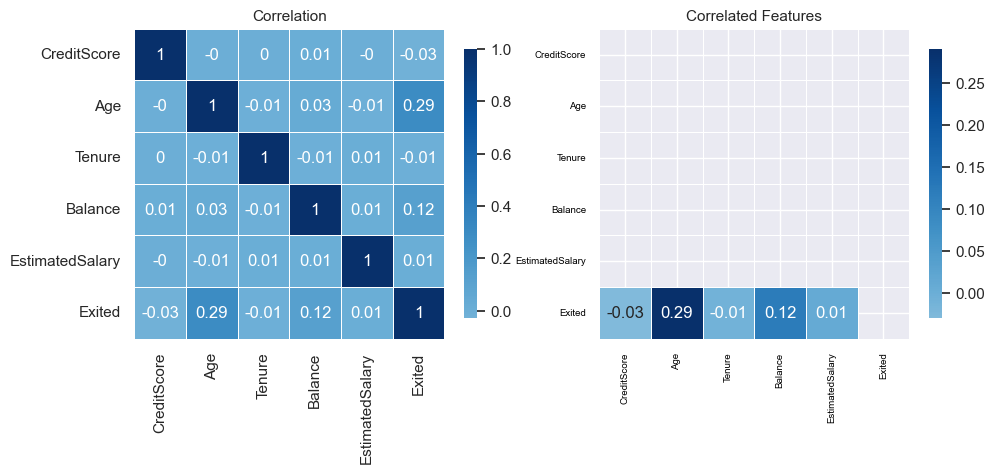

In [13]:
# Checking whether the features are correlation or not

def correlation(data):

    # Creating a copy of the dataset

    data_copy = data.copy()

    # Dropping the features that need to be dropped, as well as the features that will later be converted to the object type.

    if "RowNumber" in data_copy.columns:
        data_copy.drop(columns = ["RowNumber", "CustomerId", "Surname", "NumOfProducts", "HasCrCard", "IsActiveMember"], inplace = True)
    else:
        pass

    data_copy["Exited"] = data_copy["Exited"].astype(int)

    # Checking the correlation

    corr_df = np.round(data_copy.corr(), 2)

    # Checking for correlated features

    corr_features = corr_df[corr_df.iloc[:-1, :-1] > 0.75].fillna({"Exited" : corr_df["Exited"]}).T
    mask = np.triu(np.ones_like(corr_features, dtype = bool))

    # Checking the correlation using heatmap

    fig, axes = plt.subplots(1, 2, figsize = (11, 7))
    sns.heatmap(corr_df, cmap = "Blues", annot = True, center = 0, square = True, linewidth = 0.5, cbar_kws = {"shrink" : 0.5}, ax = axes[0])
    sns.heatmap(corr_features, mask = mask, cmap = "Blues", annot = True, center = 0, square = True, linewidth = 0.5, cbar_kws = {"shrink" : 0.5}, ax = axes[1])
    axes[0].set_title("Correlation", size = 11)
    axes[1].set_title("Correlated Features", size = 11)
    axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize = 7, color = "black")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 7, color = "black")
    plt.show()


correlation(df)

<b>Insights</b>

* Currently, up to the feature engineering steps, there is <b>no correlation</b> among the features in the data

In [14]:
# Checking the number of duplicate records in the dataset

print(f"The total number of duplicate values in the dataset : {start}{df.duplicated().sum()}{end}")

The total number of duplicate values in the dataset : 0


In [15]:
# Checking the unique values in each of the features

# for col in df.columns:
#     print(f"The {start}{col}{end} consists of {start}{df[col].nunique()}{end} unique values, which are as follows : \n")
#     print(f"{df[col].value_counts()}\n")

<b>Insights</b>

* The <b>data</b> exhibits an <b>imbalance</b>, specifically in the <b>Exited</b> (dependent feature), with two categories : <b>0</b>, representing the <b>majority class</b> with <b>7963 records</b>, and <b>1</b>, representing the <b>minority class</b> with <b>2037 records</b>. This scenario meets the criteria for imbalanced data, where the number of instances in the minority class is less than half of those in the majority class.

# Data Preparation

<a id = cell_4></a>

In [16]:
# Creating a function to perform data preprocessing on the dataset

def data_preparation(data):

    # Dropping the non-significant features

    data.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
    print(f"{start}Now, the dataset comprises {data.shape[1]} features, which are :{end}\n\n{', '.join([col for col in data.columns])}\n\n")

    # Converting the features to object type

    print(f"{start}After conversion, the datatype of the features :\n{end}")
    for col in ["HasCrCard", "IsActiveMember", "Exited"]:
        data[col] = data[col].astype("O")
        print(f"{col} : {data[col].dtype}")


data_preparation(df)

Now, the dataset comprises 11 features, which are :

CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited


After conversion, the datatype of the features :

HasCrCard : object
IsActiveMember : object
Exited : object


# Exploratory Data Analysis (EDA)

<a id = cell_5></a>

## Univariate Analysis

<a id = cell_5_1></a>

### Quantitative Features

<a id = cell_5_1_1></a>

In [17]:
# Creating a function to conduct univariate analysis on quantitative features

def univariate_eda_num(data, col):

    display(HTML(f"<div style = 'text-align : center; font-size : 15px; font-weight : bold;'>{col}</div>"))

    # Checking the statistical summary of the features

    stats_df = data[[col]].describe().T

    # Checking the skewness

    stats_df["skew"] = data[col].skew()

    # Checking for the presence of outliers using IQR method

    minimum = data[col].min()
    maximum = data[col].max()
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    median = np.median(data[col])
    IQR = Q3 - Q1
    lb = Q1 - (1.5 * IQR)
    ub = Q3 + (1.5 * IQR)
    outliers = len(data[col][ (data[col] < lb) | (data[col] > ub) ])
    stats_df["outliers"] = outliers

    stats_df = np.round(stats_df, 3)
    display(stats_df)
    print()

    # Plotting graphs to check the distribution

    fig, axes = plt.subplots(2, 1, figsize = (12, 8))

    sns.histplot(data[col], color = "darkblue", ax = axes[0], kde = True)
    sns.boxplot(x = data[col], color = "blue", ax = axes[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue" })
    axes[1].text(minimum, -0.3, np.round(minimum, 2), color= "black", verticalalignment = "center")
    axes[1].text(maximum, -0.3, np.round(maximum, 2), color= "black", verticalalignment = "center")
    axes[1].text(Q1, -0.4, np.round(Q1, 2), color= "black", verticalalignment = "bottom")
    axes[1].text(median, -0.4, np.round(median, 2), color= "black", verticalalignment = "bottom")
    axes[1].text(Q3, -0.4, np.round(Q3, 2), color= "black", verticalalignment = "bottom")
    plt.tight_layout()

count     mean     std    min    25%    50%    75%    max  \
CreditScore  10000.0  650.529  96.653  350.0  584.0  652.0  718.0  850.0   

              skew  outliers  
CreditScore -0.072        15

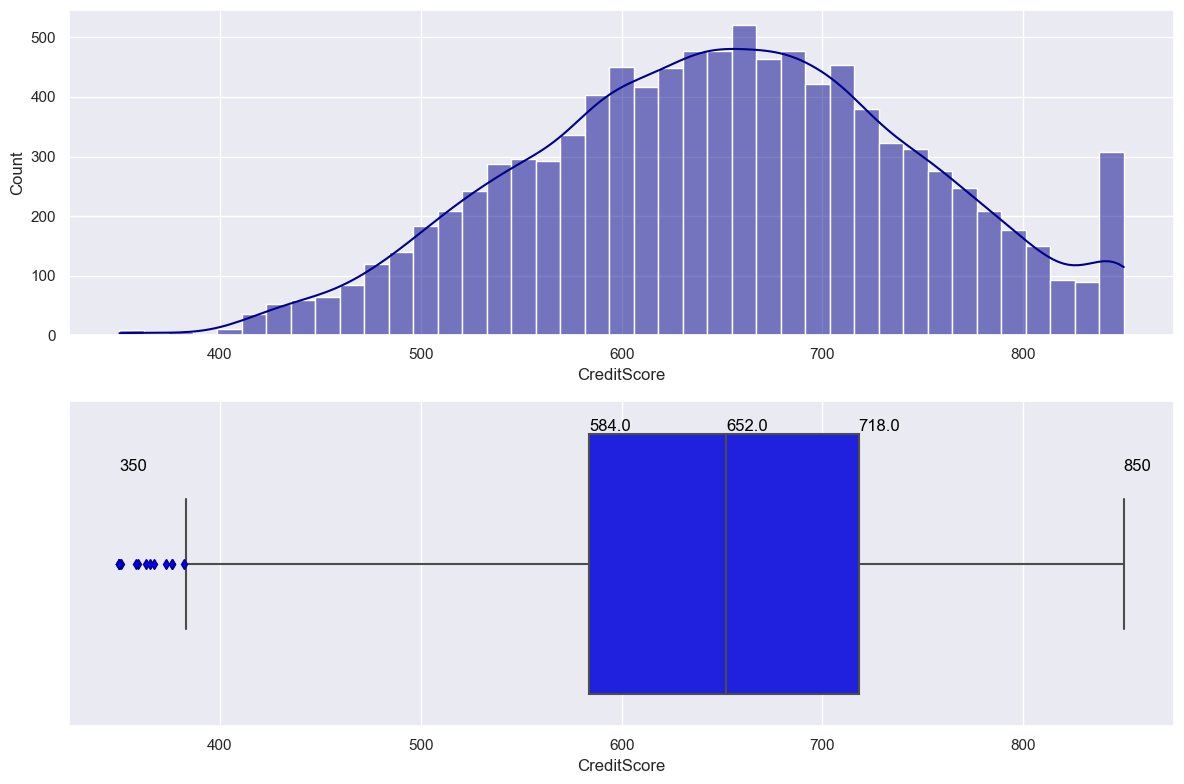

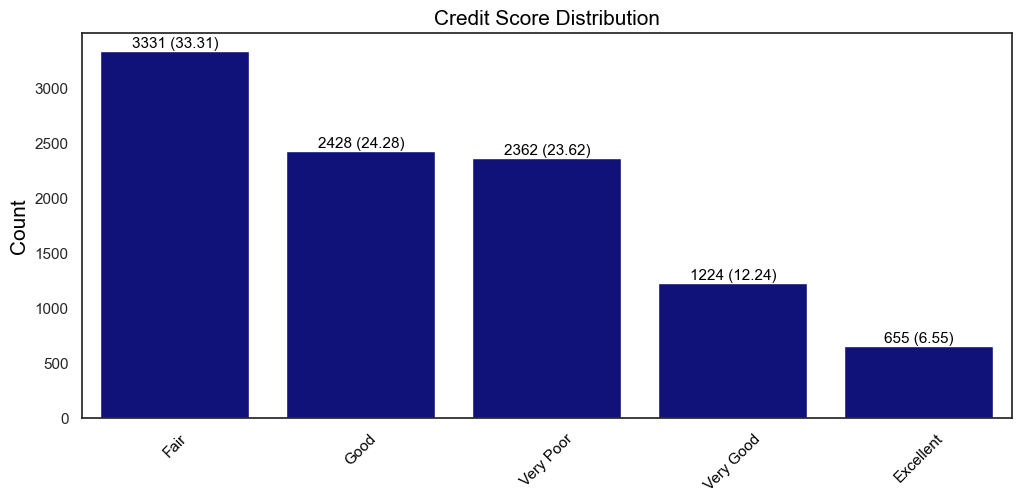

In [18]:
# Exploring the "CreditScore" feature

univariate_eda_num(df, "CreditScore")

# Plotting the categorical distribution of "CreditScore" feature

scores_cat = []

for scores in df["CreditScore"]:
    if (scores >= 300) & (scores <= 579):
        scores_cat.append("Very Poor")
    elif (scores >= 580) & (scores <= 669):
        scores_cat.append("Fair")
    elif (scores >= 670) & (scores <= 739):
        scores_cat.append("Good")
    elif (scores >= 740) & (scores <= 799):
        scores_cat.append("Very Good")
    elif (scores >= 800) & (scores <= 850):
        scores_cat.append("Excellent")

scores_cat = pd.Series(scores_cat)

labels = scores_cat.value_counts().index
values = scores_cat.value_counts().values

plt.figure(figsize = (12, 5))
sns.set(style = "white")

sns.barplot(x = labels, y = values, color = "darkblue")
plt.title(f"Credit Score Distribution", color = "black", size = 15)
plt.ylabel("Count", size = 15, color = "black")
plt.xticks(rotation = 45, size = 11, color = "black")

for i in range(len(values)):
    plt.text(x = i, y = values[i] + 5, s = f"{values[i]} ({np.round((values[i] / len(df)) * 100, 2)})", ha = "center", va = "bottom", size = 11, color = "black")

plt.show()

# (len(df["CreditScore"][df["CreditScore"] > 740]) / len(df)) * 100
# (len(df["CreditScore"][df["CreditScore"] < 579]) / len(df)) * 100

<b>Insights</b>

* <b>Credit scores</b> range from a <b>minimum</b> of <b>350</b> to a <b>maximum</b> of <b>850</b>.
* The <b>average</b> credit score is <b>650.52</b>.
* The <b>skewness</b> is <b>-0.072</b>, indicating <b>minor negative skewness</b>, suggesting the presence of <b>outliers</b> at the <b>lower tail</b> of the credit score distribution <b>(reflecting poor scores)</b>.
* <b>75%</b> of customers have a <b>"Below Very Good"</b> level score, with <b>2,325</b> customers having a credit score below <b>718</b>. Additionally, <b>23%</b> of customers maintain a <b>very poor credit score (below 597)</b>.
* The <b>majority (33.31%)</b> of customers maintain a <b>fair</b> credit score.
* Only <b>19%</b> of customers maintain a credit score ranging from <b>"Very Good" (740)</b> to an <b>excellent level (800)</b>."

<i> CreditScore can be a significant factor in predicting customer churn (Exited), as it reflects a customer's creditworthiness and financial stability. Implementing measures such as segmentation and targeted communication, early warning systems, and feedback mechanisms can be crucial in addressing and managing potential churn.

count    mean     std   min   25%   50%   75%   max   skew  outliers
Age  10000.0  38.922  10.488  18.0  32.0  37.0  44.0  92.0  1.011       359

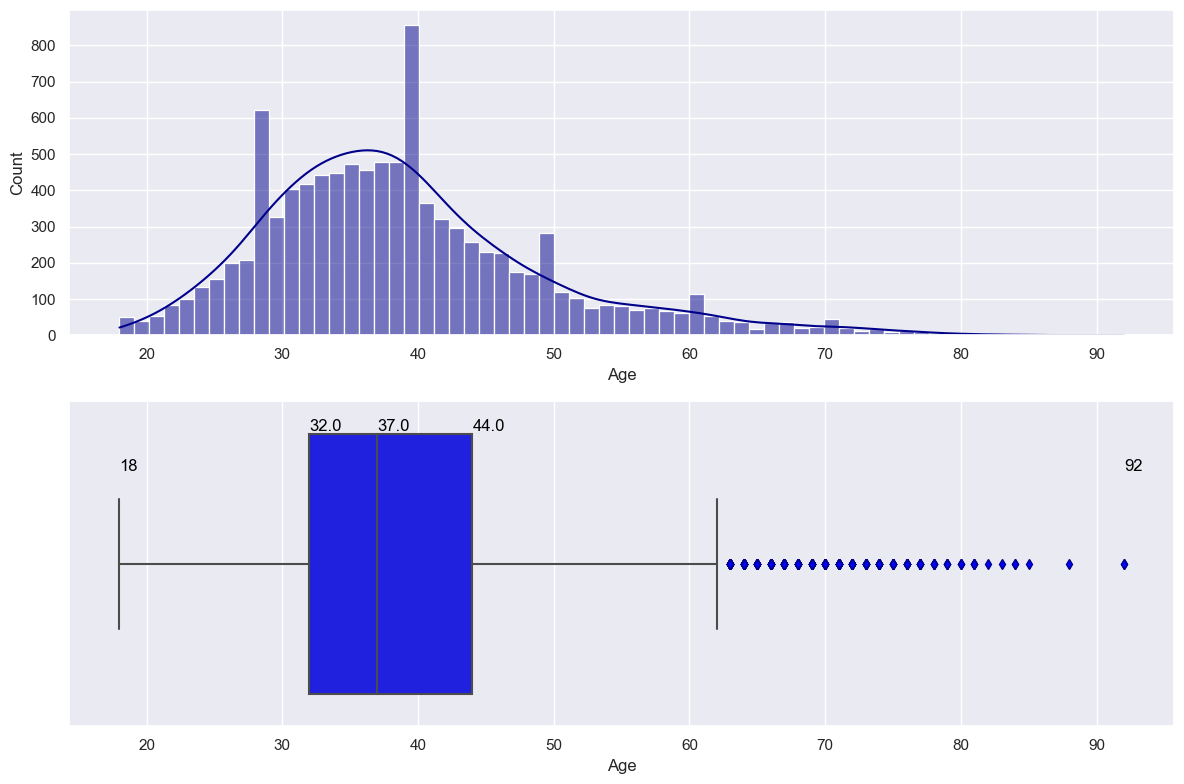

In [19]:
# Exploring the "Age" feature

sns.set()

univariate_eda_num(df, "Age")

<b>Insights</b>

* The <b>average Age</b> in the dataset is <b>39</b>.
* The <b>skewness</b> is <b>1.011</b>, indicating a <b>positive skew</b>. The distribution has a longer right tail, with a concentration of younger customers on the left side, imply that the majority of customers fall within a <b>younger demographic</b>.
* The presence of <b>outliers</b> with ages ranging from <b>63</b> to <b>92</b> indicates a smaller but notable group of older customers.
* <b>Q1</b> is <b>32.0</b>, indicating that <b>25%</b> of customers have an age of 32 or below. <b>Q3</b> is <b>44.0</b>, suggesting that <b>75%</b> of customers have an age of <b>44</b> or below. This indicates that the majority of customers are below <b>50</b> years old.

<i> Understanding age diversity helps sales teams adjust how they communicate, ensuring effective engagement with both younger and older customers in marketing strategies for a more inclusive approach. Tailoring communication styles based on age demographics improves customer interactions and overall effectiveness in reaching diverse audiences.

count   mean    std  min  25%  50%  75%   max   skew  outliers
Tenure  10000.0  5.013  2.892  0.0  3.0  5.0  7.0  10.0  0.011         0

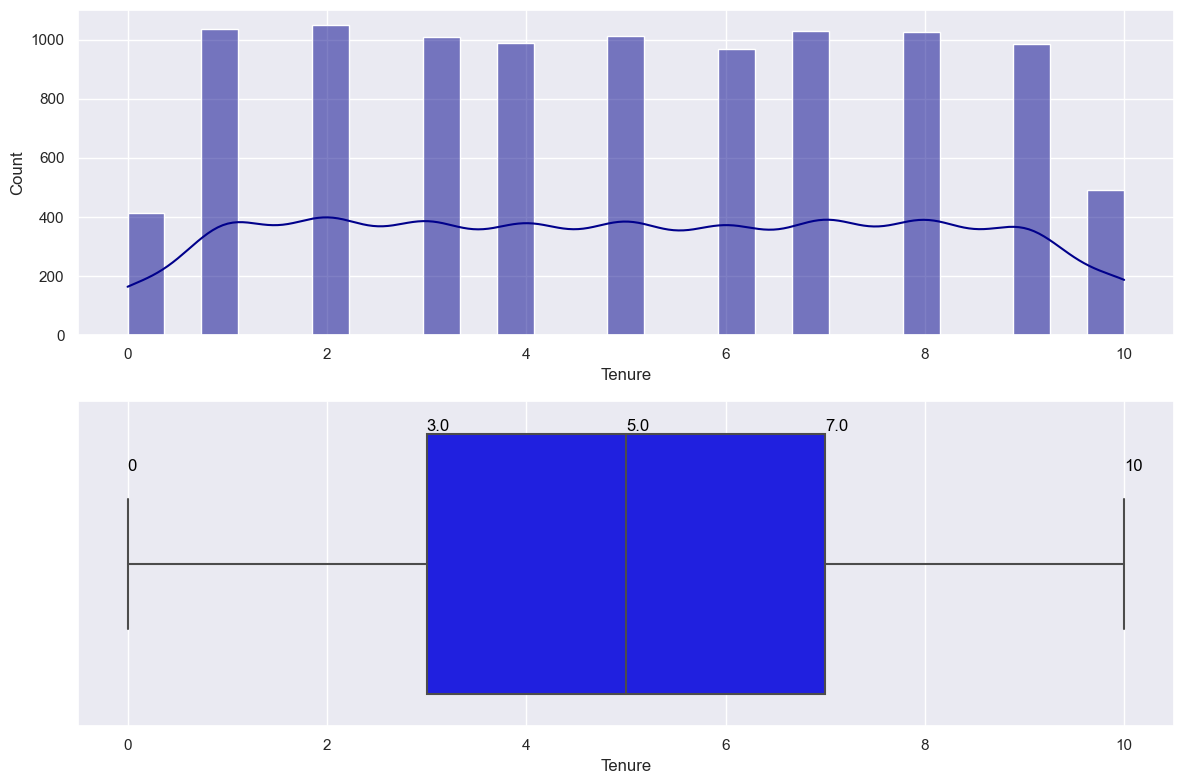

In [20]:
# Exploring the "Tenure" feature

univariate_eda_num(df, "Tenure")

<b>Insights</b>

* The <b>Tenure</b> ranges from a minimum of <b>0 years</b> (indicating possibly new customers) to a maximum of <b>10 years</b>.
* The <b>average</b> tenure of customers with this business is approximately <b>5 years</b>.
* The <b>distribution</b> appears almost <b>positively skewed</b>.
* <b>No outliers</b> observed in the tenure feature, suggesting a consistent range of values.
* The <b>25th percentile</b> for tenure is <b>3 years</b>, indicating that <b>25%</b> of customers have been with the business for <b>3 years</b> or less.
* The <b>75th percentile</b> for tenure is <b>7 years</b>, indicating that <b>75%</b> of customers have a tenure of <b>7 years</b> or less.

<i>Continuously monitor and evaluate customer satisfaction and engagement levels throughout their tenure, prioritizing the understanding of factors influencing long-term relationships. Proactively address any issues to maintain a business-like focus on sustained customer satisfaction and loyalty.</i>

count  mean    std  min  25%  50%  75%  max   skew  outliers
NumOfProducts  10000.0  1.53  0.582  1.0  1.0  1.0  2.0  4.0  0.746        60

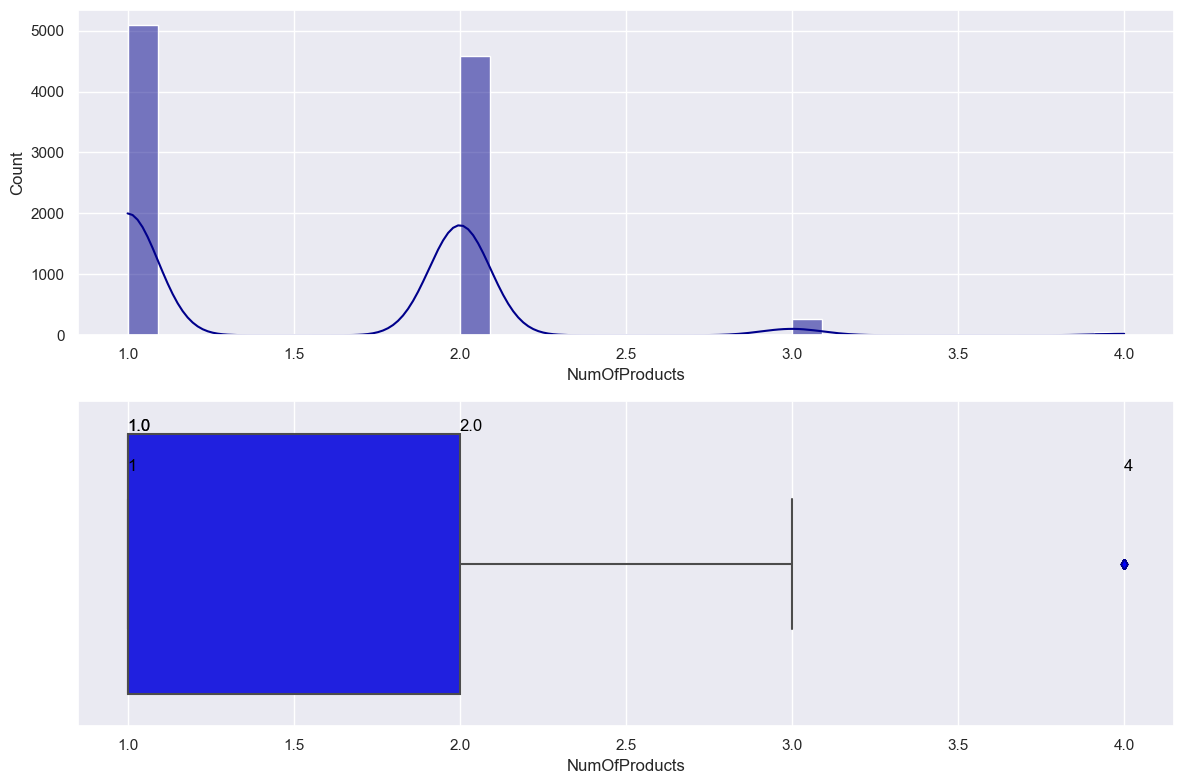

In [21]:
# Exploring the "NumOfProducts" feature

univariate_eda_num(df, "NumOfProducts")

<b>Insights</b>

* <b>Customers</b> typically <b>purchase</b> between <b>1 (minimum</b>) and <b>4 (maximum) products</b> throughout their tenure with the business. It's important to note that <b>no customers</b> have bought more than <b>5 products</b>, and the purchase of <b>4 products</b> is considered an <b>outlier</b>.
* The <b>average number of products</b> purchased by customers is <b>1</b>, indicating that the majority of customers, specifically those at the <b>50th percentile</b>, have made purchases ranging from <b>1 to 2 products</b>.
* The <b>distribution</b> is <b>positively skewed (0.74</b>), signifying that the majority of customers have made <b>fewer product purchases</b>. The <b>rightward tail</b> in the distribution suggests the presence of a <b>subset</b> with a <b>more extensive product portfolio</b>, possibly indicating a <b>specialized customer base</b> or a <b>unique offering</b> by the <b>business</b>.  
* The <b>25th percentile</b> for the number of products is <b>1</b>, implying that <b>25%</b> of customers have purchased <b>only one product</b> from the business.
* The <b>75th percentile</b> for the number of products is <b>2</b>, suggesting that <b>75%</b> of customers have purchased either <b>1 or 2 products</b> from the business.


<i>Strategic considerations should encompass addressing the distinct preferences of both primary and outlier customer groups. An exploration of customer characteristics across four products may unveil insights into a specific segment with unique needs or preferences. Implementing targeted strategies or services for both the segments to improve customer satisfaction and foster loyalty.</i>

count       mean        std  min  25%       50%        75%  \
Balance  10000.0  76485.889  62397.405  0.0  0.0  97198.54  127644.24   

               max   skew  outliers  
Balance  250898.09 -0.141         0

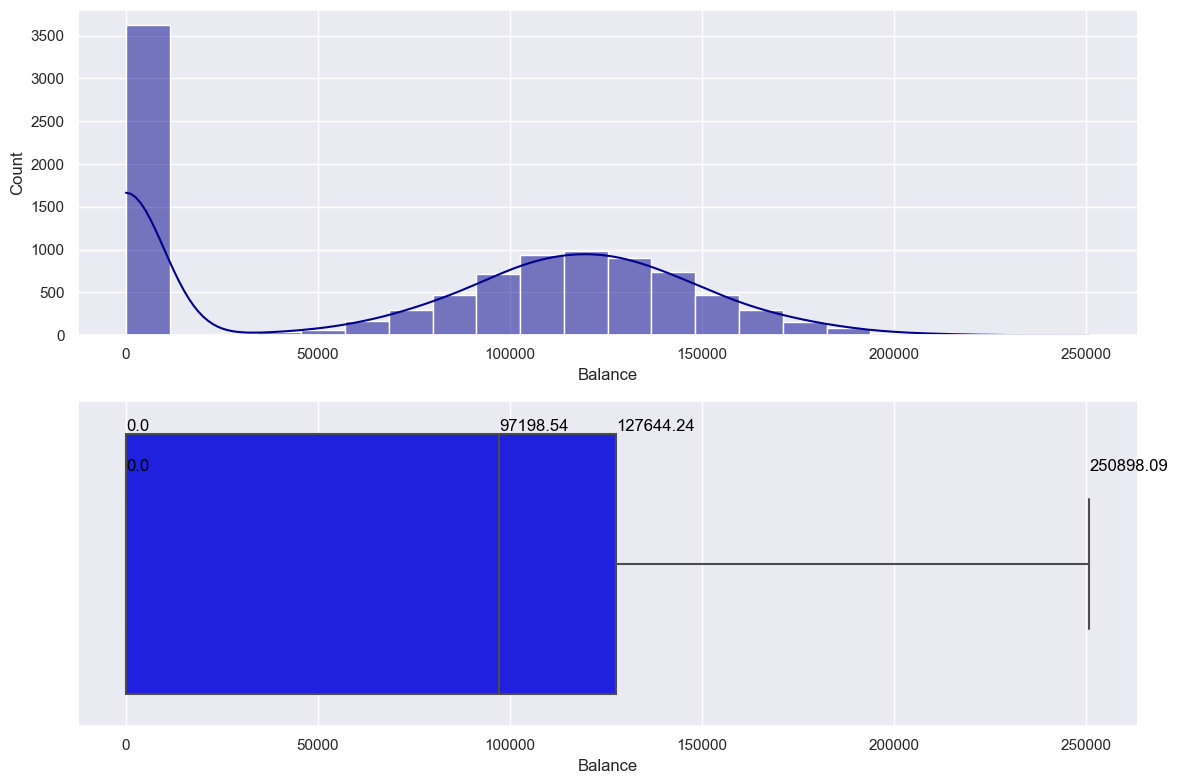

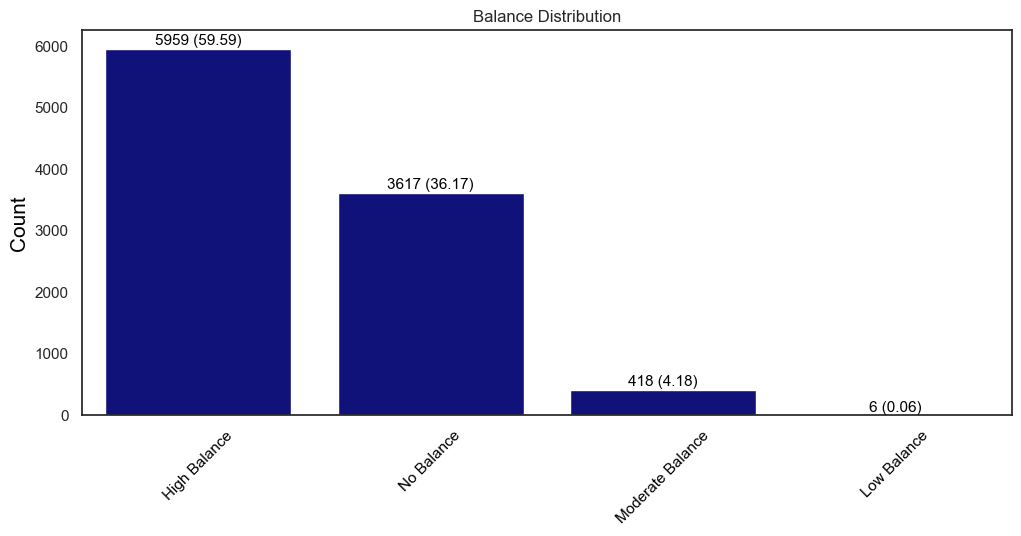

In [22]:
# Exploring the "Balance" feature

univariate_eda_num(df, "Balance")

# Plotting the categorical distribution of the "Balance" feature

balance_cat = []

for balance in df["Balance"]:
    if (balance == 0):
        balance_cat.append("No Balance")
    elif (balance >= 1) & (balance <= 25000):
        balance_cat.append("Low Balance")
    elif (balance >= 25001) & (balance <= 75000):
        balance_cat.append("Moderate Balance")
    else:
        balance_cat.append("High Balance")

balance_cat = pd.Series(balance_cat)

labels = balance_cat.value_counts().index
values = balance_cat.value_counts().values

plt.figure(figsize = (12, 5))
sns.set(style = "white")

sns.barplot(x = labels, y = values, color = "darkblue")
plt.title("Balance Distribution")
plt.ylabel("Count", size = 15, color = "black")
plt.xticks(rotation = 45, size = 11, color = "black")

for i in range(len(values)):
    plt.text(x = i, y = values[i] + 5, s = f"{values[i]} ({np.round((values[i] / len(df)) * 100, 2)})", ha = "center", va = "bottom", size = 11, color = "black")

<b>Insights</b>

* The <b>average balance amount</b> across all customers in this data is <b>76,485</b>, indicating a <b>moderate level</b> of funds<b> in <b>customer accounts</b>.
* The <b>distribution</b> is <b>negatively skewed (-0.141)</b>, indicating a concentration of <b>higher balances</b>.
* Excluding customers with <b>zero-balance accounts</b>, namely those who have recently opened their accounts, withdrawn all funds, or potentially maintain inactive accounts without regular transactions, there are <b>no other outliers</b> which suggests a relatively <b>uniform distribution</b>.
* The <b>25th percentile</b> is <b>0</b>, signifying that a notable proportion of customers maintain <b>zero-balance accounts</b>. Moreover, <b>75%</b> of the customers exhibit balances of <b>127,644</b> or less, and <b>half of the customer base</b> maintains a balance below <b>97,198</b>.

<i>Understanding the account balance is a crucial indicator of customer engagement, identifying and addressing the factors contributing to low balances can be instrumental in mitigating churn. Implementing personalized incentives, such as exclusive offers or loyalty programs tied to increased account activity or deposits, can proactively encourage customers to maintain higher balances, fostering long-term satistaction and reducing the likelihood of churn.</i>

count       mean        std    min       25%         50%  \
EstimatedSalary  10000.0  100090.24  57510.493  11.58  51002.11  100193.915   

                        75%        max   skew  outliers  
EstimatedSalary  149388.248  199992.48  0.002         0

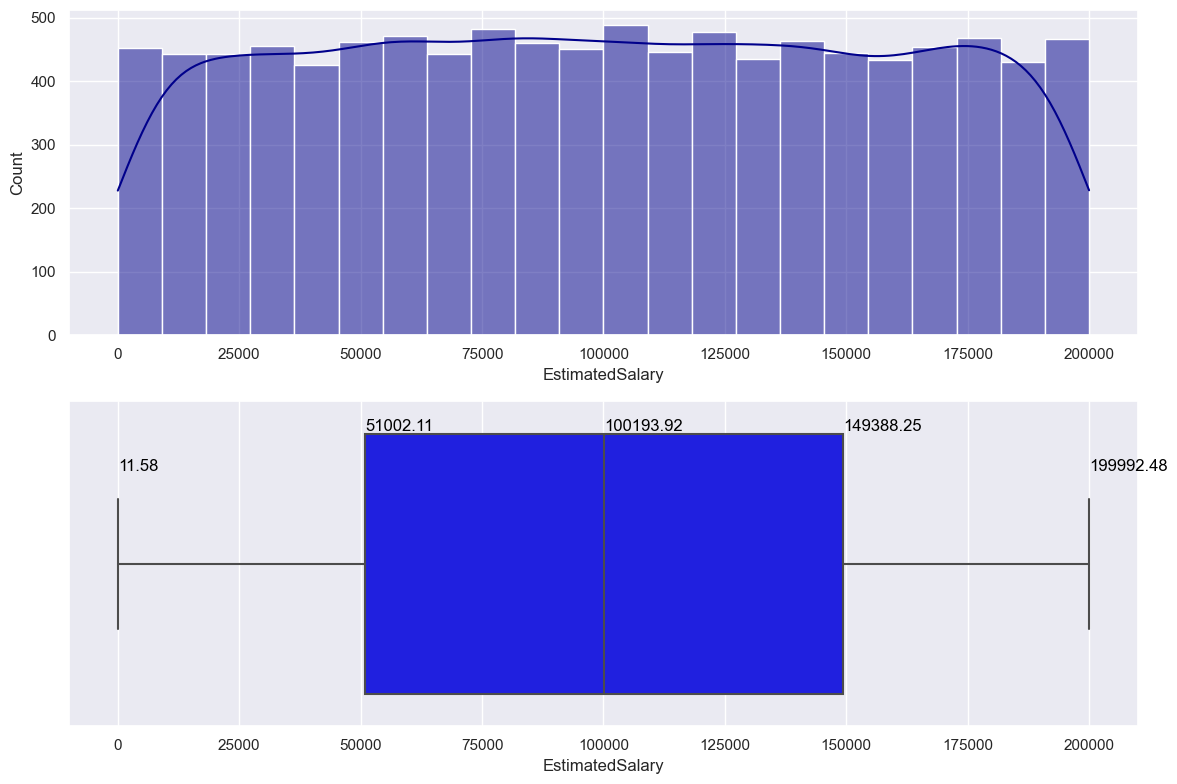

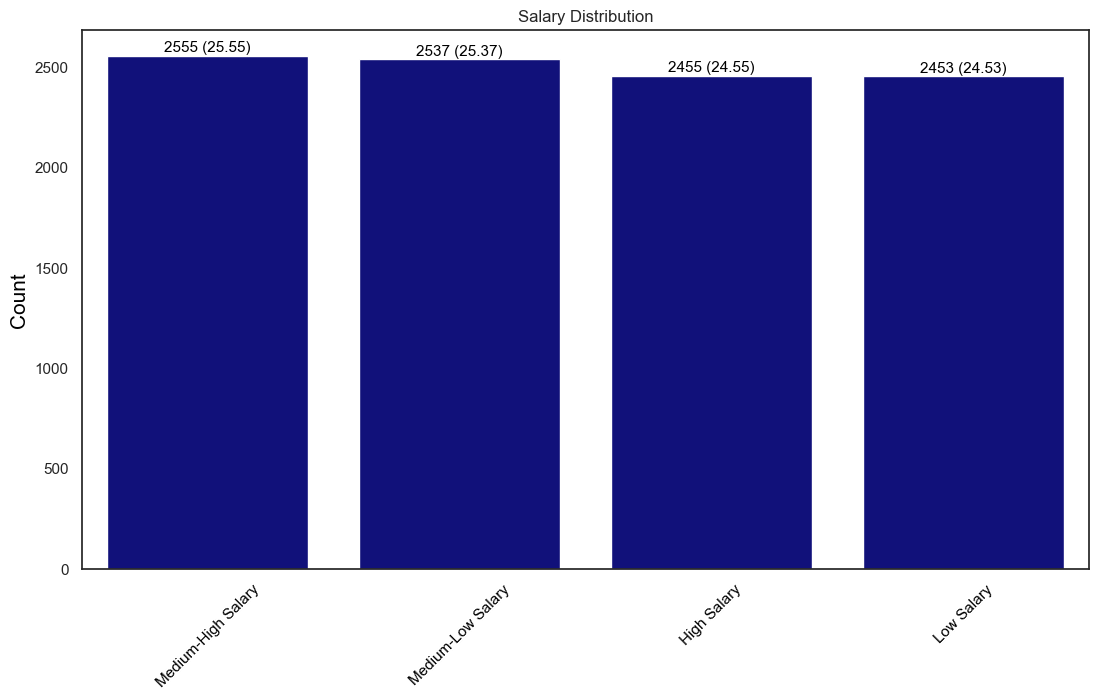

In [23]:
# Exploring the "EstimatedSalary" feature

sns.set()

univariate_eda_num(df, "EstimatedSalary")

# Plotting the categorical distribution of the "EstimatedSalary" feature

sns.set(style = "white")

salary_cat = []

for salary in df["EstimatedSalary"]:
    if (salary <= 50000):
        salary_cat.append("Low Salary")
    elif (salary > 50000) & (salary <= 100000):
        salary_cat.append("Medium-Low Salary")
    elif (salary > 100000) & (salary <= 150000):
        salary_cat.append("Medium-High Salary")
    elif (salary > 150000):
        salary_cat.append("High Salary")

salary_cat = pd.Series(salary_cat)

labels = salary_cat.value_counts().index
values = salary_cat.value_counts().values

plt.figure(figsize = (13, 7))
sns.set(style = "white")

sns.barplot(x = labels, y = values, color = "darkblue")
plt.title("Salary Distribution")
plt.ylabel("Count", size = 15, color = "black")
plt.xticks(rotation = 45, size = 11, color = "black")

for i in range(len(values)):
    plt.text(x = i, y = values[i] + 5, s = f"{values[i]} ({np.round((values[i] / len(df)) * 100, 2)})", ha = "center", va = "bottom", size = 11, color = "black")

sns.set()

<b>Insights</b>

* The <b>average estimated salary</b> is <b>1,00,090.24</b>.
* The <b>distribution</b> is <b>nearly symmetric (skewness = 0.002)</b>, indicating a <b>balanced spread</b> of estimated salaries.
* <b>No outliers</b> are identified in the estimated salary values.
* <b>25%</b> of the customers has salary less than <b>51,002.11</b>, half of the data <b>(50 percentile)</b> consists of customers having salary below <b>1,00,195</b> and <b>75\%</b> of the customers has salary less than <b>1,49,388.24</b>.

### Qualitative Features

<a id = cell_5_1_2></a>

In [24]:
# Creating a function to conduct univariate analysis on qualitative features

def univariate_eda_cat(data, col):

    # Plotting the distribution of categories

    values = data[col].value_counts().index
    counts = data[col].value_counts().values

    plt.figure(figsize = (12, 5))
    sns.set_style("white")
    sns.barplot(x = [str(value) for value in values], y = counts, color = "darkblue")
    plt.title(f"{col} Distribution", color = "black", size = 15)
    plt.ylabel(f"Count", size = 15, color = "black")
    plt.xticks(rotation = 45, size = 11, color ="black")
    plt.yticks(size = 11, color = "black")

    # Displaying the data

    for i in range(len(values)):
        plt.text(x = i, y = counts[i] + 5, s = f"{counts[i]} ({np.round((counts[i] / len(df)) * 100, 2)})", ha = "center", va = "bottom", size = 11, color = "black")

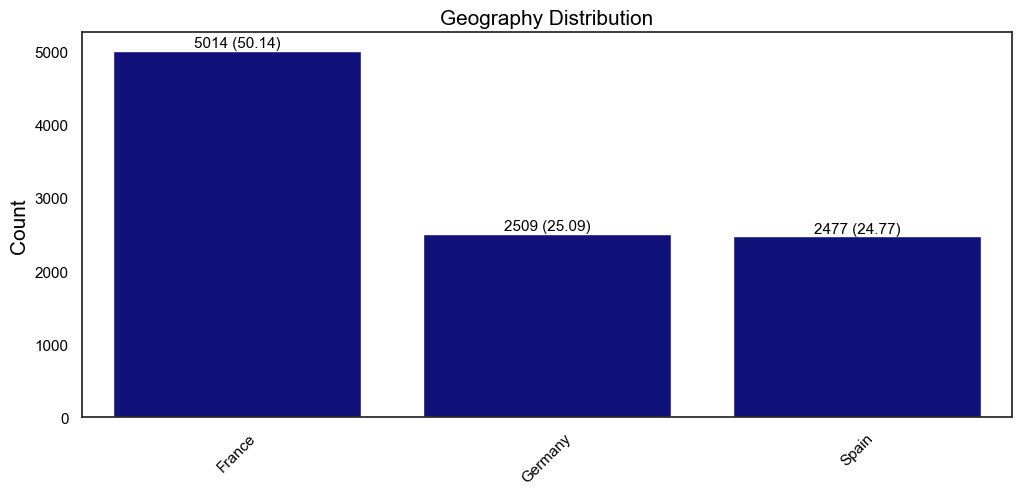

In [25]:
# Exploring the "Geography" feature

univariate_eda_cat(df, "Geography")

<b>Insights</b>

* This dataset pertains to the <b>European regions</b>,the <b>customer distribution</b> is as follows : <b>France</b> has the <b>highest count</b> with <b>5014 customers</b>, followed by <b>Germany 2538</b> customers, and <b>Spain</b> with <b>2477 customers</b>.

<i>Understanding the geographical distribution of customers is crucial for tailoring strategies and interventions that are effective in specific regions.</i>

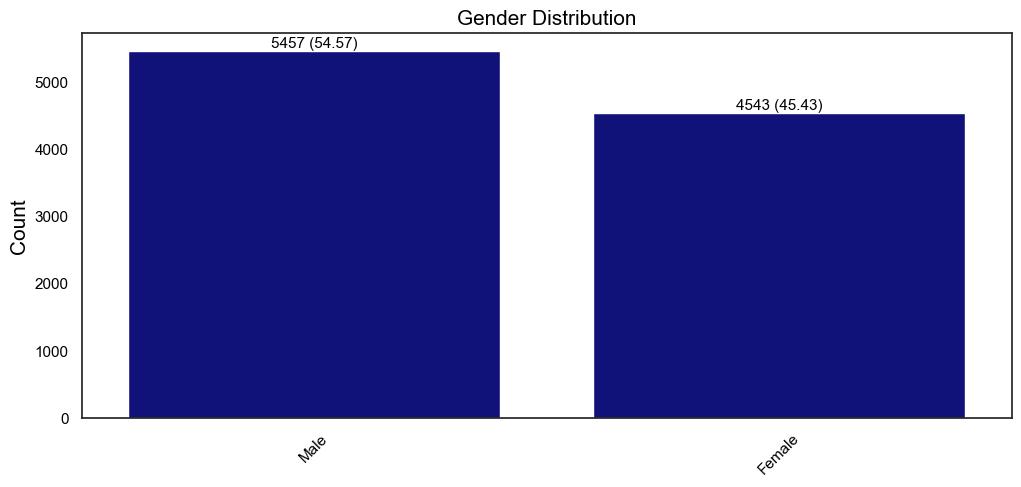

In [26]:
# Exploring the "Gender" feature

univariate_eda_cat(df, "Gender")

<b>Insights</b>

* The customer distribution based on <b>gender</b> is as follows : <b>5457</b> customers are <b>male</b>, and <b>4543</b> customers are <b>female</b>, which suggests that there is a <b>relatively balanced distribution</b>.

<i>Understanding the gender distribution is essential for creating inclusive strategies and ensuring that customer support, sales, and financial considerations are sensitive to potential gender-specific patterns.</i>

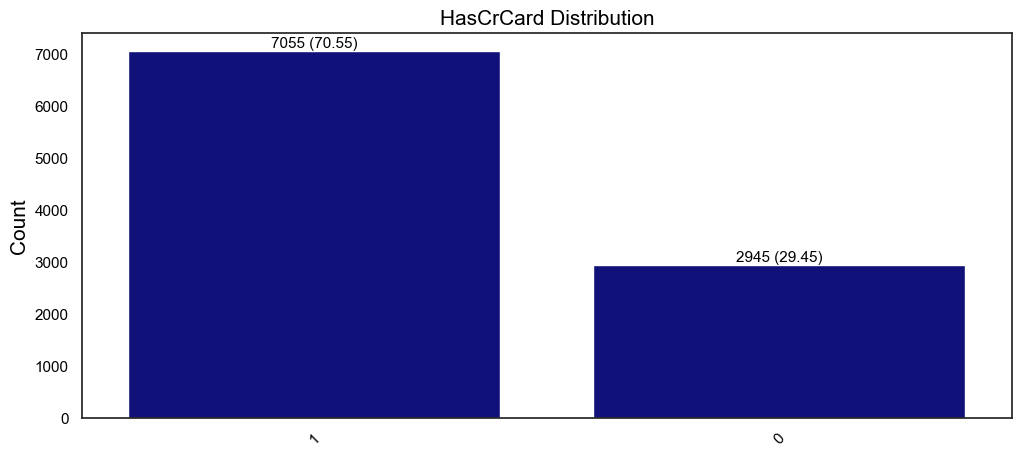

In [27]:
# Exploring the "HasCrCard" feature

univariate_eda_cat(df, "HasCrCard")

<b>Insights</b>

* This information indicates that the <b>majority</b> of customers in the dataset have a <b>credit card (70.55%)</b>, while a significant portion <b>does not</b> have one <b>(29.45%)</b>.

<i>This binary attribute can be considered in analyzing customer behavior preferences related to credit card usage.</i>

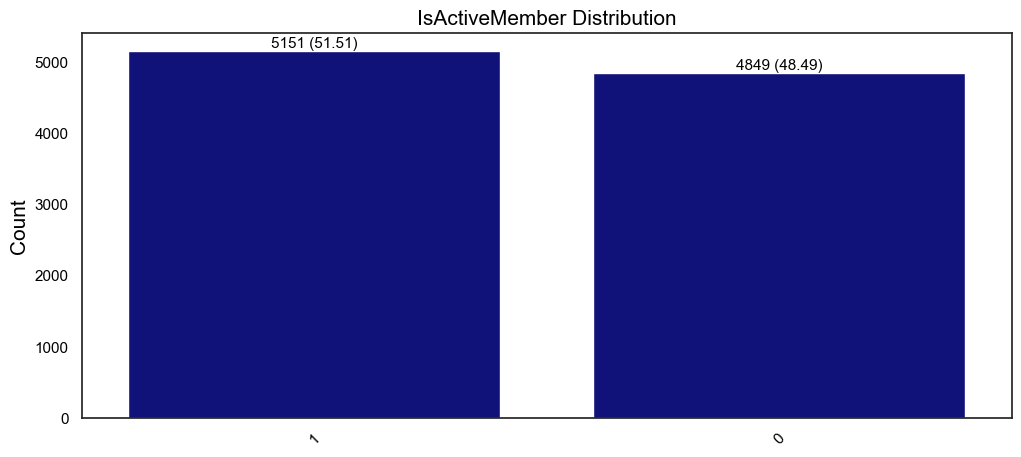

In [28]:
# Exploring the "IsActiveMember" feature

univariate_eda_cat(df, "IsActiveMember")

<b>Insights</b>

* The distribution for the "IsActiveMember" feature is as follows : <b>5151</b> customers are <b>active members</b>, and <b>4849</b> customers are <b>not active members</b>, which suggests that there is a <b>relatively balanced distribution</b>.

<i>Analyzing the behavior and charactertics of active members compared to non-active members can provide insights into factors influencing customer engagement and loyalty.</i>

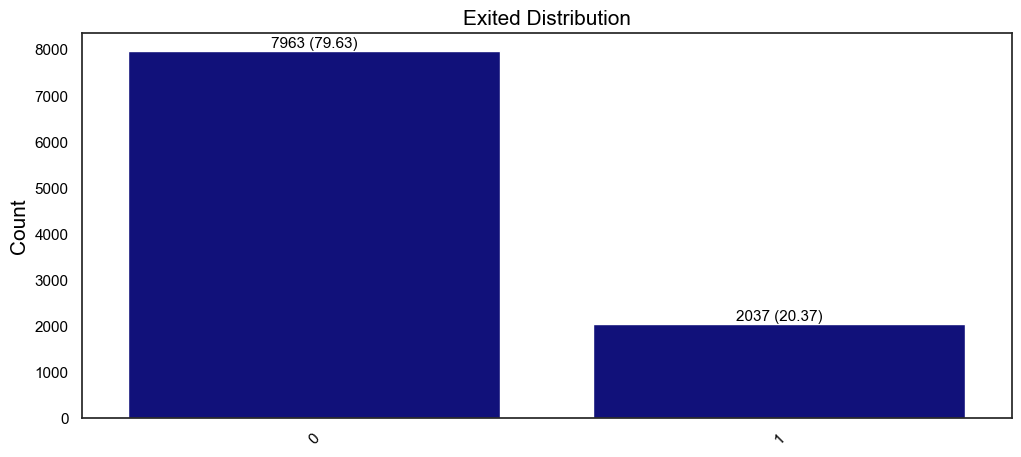

In [29]:
# Exploring the "Exited" feature

univariate_eda_cat(df, "Exited")

<b>Insights</b>

* The <b>dataset</b> is <b>imbalanced</b>, with a high proportion of customers not having churned compared to those who have churned.
* The distribution of "Exited" feature is as follows : <b>7963</b> customers are marked as <b>"Not Exited"</b>, while <b>2037</b> customers are marked as <b>"Exited"</b>.

<i>Understanding the distribution of customer churn is critical for developing proactive strategies to retain customers.</i>

## Bivariate Analysis

<a id = cell_5_2></a>

### Quantitative - Quantitative Features

<a id = cell_5_2_1></a>

In [30]:
# Creating a function to conduct bivariate analysis on two numerical features

def bivariate_eda_nvn(data, col_1, col_2):

    # Checking the correlation

    corr = np.round(data[[col_1, col_2]].corr().iloc[0, 1], 3)

    # Plotting correlation plot to examine the relationship between two features

    plt.figure(figsize = (12, 5))
    sns.regplot(x = data[col_1], y = data[col_2],
                scatter_kws = {
                    "facecolors" : "cyan",
                    "edgecolors" : "blue"},
                line_kws = {
                    "color" : "black"})
    plt.title(f"{col_1} vs {col_2} (Correlation : {corr})", color = "black")

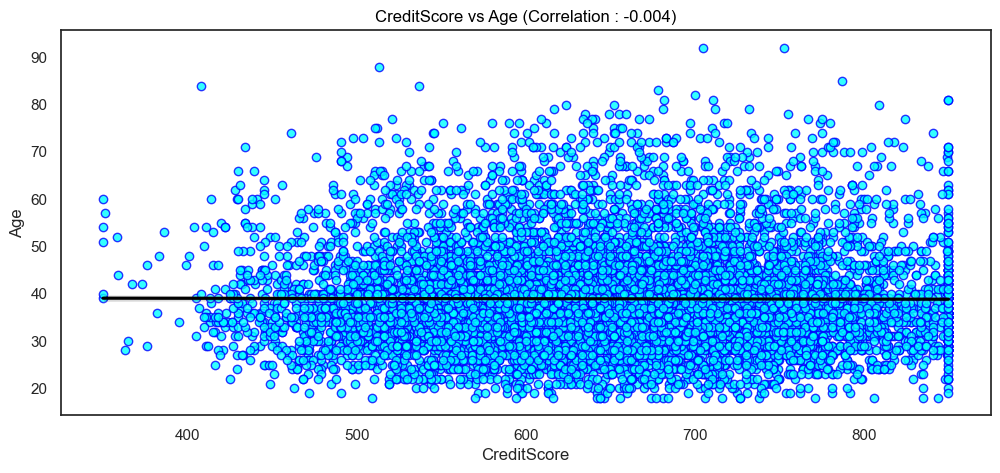

In [31]:
# Exploring the relationship between "CreditScore" and "Age" features

bivariate_eda_nvn(df, "CreditScore", "Age")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>CreditScore</b> and <b>Age</b> is <b>-0.004</b> (closer to zero), indicating there is negligible or <b>zero correlation</b> (changes in one feature are not associated with changes in the other) between a <b>customer's creditworthiness</b> and their <b>age</b>.  

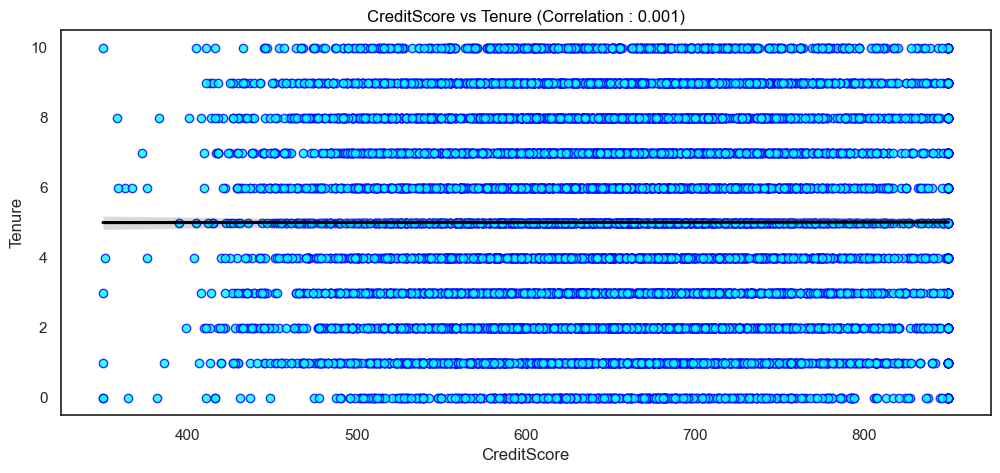

In [32]:
# Exploring the relationship between "CreditScore" and "Tenure" features

bivariate_eda_nvn(df, "CreditScore", "Tenure")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>CreditScore</b> and <b>Tenure</b> is <b>0.001</b>, indicating there is negligible or <b>zero correlation</b> between <b>the number of years a customer has been with the business</b> and their <b>creditworthiness</b>.




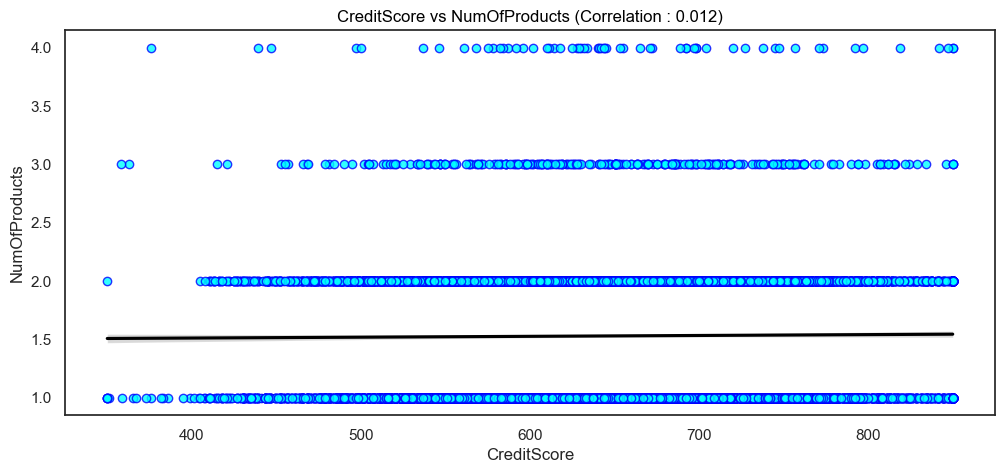

In [33]:
# Exploring the relationship between "CreditScore" and "NumOfProducts" features

bivariate_eda_nvn(df, "CreditScore", "NumOfProducts")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>CreditScore</b> and <b>NumOfProducts</b> is <b>0.012</b>, indicating there is negligible or <b>zero correlation</b> between <b> the <b>customer's creditworthiness</b> and <b>the number of products they have</b>.

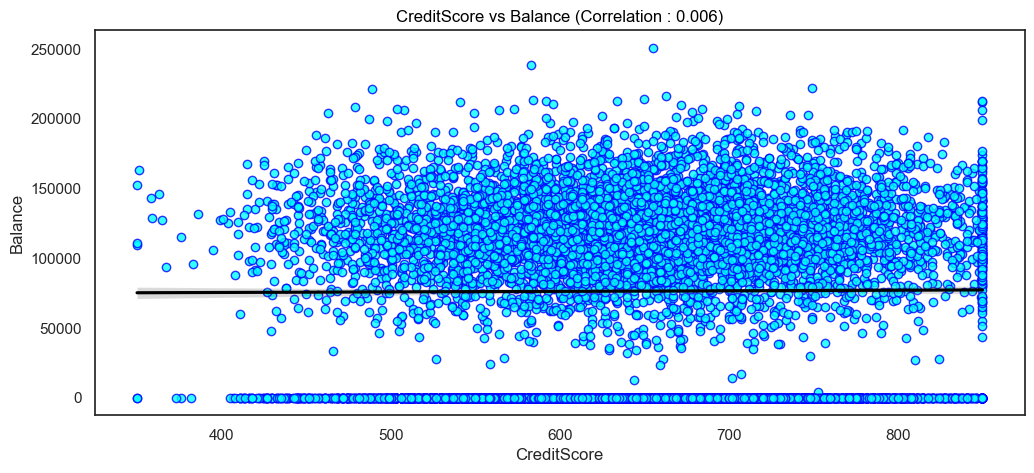

In [34]:
# Exploring the relationship between "CreditScore" and "Balance" features

bivariate_eda_nvn(df, "CreditScore", "Balance")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>CreditScore</b> and <b>Balance</b> is <b>0.006</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's creditworthiness</b> and the <b>balance in their account</b>.

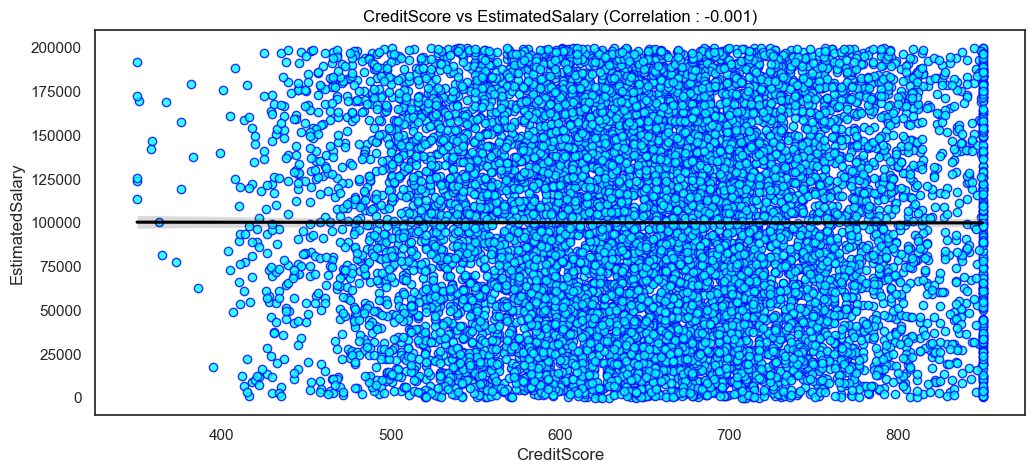

In [35]:
# Exploring the relationship between "CreditScore" and "EstimatedSalary" features

bivariate_eda_nvn(df, "CreditScore", "EstimatedSalary")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>CreditScore</b> and <b>EstimatedSalary</b> is <b>-0.001</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's creditworthiness</b> and their <b>estimated salary</b>.

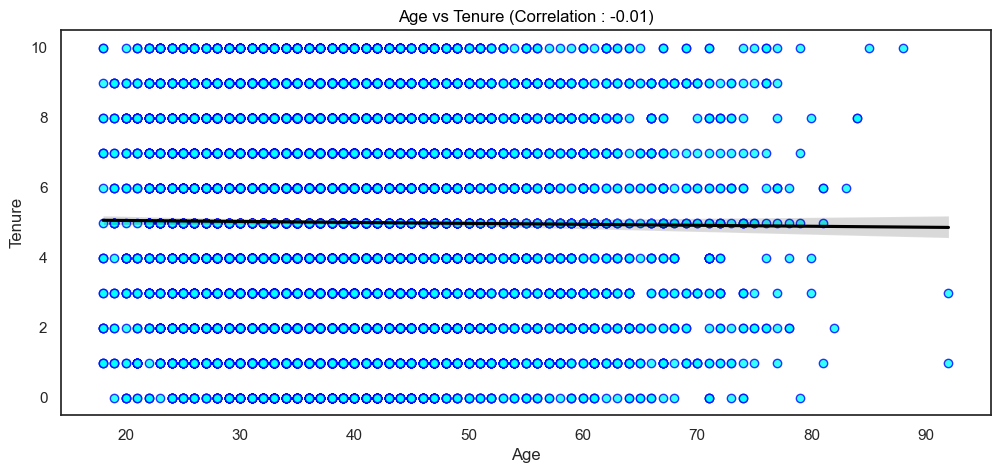

In [36]:
# Exploring the relationship between "Age" and "Tenure" features

bivariate_eda_nvn(df, "Age", "Tenure")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Age</b> and <b>Tenure</b> is <b>-0.01</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's age</b> and the <b>number of years they have</b>.

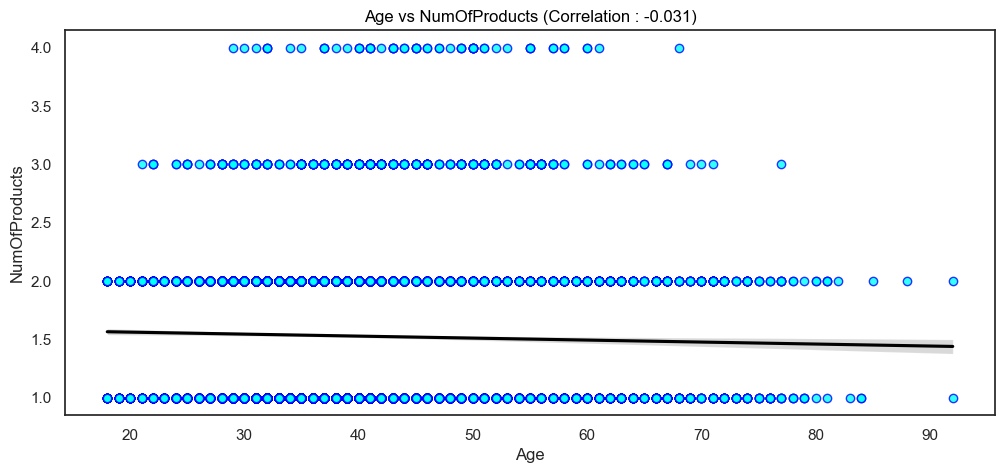

In [37]:
# Exploring the relationship between"Age" and "NumOfProducts" feature

bivariate_eda_nvn(df, "Age", "NumOfProducts")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Age</b> and <b>NumOfProducts</b> is <b>-0.031</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's age</b> and the <b>number of products they have</b>.

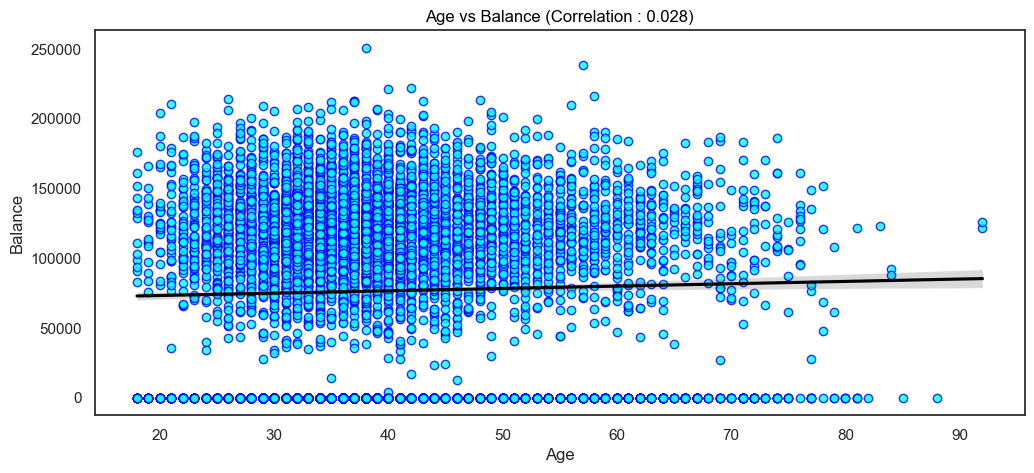

In [38]:
# Exploring the relationship between "Age" and "Balance"

bivariate_eda_nvn(df, "Age", "Balance")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Age</b> and <b>Balance</b> is <b>0.028</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's age</b> and the <b>amount of money in their account</b>.

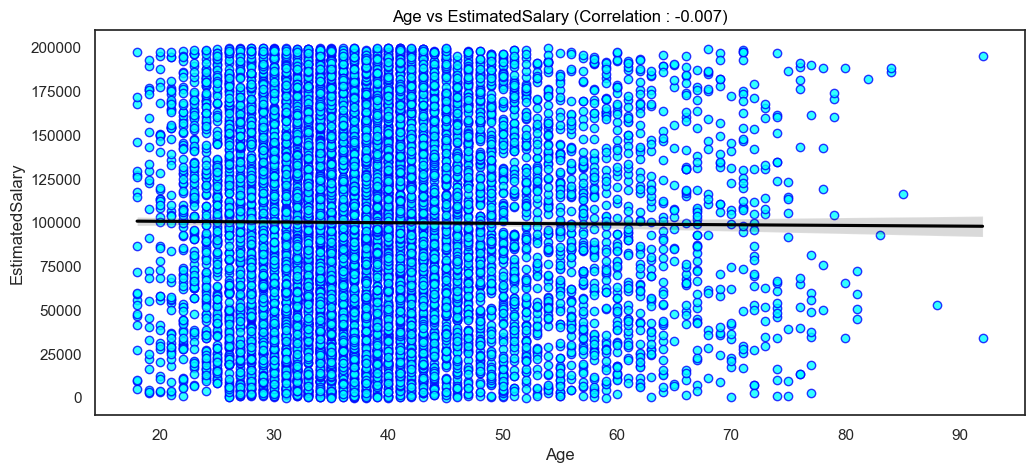

In [39]:
# Exploring the relationship "Age" and "EstimatedSalary" features

bivariate_eda_nvn(df, "Age", "EstimatedSalary")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Age</b> and <b>EstimatedSalary</b> is <b>-0.007</b>, indicating there is negligible or <b>zero correlation</b> between the <b>customer's age</b> and their <b>estimated salary</b>.

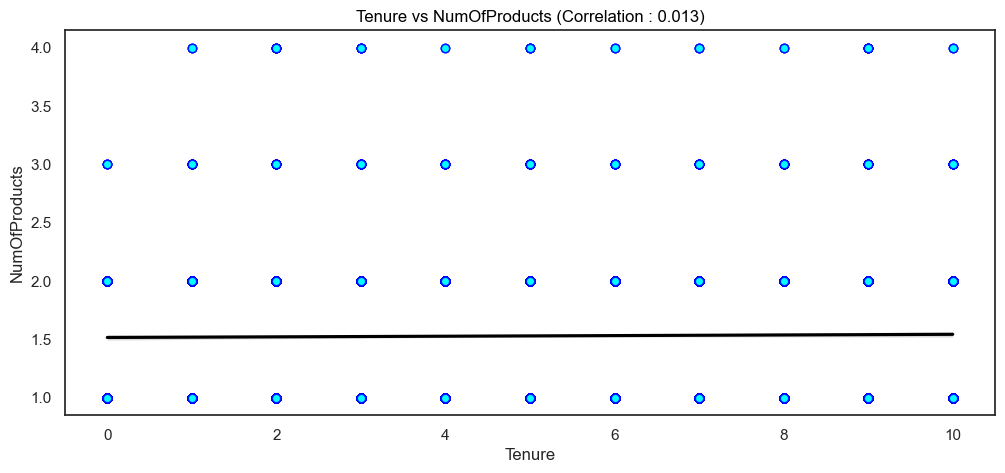

In [40]:
# Exploring the relationship between "Tenure" and "NumOfProducts" feature

bivariate_eda_nvn(df, "Tenure", "NumOfProducts")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Tenure</b> and <b>NumOfProducts</b> is <b>0.013</b>, indicating there is negligible or <b>zero correlation</b> between the <b>number of years a customer has been with the business</b> and the <b>number of products the customer has</b>.

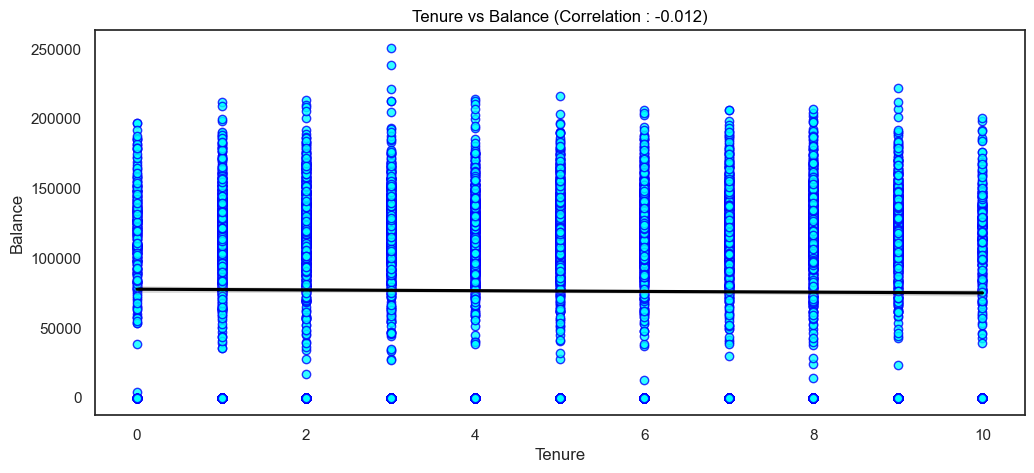

In [41]:
# Exploring the relationship between "Tenure" and "Balance" features

bivariate_eda_nvn(df, "Tenure", "Balance")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Tenure</b> and <b>Balance</b> is <b>-0.012</b>, indicating there is negligible or <b>zero correlation</b> between the <b>number of years a customer has been with the business</b> and the <b>amount of money in the customer's account</b>.

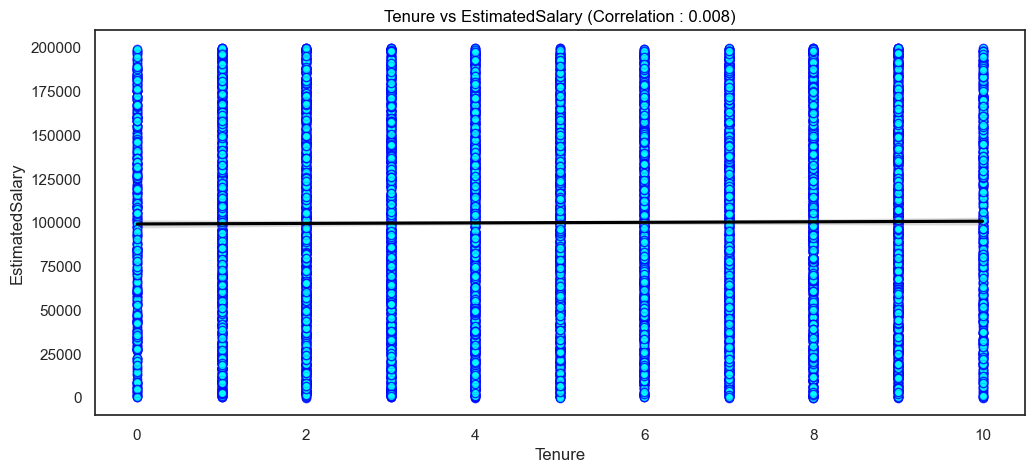

In [42]:
# Exploring the relationship between "Tenure" and "EstimatedSalary" feature

bivariate_eda_nvn(df, "Tenure", "EstimatedSalary")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>Tenure</b> and <b>EstimatedSalary</b> is <b>0.008</b>, indicating there is negligible or <b>zero correlation</b> between the <b>number of years a customer has been with the business</b> and the <b>estimated salary of the customer
</b>.

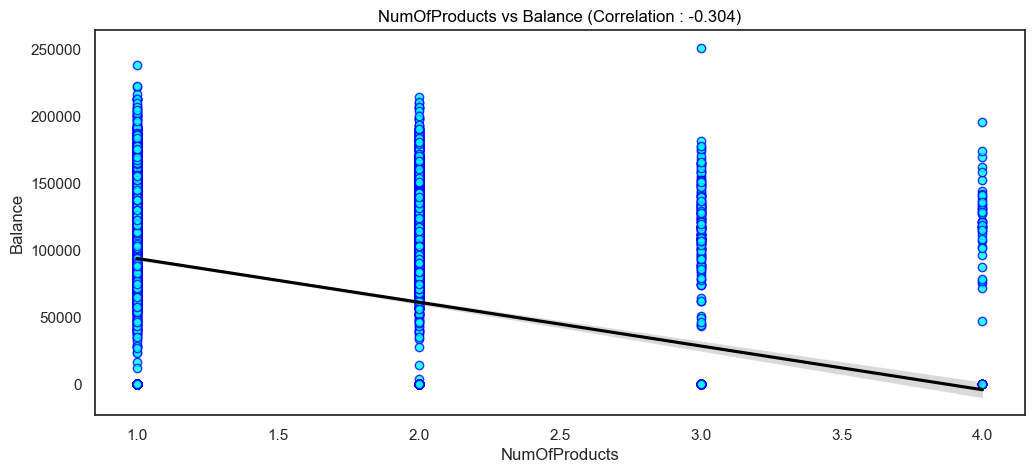

In [43]:
# Exploring the relationship between "NumOfProducts" and "Balance" features

bivariate_eda_nvn(df, "NumOfProducts", "Balance")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>NumOfProducts</b> and <b>Balance</b> is <b>-0.304</b>, indicating a <b>moderate inverse relationship</b> between the <b>number of products a customer has</b> and their <b>account balance</b>.
* Customers with a higher number of products tend to have lower account balances, and vice versa.

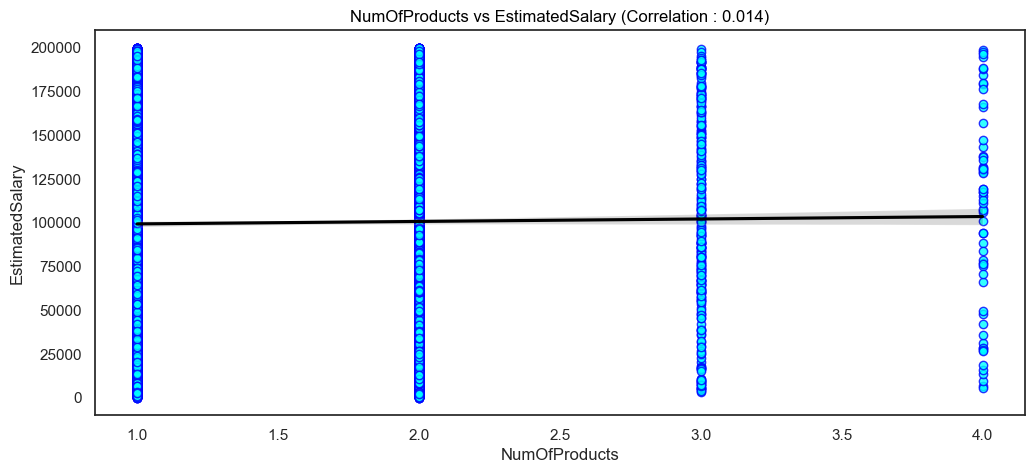

In [44]:
# Exploring the relationship between "NumOfProducts" and "EstimatedSalary" features

bivariate_eda_nvn(df, "NumOfProducts", "EstimatedSalary")

<b>Insights</b>

* The <b>correlation coefficient (r)</b> between <b>NumOfProducts</b> and <b>EstimatedSalary</b> is <b>0.014</b>, indicating there is negligible or <b>zero correlation</b> between the <b>number of products a customer has</b> and the <b>estimated salary of the customer</b>.

### Quantitative - Qualitative Features

<a id = cell_5_2_2></a>

In [45]:
# Creating a function to perform bivariate analysis on a numerical feature and a categorical feature

def bivariate_eda_nvc(data, col_1, col_2):

    sns.set()
    display(HTML(f"<div style = 'text-align : center; font-size : 18px; font-weight : bold;'>{col_1} - {col_2}</div>"))
    print()

    # Checking the unique categories of the feature

    values = data[col_2].unique()

    # Creating a function to categorically store dataframes

    def categorical_df(values):

        # Storing the dataframes in a dictionary

        dfs = {}
        for i in values:
            df_name = f"df_{i}"
            dfs[df_name] = pd.DataFrame(data[[col_2, col_1]][data[col_2] == i])

        return dfs

    df_s = categorical_df(values)

    # Creating plots to visualize the distribution of categories

    for df_ in df_s:
        category = int(df_s[df_][col_2].head(1).values)
        display(HTML(f"<div style = 'font-size : 15px; font-weight : bold;'>{col_2} = {category}</div>"))
        display(np.round(df_s[df_].describe().T, 2))
        print()
        plt.figure(figsize = (12, 5))
        ax = plt.gca()
        fig = sns.boxplot(data[[col_1]][data[col_2] == category], orient = "h", color = "blue", flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue" })
        ax.set_xlabel(col_1, color = "black")
        ax.set_yticklabels([])
        plt.tight_layout()
        plt.show()
        print()

    plt.figure(figsize = (12, 5))
    sns.set_style("white")
    fig = sns.barplot(x = data[col_2], y = data[col_1], color = "darkblue")
    fig.set_title("Mean Distribution", color = "black")

    means = np.round(data.groupby(col_2)[col_1].mean(), 2)
    for i, mean in enumerate(means):
        plt.text(x = i, y = mean + 5, s = f"{mean}", ha = "center", va = "bottom", color = "black", size = 11)


# Creating a dictionary to record the insights

actions = {}

count    mean     std    min    25%    50%    75%    max
CreditScore  2037.0  645.35  100.32  350.0  578.0  646.0  716.0  850.0

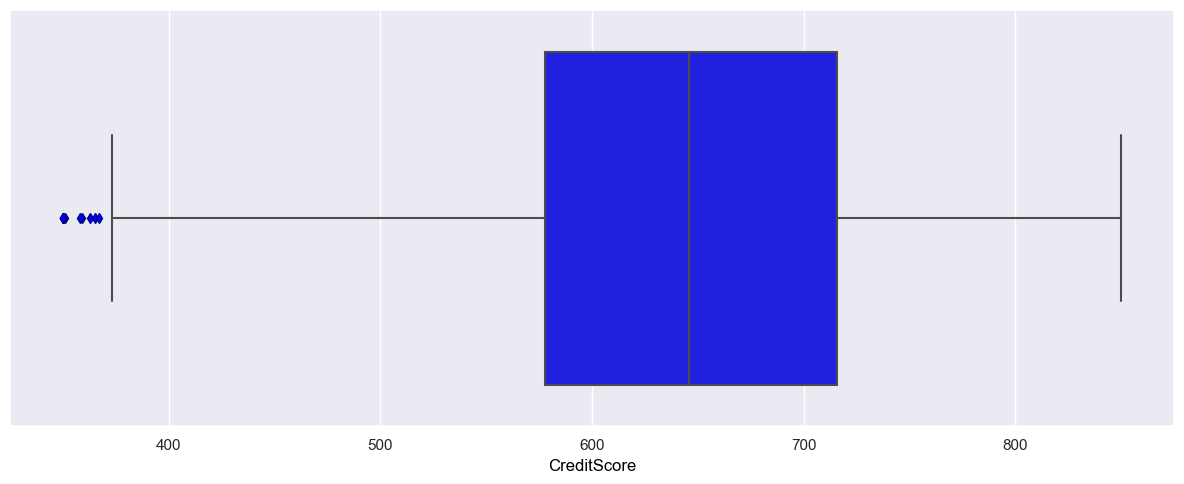

count    mean    std    min    25%    50%    75%    max
CreditScore  7963.0  651.85  95.65  405.0  585.0  653.0  718.0  850.0

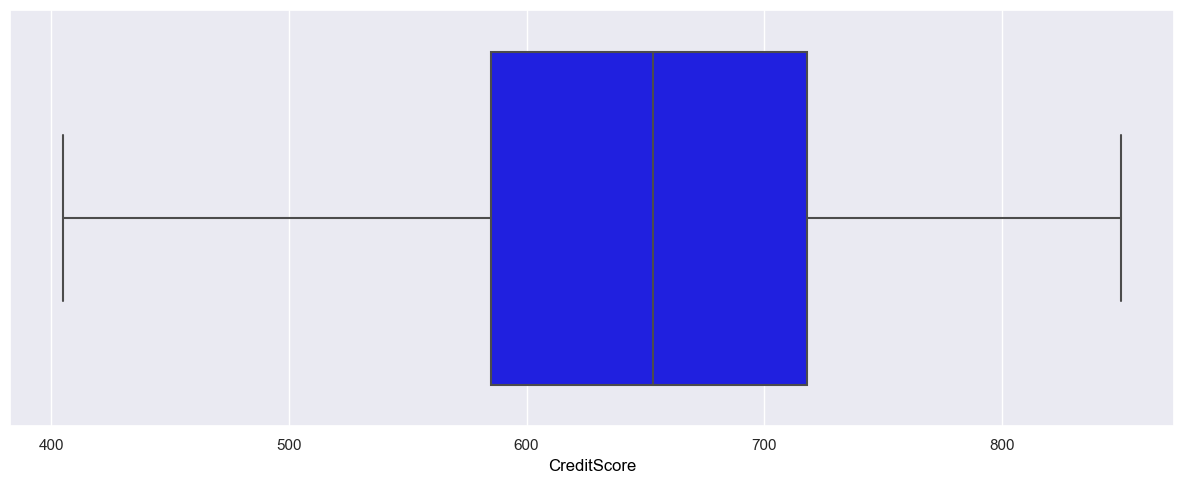

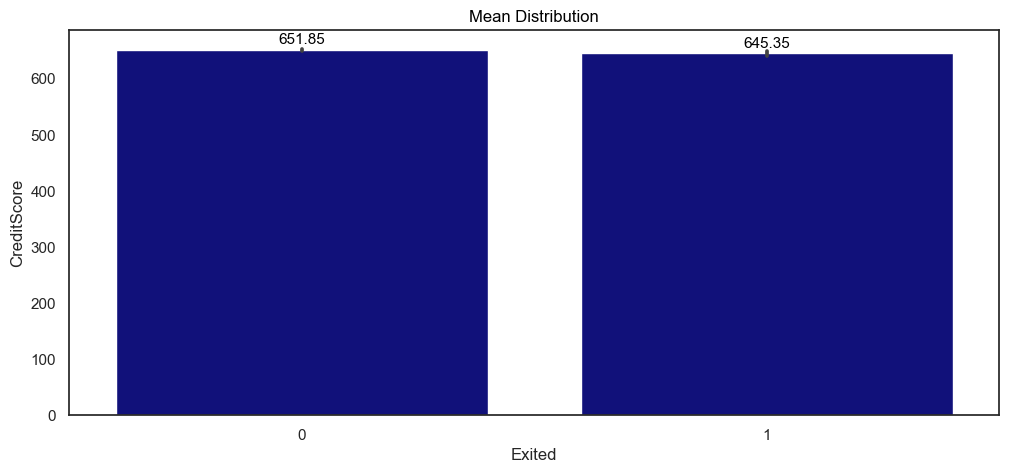

In [46]:
# Exploring the distribution of the "Churn" with respect to the "Exited" feature

bivariate_eda_nvc(df, "CreditScore", "Exited")

actions["Credit Score - Exited"] = "Foster collaboration with sales teams to develop customized strategies for customers with lower credit scores, offering personalized incentives and solutions such as exclusive discounts, loyalty programs, and tailored product recommendations. These measures aim to encourage retention and build long-term relationships with this specific customer segment."

<b>Insights</b>

* Customers who <b>churned</b> tend to have a <b>slights lower average credit score (645.65)</b> compared to those who <b>did not churned (651.85)</b>.
* The credit scores of customers who <b>exited</b> have a <b>narrow range (350 to 850)</b> compared to those who <b>didn't exited (405 to 850)</b>.
* The <b>25th</b>, <b>50th</b>, and <b>75th percentiles</b> for credit scores are <b>slightly lower</b> for customers who <b>exited</b>, indicating a general shift towards <b>lower credit scores </b>among those who <b>churned</b>.
* The <b>Inter Quartile Range (IQR)</b> for <b>churned customers</b> is <b>slightly narrower</b>, indicating <b>less variablility</b> in the <b>middle 50%</b> of ages.

<i>Foster collaboration with sales teams to develop customized strategies for customers with lower credit scores, offering personalized incentives and solutions such as exclusive discounts, loyalty programs, and tailored product recommendations. These measures aim to encourage retention and build long-term relationships with this specific customer segment.</i>

count   mean   std   min   25%   50%   75%   max
Age  2037.0  44.84  9.76  18.0  38.0  45.0  51.0  84.0

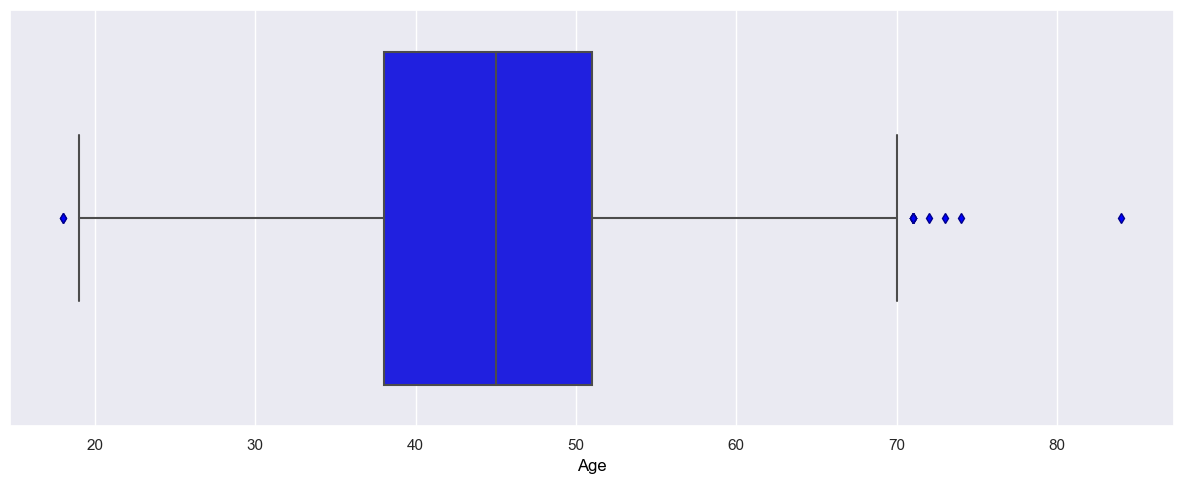

count   mean    std   min   25%   50%   75%   max
Age  7963.0  37.41  10.13  18.0  31.0  36.0  41.0  92.0

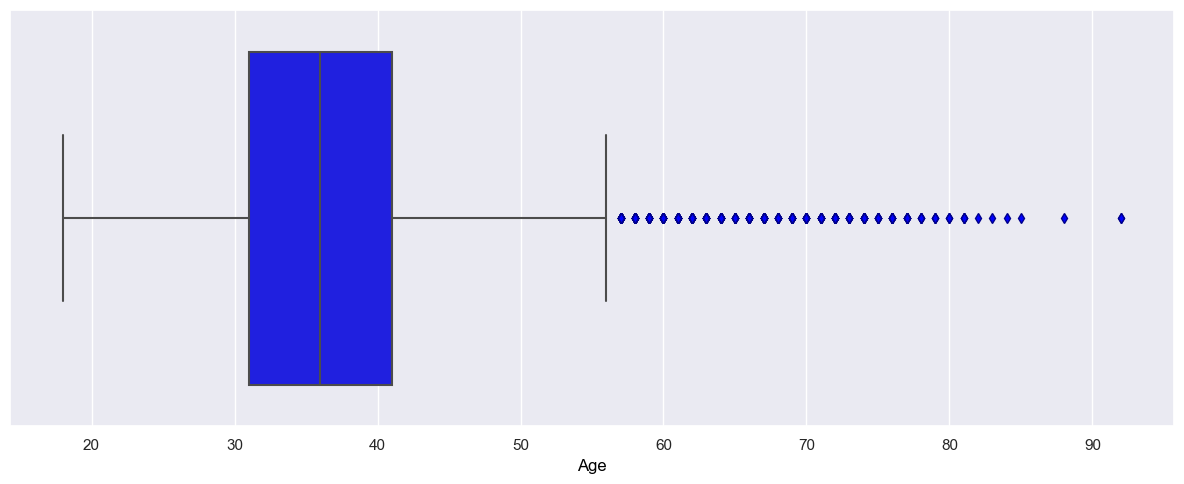

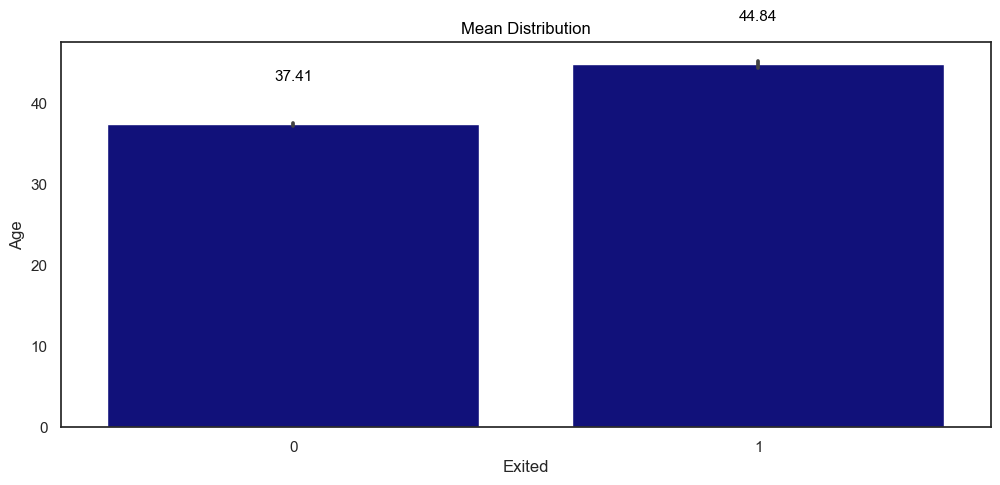

In [47]:
# Exploring the distribution of the "Age" with respect to the "Exited" feature

bivariate_eda_nvc(df, "Age", "Exited")

actions["Age - Exited"] = "Analyzing age demographics guides business approaches, informing sales strategies for retaining older customers. Implement personalized communication strategies, loyalty programs, and exclusive offers tailored to the preferences and needs of older customers. Additionally, assess the financial impact of churn by considering varying lifetime values and costs associated with this demographic, enabling businesses to refine outreach efforts and enhance overall retention in the older customer segment."

<b>Insights</b>

* Customers who <b>churned</b> tend to have a <b>higher average age (44.84 years)</b> compared to those who <b>did not churned (37.41 years)</b>.
* The <b>age range</b> of customers who <b>churned</b> is <b>more extensive</b>, exhibiting a <b>broader distribution</b> that encompasses <b>older individuals</b>.
* The <b>25th</b>, <b>50th</b> and <b>75th percentiles</b> for age are <b>higher</b> for customers who <b>churned</b>, indicating a general shift towards <b>older customers</b> among those who have <b>churned</b>.
* The <b>Inter Quartile Range (IQR)</b> for <b>churned customers</b> extends from <b>38 to 51 years</b>, whereas for those who <b>did not churn</b>, it ranges from <b>31 to 41 years</b>, indicating <b>more variability</b> in the <b>middle 50%</b> of ages.

<i>Analyzing age demographics guides business approaches, informing sales strategies for retaining older customers. Implement personalized communication strategies, loyalty programs, and exclusive offers tailored to the preferences and needs of older customers. Additionally, assess the financial impact of churn by considering varying lifetime values and costs associated with this demographic, enabling businesses to refine outreach efforts and enhance overall retention in the older customer segment.</i>

count  mean   std  min  25%  50%  75%   max
Tenure  2037.0  4.93  2.94  0.0  2.0  5.0  8.0  10.0

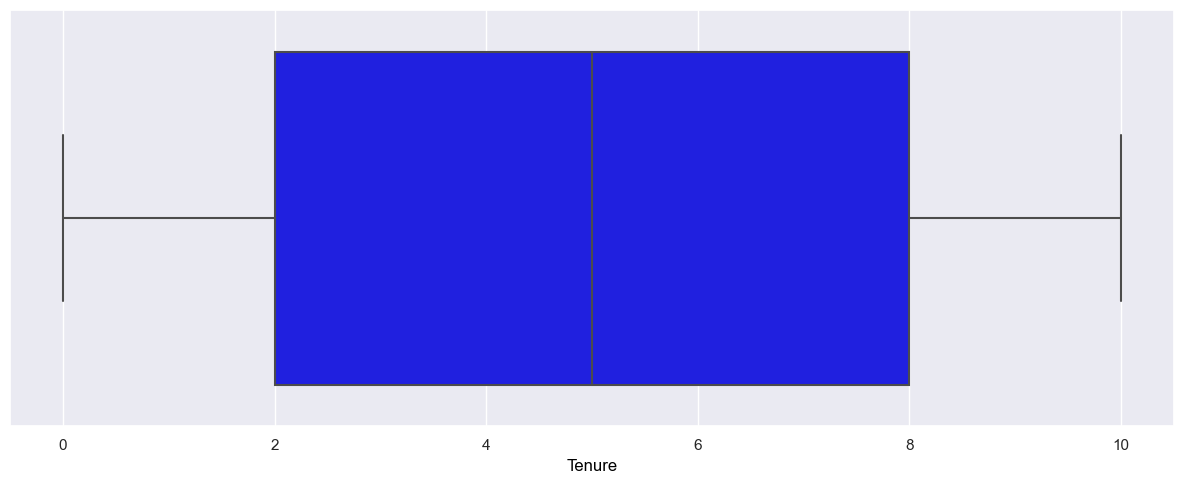

count  mean   std  min  25%  50%  75%   max
Tenure  7963.0  5.03  2.88  0.0  3.0  5.0  7.0  10.0

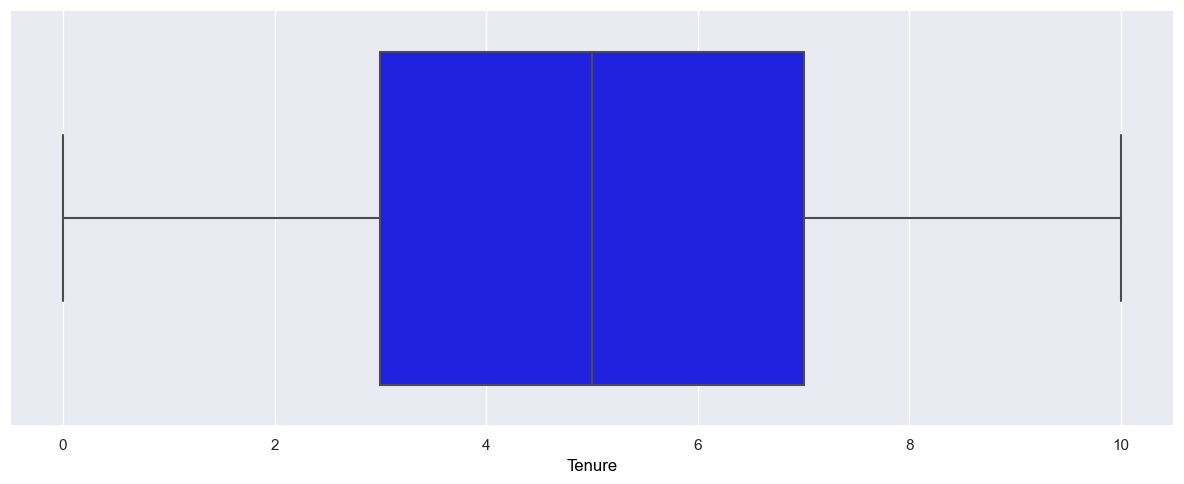

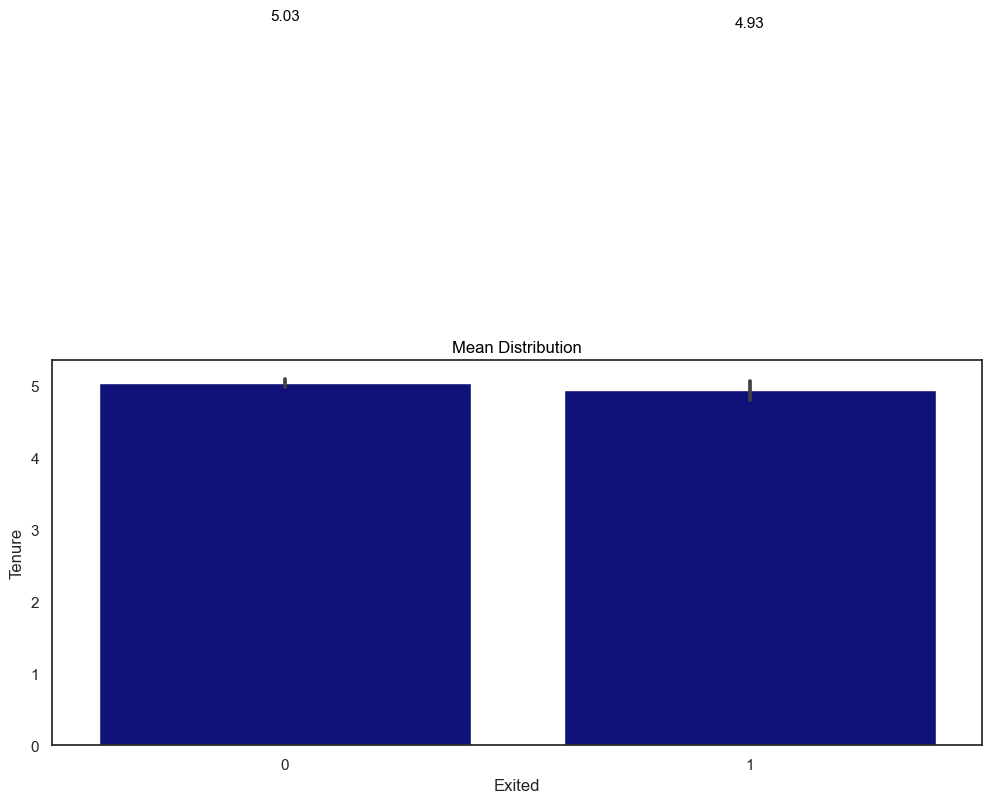

In [48]:
# Exploring the distribution of the "Tenure" with respect to the "Exited" feature

bivariate_eda_nvc(df, "Tenure", "Exited")

actions["Tenure - Exited"] = "Consider tenure as a factor in customer support to assess the risk of churn, focusing on customers with shorter tenures. Implement targeted support initiatives, such as personalized communications, proactive issue resolution, and exclusive offers, to address their specific needs and challenges, enhancing overall retention efforts."

<b>Insights</b>

* The <b>average tenure</b> for customers who <b>exited</b> is <b>slightly lower (4.9 years)</b> compared to those who <b>didn't exited (5.03 years)</b> , but the <b>difference</b> is <b>marginal</b>.
* Customers who <b>exited</b> have a tenure range from <b>0 to 10 years</b>, with the <b>25th</b>, <b>50th</b>, and <b>75th percentiles</b> reflecting a <b>shorter tenure</b> compared to those who <b>didn't exit</b>.
* The <b>IQR</b> for <b>both groups</b> is also <b>similar</b>, indicating a <b>comparable distribution</b> of tenure within the <b>middle 50%</b> of the data.

<i>Consider tenure as a factor in customer support to assess the risk of churn, focusing on customers with shorter tenures. Implement targeted support initiatives, such as personalized communications, proactive issue resolution, and exclusive offers, to address their specific needs and challenges, enhancing overall retention efforts.</i>

count  mean  std  min  25%  50%  75%  max
NumOfProducts  2037.0  1.48  0.8  1.0  1.0  1.0  2.0  4.0

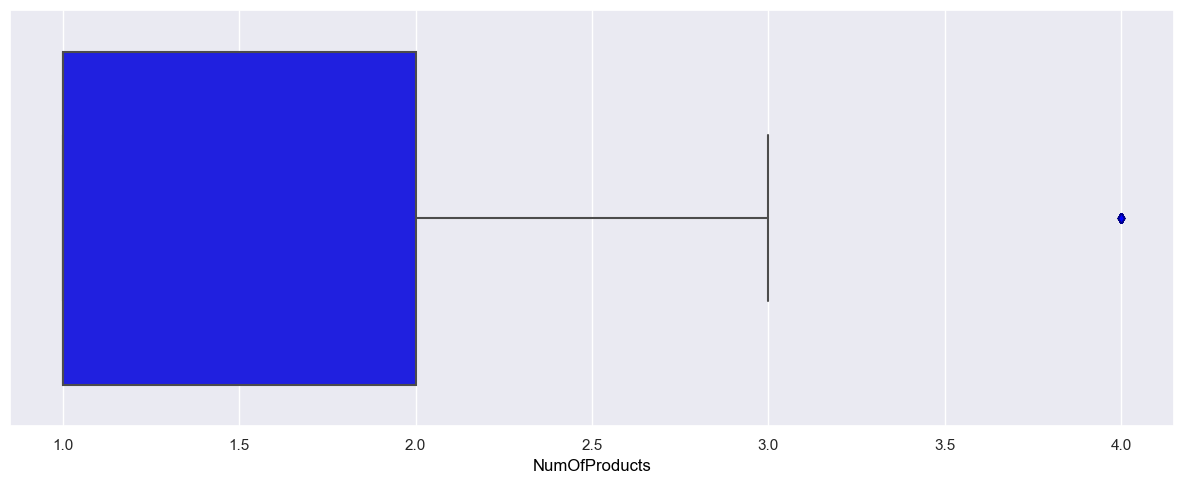

count  mean   std  min  25%  50%  75%  max
NumOfProducts  7963.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

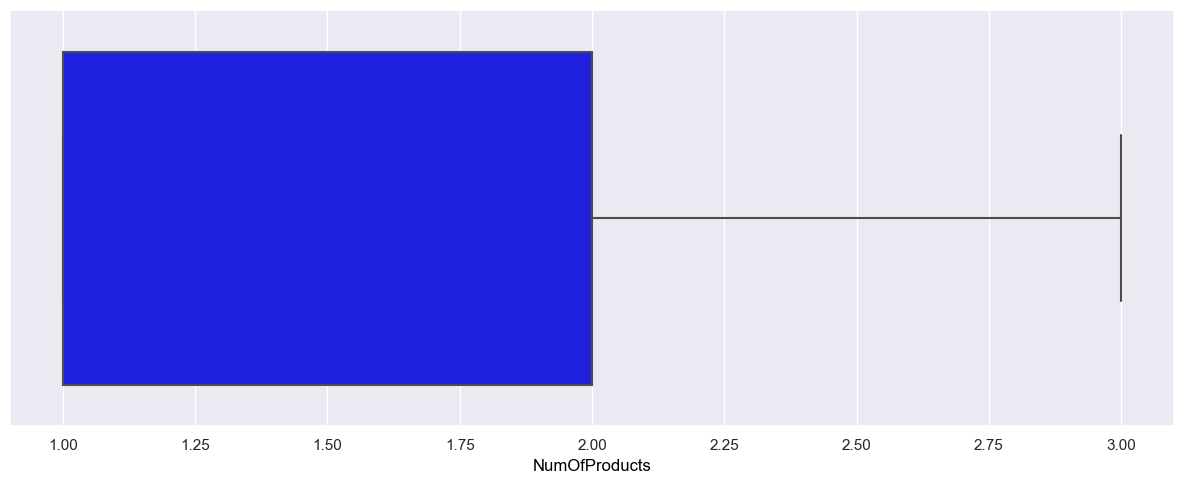

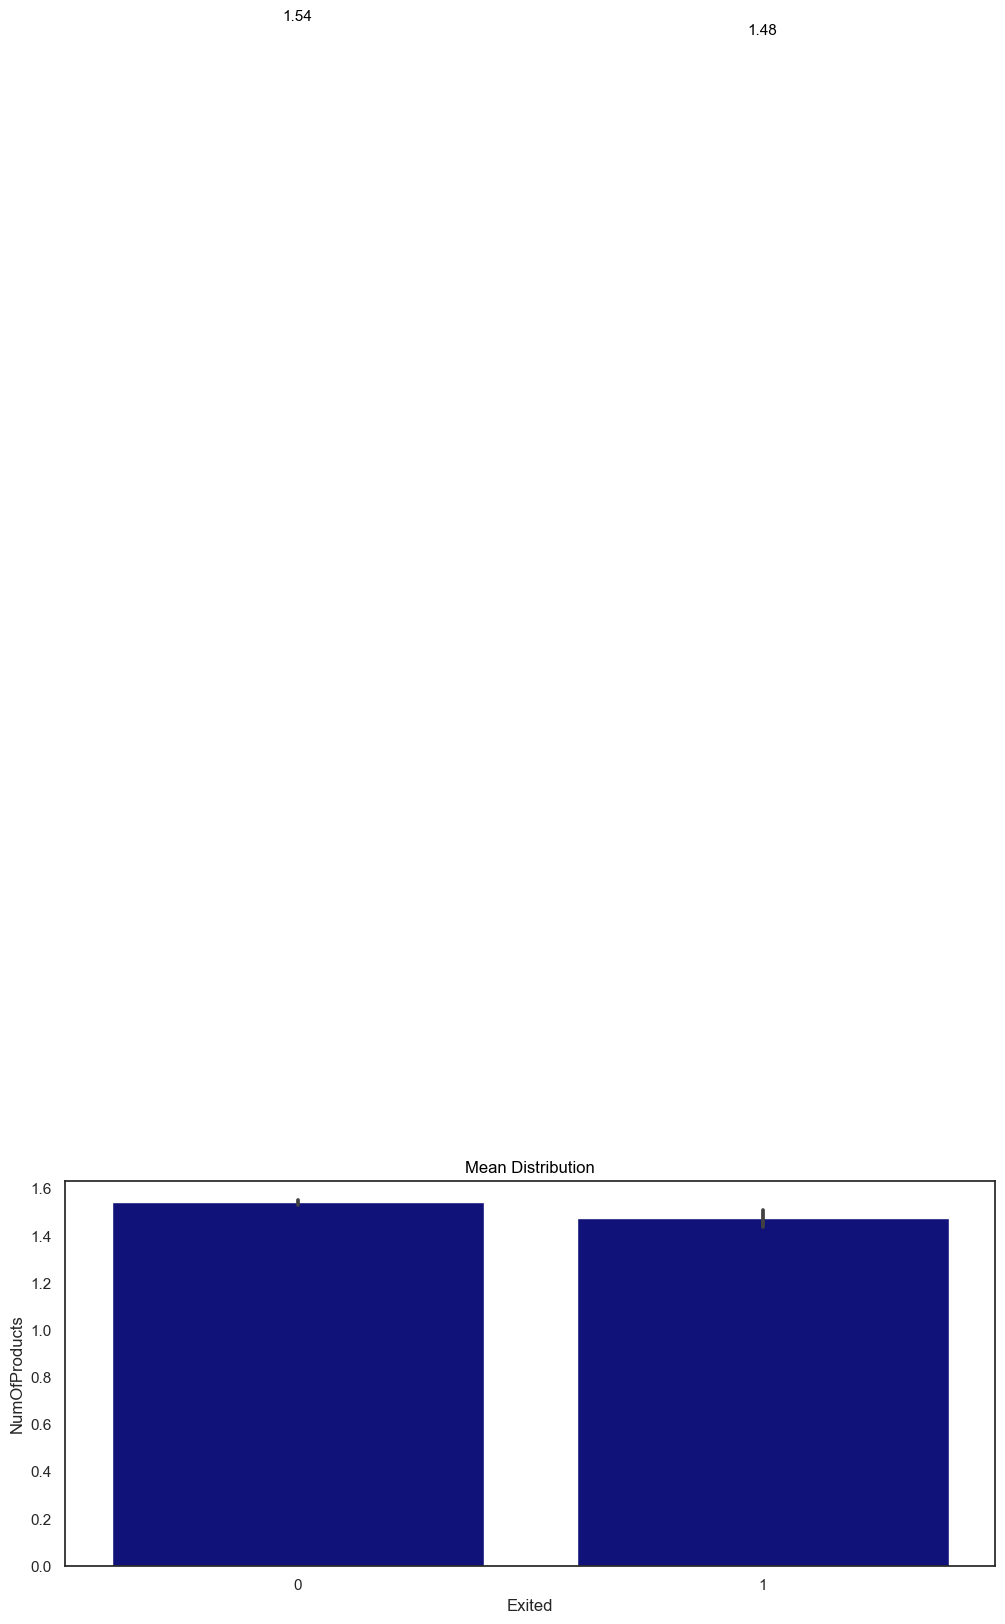

In [49]:
# Exploring the distribution of the "NumOfProducts" with respect to the "Exited" feature

bivariate_eda_nvc(df, "NumOfProducts", "Exited")

actions["NumOfProducts - Exited"] = "Proactively engaging with customers who have purchased a single product is crucial for addressing concerns and preventing churn. Tailoring customer support strategies to understand the reasons behind fewer product purchases guides efforts in retaining customers with lower product counts. Collaborating closely with the sales team enhances targeted strategies for upselling or cross-selling to customers at risk, ensuring a comprehensive approach to customer retention."

<b>Insights</b>

* The <b>mean number of products</b> purchased by customers is the <b>same</b> in <b>both groups</b>.
* For customers who <b>exited</b>, the number of products purchased ranges from <b>1 to 4</b>, with the majority (25th, 50th and 75th percentiles) concentrated around <b>1 to 2 products</b>.

<i>Proactively engaging with customers who have purchased a single product is crucial for addressing concerns and preventing churn. Tailoring customer support strategies to understand the reasons behind fewer product purchases guides efforts in retaining customers with lower product counts. Collaborating closely with the sales team enhances targeted strategies for upselling or cross-selling to customers at risk, ensuring a comprehensive approach to customer retention.</i>

count      mean       std  min       25%        50%        75%  \
Balance  2037.0  91108.54  58360.79  0.0  38340.02  109349.29  131433.33   

               max  
Balance  250898.09

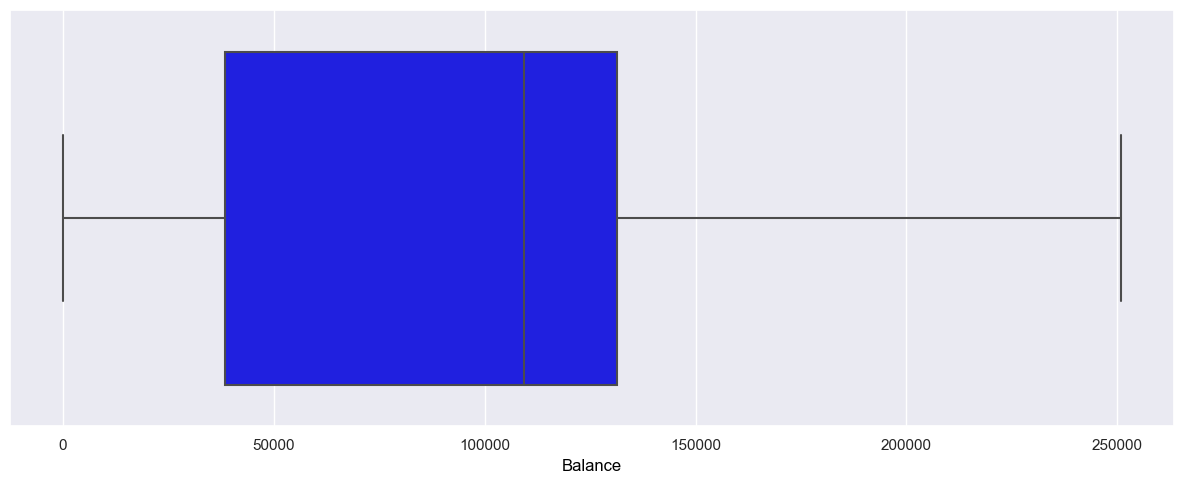

count     mean       std  min  25%       50%        75%       max
Balance  7963.0  72745.3  62848.04  0.0  0.0  92072.68  126410.28  221532.8

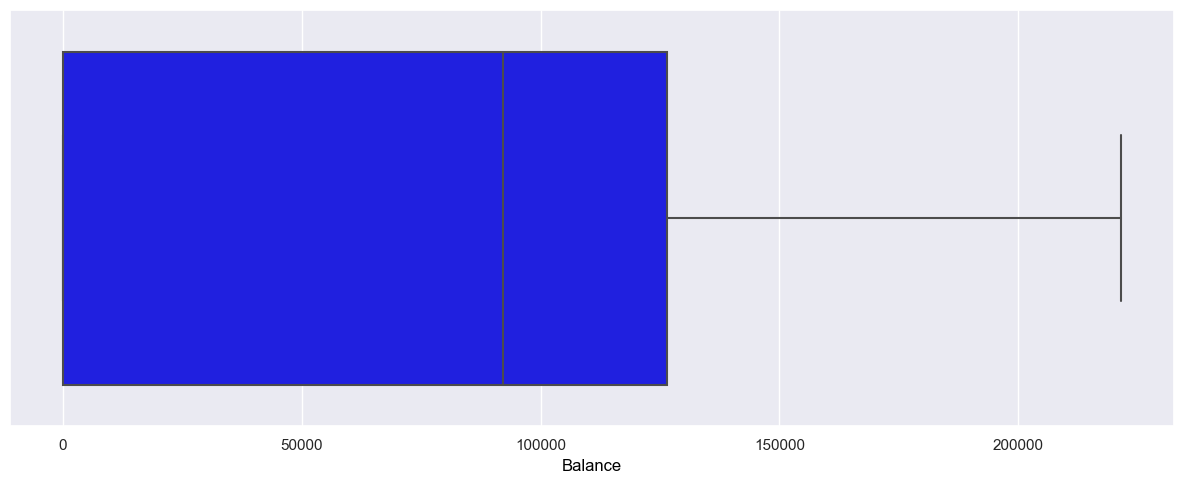

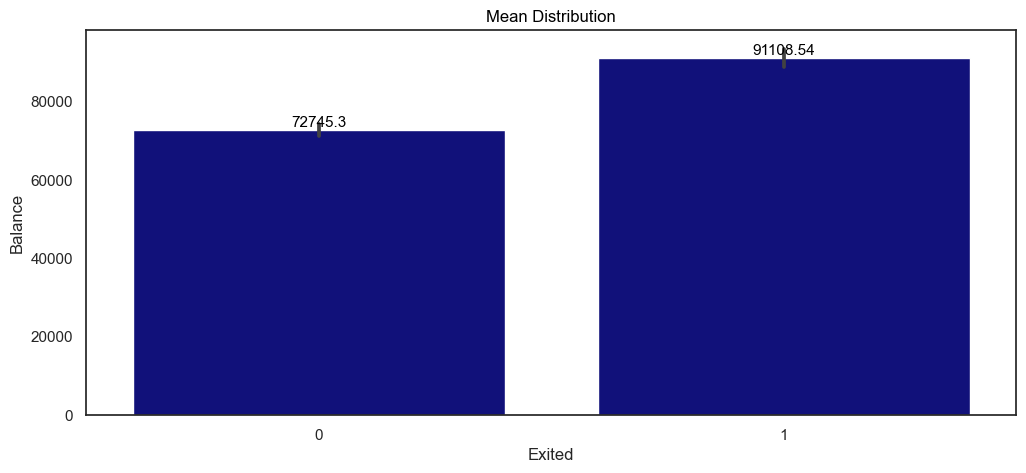

In [50]:
# Exploring the distribution of the "Balance" with respect to the "Exited" feature

bivariate_eda_nvc(df, "Balance", "Exited")

actions["Balance - Exited"] = """The indication of a higher average balance for exiting customers suggests that a greater account balance does not guarantee customer retention. To tackle churn among customers with higher balances, it is crucial to identify pain points, dissatisfaction, or service-related issues. Customer support should perceive higher balances as potential indicators of churn risk, prompting proactive engagement to understand and address concerns promptly. """

<b>Insights</b>

* Customers who <b>exited</b> have a <b>higher mean balance</b> of <b>91,108.54</b> compared to those who <b>didn't exited (72,745.30)</b>.
* The <b>distribution</b> of balance for customers who <b>exited</b> has a <b>wider range (0 to 250,898.09)</b> compared to those who <b>didn't exit (0 to 221,532.80)</b>.
* The <b>25th, 50th, and 75th percentiles</b> for the balance are <b>higher</b> for customer who <b>exited</b>, indicating a general <b>shift</b> towards <b>higher balances</b> among those who <b>churned</b>.

<i>The indication of a higher average balance for exiting customers suggests that a greater account balance does not guarantee customer retention. To tackle churn among customers with higher balances, it is crucial to identify pain points, dissatisfaction, or service-related issues. Customer support should perceive higher balances as potential indicators of churn risk, prompting proactive engagement to understand and address concerns promptly.</i>

count       mean       std    min       25%        50%  \
EstimatedSalary  2037.0  101465.68  57912.42  11.58  51907.72  102460.84   

                       75%       max  
EstimatedSalary  152422.91  199808.1

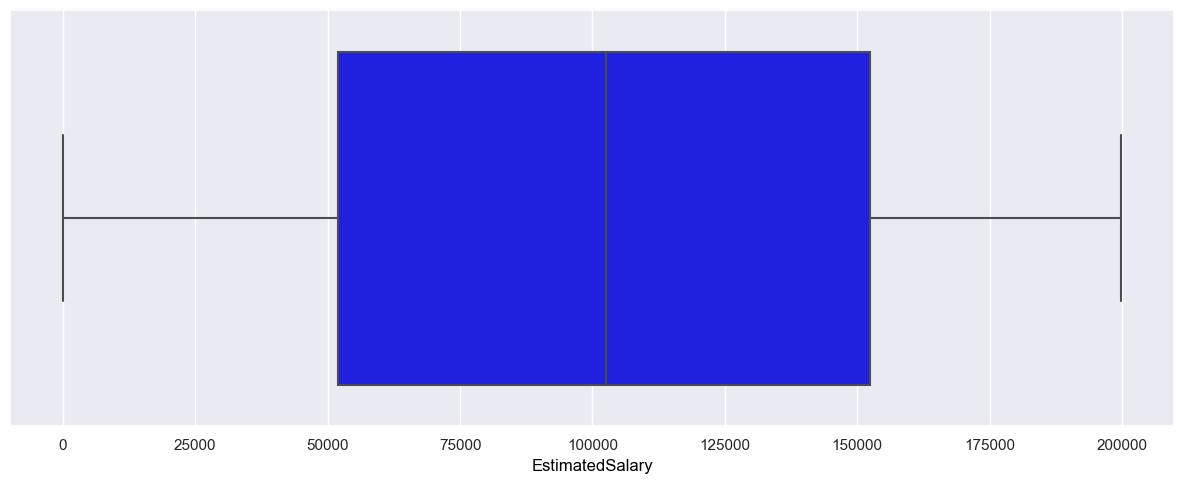

count      mean       std    min       25%       50%  \
EstimatedSalary  7963.0  99738.39  57405.59  90.07  50783.49  99645.04   

                       75%        max  
EstimatedSalary  148609.96  199992.48

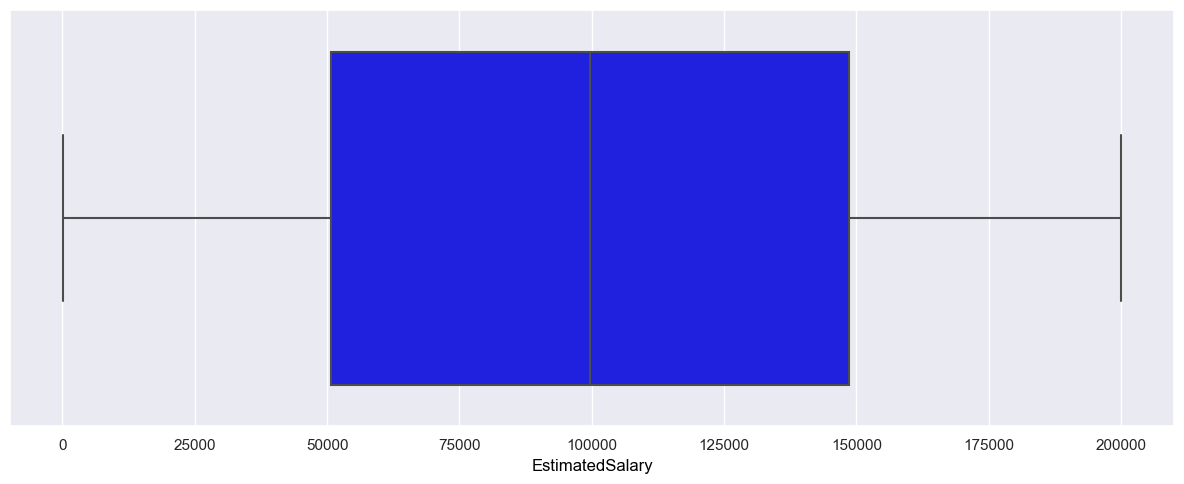

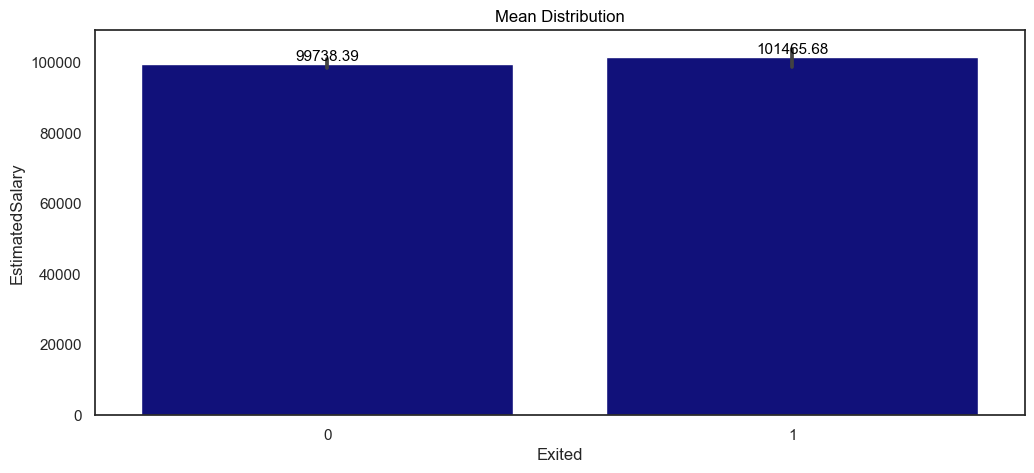

In [51]:
# Exploring the distribution of the "EstimatedSalary" with respect to the "Exited" feature

bivariate_eda_nvc(df, "EstimatedSalary", "Exited")

actions["EstimatedSalary - Exited"] = "Awareness of potential churn among customers with higher estimated salaries is vital. Collaborating to gather qualitative feedback directly from customers regarding their experiences will help identify common issues contributing to churn."

<b>Insights</b>

* The <b>average estimated salary</b> for customers who have <b>churned</b> is <b>slightly higher (101,4658.68)</b> than for those  who have <b>not churned (99,738.39)</b>.
* The <b>25th, 50th and 75th percentiles</b> for estimated salary are <b>slightly higher</b> for customers who <b>exited</b>, indicating a general shift towards <b>higher salaries</b> among  those who <b>churned</b>.

<i>Awareness of potential churn among customers with higher estimated salaries is vital. Collaborating to gather qualitative feedback directly from customers regarding their experiences will help identify common issues contributing to churn.</i>

### Qualitative - Qualitative Features

<a id = cell_5_2_3></a>

In [52]:
# Creating a function to conduct bivariate analysis on two categorical features

def bivariate_eda_cvc(data, col_1, col_2):

    display(HTML(f"<div style = 'text-align : center; font-size : 18px; font-weight : bold;'>{col_1} - {col_2}</div>"))
    print()

    # Performing cross-tablulation on two categorical features

    cross_tab = pd.crosstab(data[col_1], data[col_2])
    display(cross_tab)
    print()

    # Plotting the distribution of categories

    plt.figure(figsize = (10, 5))
    fig = sns.heatmap(cross_tab, annot = True, cmap = "Blues", fmt = ".0f")

    plt.show()

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

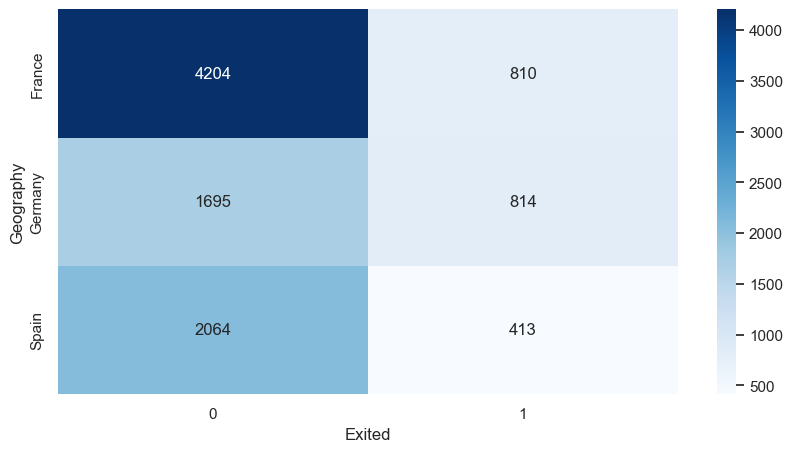

In [53]:
# Exploring the distribution of the "Geography" with respect to the "Exited" feature

bivariate_eda_cvc(df, "Geography", "Exited")

actions["Geography - Exited"] = """Adapting strategies based on geography is crucial for effective customer acquisition and retention. Being prepared to address regional variations in customer churn involves considering specific factors that influence it. Tailoring retention strategies based on geographical patterns, such as customizing communication for country-specific challenges or preferences, enhances overall effectiveness.
this information to adapt their strategies based on geographical considerations. Understanding regional variations in customer behavior can guide both acquisition and retention efforts.
Customer support representatives may observe that the distribution of customer churn varies across different geographies. The team should be prepared to address specific regional factors influencing churn.
Regional trends in customer concerns, preferences, or economic conditions could impact the approach to customer support and retention strategies.
Tailor retention strategies based on geographical patterns. For instance, if there are country-specific challenges or preferences influencing churn, customize communication and outreach efforts accordingly.
this information to adapt their strategies based on geographical considerations. Understanding regional variations in customer behavior can guide both acquisition and retention efforts.
Customer support representatives may observe that the distribution of customer churn varies across different geographies. The team should be prepared to address specific regional factors influencing churn.
Regional trends in customer concerns, preferences, or economic conditions could impact the approach to customer support and retention strategies."""

<b>Insights</b>

* <b>France</b> has the <b>highest count</b> of customers who <b>didn't exit (4204)</b>, followed by <b>Spain (2064)</b>, and <b>Germany (1695)</b>.
* Among customers who <b>exited</b>, the <b>churn rate</b> appears <b>highest</b> in <b>Germany (814)</b>, followed by <b>France (810)</b> and <b>Spain (413)</b>.

<i>Adapting strategies based on geography is crucial for effective customer acquisition and retention. Being prepared to address regional variations in customer churn involves considering specific factors that influence it. Tailoring retention strategies based on geographical patterns, such as customizing communication for country-specific challenges or preferences, enhances overall effectiveness.</i>

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

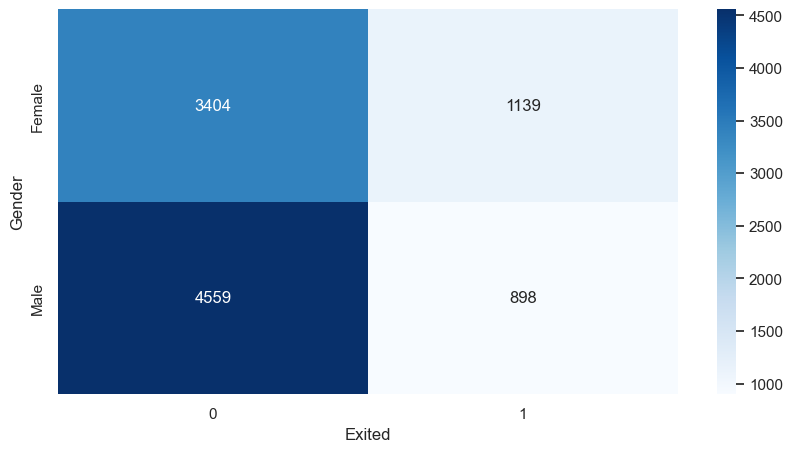

In [54]:
# Exploring the distribution of the "Gender" with respect to the "Exited" feature

bivariate_eda_cvc(df, "Gender", "Exited")

actions["Gender - Exited"] = "Understanding gender-related factors influencing churn is crucial for guiding support strategies. Analyzing how males and females respond to sales efforts provides valuable insights. Explore gender-specific financial impacts of churn, including spending patterns and revenue contribution. Ensure customer support teams are trained to handle gender-specific issues, providing assistance that resonates with the concerns of both male and female customers."

<b>Insights</b>

* <b>Males</b> have a higher count among customers who <b>didn't exit (4559)</b>, while the number of <b>females</b> who are <b>3404</b>.
* Among customers, the <b>churn rate</b> appears <b>higher</b> among <b>females (1139)</b> compared to <b>males (898)</b>.

<i>Understanding gender-related factors influencing churn is crucial for guiding support strategies. Analyzing how males and females respond to sales efforts provides valuable insights. Explore gender-specific financial impacts of churn, including spending patterns and revenue contribution. Ensure customer support teams are trained to handle gender-specific issues, providing assistance that resonates with the concerns of both male and female customers.</i>

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424

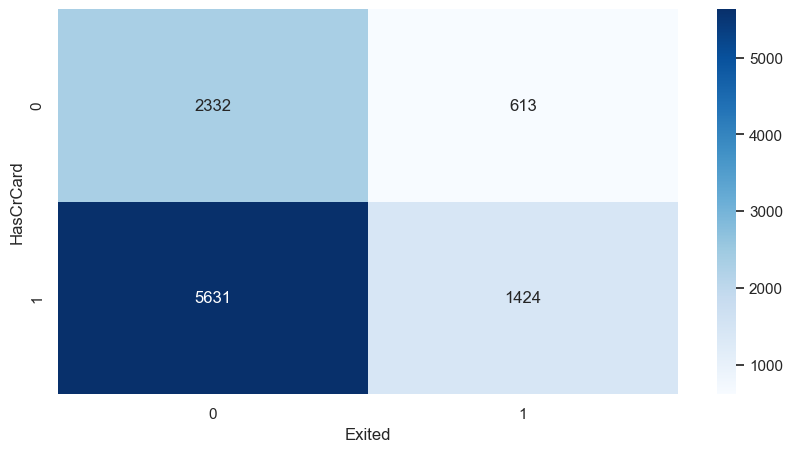

In [55]:
# Exploring the distribution of the "HasCrCard" with respect to the "Exited"

bivariate_eda_cvc(df, "HasCrCard", "Exited")

actions["HasCrCard - Exited"] = "Addressing potential issues related to credit card services and providing tailored support is crucial for optimizing customer experience. Understanding how credit card ownership influences behavior allows for targeted initiatives, helping refine marketing strategies and potentially incentivize customers to obtain credit cards."

<b>Insights</b>

* Customers <b>with</b> a <b>credit card</b> have a <b>higher count</b> among those who <b>didn't exit (5631)</b>, while the customers <b>without</b> a credit card are <b>2332</b>.
* The <b>churn rate</b> appears <b>higher</b> for customers <b>with</b> a <b>credit card (1424)</b> compared to ones <b>without</b> a credit card <b>(316)</b>.

<i>Addressing potential issues related to credit card services and providing tailored support is crucial for optimizing customer experience. Understanding how credit card ownership influences behavior allows for targeted initiatives, helping refine marketing strategies and potentially incentivize customers to obtain credit cards.</i>

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735

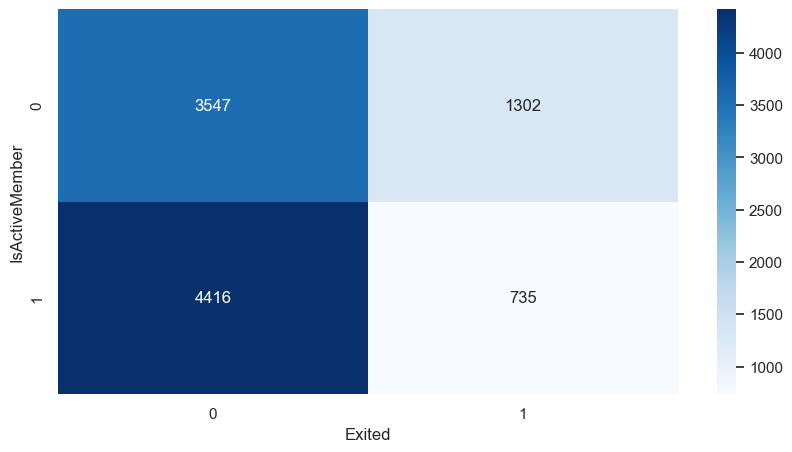

In [56]:
# Exploring the distribution of the "IsActiveMember" with respect to the "Exited" feature

bivariate_eda_cvc(df, "IsActiveMember", "Exited")

actions["IsActiveMember - Exited"] = "Enhancing engagement with non-active members through proactive participation encouragement and issue resolution is key to boosting retention rates. Investigate the factors contributing to the elevated churn rate among inactive members by collaborating and collecting qualitative feedback to identify their specific challenges. Implement tailored strategies, such as personalized communication, promotions, or incentives, to motivate inactive members and promote increased participation."

<b>Insights</b>

* <b>Majority</b> of the customers who <b>didn't exit</b> are <b>active members (4416)</b>, while <b>3547</b> customers are <b>non-active members</b>.
* Among the customers, the <b>churn rate</b> appears <b>higher</b> for <b>non-active members (1302)</b>, compared to <b>active members (735)</b>.

<i>Enhancing engagement with non-active members through proactive participation encouragement and issue resolution is key to boosting retention rates. Investigate the factors contributing to the elevated churn rate among inactive members by collaborating and collecting qualitative feedback to identify their specific challenges. Implement tailored strategies, such as personalized communication, promotions, or incentives, to motivate inactive members and promote increased participation.</i>

## Multivariate Analysis

<a id = cell_5_3></a>

In [57]:
# Creating a function to conduct multivariate analysis

def multivariate_eda(data, col_1, col_2, col_3):

    sns.set()
    display(HTML(f"<div style = 'text-align : center; font-size = 18px; font-weight : bold'>{col_1} - {col_2} - {col_3}</div>"))

    # Checking the statistical summary of the numerical feature in relation to both categorical features

    for unique_1 in data[col_1].unique():
        for unique_2 in data[col_2].unique():
            print()
            display(HTML(f"<div style = 'font-size = 18px; font-weight : bold'>{col_1} = {unique_1}, {col_2} = {unique_2}, {col_3}</div>"))
            df_1 = data[[col_3]][ (data[col_1] == unique_1) & (data[col_2] == unique_2) ]
            print()
            display(np.round(df_1.describe().T, 2))

            # Plotting boxplot to check the distribution

            plt.figure(figsize = (12, 5))
            ax = plt.gca()
            fig = sns.boxplot(df_1, orient = "h", color = "blue", flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            ax.set_xlabel(col_3, color = "black")
            ax.set_yticklabels([])
            plt.tight_layout()
            plt.show()
            print()

count    mean     std    min    25%    50%    75%    max
CreditScore  810.0  641.91  100.15  350.0  570.0  643.5  710.0  850.0

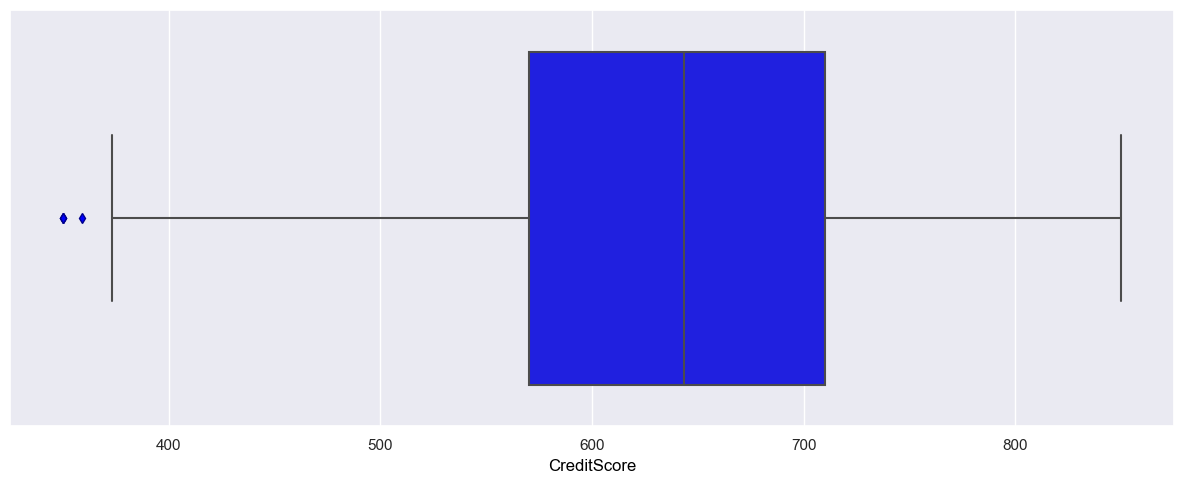

count    mean    std    min    25%    50%    75%    max
CreditScore  413.0  647.48  99.58  350.0  584.0  649.0  717.0  850.0

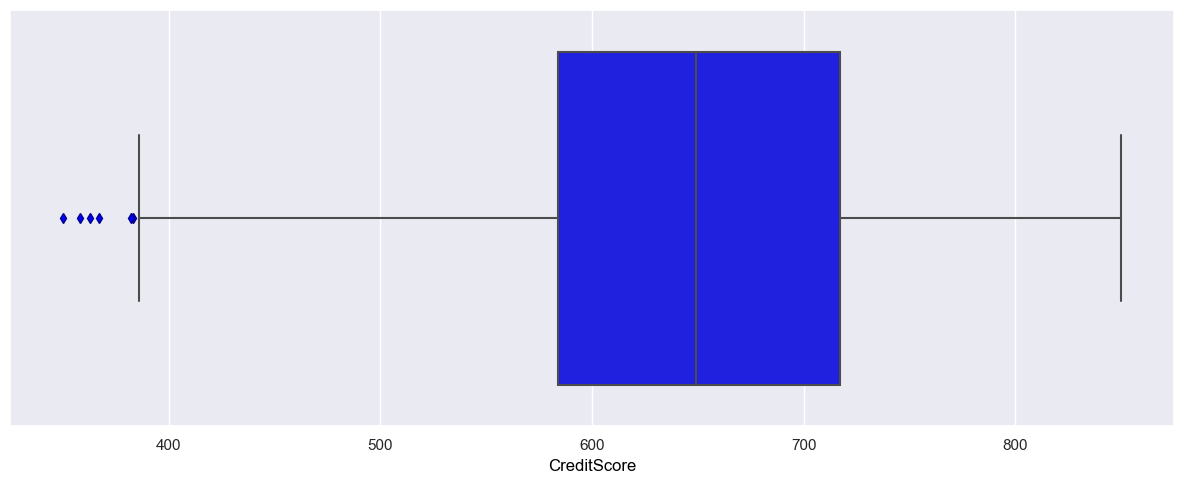

count    mean     std    min     25%    50%     75%    max
CreditScore  814.0  647.69  100.89  350.0  579.25  646.0  724.75  850.0

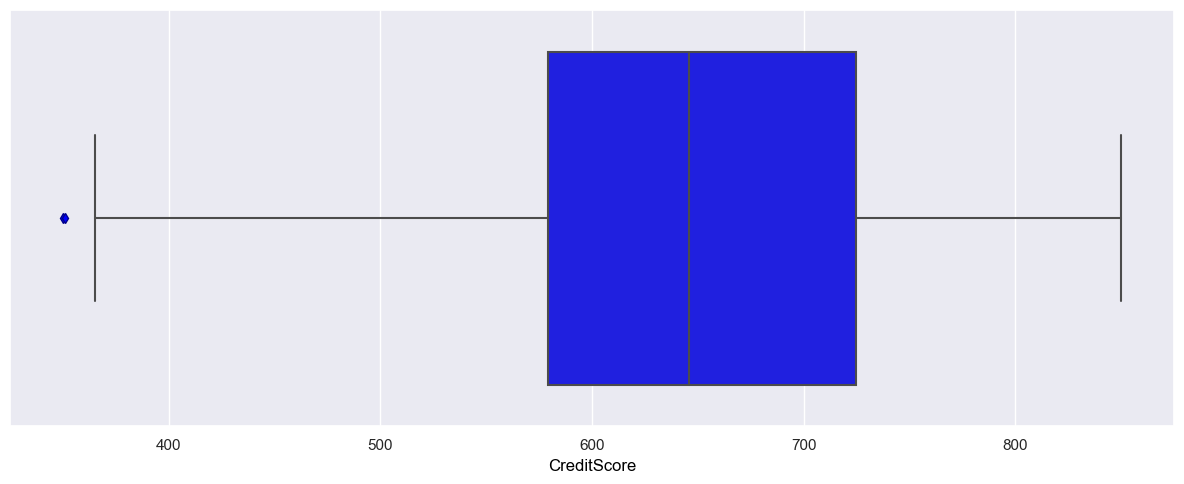

count    mean    std    min    25%    50%    75%    max
CreditScore  4204.0  651.16  96.34  408.0  583.0  655.0  718.0  850.0

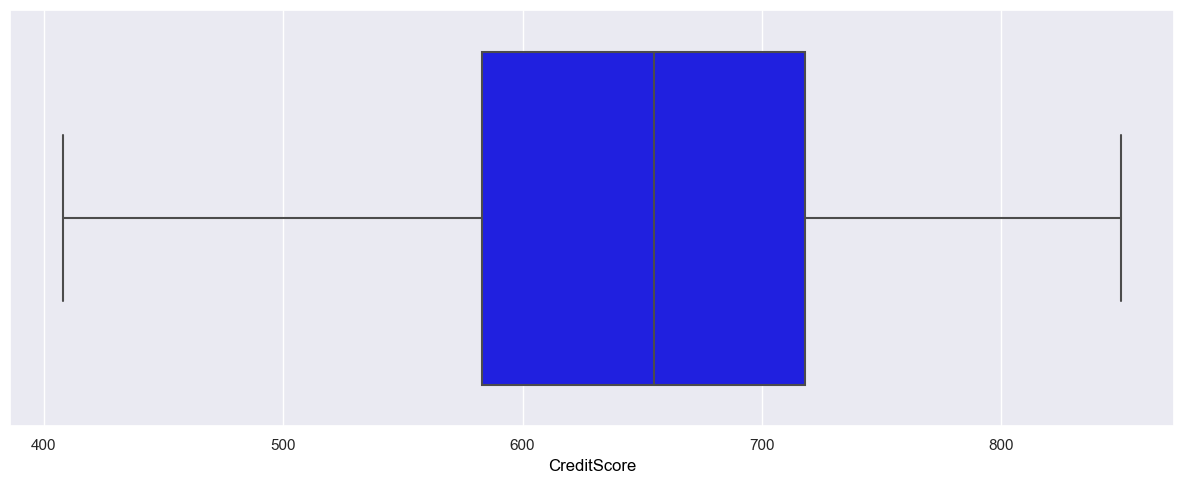

count   mean    std    min    25%    50%    75%    max
CreditScore  2064.0  652.1  93.29  413.0  587.0  652.0  715.0  850.0

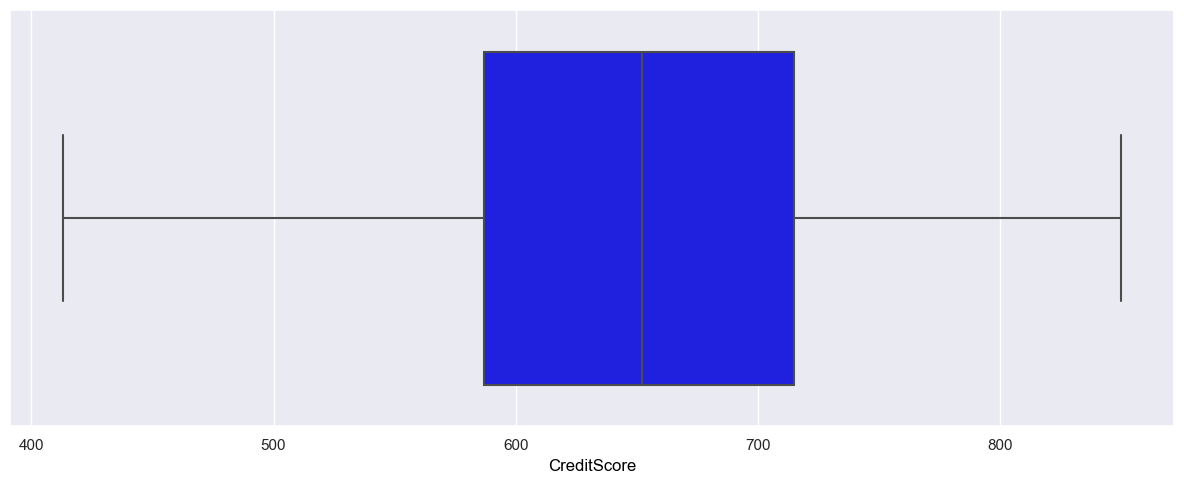

count    mean    std    min    25%    50%    75%    max
CreditScore  1695.0  653.26  96.82  405.0  587.5  653.0  721.0  850.0

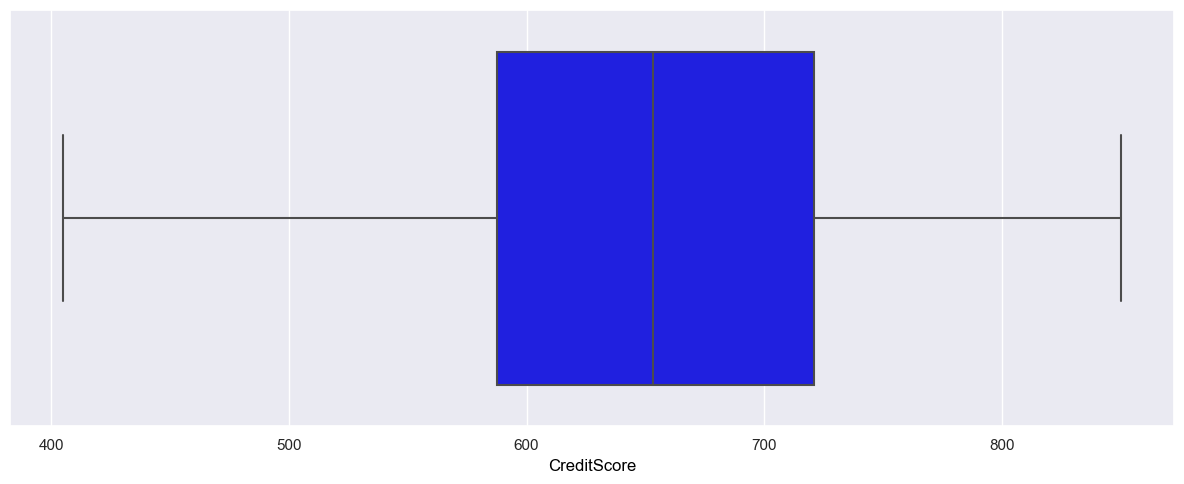

In [58]:
# Exploring the distribution of "CreditScore" in relation to both "Exited" and "Geography" features

multivariate_eda(df, "Exited", "Geography", "CreditScore")

actions["Exited - Geography - CreditScore"] = "Assess whether distinct factors in each geographical category contribute to the lower CreditScores of exiting customers. Collaborate with relevant teams to pinpoint and rectify these specific factors. Explore the possibility of implementing targeted credit-building initiatives or personalized offers for customers in each geographical category with lower CreditScores to enhance retention"

<b>Insights</b>

* For customers who <b>exited</b>, the <b>mean credit score</b> is <b>slightly lower</b> in <b>France (641.91)</b> compared to <b>Spain (647.48)</b> and <b>Germany (647.69)</b>.
* Among <b>non-exited customers</b>, <b>Germany</b> has the <b>highest mean credit score (653.26)</b>, followed by <b>Spain(652.10)</b> and <b>France (651.36)</b>.

<i>Assess whether distinct factors in each geographical category contribute to the lower CreditScores of exiting customers. Collaborate with relevant teams to pinpoint and rectify these specific factors. Explore the possibility of implementing targeted credit-building initiatives or personalized offers for customers in each geographical category with lower CreditScores to enhance retention.</b>

count    mean    std    min    25%    50%    75%    max
CreditScore  1139.0  646.88  99.34  350.0  582.5  648.0  716.0  850.0

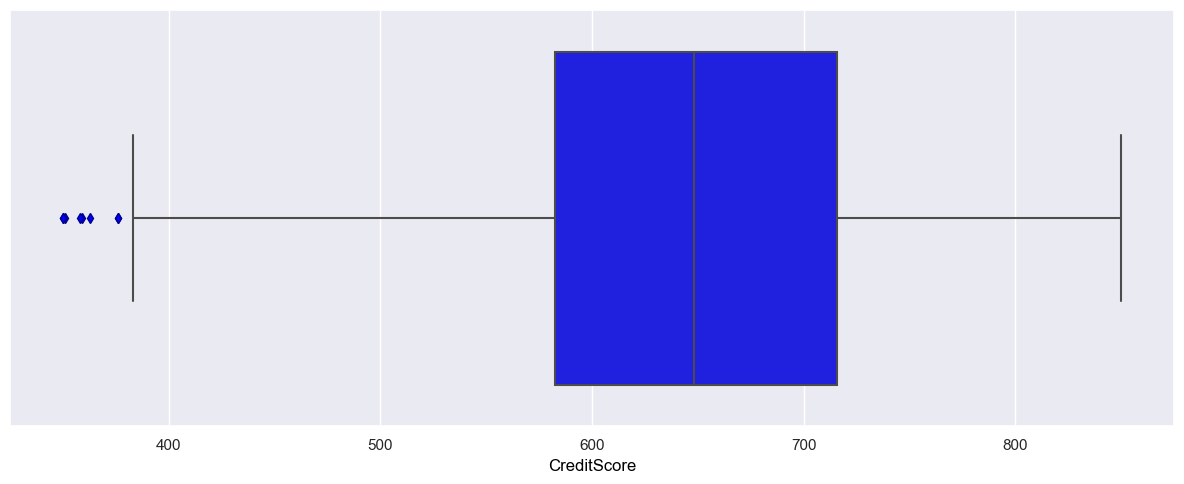

count    mean     std    min    25%    50%     75%    max
CreditScore  898.0  643.41  101.58  350.0  572.0  643.5  716.75  850.0

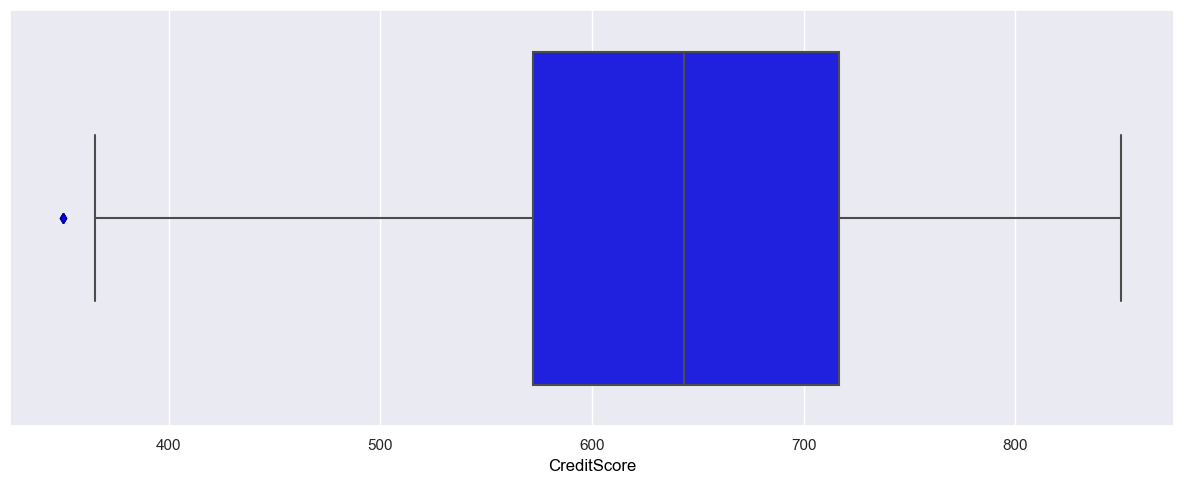

count    mean   std    min    25%    50%    75%    max
CreditScore  3404.0  652.15  95.9  410.0  585.0  654.0  717.0  850.0

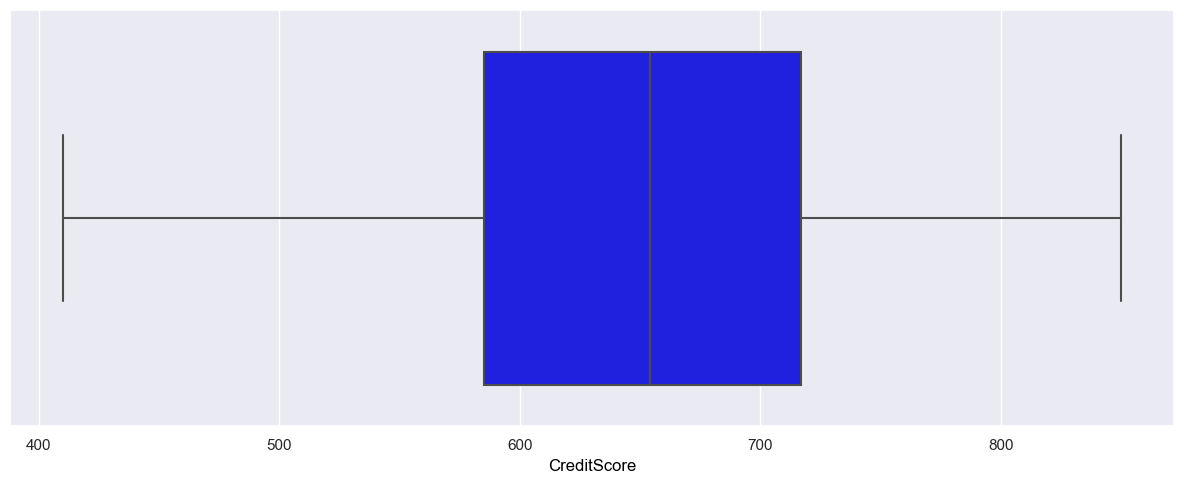

count    mean    std    min    25%    50%    75%    max
CreditScore  4559.0  651.63  95.48  405.0  585.0  653.0  718.0  850.0

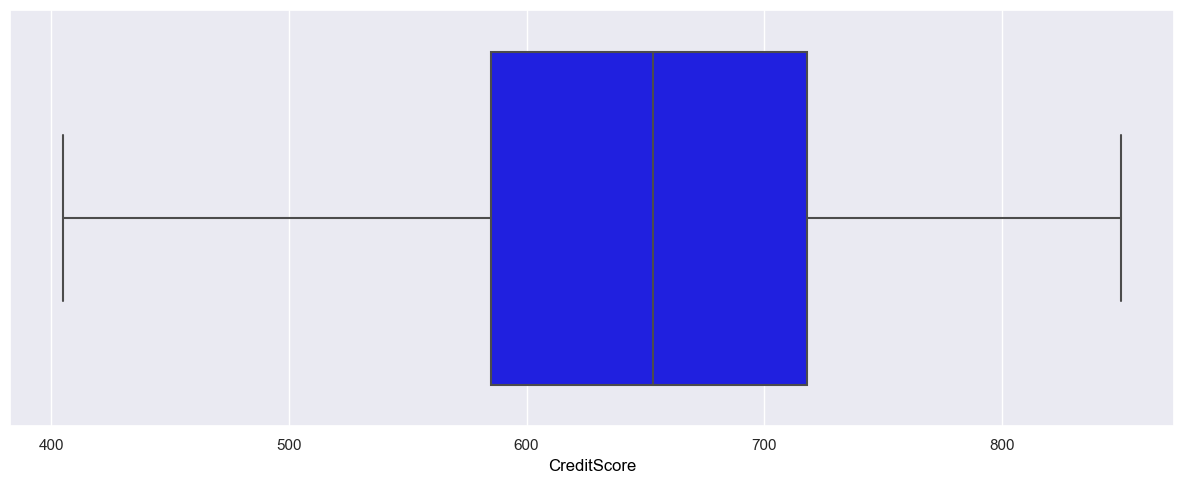

In [59]:
# Exploring the distribution of "CreditScore" in relation to both "Exited" and "Gender" feature

multivariate_eda(df, "Exited", "Gender", "CreditScore")

actions["Exited - Gender - CreditScore"]= "Evaluate whether there are gender-specific factors influencing the lower CreditScores of customers who have exited. Collaborate with pertinent teams to identify and address these factors. Explore the implementation of targeted credit-building initiatives or personalized offers for customers of both genders with lower CreditScores, with the goal of enhancing retention."

<b>Insights</b>

* For customers who <b>exited</b>, the <b>mean credit score</b> is <b>slightly lower</b> for <b>males (643.41)</b> compared to <b>females (646.88)</b>.
* Among <b>non-exited customers</b>, <b>females</b> exhibit a <b>slightly higher average credit score</b> of <b>652.15</b>, in contrast to <b>males</b> whose average credit score is <b>651.63</b>.

<i>Evaluate whether there are gender-specific factors influencing the lower CreditScores of customers who have exited. Collaborate with pertinent teams to identify and address these factors. Explore the implementation of targeted credit-building initiatives or personalized offers for customers of both genders with lower CreditScores, with the goal of enhancing retention.</i>

count    mean     std    min    25%    50%    75%    max
CreditScore  1424.0  644.54  100.18  350.0  580.0  646.0  716.0  850.0

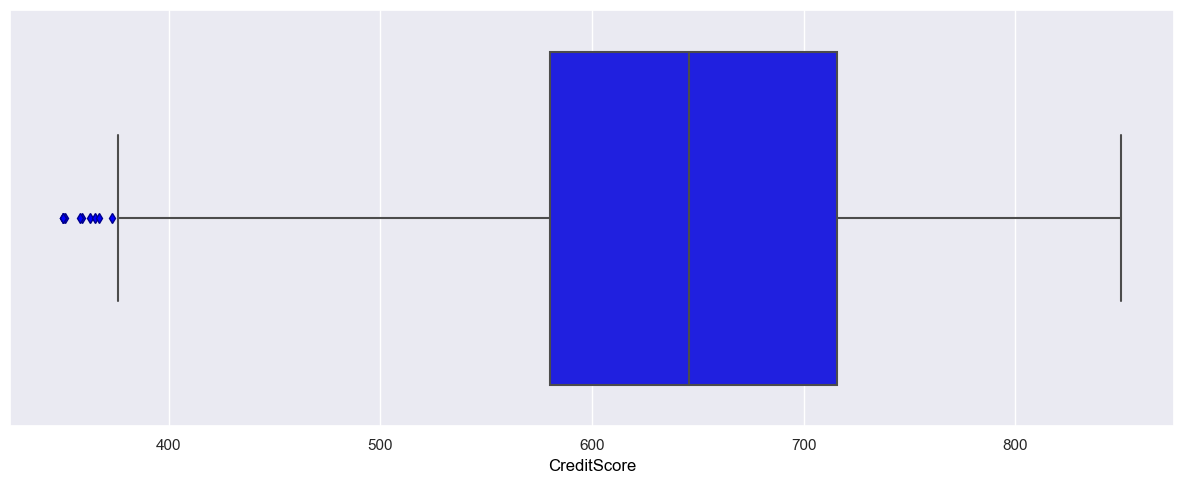

count    mean     std    min    25%    50%    75%    max
CreditScore  613.0  647.23  100.71  350.0  576.0  646.0  717.0  850.0

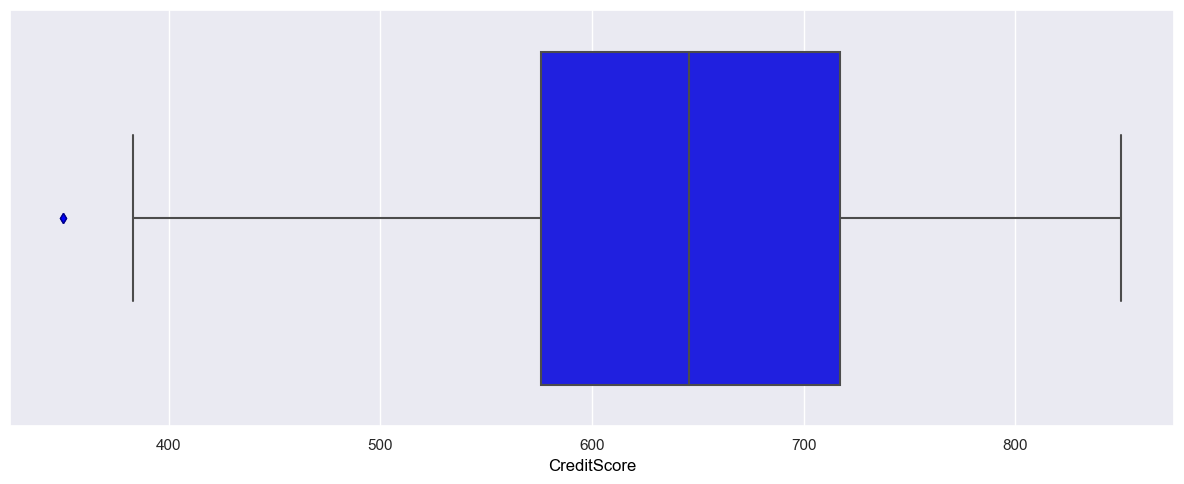

count    mean    std    min    25%    50%    75%    max
CreditScore  5631.0  651.62  95.71  405.0  586.0  653.0  717.0  850.0

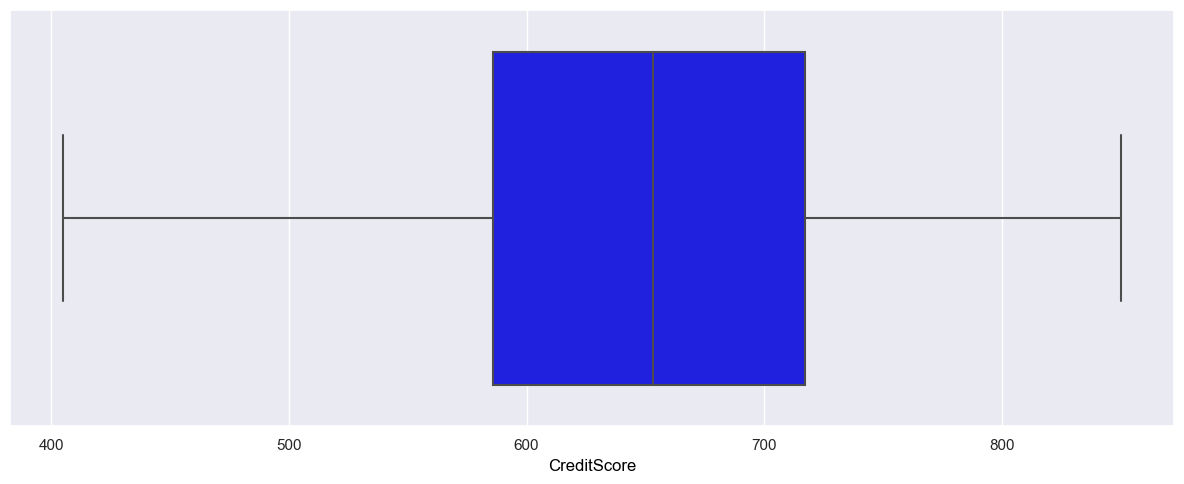

count    mean    std    min    25%    50%     75%    max
CreditScore  2332.0  652.43  95.53  408.0  584.0  655.5  718.25  850.0

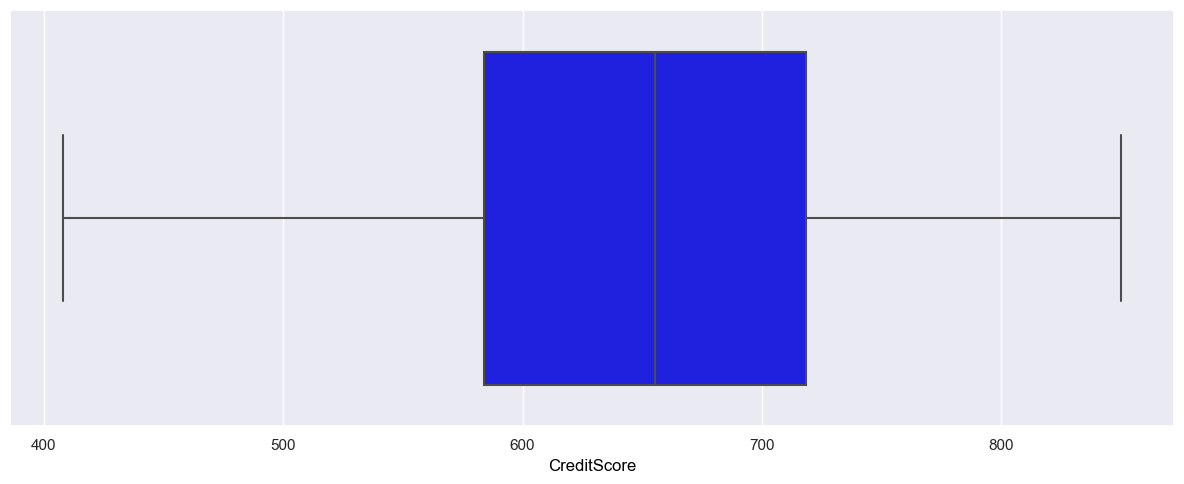

In [60]:
# Exploring the distribution of "CreditScore" in relation to both "Exited" and "HasCrCard" features

multivariate_eda(df, "Exited", "HasCrCard", "CreditScore")

actions["Exited - HasCrCard - CreditScore"] = "To boost customer retention among credit card users, analyze transaction data and customer behavior for patterns affecting lower credit scores. Implement personalized credit offers and segmentation strategies, utilizing churn prediction methods to identify at-risk customers. Improve communication, train support representatives, and collaborate with credit agencies for continuous adaptation of effective retention strategies."

<b>Insights</b>

* Customers who <b>exited</b> and <b>had a credit card</b> have a <b>slightly lower mean credit scores (644.54)</b> comapred to those <b>without</b> a <b>credit card (647.23)</b>.
* Among <b>non-exited customers</b>, those <b>without a credit card</b> have a <b>sligtly higher mean credit score of 652.43</b> compared to those <b>with a credit card (651.62)</b>.  
* The <b>25th</b>, <b>50th</b> and <b>75th percentiles</b> show that the majority of customers in <b>all scenerios</b> have <b>credit scores</b> within a <b>similar range</b>, but with some <b>variations</b> across percentiles.

<i>To boost customer retention among credit card users, analyze transaction data and customer behavior for patterns affecting lower credit scores. Implement personalized credit offers and segmentation strategies, utilizing churn prediction methods to identify at-risk customers. Improve communication, train support representatives, and collaborate with credit agencies for continuous adaptation of effective retention strategies.</i>

count    mean    std    min    25%    50%    75%    max
CreditScore  735.0  645.25  97.87  350.0  581.0  644.0  715.5  850.0

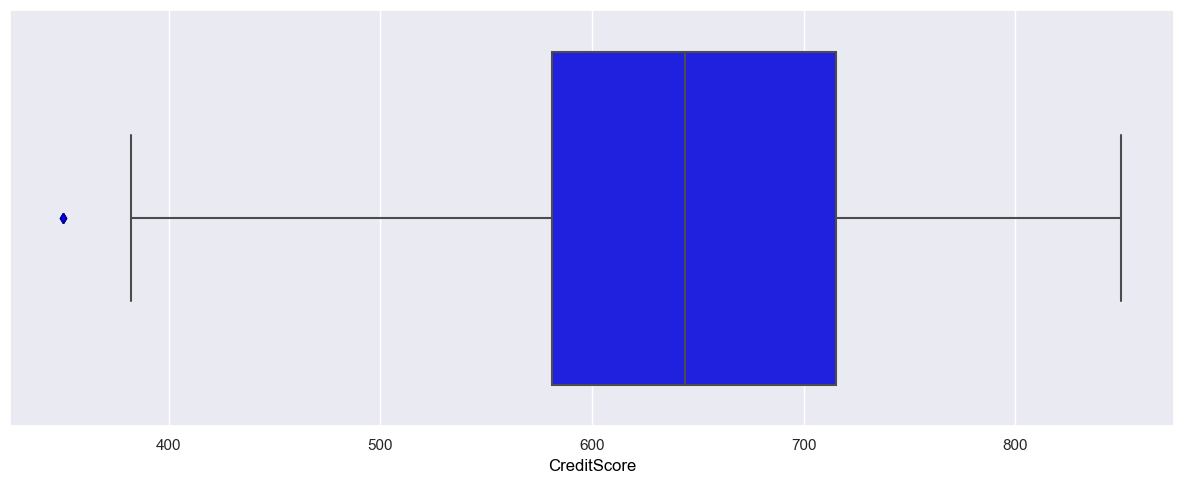

count    mean     std    min    25%    50%    75%    max
CreditScore  1302.0  645.41  101.72  350.0  576.0  648.0  716.0  850.0

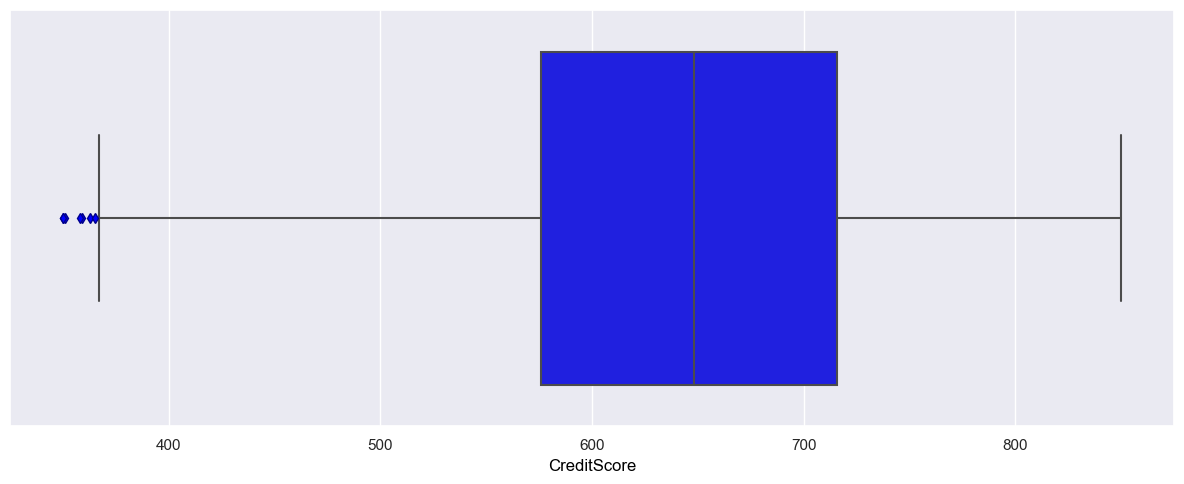

count    mean    std    min     25%    50%    75%    max
CreditScore  4416.0  654.21  95.15  405.0  588.75  656.0  719.0  850.0

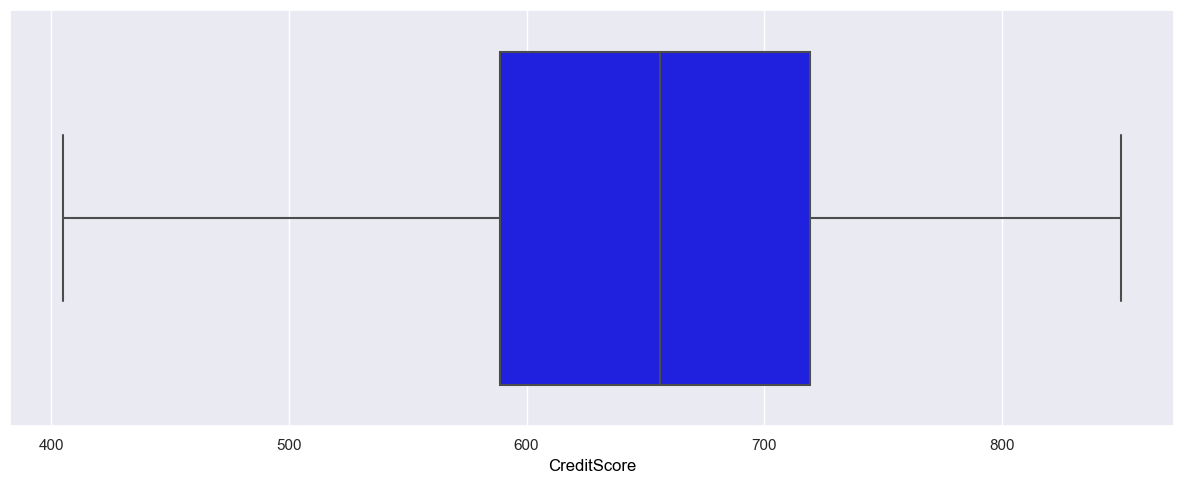

count    mean    std    min    25%    50%    75%    max
CreditScore  3547.0  648.91  96.22  408.0  582.5  650.0  716.0  850.0

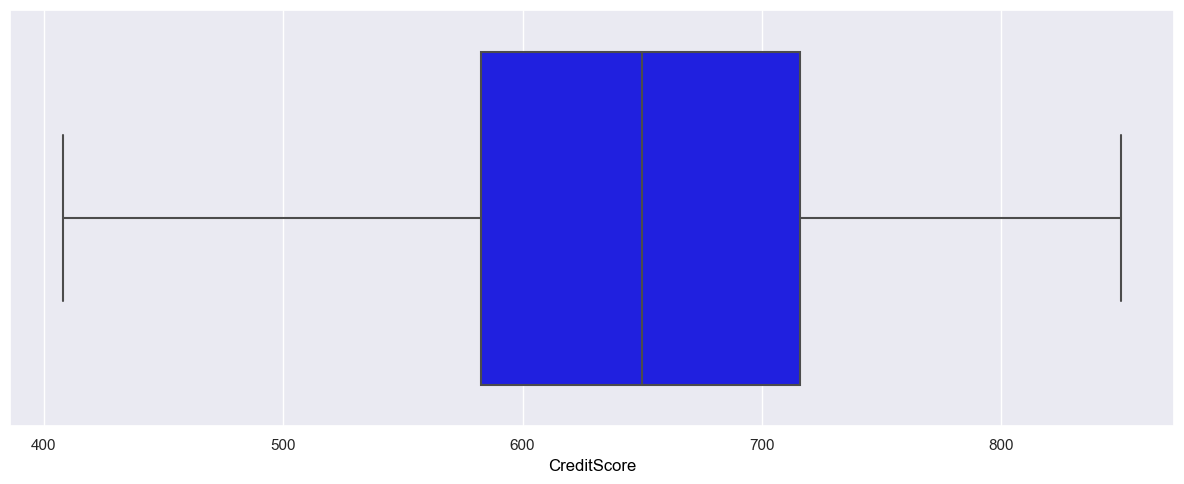

In [61]:
# Exploring the distribution of "CreditScore" in relation to "Exited" and "IsActiveMember" features

multivariate_eda(df, "Exited", "IsActiveMember", "CreditScore")

actions["Exited - IsActiveMember - CreditScore"] = "Implement personalized offers for customers with lower CreditScores, targeting their cost-conscious nature. Proactively reach out to high-risk customers based on support data and offer promotions to curb churn. Address customer satisfaction and service issues, and conduct periodic check-ins or surveys for personalized engagement. Emphasize the advantages of active membership through targeted campaigns and exclusive offers to encourage increased participation."

<b>Insights</b>

* The <b>mean credit scores</b> for <b>exited customers</b>, whether <b>active (645.25)</b> or <b>not (645.41)</b>, are <b>close</b>, indicating that the <b>active membership</b> status may <b>not</b> be a <b>strong differentiator</b> in credit scores for exited customers.
* For <b>non-exited customers</b> who are <b>active members</b> tend to have a <b>higher mean credit score (654.21)</b> compared to <b>non-active members (648.91)</b> suggesting that being an <b>active member</b> may have a <b>positive association</b> with credit scores among <b>non-exited members</b>.
* The <b>25th, 50th and 75th percentiles</b> show <b>similar pattern</b> across <b>different categories</b>, with <b>slightly lower credit scores</b> for <b>exited customers</b>, especially those who are <b>active members</b>.

<i>Implement personalized offers for customers with lower credit scores, targeting their cost-conscious nature. Proactively reach out to high-risk customers based on support data and offer promotions to curb churn. Address customer satisfaction and service issues, and conduct periodic check-ins or surveys for personalized engagement. Emphasize the advantages of active membership through targeted campaigns and exclusive offers to encourage increased participation.</i>

count   mean   std   min   25%   50%   75%   max
Age  810.0  45.13  9.77  18.0  38.0  45.0  52.0  84.0

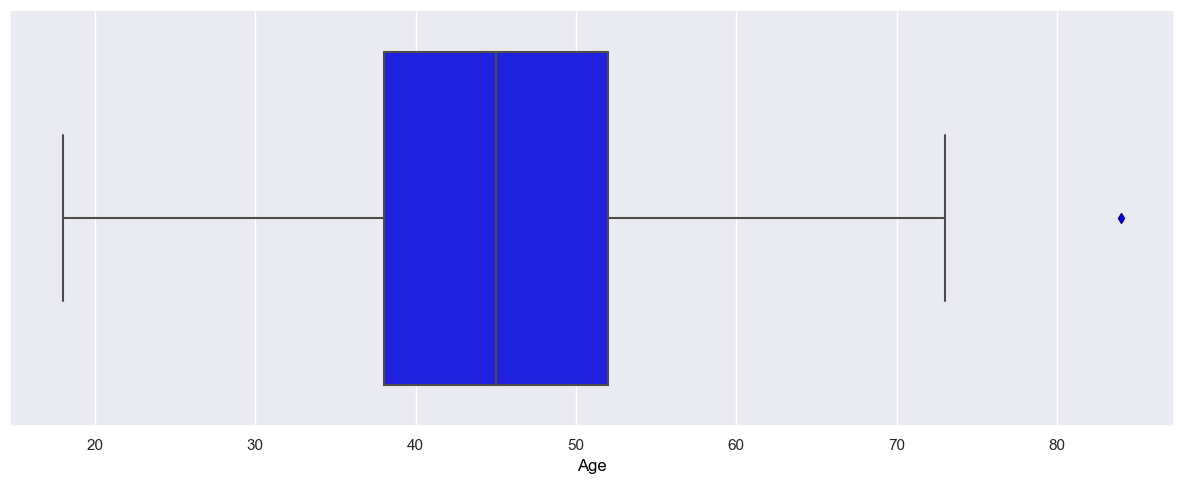

count   mean    std   min   25%   50%   75%   max
Age  413.0  44.15  10.13  18.0  37.0  44.0  51.0  71.0

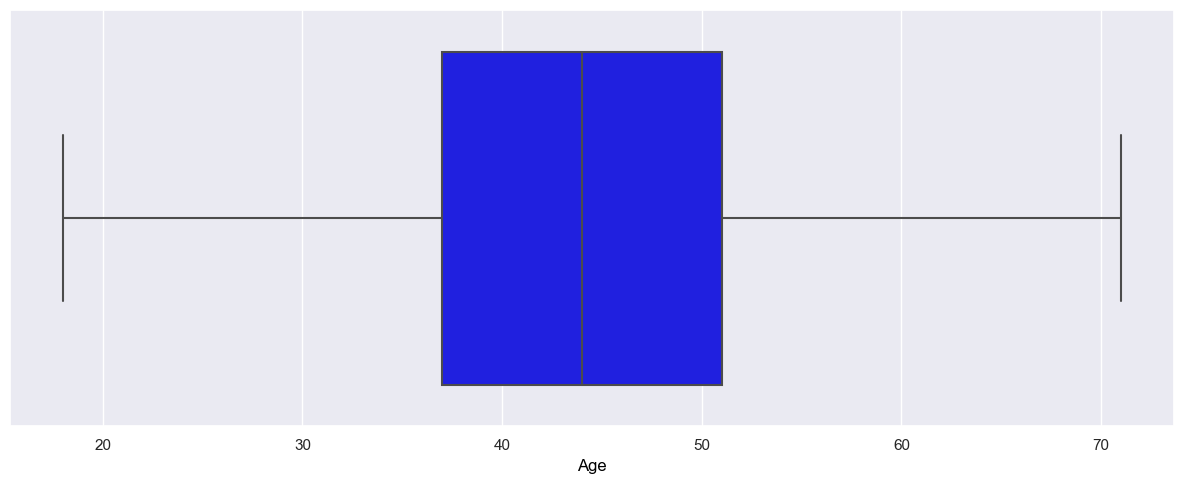

count   mean   std   min   25%   50%   75%   max
Age  814.0  44.89  9.56  19.0  39.0  45.0  51.0  74.0

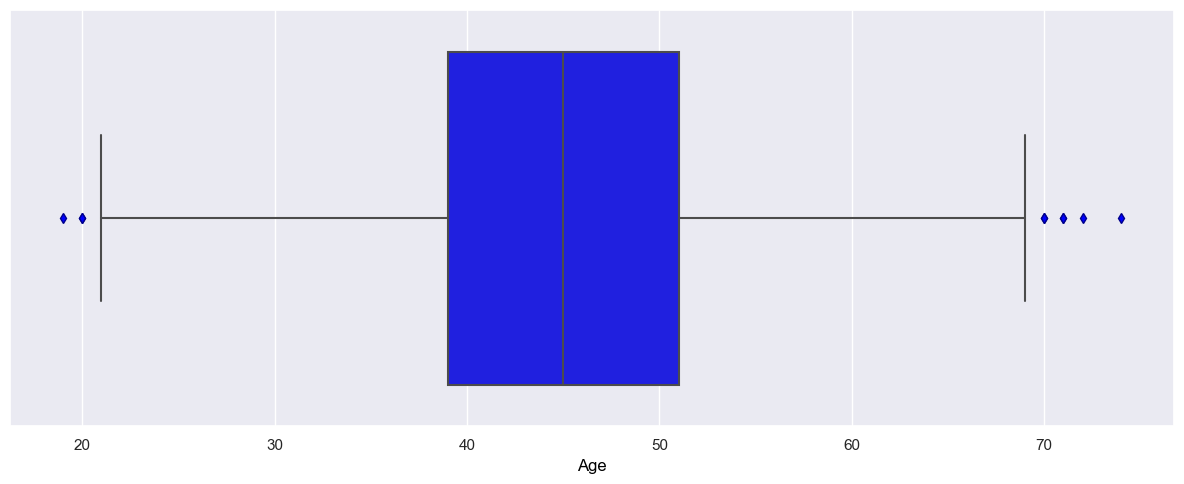

count   mean    std   min   25%   50%   75%   max
Age  4204.0  37.24  10.11  18.0  31.0  36.0  41.0  92.0

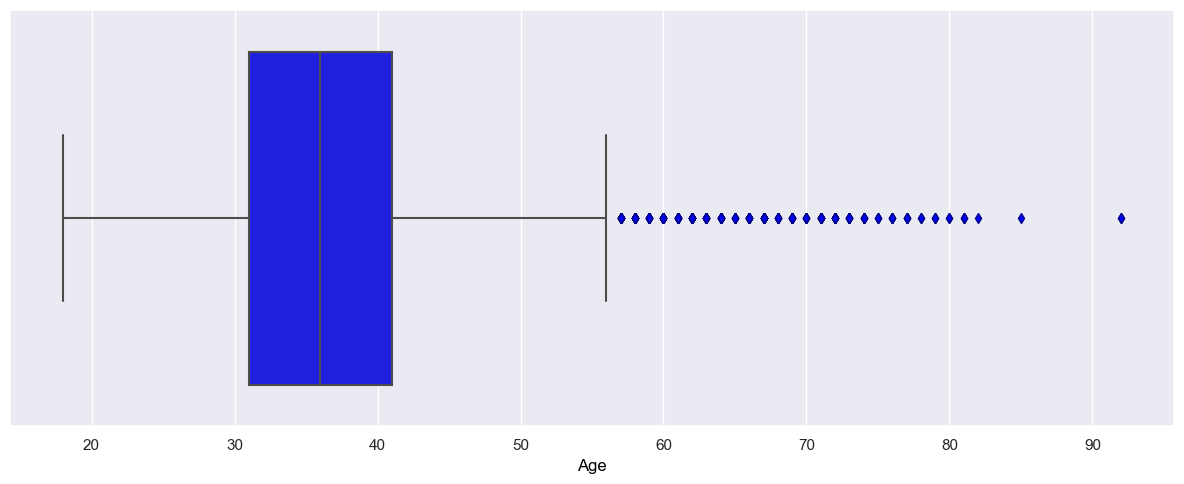

count   mean    std   min   25%   50%   75%   max
Age  2064.0  37.84  10.19  18.0  31.0  36.0  42.0  88.0

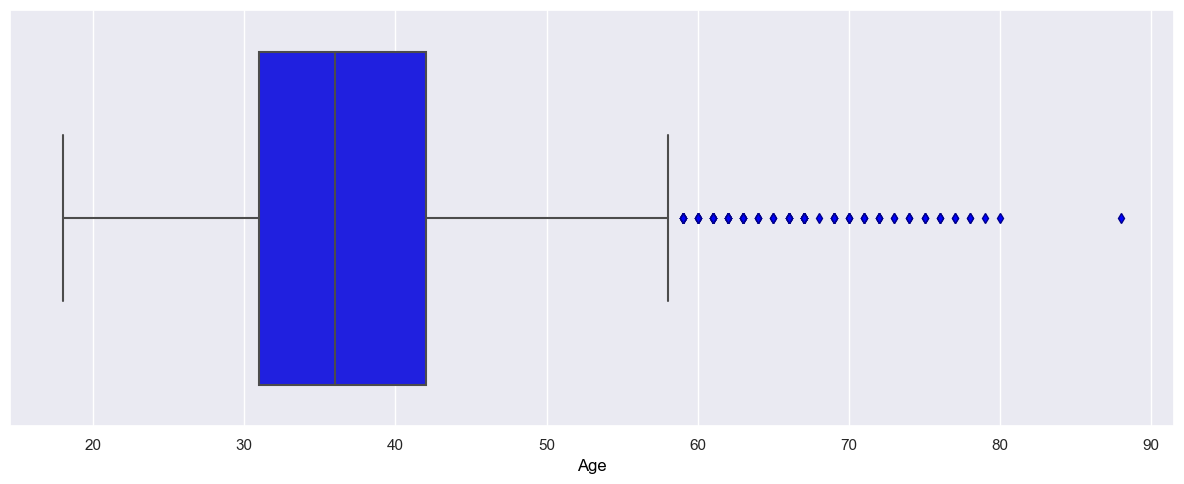

count   mean    std   min   25%   50%   75%   max
Age  1695.0  37.31  10.07  18.0  31.0  36.0  41.0  84.0

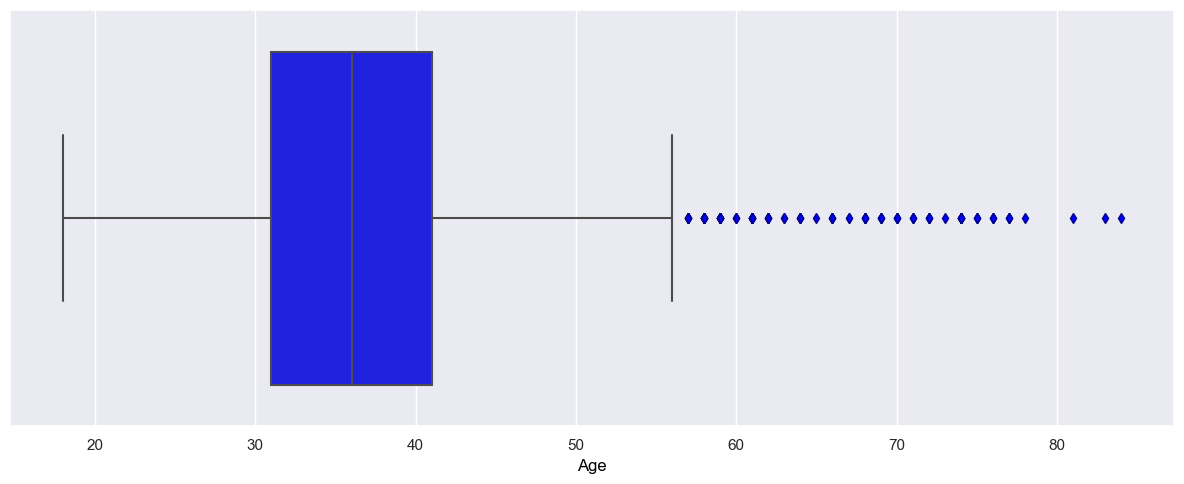

In [62]:
# Exploring the distribution of "Age" in relation to both "Exited" and "Geography" features

multivariate_eda(df, "Exited", "Geography", "Age")

<b>Insights</b>

* For customers who <b>exited</b>, the <b>mean age</b> is <b>slightly higher</b> in <b>France (45.13)</b>, compared to <b>Germany (44.89)</b> and <b>Spain (44.15)</b>.
* Among <b>non-exited customers</b>, the <b>mean</b> is around <b>37 years</b> across all the categories.
* The <b>average age</b> of <b>exited customers</b> is around <b>44-45 years old</b>, while the <b>average age</b> of <b>non-exited customers</b> is around <b>37-38 years old</b> (lower mean age compared to exited customers). <b>Younger customers</b>, on average, appear <b>less likely</b> to <b>exit</b>, suggesting that understanding the specific needs and preferences of older customers is crucial for retention efforts.

<i>Explore country-specific factors for higher customer exit ages, considering culture and economy. Tailor engagement and retention by age with customized communication and incentives. Analyze regional support data to address common issues among older customers. Segment by age and geography for targeted retention, using personalized messaging and recommendations. Design campaigns and products with age-related preferences in mind. Address specific pain points, like technology challenges, to enhance satisfaction.</i>

count   mean  std   min   25%   50%   75%   max
Age  1139.0  44.78  9.9  19.0  38.0  45.0  51.0  84.0

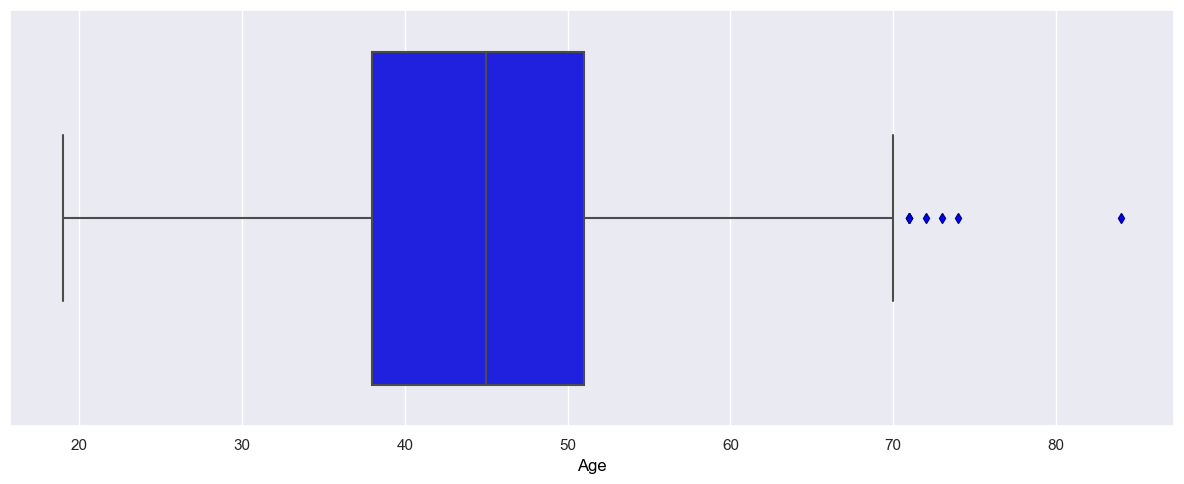

count   mean   std   min   25%   50%   75%   max
Age  898.0  44.91  9.59  18.0  38.0  45.0  51.0  71.0

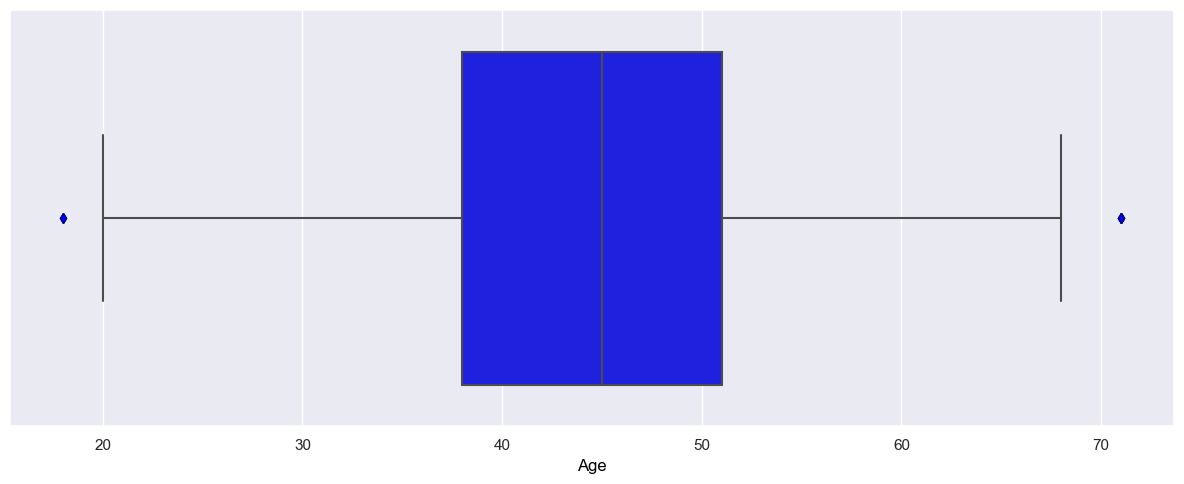

count   mean    std   min   25%   50%   75%   max
Age  3404.0  37.38  10.16  18.0  31.0  36.0  41.0  85.0

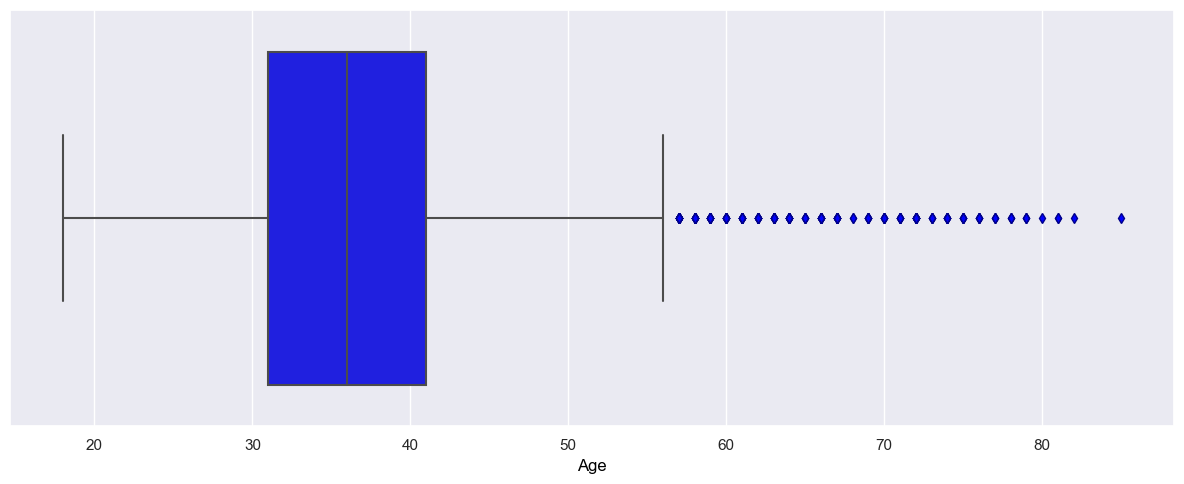

count   mean   std   min   25%   50%   75%   max
Age  4559.0  37.43  10.1  18.0  31.0  36.0  41.0  92.0

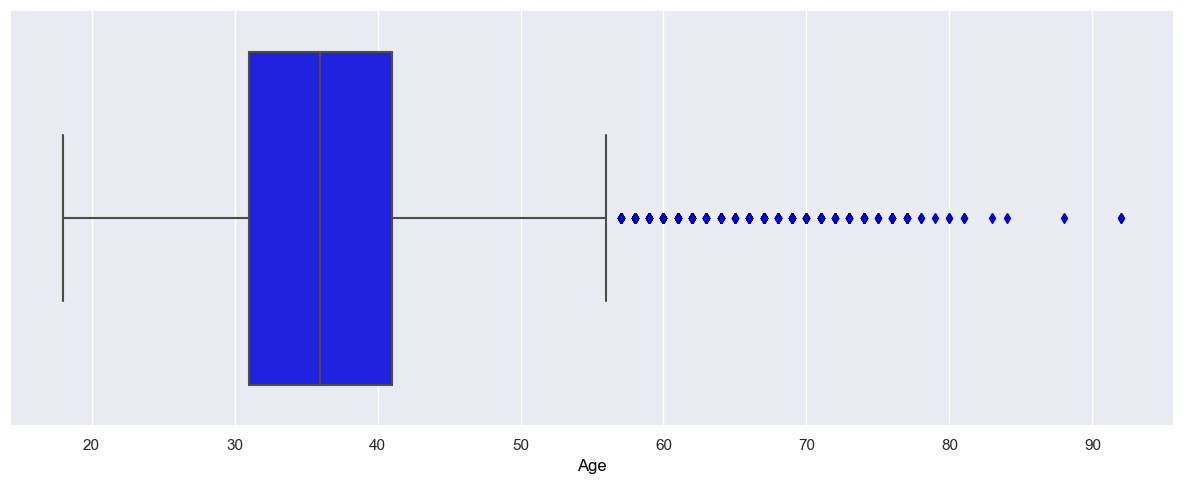

In [63]:
# Exploring the distribution of "Age" in relation to the "Exited" and "Gender" features

multivariate_eda(df, "Exited", "Gender", "Age")

actions["Exited - Gender - Age"] = "Examine the causes of customer churn by conducting surveys, interviews, or feedback sessions to gain insights into the contributing factors. Take proactive steps to retain customers in older age groups, including the implementation of specialized support, exclusive offers, or features tailored to meet their specific needs and expectations."

<b>Insights</b>

* The <b>average age</b> for <b>both male and female</b> customers who <b>exited</b> is approximately <b>44 years</b>.
* The <b>average age</b> for <b>both male and female</b> customers who <b>didn't exited</b> is approximately <b>37 years</b>.

<i>Examine the causes of customer churn by conducting surveys, interviews, or feedback sessions to gain insights into the contributing factors. Take proactive steps to retain customers in older age groups, including the implementation of specialized support, exclusive offers, or features tailored to meet their specific needs and expectations.</i>

count   mean   std   min   25%   50%   75%   max
Age  1424.0  44.65  9.75  18.0  38.0  45.0  51.0  74.0

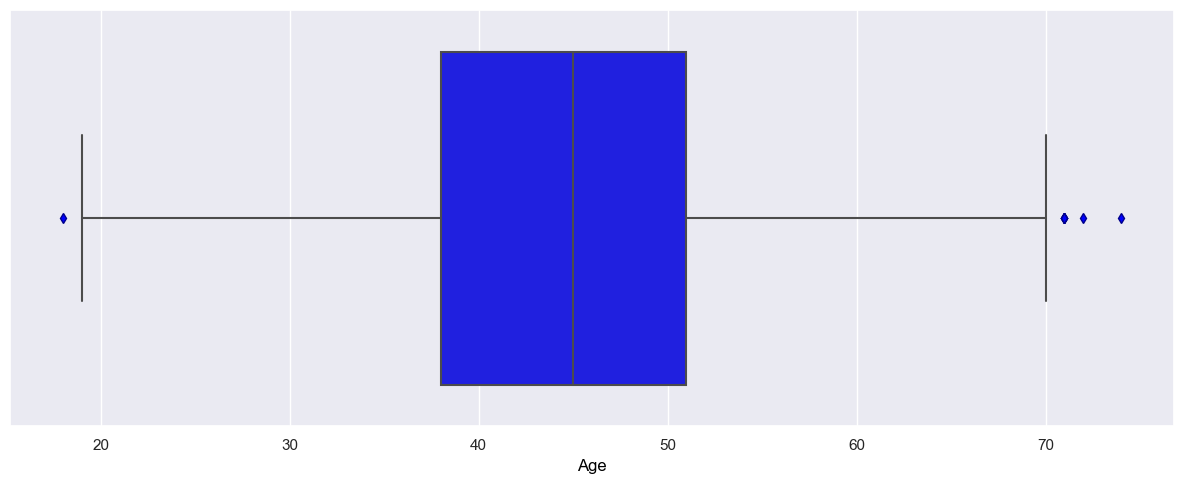

count   mean   std   min   25%   50%   75%   max
Age  613.0  45.28  9.78  18.0  39.0  45.0  52.0  84.0

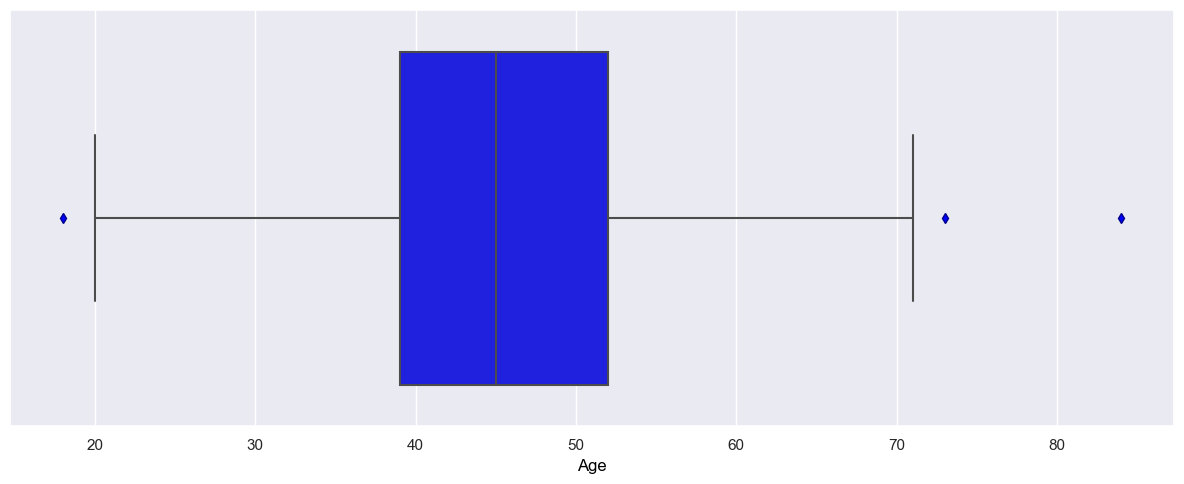

count   mean    std   min   25%   50%   75%   max
Age  5631.0  37.37  10.13  18.0  31.0  36.0  41.0  92.0

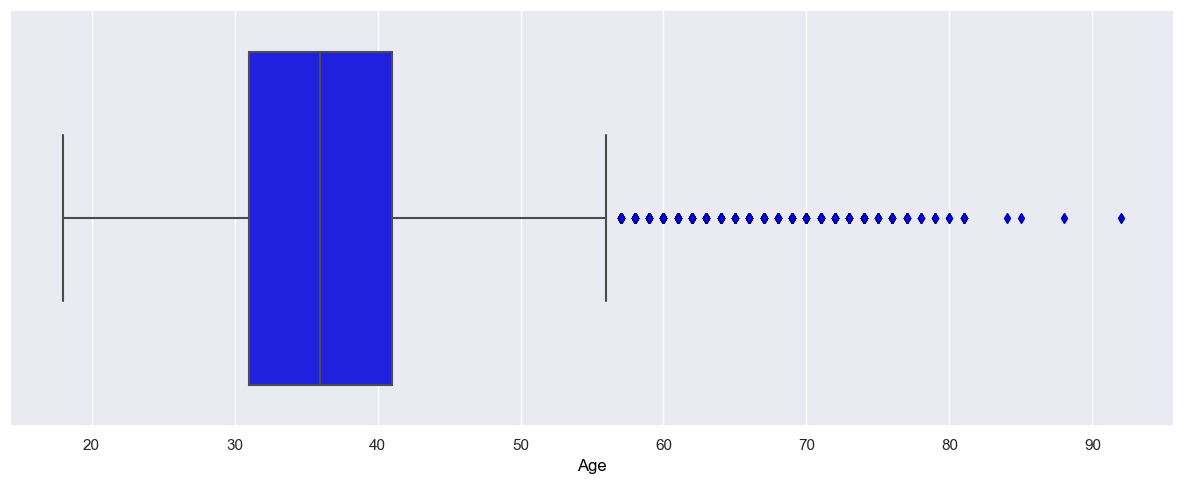

count   mean    std   min   25%   50%   75%   max
Age  2332.0  37.49  10.11  18.0  31.0  36.0  41.0  92.0

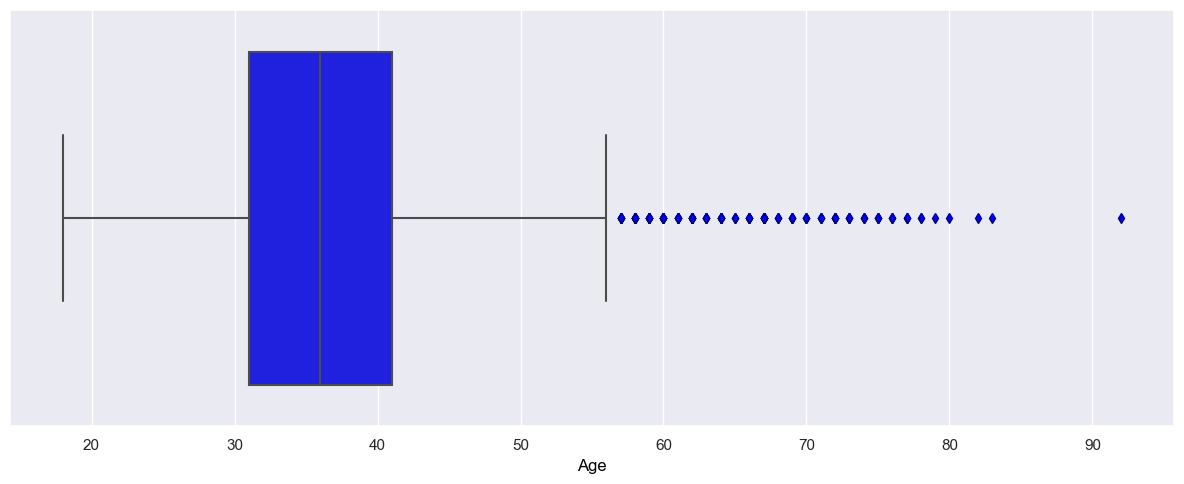

In [64]:
# Exploring the distribution of "Age" in relation to "Exited" and "HasCrCard" features

multivariate_eda(df, "Exited", "HasCrCard", "Age")

actions["Exited - HasCrCard - Age"] = "Businesses should tailor retention strategies by investigating specific needs and challenges within each category. Analyzing age variations based on credit card ownership guides customized support strategies, including tailoring credit card-related promotions and features. Despite possessing a credit card, some customers still churn, prompting the need to investigate credit card-related issues. Conducting surveys with this group can uncover dissatisfaction or challenges, informing targeted retention strategies, including incentives. Implementing periodic customer satisfaction surveys and engagement assessments is crucial, considering potential variations in preferences or expectations based on age for refining overall strategies."

<b>Insights</b>

* For customers who <b>exited</b>, the <b>mean age</b> for customers <b>without</b> a <b>credit card</b> is <b>slightly higher (45.28)</b>, compared to the customers <b>with</b> a <b>credit card (44.65)</b>.
* The <b>mean age</b> among customers who have <b>not exited</b> is approximately <b>37 years (similar mean ages)</b>, irrespective of whether they possess a credit card.

<i>Businesses should tailor retention strategies by investigating specific needs and challenges within each category. Analyzing age variations based on credit card ownership guides customized support strategies, including tailoring credit card-related promotions and features. Despite possessing a credit card, some customers still churn, prompting the need to investigate credit card-related issues. Conducting surveys with this group can uncover dissatisfaction or challenges, informing targeted retention strategies, including incentives. Implementing periodic customer satisfaction surveys and engagement assessments is crucial, considering potential variations in preferences or expectations based on age for refining overall strategies.</i>

count   mean   std   min   25%   50%   75%   max
Age  735.0  44.76  9.88  18.0  38.0  45.0  51.0  74.0

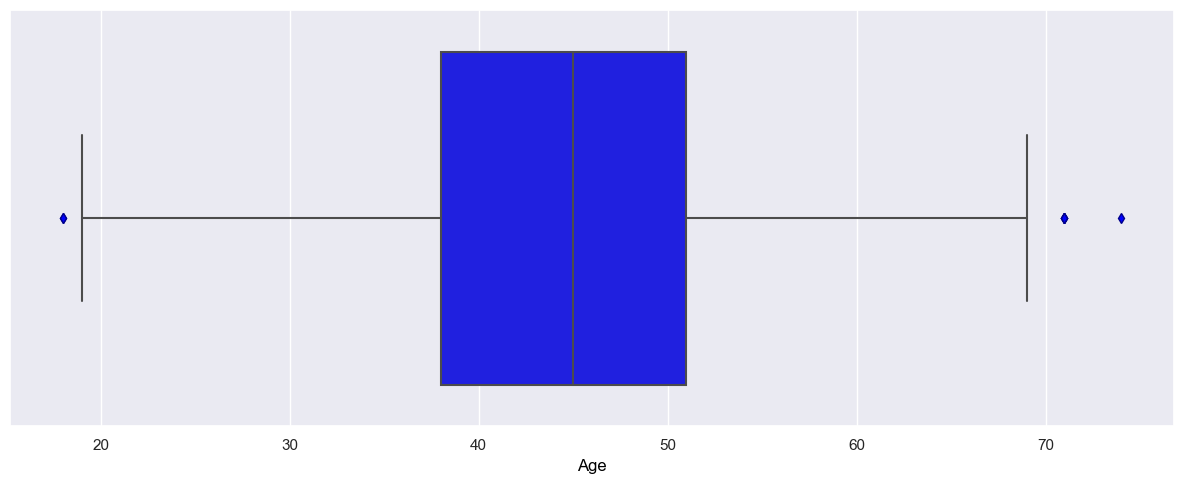

count   mean  std   min    25%   50%   75%   max
Age  1302.0  44.88  9.7  20.0  38.25  45.0  51.0  84.0

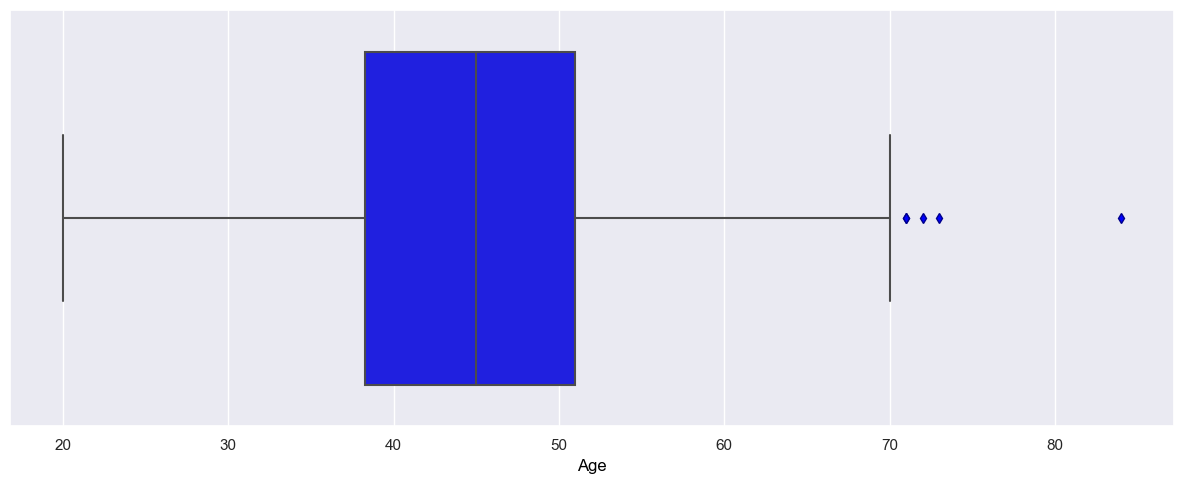

count   mean    std   min   25%   50%   75%   max
Age  4416.0  38.96  11.77  18.0  31.0  37.0  43.0  92.0

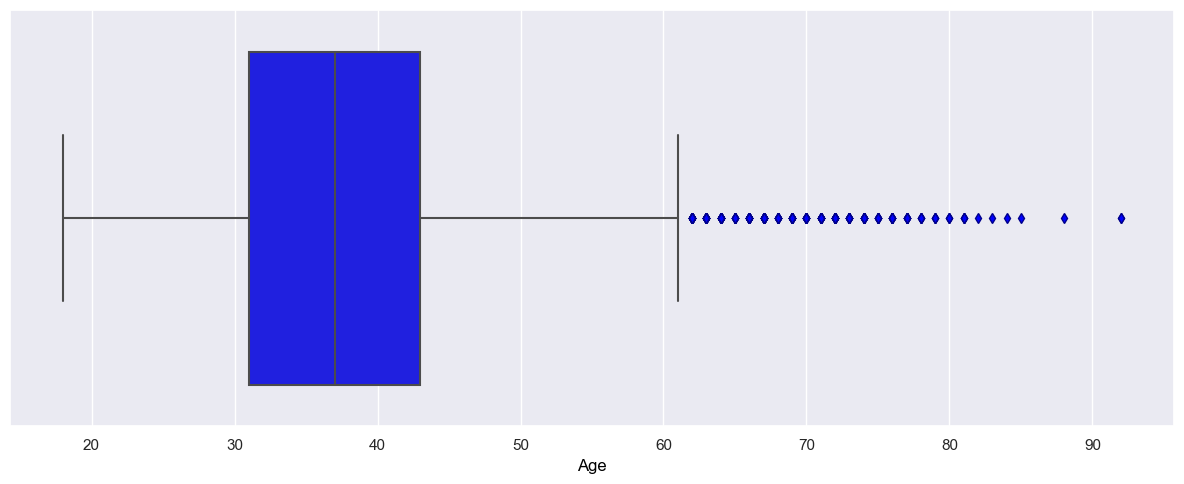

count   mean   std   min   25%   50%   75%   max
Age  3547.0  35.47  7.15  18.0  31.0  35.0  40.0  77.0

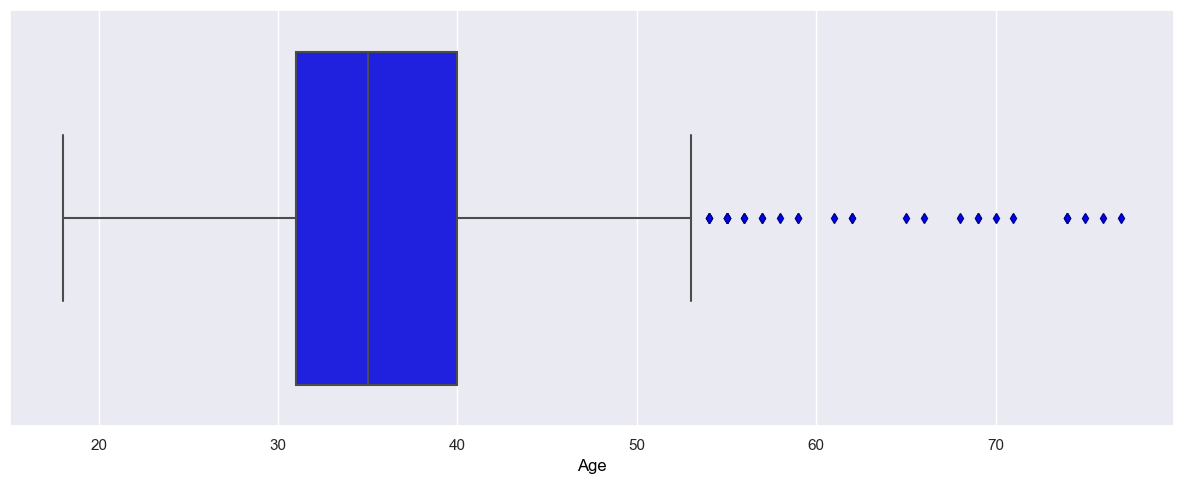

In [65]:
# Exploring the distribution of "Age" in relation to both "Exited" and "IsActiveMember" feature

multivariate_eda(df, "Exited", "IsActiveMember", "Age")

actions["Exited - IsActiveMember - Age"] = "Understanding age variations in membership guides support strategies. Analyze age demographics, tailor retention for specific age groups, and consider extra benefits. Explore factors like service quality affecting trends, and use surveys to grasp churn reasons. Introduce incentives, highlight exclusive offerings, and encourage active membership, especially in the identified age range."

<b>Insights</b>

* Customers who have <b>exited</b>, whether they were <b>active</b> or <b>inactive members</b>, have <b>similar mean age</b> of approximately <b>44 years</b>.
* Among <b>non-exited customers</b>, the <b>mean age</b> of <b>active members</b> is <b>higher (38.96)</b> compared to <b>inactive members (35.47)</b>.

<i>Understanding age variations in membership guides support strategies. Analyze age demographics, tailor retention for specific age groups, and consider extra benefits. Explore factors like service quality affecting trends, and use surveys to grasp churn reasons. Introduce incentives, highlight exclusive offerings, and encourage active membership, especially in the identified age range.</i>

count  mean   std  min  25%  50%  75%   max
Tenure  810.0   5.0  2.95  0.0  2.0  5.0  8.0  10.0

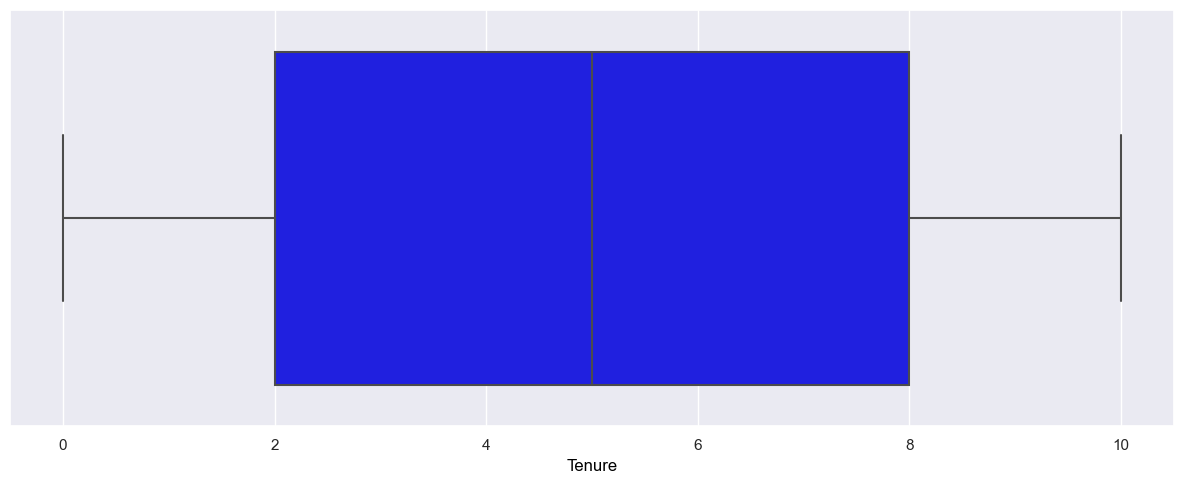

count  mean   std  min  25%  50%  75%   max
Tenure  413.0  4.66  2.81  0.0  2.0  5.0  7.0  10.0

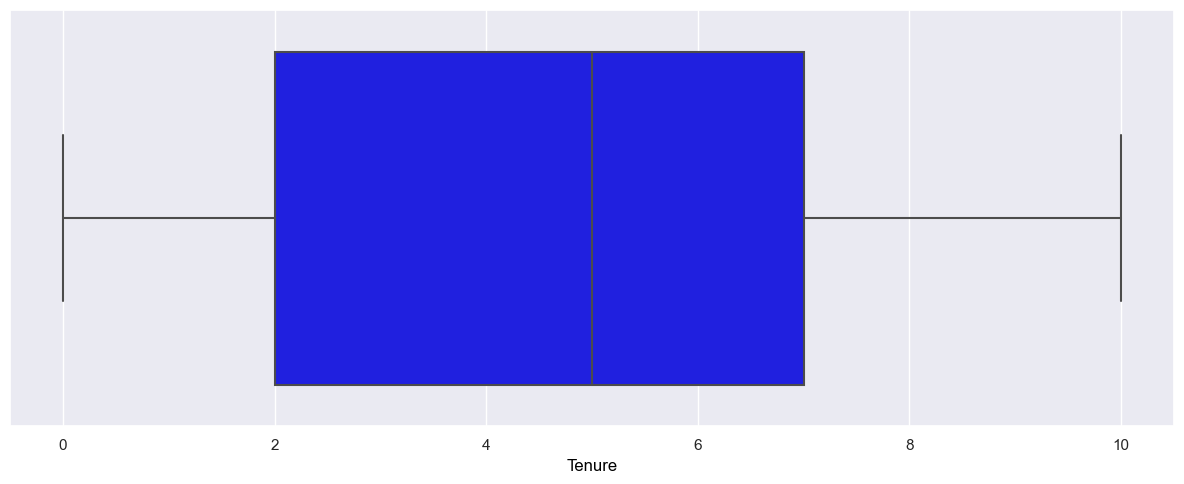

count  mean   std  min  25%  50%  75%   max
Tenure  814.0  5.01  2.98  0.0  2.0  5.0  8.0  10.0

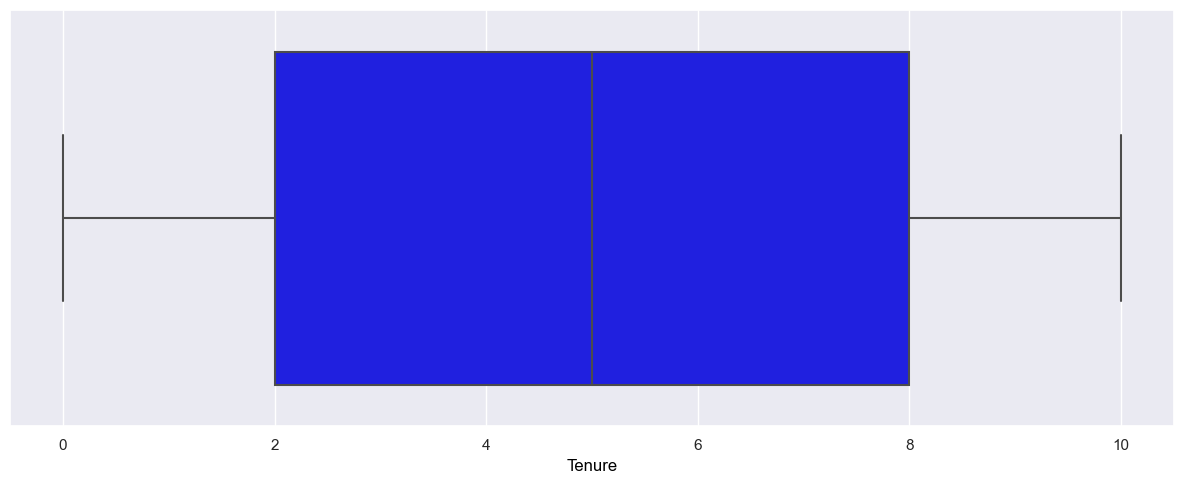

count  mean   std  min   25%  50%  75%   max
Tenure  4204.0  5.01  2.88  0.0  2.75  5.0  7.0  10.0

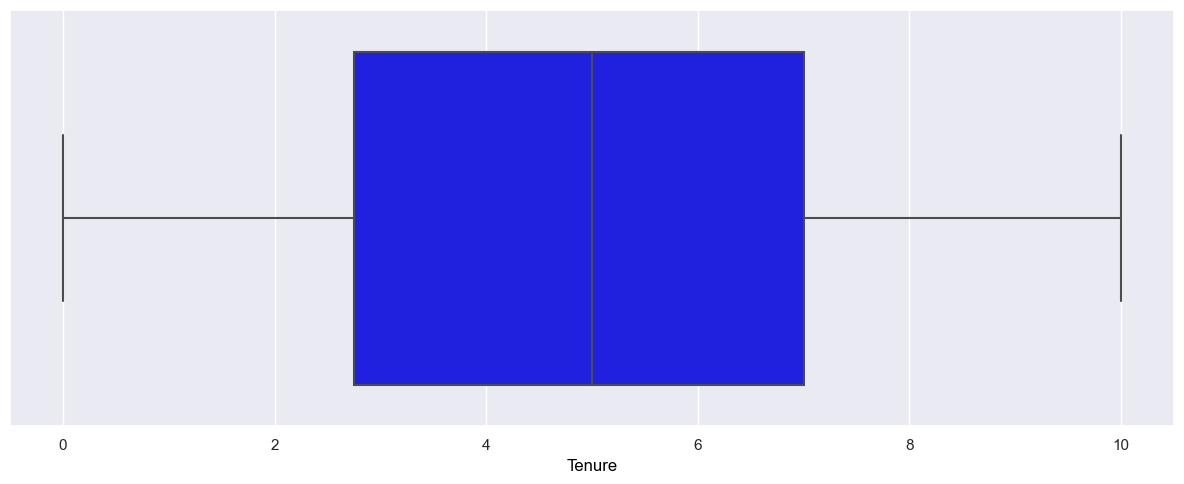

count  mean   std  min  25%  50%  75%   max
Tenure  2064.0  5.11  2.86  0.0  3.0  5.0  8.0  10.0

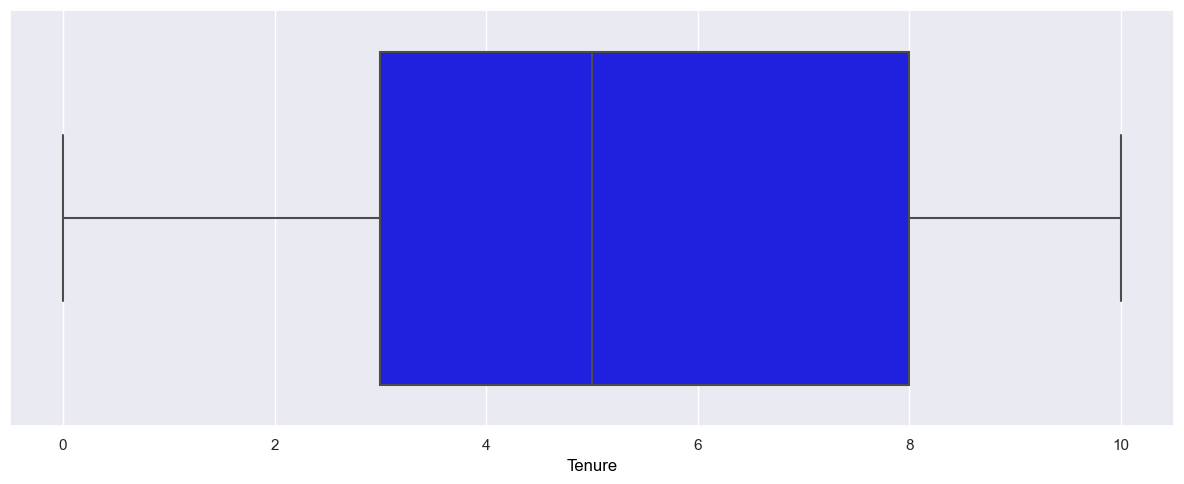

count  mean   std  min  25%  50%  75%   max
Tenure  1695.0  5.01  2.92  0.0  2.0  5.0  8.0  10.0

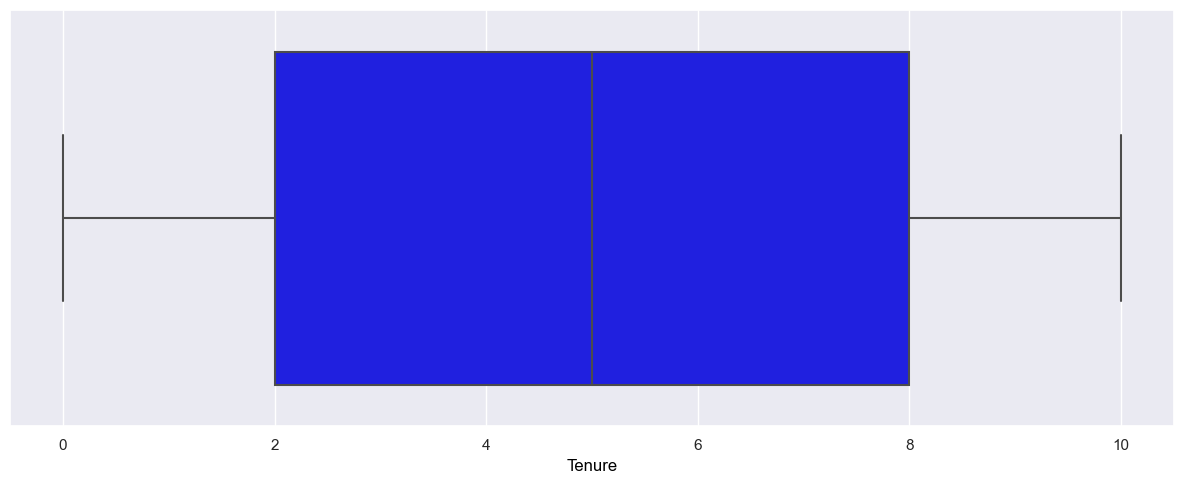

In [66]:
# Exploring the distribution of "Tenure" in relation to both "Exited" and "Geography" features

multivariate_eda(df, "Exited", "Geography", "Tenure")

actions["Exited - Geography - Tenure"] = "Monitor satisfaction and engagement levels across geographies. Implement regular customer satisfaction surveys and engagement assessments, attentively considering potential variations in preferences or expectations based on geography."

<b>Insights</b>

* Customers who <b>exited</b> exhibit a <b>higher and comparable mean tenure</b> in <b>France</b> and <b>Germany</b>, standing at approximately <b>5 years</b>, in contrast to customers in <b>France</b>, where the <b>mean tenure</b> is <b>4.66 years</b>, <b>falling below</b> the <b>5-year mark</b>.
* Among <b>non-exited customers</b>, the <b>mean tenure</b> remains <b>consistent</b> across <b>all countries</b>, approximately <b>5 years</b>.

<i>Monitor satisfaction and engagement levels across geographies. Implement regular customer satisfaction surveys and engagement assessments, attentively considering potential variations in preferences or expectations based on geography.</i>

count  mean   std  min  25%  50%  75%   max
Tenure  1139.0  4.93  2.96  0.0  2.0  5.0  7.5  10.0

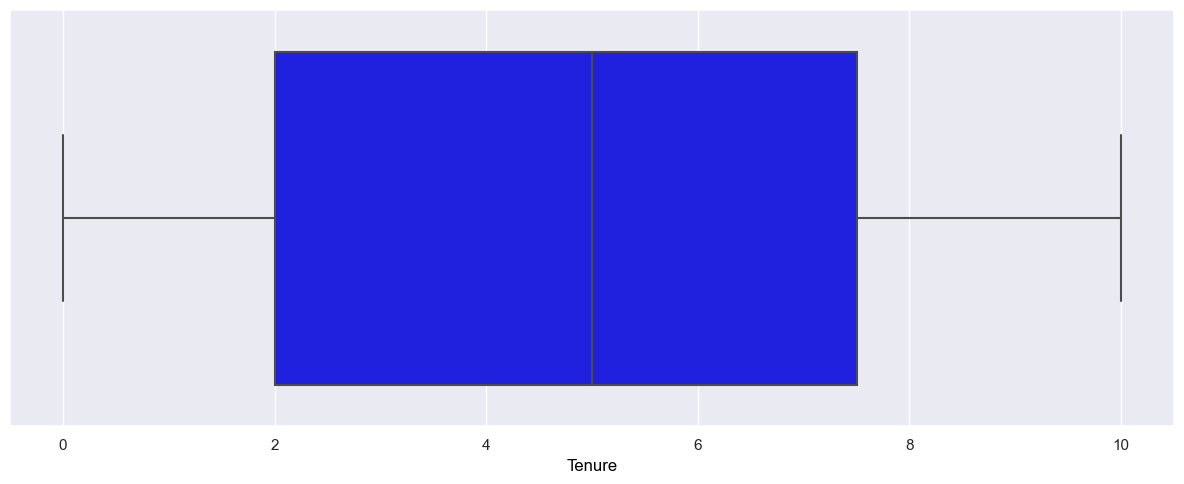

count  mean   std  min  25%  50%  75%   max
Tenure  898.0  4.93  2.91  0.0  2.0  5.0  8.0  10.0

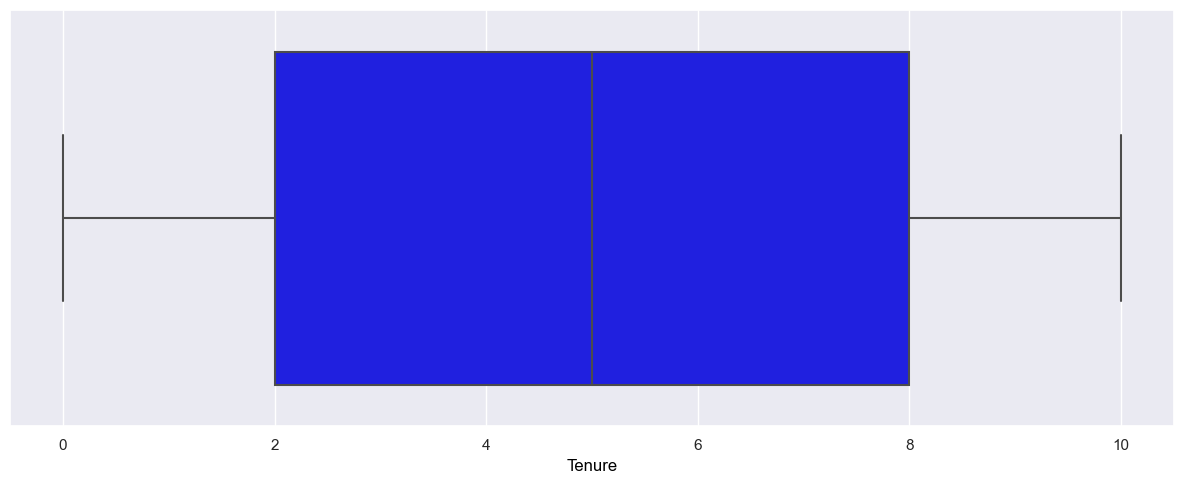

count  mean   std  min  25%  50%  75%   max
Tenure  3404.0  4.98  2.89  0.0  2.0  5.0  7.0  10.0

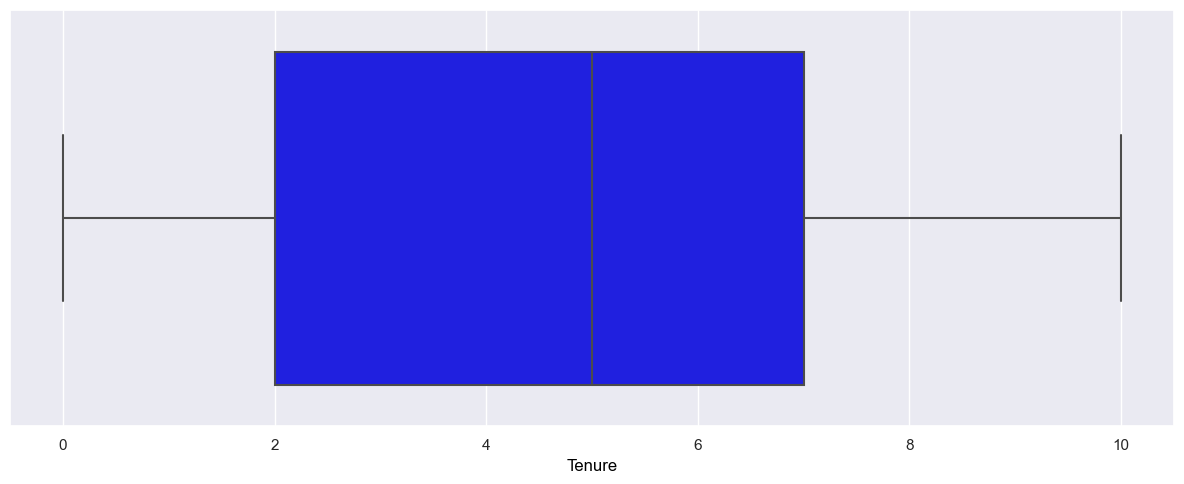

count  mean   std  min  25%  50%  75%   max
Tenure  4559.0  5.08  2.87  0.0  3.0  5.0  8.0  10.0

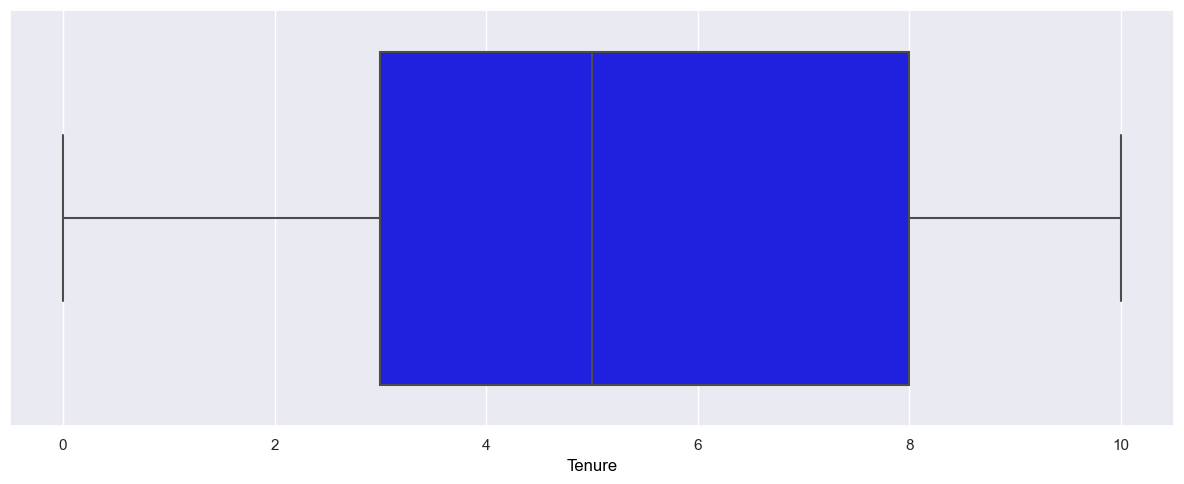

In [67]:
# Exploring the distribution of "Tenure" in relation to both "Gender" and "Exited" features

multivariate_eda(df, "Exited", "Gender", "Tenure")

actions["Exited - Gender - Tenure"] = "Understanding tenure variations by gender is crucial for guiding support strategies. Conduct customer interviews or surveys to gather qualitative insights into factors influencing customer tenure and exit decisions. Implement periodic customer satisfaction surveys and engagement assessments, carefully noting potential variations based on gender. Conduct in-depth analyses of customer interactions, feedback, and preferences to identify key drivers of churn."

<b>Insights</b>

* The <b>mean tenure</b> for customers who have <b>exited</b> is <b>similar (4.93)</b> for <b>both male and female</b>.
* Among <b>non-exited</b> customers, the <b>mean tenure</b> is <b>slightly higher</b> for <b>male (5.08)</b> compared to <b>female (4.93)</b>.

<i>Understanding tenure variations by gender is crucial for guiding support strategies. Conduct customer interviews or surveys to gather qualitative insights into factors influencing customer tenure and exit decisions. Implement periodic customer satisfaction surveys and engagement assessments, carefully noting potential variations based on gender. Conduct in-depth analyses of customer interactions, feedback, and preferences to identify key drivers of churn.</i>

count  mean   std  min  25%  50%  75%   max
Tenure  1424.0  4.93  2.94  0.0  2.0  5.0  7.0  10.0

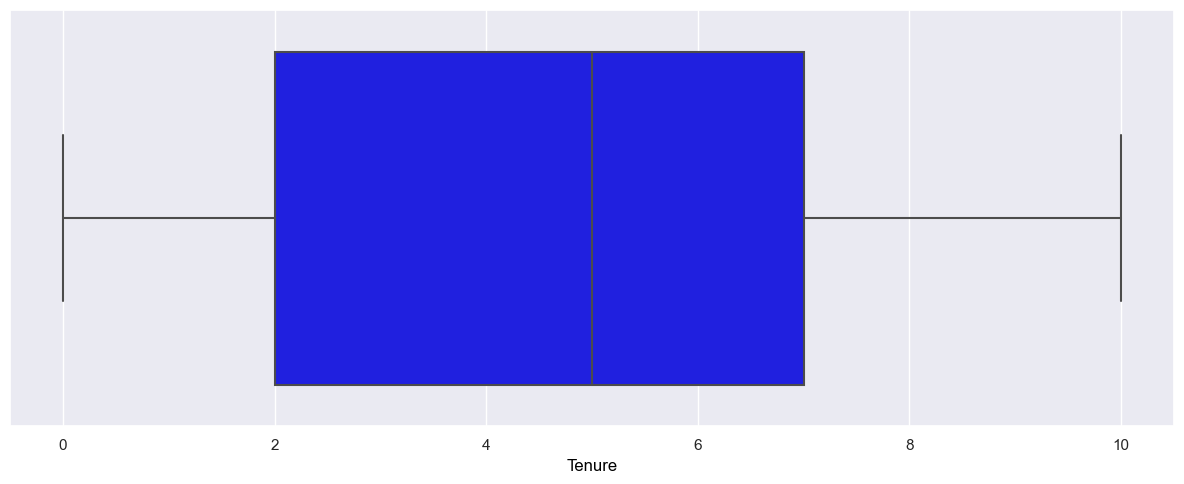

count  mean   std  min  25%  50%  75%   max
Tenure  613.0  4.93  2.93  0.0  2.0  5.0  8.0  10.0

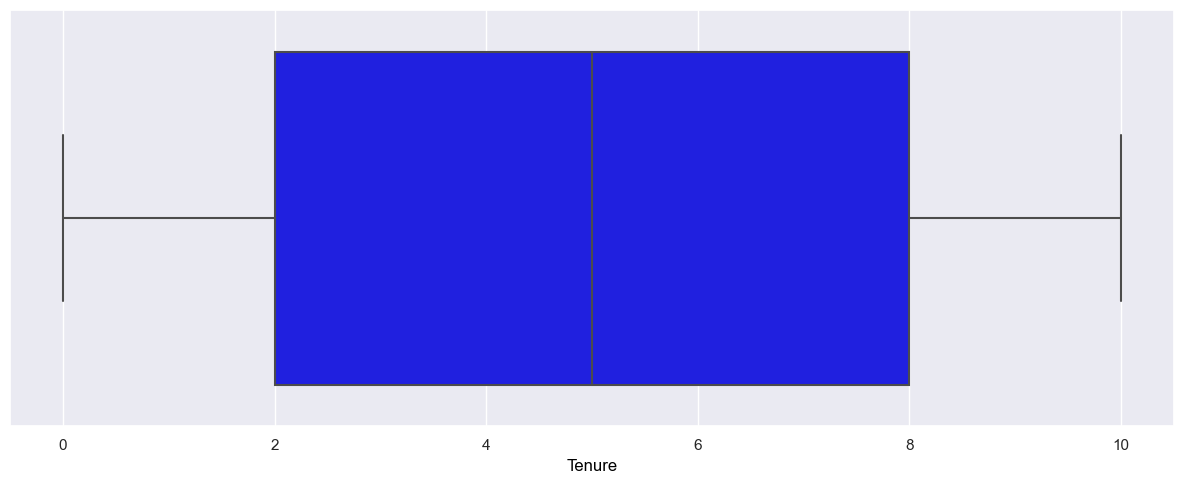

count  mean   std  min  25%  50%  75%   max
Tenure  5631.0  5.09  2.86  0.0  3.0  5.0  8.0  10.0

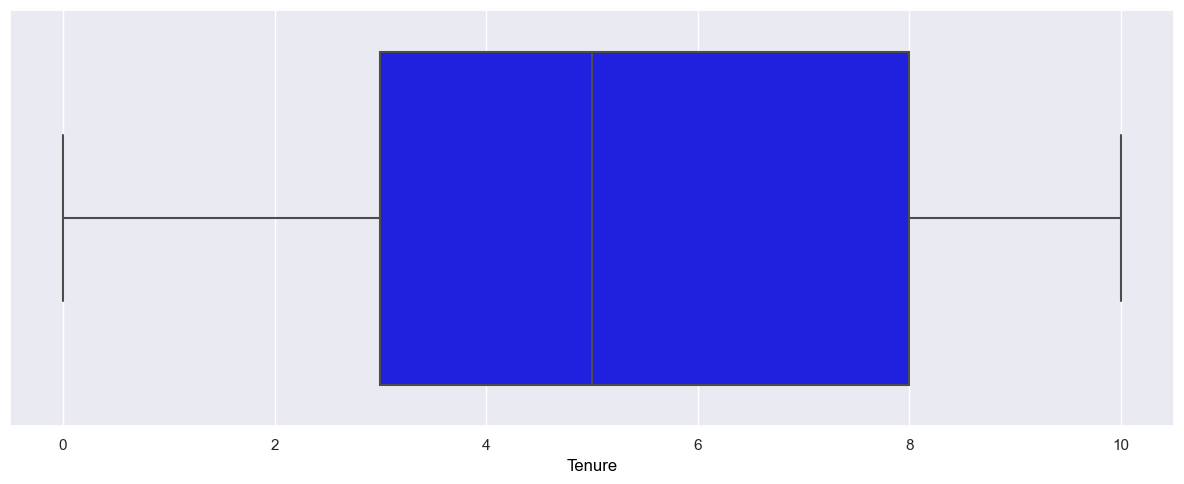

count  mean   std  min  25%  50%  75%   max
Tenure  2332.0  4.91  2.93  0.0  2.0  5.0  7.0  10.0

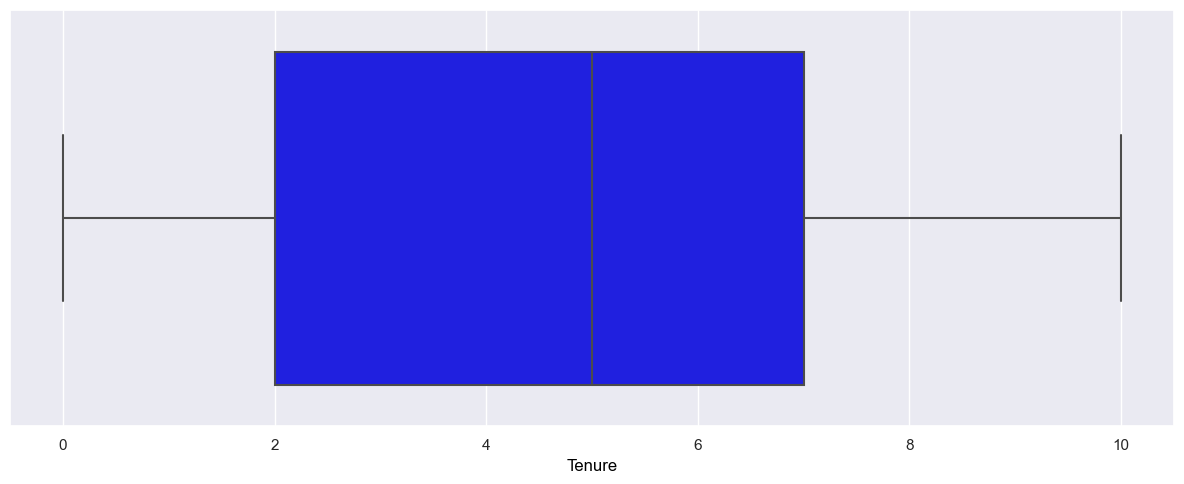

In [68]:
# Exploring the distribution of "Tenure" in relation to both "Exited" and "HasCrCard" feature

multivariate_eda(df, "Exited", "HasCrCard", "Tenure")

<b>Insights</b>

* The <b>mean tenure</b> for customers who have <b>exited</b> is <b>similar (4.93 years)</b> for both <b>credit card users</b> and those <b>without it</b>.
* Among <b>non-exited customers</b>, the <b>mean tenure</b> is <b>slightly higher</b> for customers with <b>credit card (5.09)</b> than those <b>without it (4.91)</b>.

<i>Monitoring interactions and feedback from customers based on credit card usage and tenure can offer additional insights for customer support strategies. Analyze for patterns related to specific tenure ranges and identify any significant changes in exit rates over time.</i>

count  mean   std  min  25%  50%  75%   max
Tenure  735.0  4.79  2.94  0.0  2.0  5.0  7.0  10.0

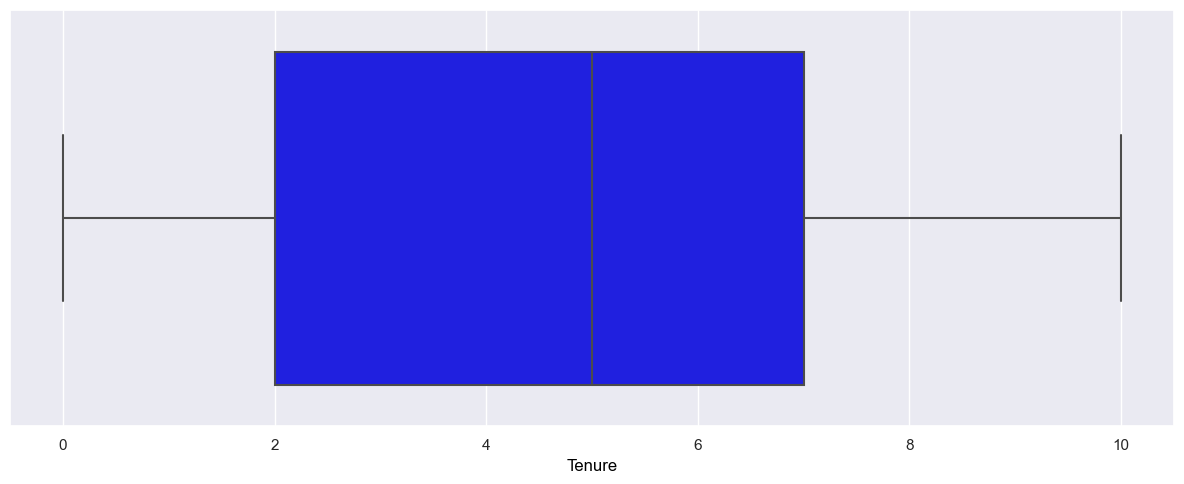

count  mean   std  min  25%  50%  75%   max
Tenure  1302.0  5.01  2.93  0.0  2.0  5.0  8.0  10.0

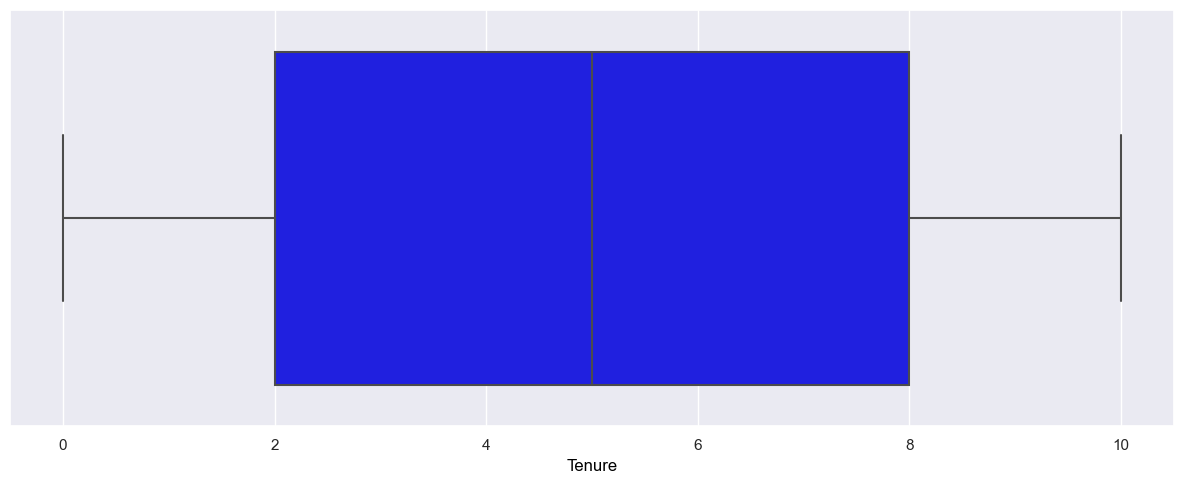

count  mean   std  min  25%  50%  75%   max
Tenure  4416.0  4.96  2.89  0.0  2.0  5.0  7.0  10.0

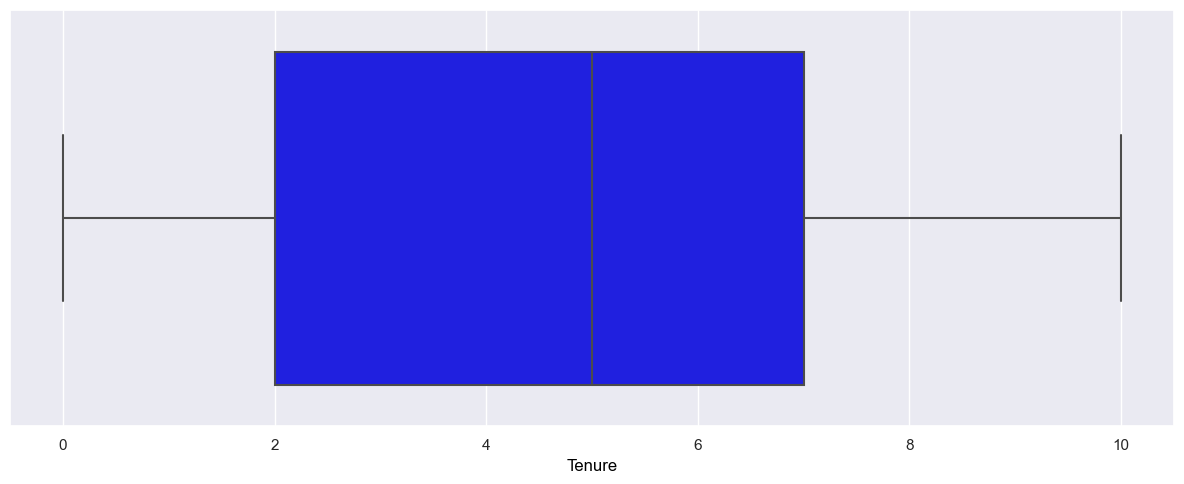

count  mean   std  min  25%  50%  75%   max
Tenure  3547.0  5.13  2.86  0.0  3.0  5.0  8.0  10.0

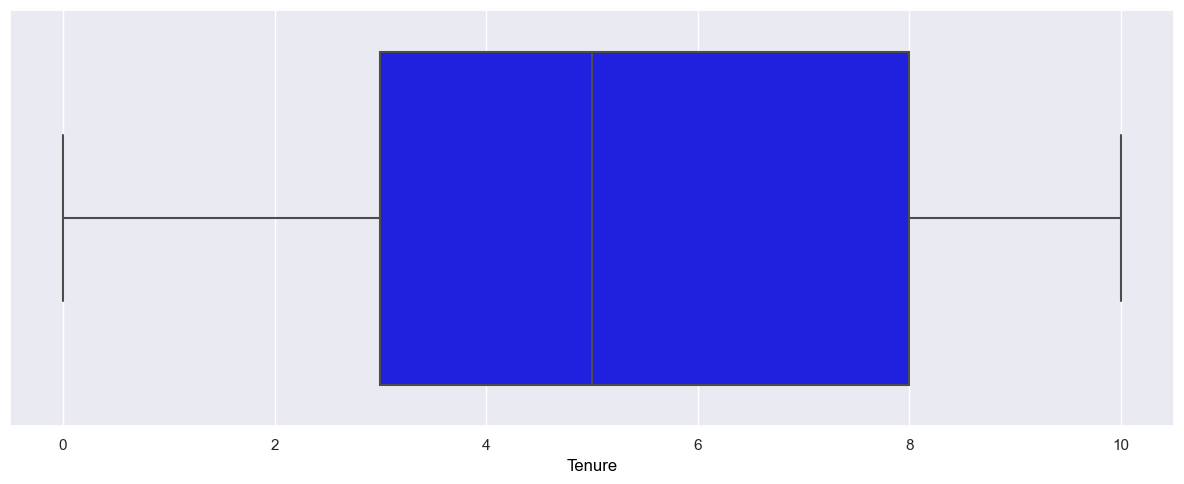

In [69]:
# Exploring the distribution of "Tenure" in relation to "Exited" and "IsActiveMemeber" feature

multivariate_eda(df, "Exited", "IsActiveMember", "Tenure")

actions["Exited - IsActiveMember", "Tenure"] = "The training and development teams can customize programs to engage both active and inactive members, with the goal of enhancing overall employee satisfaction and retention. To address customer churn, it is crucial to identify specific stages in the customer lifecycle where active members are more prone to exit. Additionally, exploring factors contributing to a slightly lower tenure for active members before exiting, such as specific services or customer support issues, can inform tailored retention strategies."

<b>Insights</b>

* The <b>mean tenure</b> for customers who <b>exited</b> and were <b>non-active members</b> is <b>slightly higher (5.01)</b> compared to <b>active members (4.79)</b>.
* Among <b>non-exited customers</b>, the <b>mean tenure</b> is <b>slightly higher</b> for customers who were <b>non-active members (5.13)</b> compared to <b>active members (4.96)</b>.
* In both scenarios, <b>non-active members</b>, on <b>average</b>, completed a <b>five-year tenure</b> with the company.

<i>The training and development teams can customize programs to engage both active and inactive members, with the goal of enhancing overall employee satisfaction and retention. To address customer churn, it is crucial to identify specific stages in the customer lifecycle where active members are more prone to exit. Additionally, exploring factors contributing to a slightly lower tenure for active members before exiting, such as specific services or customer support issues, can inform tailored retention strategies.</i>

count  mean   std  min  25%  50%  75%  max
NumOfProducts  810.0  1.48  0.82  1.0  1.0  1.0  2.0  4.0

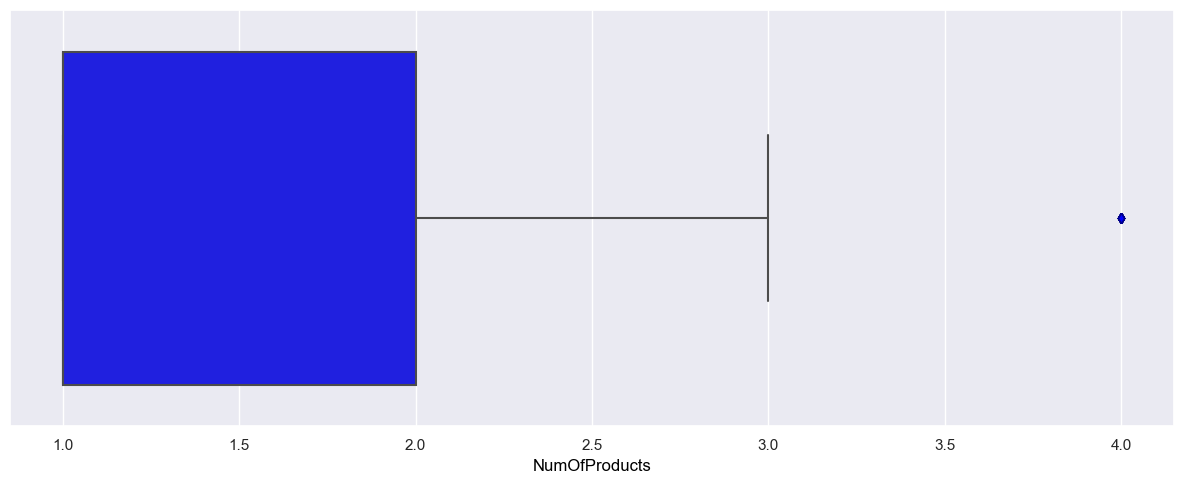

count  mean   std  min  25%  50%  75%  max
NumOfProducts  413.0  1.51  0.78  1.0  1.0  1.0  2.0  4.0

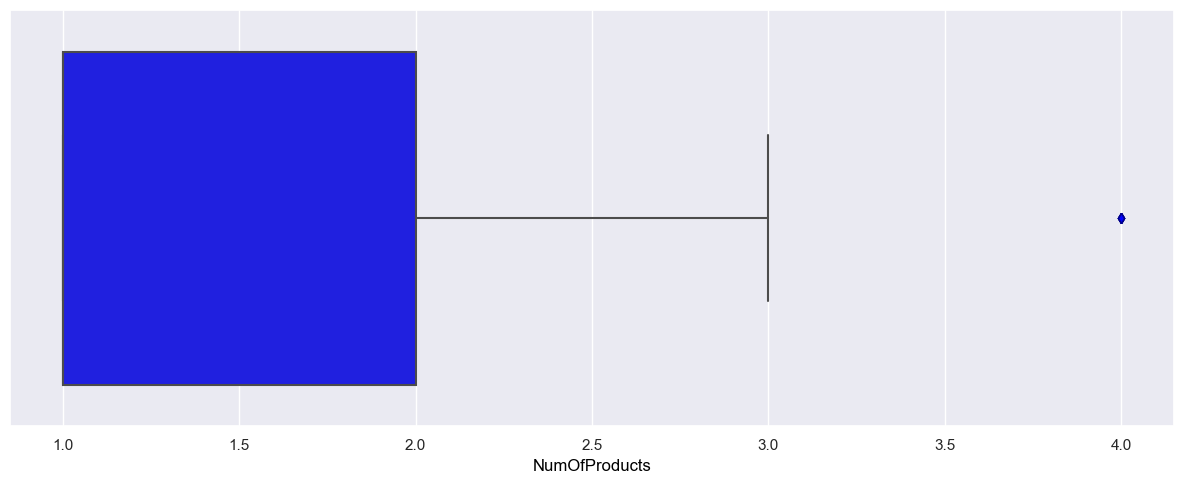

count  mean  std  min  25%  50%  75%  max
NumOfProducts  814.0  1.45  0.8  1.0  1.0  1.0  2.0  4.0

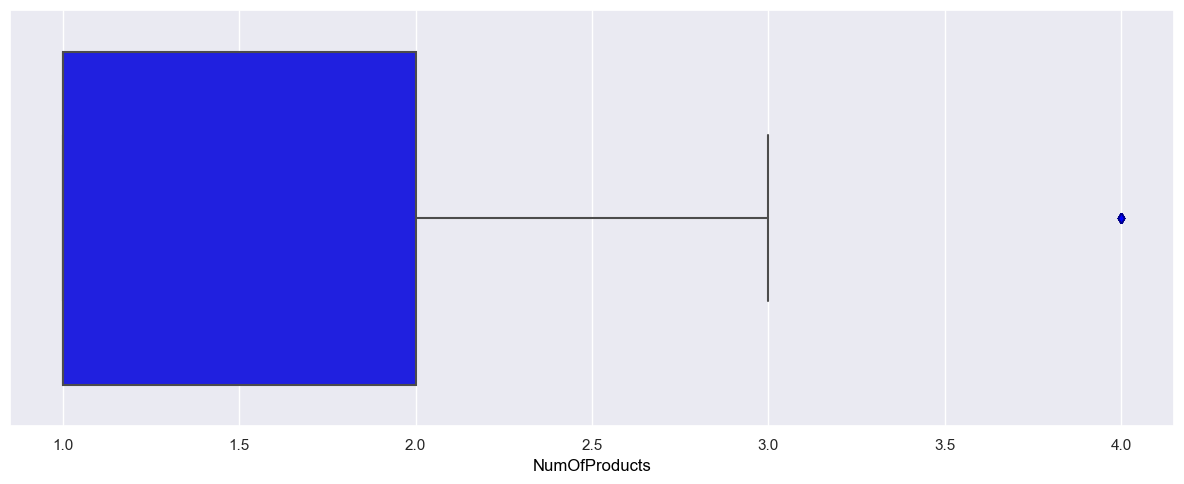

count  mean   std  min  25%  50%  75%  max
NumOfProducts  4204.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

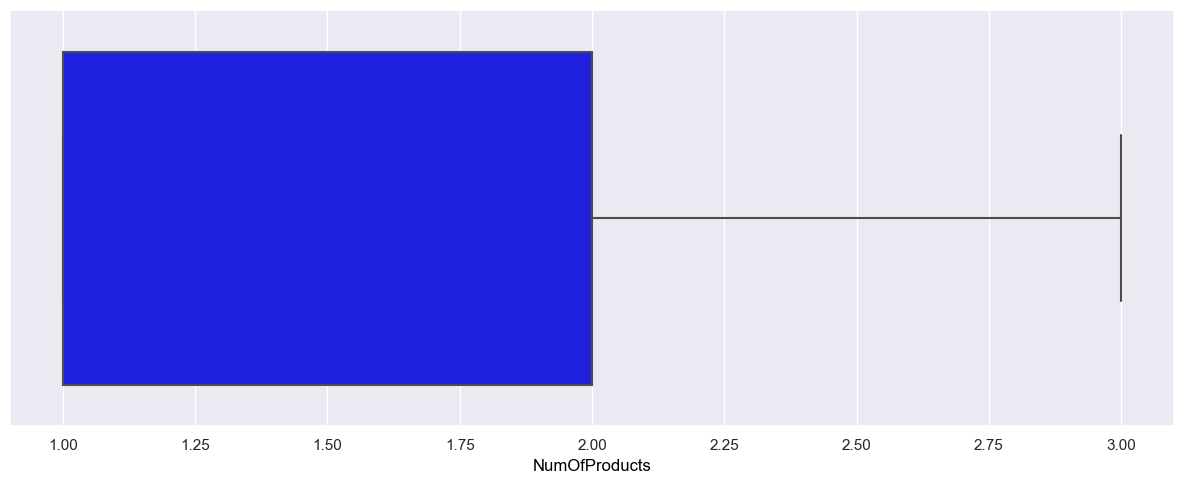

count  mean   std  min  25%  50%  75%  max
NumOfProducts  2064.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

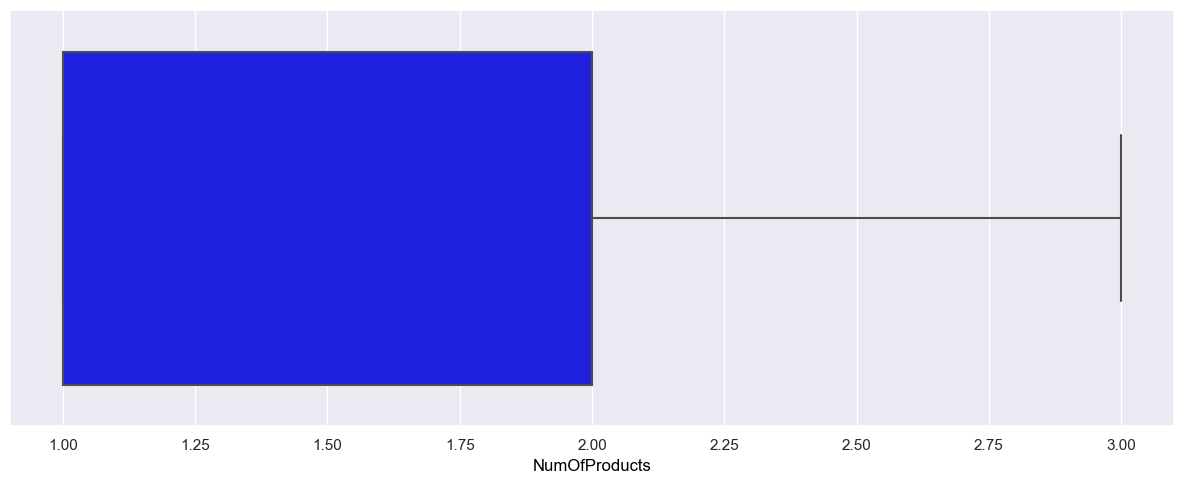

count  mean   std  min  25%  50%  75%  max
NumOfProducts  1695.0  1.55  0.51  1.0  1.0  2.0  2.0  3.0

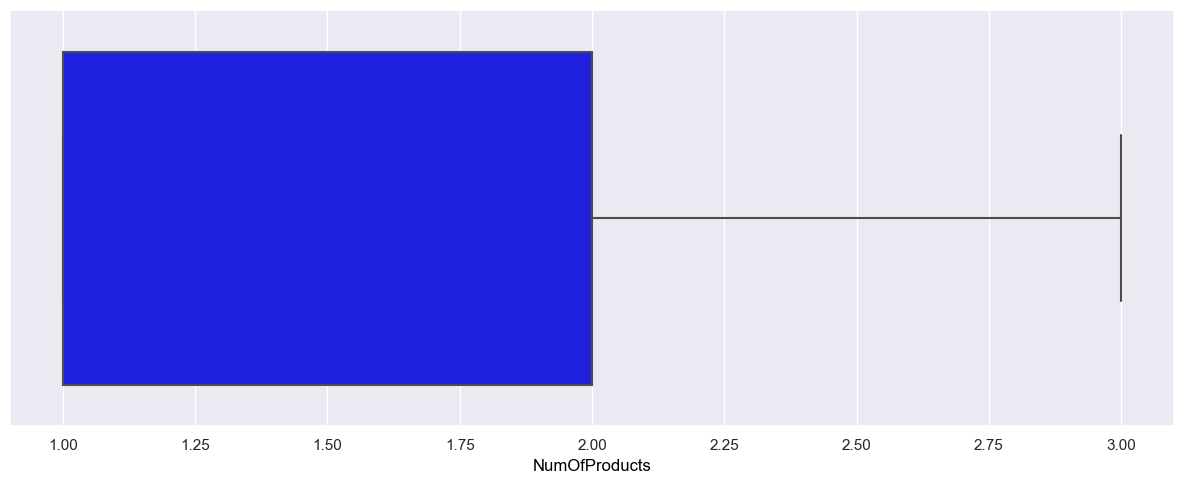

In [70]:
# Exploring the distribution of "NumOfProducts" in relation to both "Exited" and "Geography" feature

multivariate_eda(df, "Exited", "Geography", "NumOfProducts")

actions["Exited", "Geography", "NumOfProducts"] = "Understanding geographical variations in product usage is essential for developing new features aligned with regional customer preferences. Targeted support for customers with fewer products can encourage exploration, while identifying product combinations linked to higher retention underscores the importance of portfolio diversification. Sales teams can employ cross-selling strategies, exploring region-specific trends, and collaborating with the product development team to assess introducing features based on customer preferences. Incentives or promotions can further encourage customers to use more products, enhancing overall satisfaction and retention."

<b>Insights</b>

* The <b>average number of products</b> purchased by both <b>exited</b> and <b>non-exited</b> customers across <b>all regions</b> is the <b>same</b>, approximately around <b>1-2 products</b>.
* The <b>distribution</b> of <b>purchased products</b>, as reflected by quartiles, shows the <b>same variation</b> for <b>non-exited customers</b> across <b>all regions</b>. <b>Non-exited customers</b>, on <b>average</b>, purchase an <b>additional product (2 products at the 50th percentile mark)</b> compared to <b>exited</b> customers who only purchased <b>1 product</b>.

<i>Understanding geographical variations in product usage is essential for developing new features aligned with regional customer preferences. Targeted support for customers with fewer products can encourage exploration, while identifying product combinations linked to higher retention underscores the importance of portfolio diversification. Sales teams can employ cross-selling strategies, exploring region-specific trends, and collaborating with the product development team to assess introducing features based on customer preferences. Incentives or promotions can further encourage customers to use more products, enhancing overall satisfaction and retention.</i>

count  mean   std  min  25%  50%  75%  max
NumOfProducts  1139.0  1.51  0.82  1.0  1.0  1.0  2.0  4.0

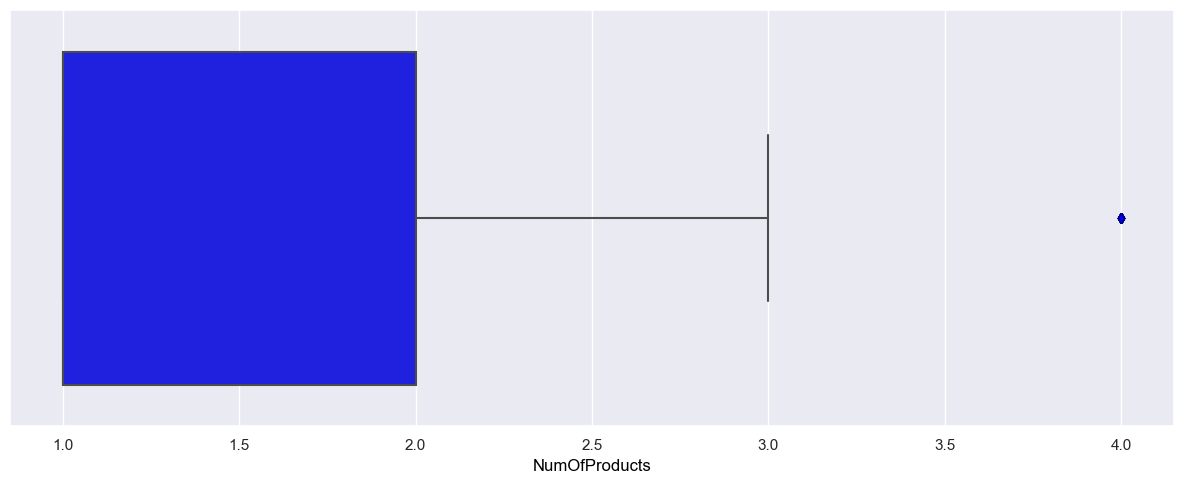

count  mean   std  min  25%  50%  75%  max
NumOfProducts  898.0  1.43  0.77  1.0  1.0  1.0  2.0  4.0

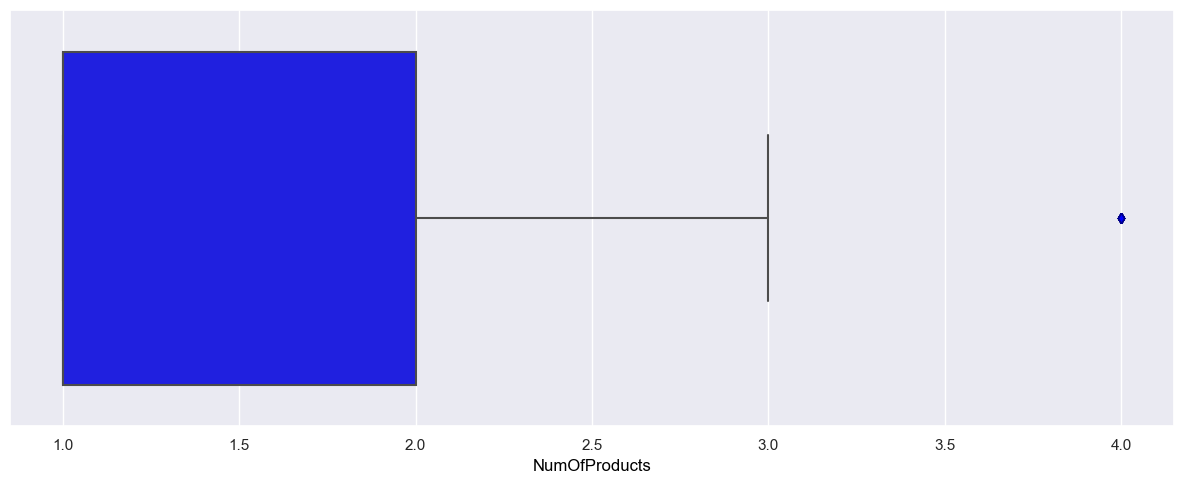

count  mean   std  min  25%  50%  75%  max
NumOfProducts  3404.0  1.56  0.51  1.0  1.0  2.0  2.0  3.0

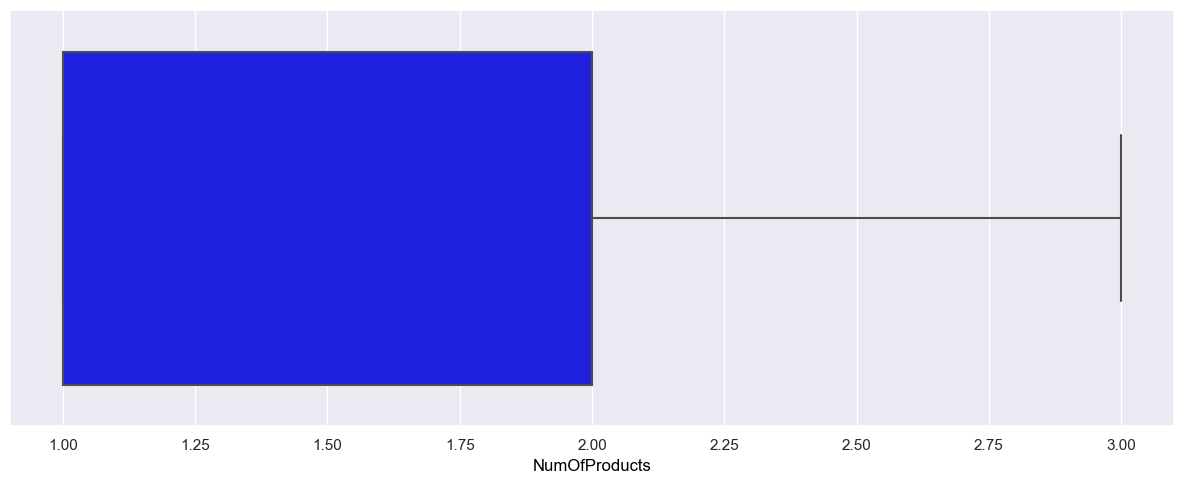

count  mean   std  min  25%  50%  75%  max
NumOfProducts  4559.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

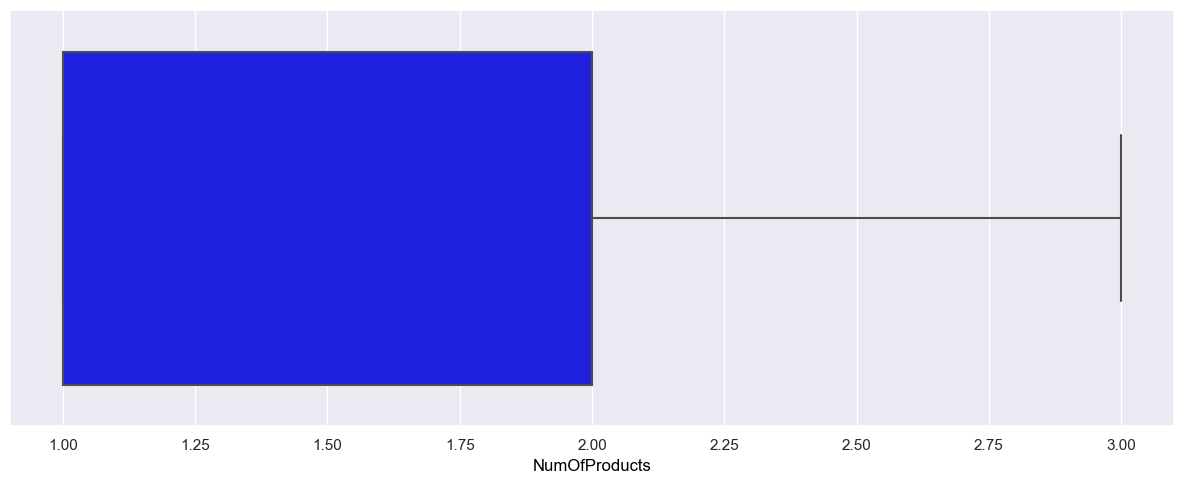

In [71]:
# Exploring the distribution of "NumOfProducts" in relation to both "Exited" and "Gender" features

multivariate_eda(df, "Exited", "Gender", "NumOfProducts")

actions["Exited - Gender - NumOfProducts"] = "Influencing marketing strategies based on gender preferences highlights the need for more targeted promotions and product recommendations. For customers who have exited and typically have fewer products, the sales strategy should focus on encouraging exploration of additional offerings. Tailoring sales pitches and promotions to gender-specific preferences can enhance the effectiveness of sales initiatives."

<b>Insights</b>

* The <b>average number of products</b> purchased by both <b>males</b> and <b>females</b> is the <b>same</b>, around <b>1-2 products</b>, among both <b>exited</b> and <b>non-exited customers</b>.
* The <b>distribution</b> of the <b>number of products</b> is <b>same</b>, as reflected by <b>quartiles (25% and 75%)</b>, shows <b>some variation</b> at the <b>50th percentile</b>. <b>Non-exited customers</b>, both <b>males</b> and <b>females</b>, purchased an <b>extra product (making it 2 products)</b> compared to <b>exited customers</b>, who only purchased <b>one product</b> at the <b>50th percentile mark</b>.

<i>Influencing marketing strategies based on gender preferences highlights the need for more targeted promotions and product recommendations. For customers who have exited and typically have fewer products, the sales strategy should focus on encouraging exploration of additional offerings. Tailoring sales pitches and promotions to gender-specific preferences can enhance the effectiveness of sales initiatives.</i>

count  mean  std  min  25%  50%  75%  max
NumOfProducts  1424.0  1.47  0.8  1.0  1.0  1.0  2.0  4.0

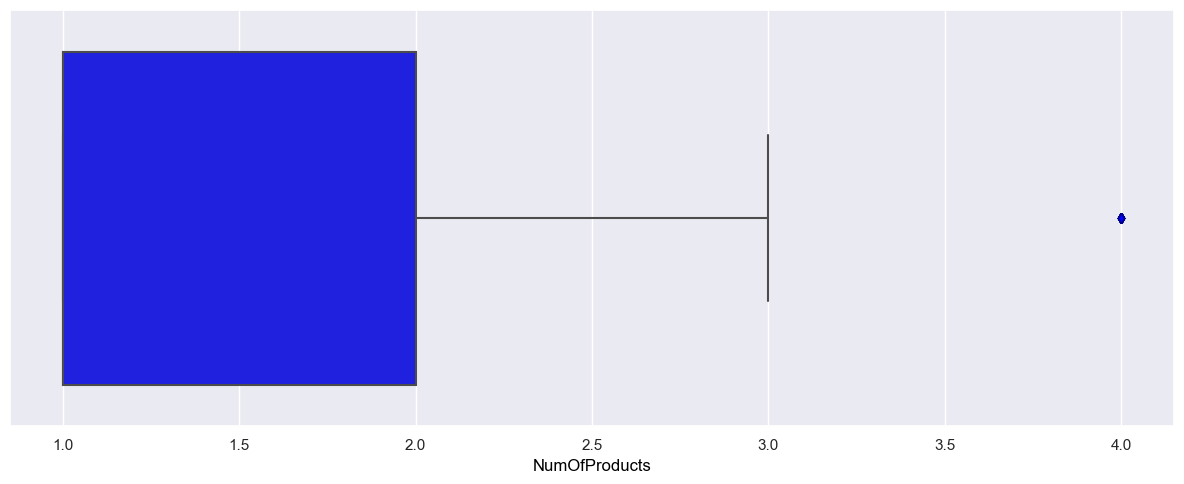

count  mean  std  min  25%  50%  75%  max
NumOfProducts  613.0  1.48  0.8  1.0  1.0  1.0  2.0  4.0

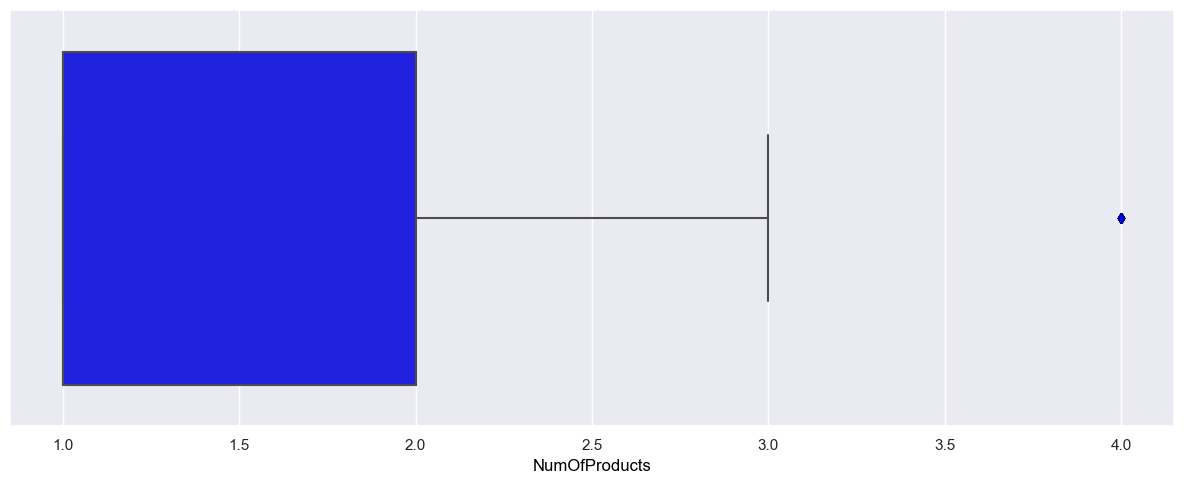

count  mean   std  min  25%  50%  75%  max
NumOfProducts  5631.0  1.55  0.51  1.0  1.0  2.0  2.0  3.0

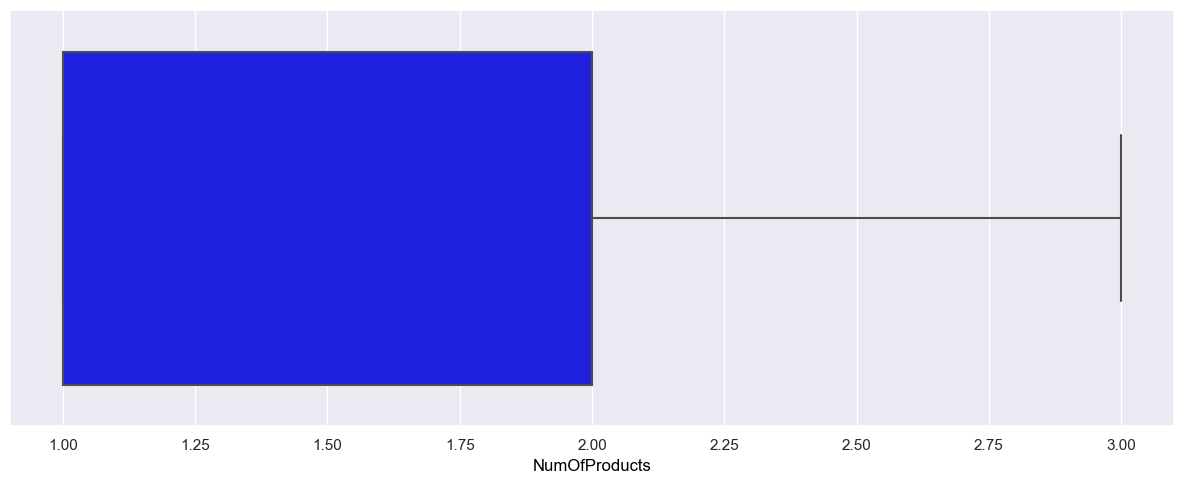

count  mean   std  min  25%  50%  75%  max
NumOfProducts  2332.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

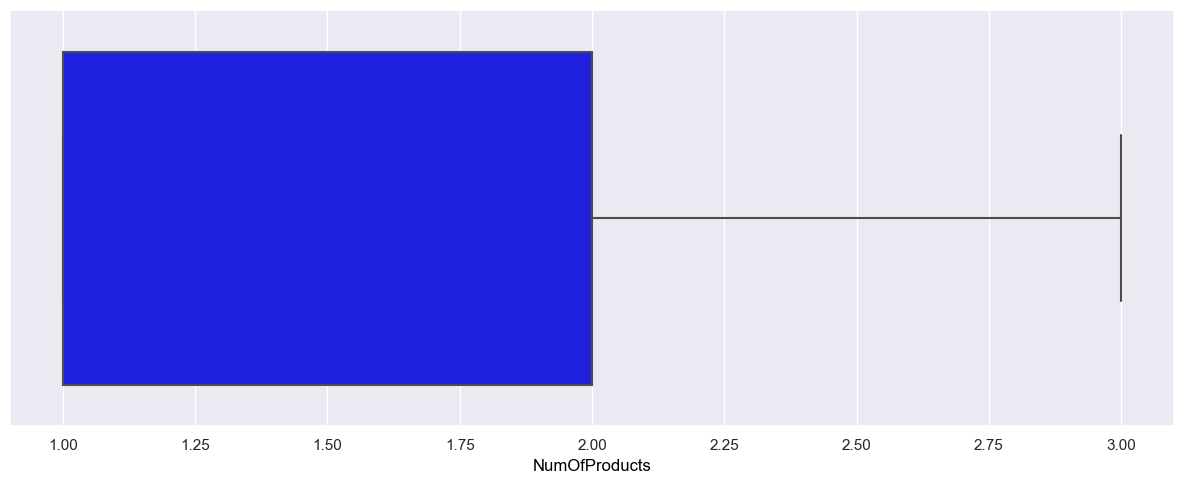

In [72]:
# Exploring the distribution of "NumOfProdcuts" in relation to both "Exited" and "HasCrCard"

multivariate_eda(df, "Exited", "HasCrCard", "NumOfProducts")

<b>Insights</b>

* The <b>average number</b> of products purchased by customers who <b>exited</b> is <b>1-2 products</b>, <b>both</b> for customers</b> with a <b>credit card</b> and those <b>without it</b>.
* The <b>distribution</b> of the number of products is <b>same</b>, as reflected by <b>quartiles (25% and 75%)</b>, shows<b> some variation</b> at the <b>50th percentile</b>. <b>Non-exited customers</b>, <b>both credit</b> and <b>non-credit card users</b> who purchased <b>an extra product (making it 2 products)</b> compared to<b> exited customers</b>, who only purchased <b>one product</b> at the <b>50th percentile mark</b>.

<i>Customers with a credit card and fewer products may benefit from guidance on optimizing their financial portfolio. Promotions for customers with a credit card could focus on additional products or features to increase engagement. Tailoring marketing messages to emphasize the benefits of specific products for customers without a credit card may encourage them to explore and adopt more offerings.</i>

count  mean   std  min  25%  50%  75%  max
NumOfProducts  735.0  1.53  0.85  1.0  1.0  1.0  2.0  4.0

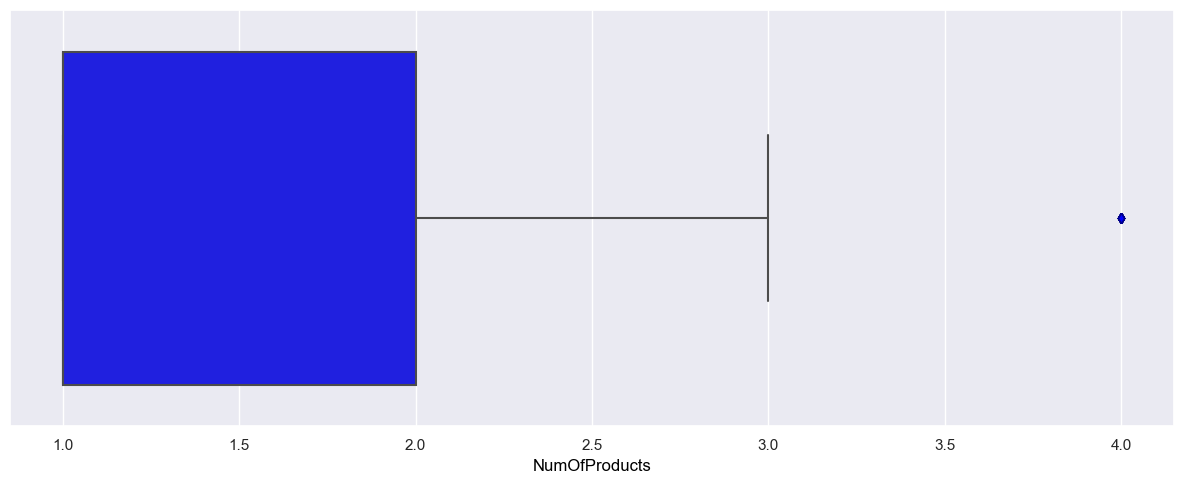

count  mean   std  min  25%  50%  75%  max
NumOfProducts  1302.0  1.44  0.77  1.0  1.0  1.0  2.0  4.0

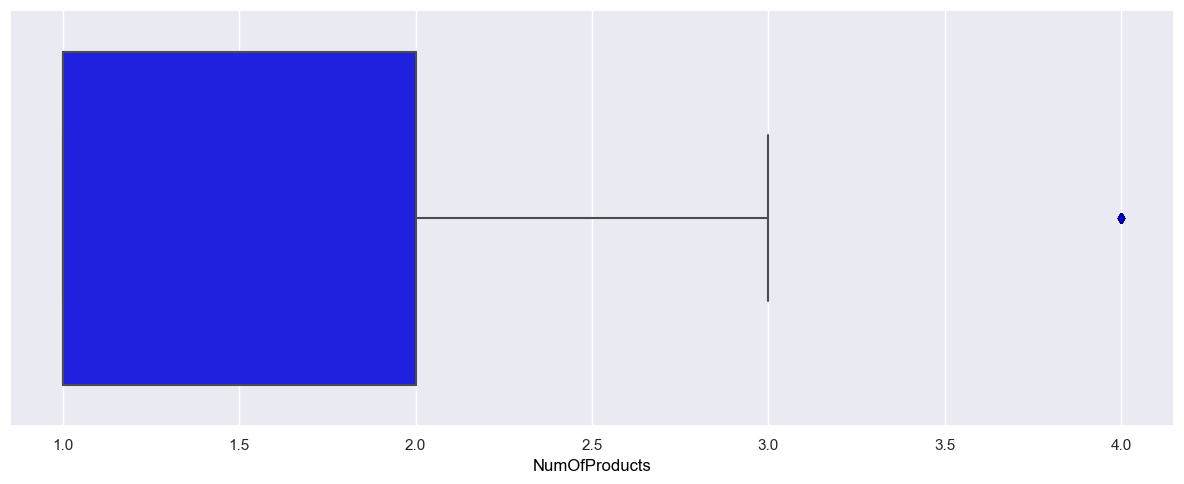

count  mean   std  min  25%  50%  75%  max
NumOfProducts  4416.0  1.54  0.51  1.0  1.0  2.0  2.0  3.0

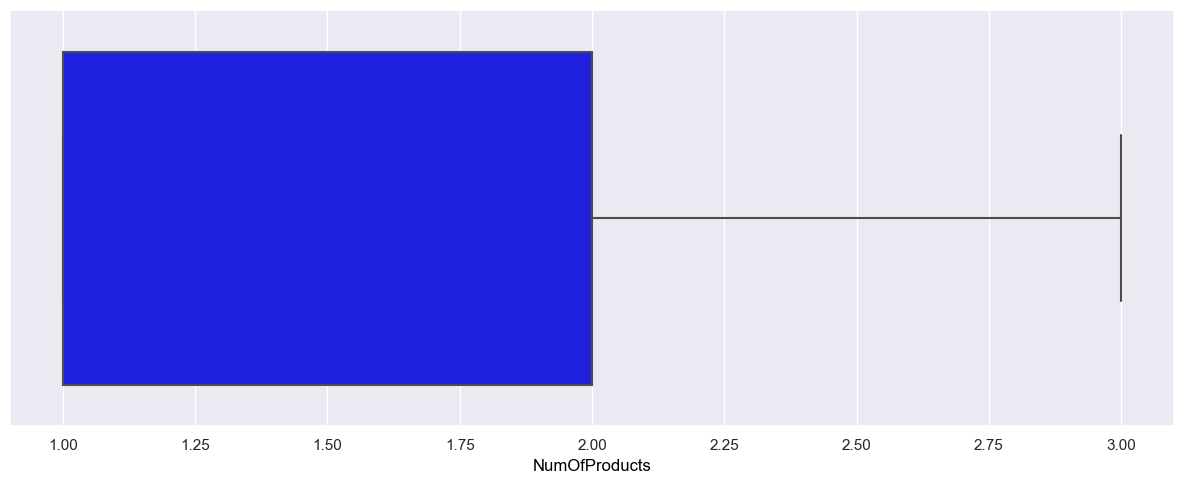

count  mean   std  min  25%  50%  75%  max
NumOfProducts  3547.0  1.55  0.51  1.0  1.0  2.0  2.0  3.0

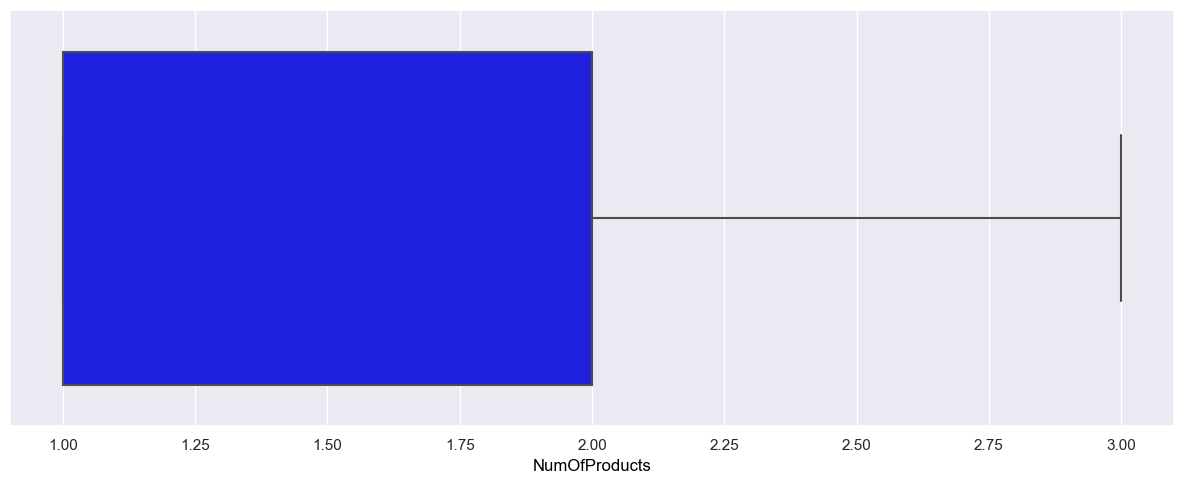

In [73]:
# Exploring the distribution of "NumOfProducts" in relation to "Exited" and "IsActiveMember"

multivariate_eda(df, "Exited", "IsActiveMember", "NumOfProducts")

actions["Exited - IsActiveMember - NumOfProducts"] = "Targeting active members with promotions or incentives for additional products can be effective by emphasizing personalized recommendations to boost retention. Inactive members, who typically have slightly fewer products, may be encouraged to explore, focus on addressing potential barriers to product adoption, and adopt more offerings through targeted campaigns."

<b>Insights</b>

* The <b>average number</b> of products purchased by customers who <b>exited</b> is <b>1-2 products</b>, <b>both</b> for <b>active customers</b> and <b>inactive customers</b>.
* The <b>distribution</b> of the number of products is <b>same</b>, as reflected by <b>quartiles (25% and 75%)</b>, shows<b> some variation</b> at the <b>50th percentile</b>. <b>Non-exited customers</b>, <b>both active</b> and <b>inactive customers</b> who purchased <b>an extra product (making it 2 products)</b> compared to<b> exited customers</b>, who only purchased <b>one product</b> at the <b>50th percentile mark</b>.

<i>Targeting active members with promotions or incentives for additional products can be effective by emphasizing personalized recommendations to boost retention. Inactive members, who typically have slightly fewer products, may be encouraged to explore, focus on addressing potential barriers to product adoption, and adopt more offerings through targeted campaigns.</i>

count     mean       std  min  25%       50%        75%        max
Balance  810.0  71192.8  66894.12  0.0  0.0  80376.46  128995.29  238387.56

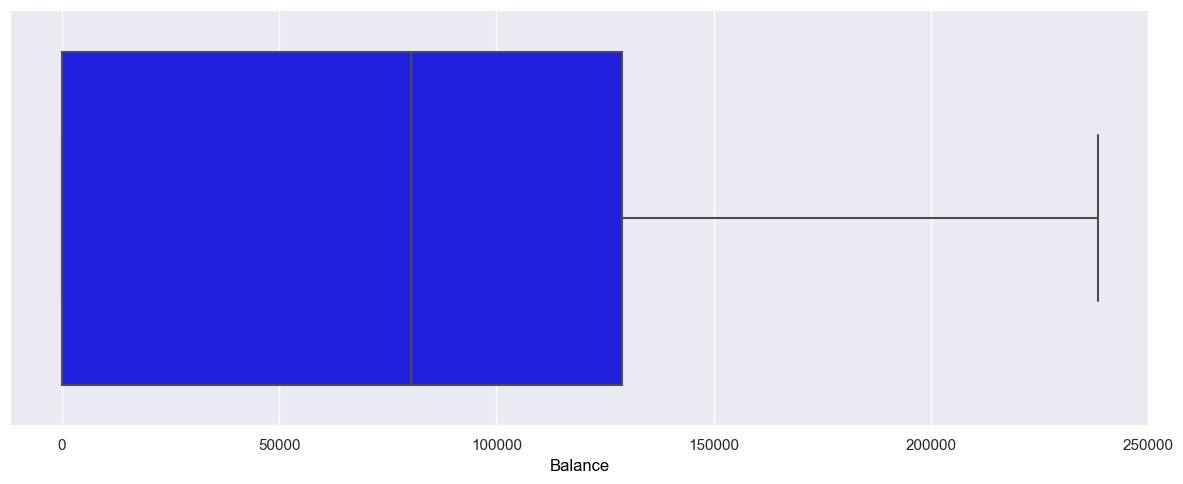

count      mean       std  min  25%       50%        75%        max
Balance  413.0  72513.35  66903.28  0.0  0.0  79035.95  127660.46  250898.09

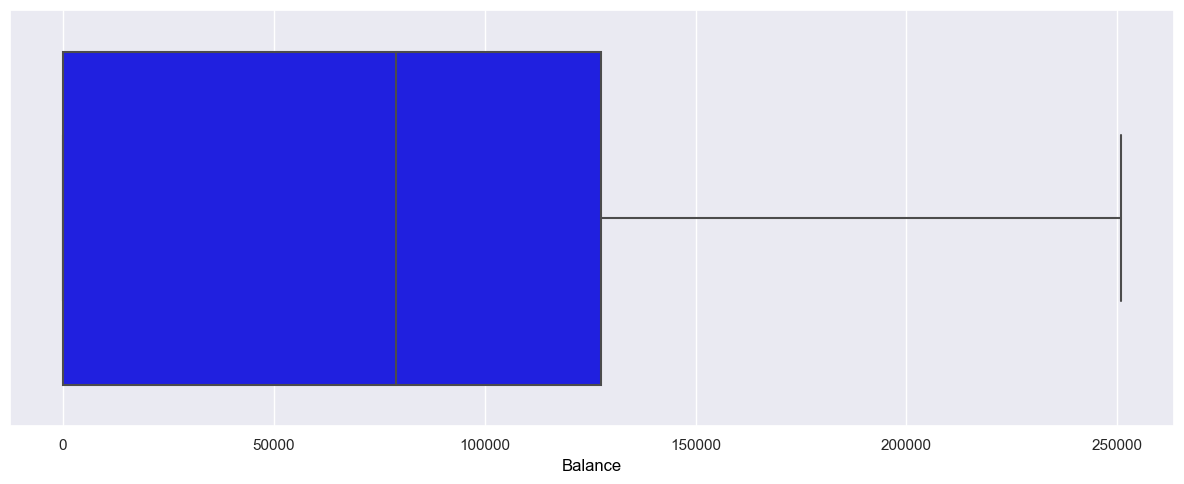

count       mean       std       min        25%        50%  \
Balance  814.0  120361.08  19517.06  62389.03  107521.59  118951.22   

               75%        max  
Balance  132900.18  181461.48

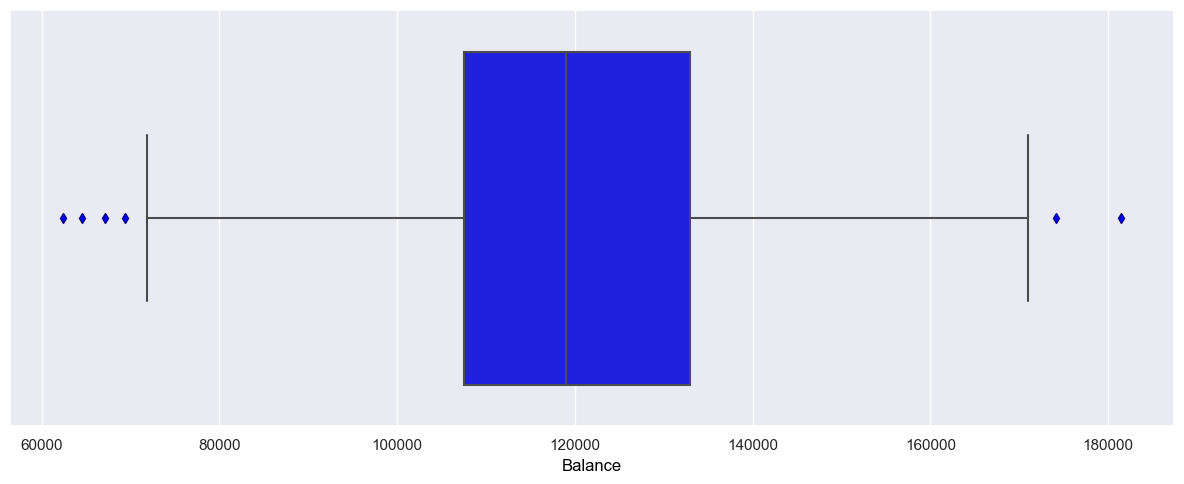

count      mean       std  min  25%       50%        75%       max
Balance  4204.0  60339.28  63446.32  0.0  0.0  49853.57  119824.12  212778.2

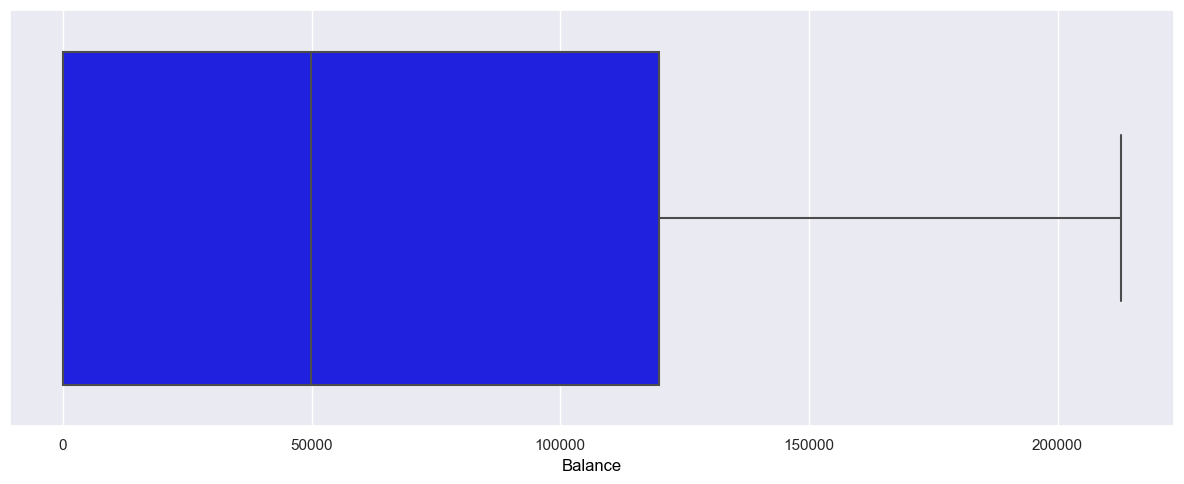

count      mean       std  min  25%  50%        75%       max
Balance  2064.0  59678.07  63489.04  0.0  0.0  0.0  119805.89  221532.8

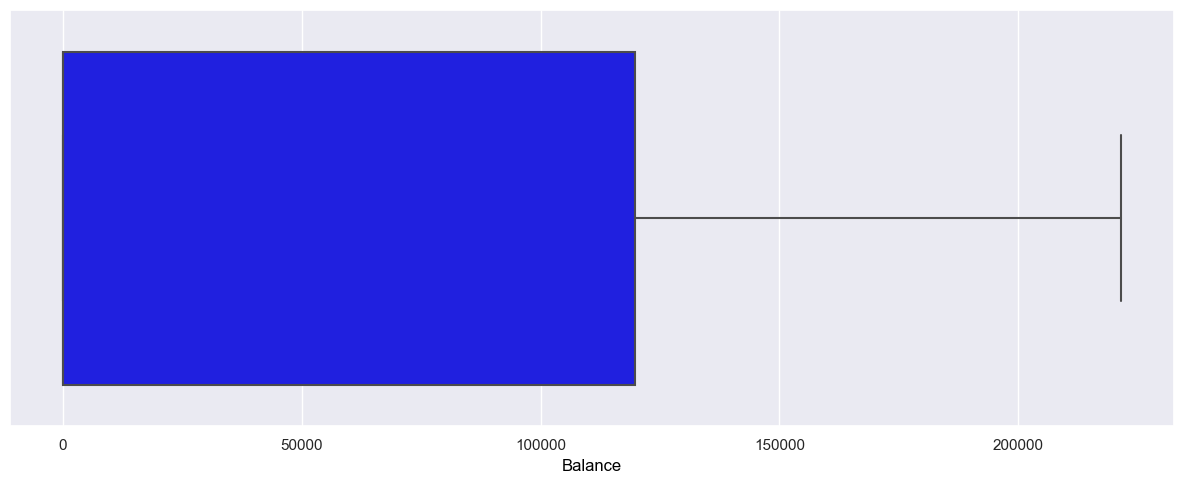

count       mean       std       min       25%        50%  \
Balance  1695.0  119427.11  29966.03  27288.43  99510.37  120252.02   

               75%        max  
Balance  139676.01  214346.96

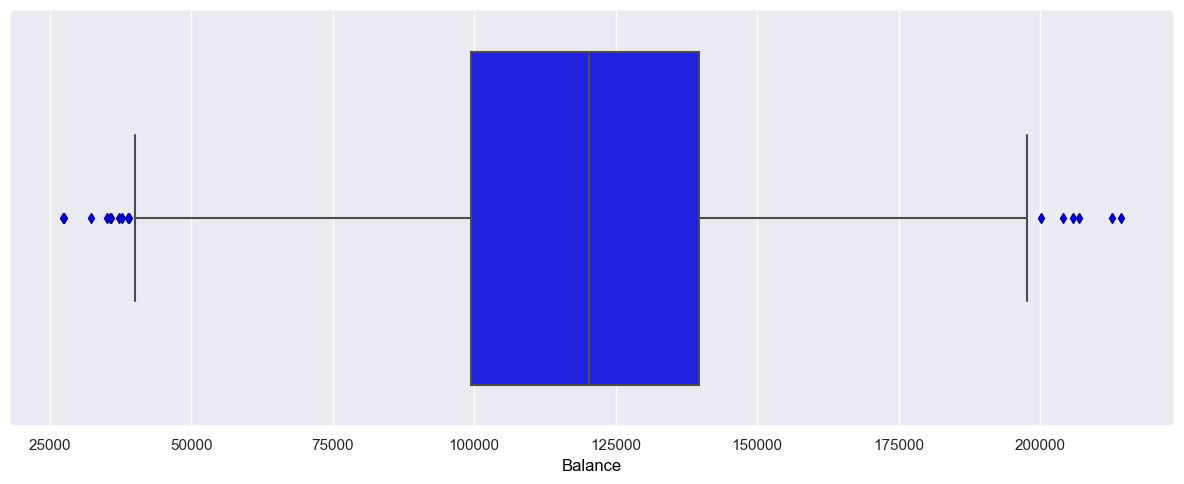

In [74]:
# Exploring the distribution of "Balance" in relation to "Geography" and "Exited" features

multivariate_eda(df, "Exited", "Geography", "Balance")

actions["Exited - Geography - Balance"] = "Identify opportunities for upselling or cross-selling higher-value products in Germany by understanding geographical nuances in customer behavior, crucial considerations for the overall business strategy. Collaborate with local marketing teams to align strategies with regional characteristics, enhancing the impact of campaigns. Implement targeted retention strategies for high-balance customers in Germany, incorporating exclusive offers, personalized services, or loyalty programs. Analyze the reasons behind high balances for exited customers, exploring whether specific services or interactions influenced their decision to exit."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average balance</b> is <b>lower</b> in <b>France (71192.80), followed by <b>Spain (72513.28)</b> and <b>Germany (120361.08)</b>.
* Among <b>non-exited customers</b>, <b>all</b> the <b>countries</b> has <b>lower balance</b> compared <b>exited customers</b> in their respective countries, with <b>France</b> having the <b>lowest</b> with <b>mean balance of 60339.28</b>, followed by <b>Spain (63489.04)</b> and <b>Germany (119427.11)</b>.
* The <b>high balance</b> for <b>Germany</b> in <b>both exited</b> and <b>non-exited groups</b> suggests that the <b>market</b> in Germany might be <b>more lucrative</b>.
* The <b>25th percentile balance</b> for customers who <b>did not exit</b> is<b> 0</b> for <b>France</b> and <b>Spain</b>, suggesting a significant number of customers in these regions have <b>zero balances</b>.
    
<i>Identify opportunities for upselling or cross-selling higher-value products in Germany by understanding geographical nuances in customer behavior, crucial considerations for the overall business strategy. Collaborate with local marketing teams to align strategies with regional characteristics, enhancing the impact of campaigns. Implement targeted retention strategies for high-balance customers in Germany, incorporating exclusive offers, personalized services, or loyalty programs. Analyze the reasons behind high balances for exited customers, exploring whether specific services or interactions influenced their decision to exit.</i>

count      mean       std  min  25%        50%        75%        max
Balance  1139.0  89036.64  58664.52  0.0  0.0  108076.33  130842.87  238387.56

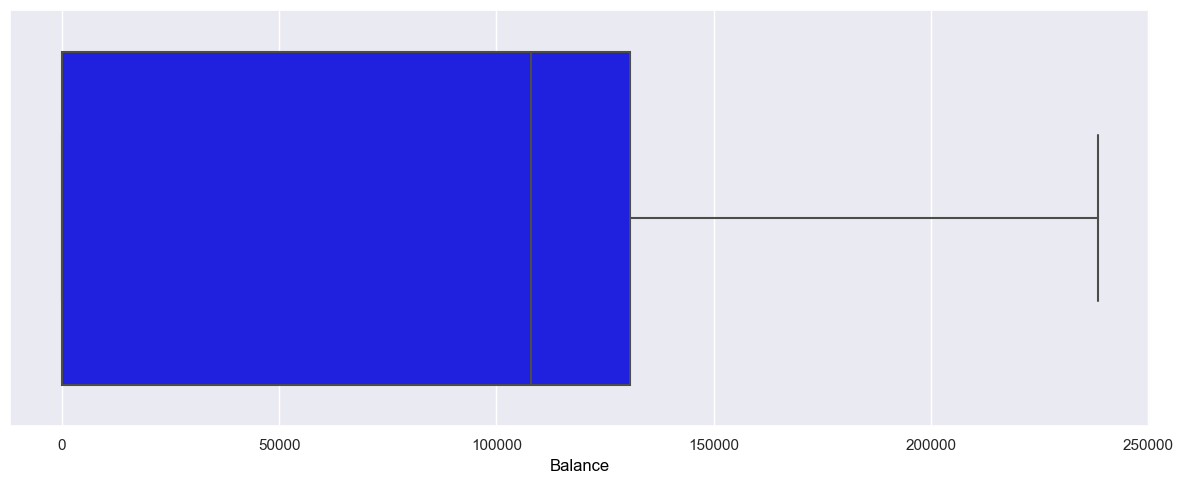

count      mean       std  min      25%        50%        75%  \
Balance  898.0  93736.48  57899.24  0.0  63574.0  111310.71  132374.65   

               max  
Balance  250898.09

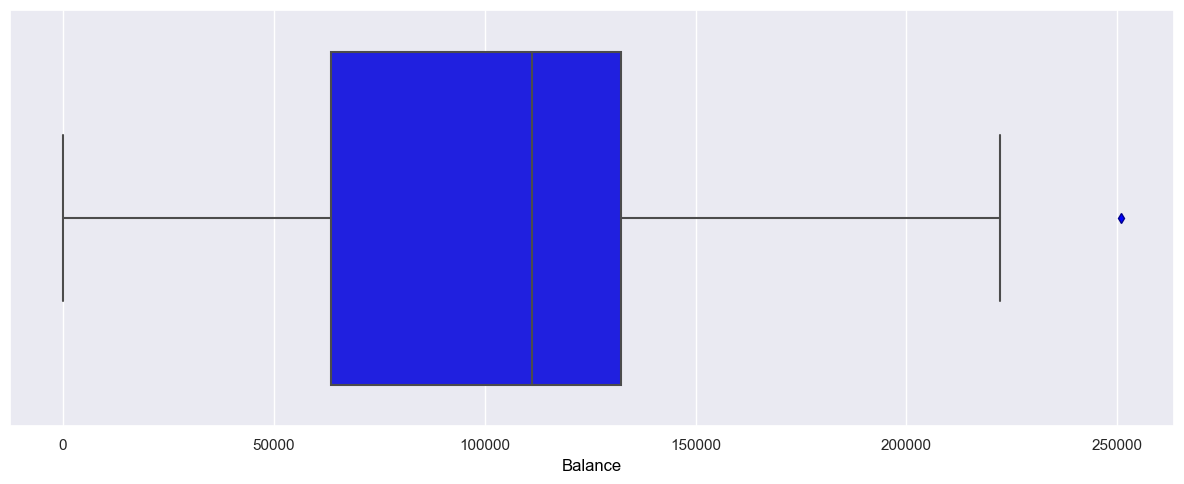

count      mean      std  min  25%       50%        75%       max
Balance  3404.0  71183.25  62584.0  0.0  0.0  89967.16  125323.52  212778.2

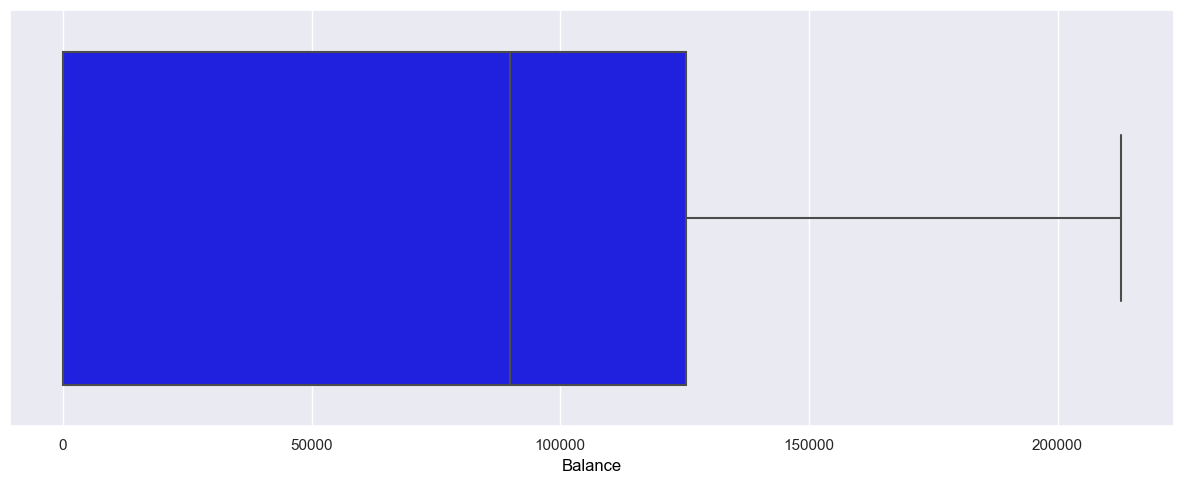

count      mean       std  min  25%      50%        75%       max
Balance  4559.0  73911.61  63026.08  0.0  0.0  93911.3  127172.45  221532.8

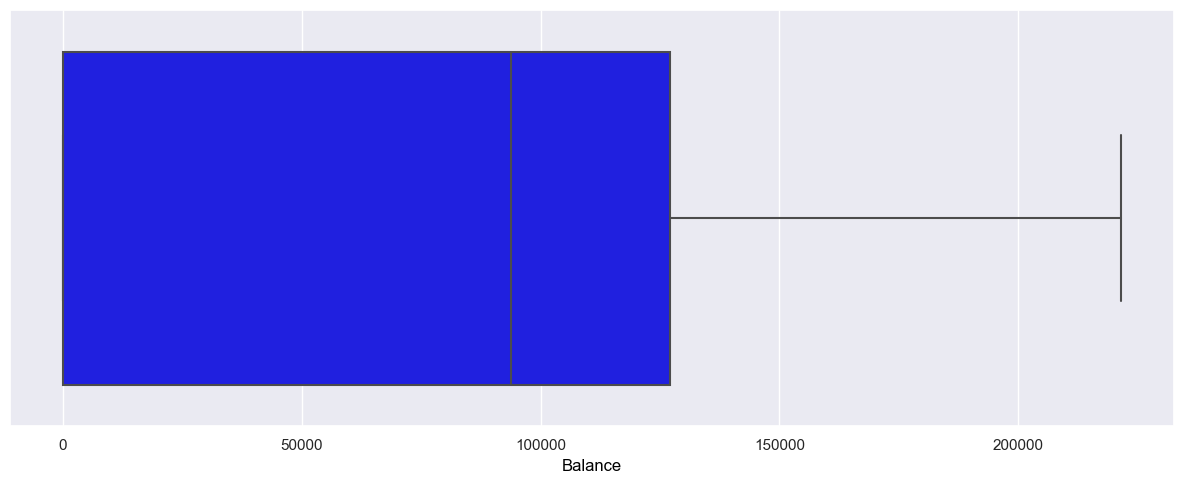

In [75]:
# Exploring the distribution of "Balance" in relation to "Exited" and "Gender"

multivariate_eda(df, "Exited", "Gender", "Balance")

actions["Exited - Gender - Balance"] = "Tailoring promotional offers or product recommendations based on individual preferences and behaviors, rather than relying solely on gender (given the insubstantial difference in mean balances), may lead to more personalized and effective marketing campaigns. Additionally, analyze the reasons behind high balances for exited customers to understand whether specific services or interactions influenced their decision to exit."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average balance</b> is <b>lower</b> for <b>females (89036.64)</b> compared to <b>males (93736.45)</b>.
* Among <b>non-exited customers</b>, the <b>average balance</b> is <b>higher</b> for <b>males (73911.61)</b> compared to <b>females (71183.25)</b>.
* <b>Both male</b> and <b>female</b> customers who <b>exited</b> have a noticeable number with <b>zero balances</b> at the <b>25th percentile</b>.
* The <b>distribution</b> of balances</b> for <b>both exited</b> and <b>non-exited</b> customers is <b>right-skewed</b>, with <b>many</b> customers having <b>lower balances</b> and a <b>few</b> having <b>higher balances</b>.

<i>Tailoring promotional offers or product recommendations based on individual preferences and behaviors, rather than relying solely on gender (given the insubstantial difference in mean balances), may lead to more personalized and effective marketing campaigns. Additionally, analyze the reasons behind high balances for exited customers to understand whether specific services or interactions influenced their decision to exit.</i>

count      mean       std  min       25%        50%       75%  \
Balance  1424.0  90755.12  58008.34  0.0  35816.21  109838.18  131839.3   

              max  
Balance  213146.2

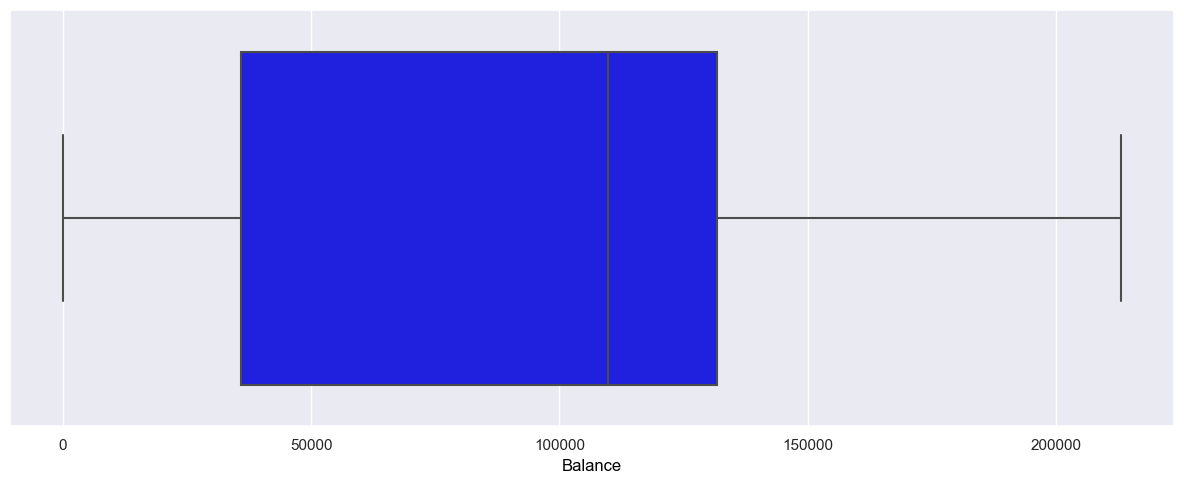

count      mean       std  min       25%        50%        75%  \
Balance  613.0  91929.53  59211.06  0.0  47020.65  108528.07  130788.71   

               max  
Balance  250898.09

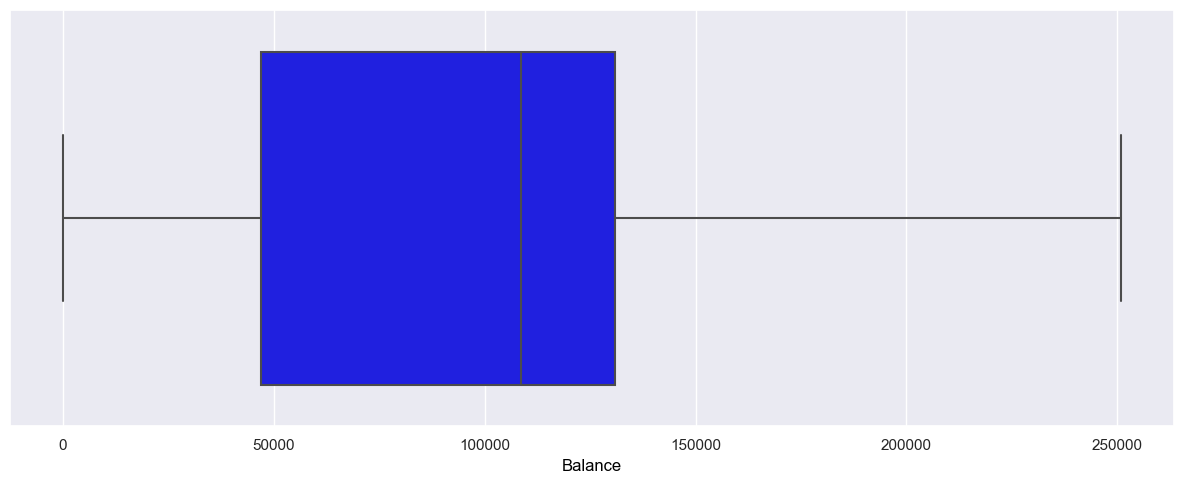

count      mean       std  min  25%       50%        75%       max
Balance  5631.0  72126.95  63133.11  0.0  0.0  91285.13  126437.06  221532.8

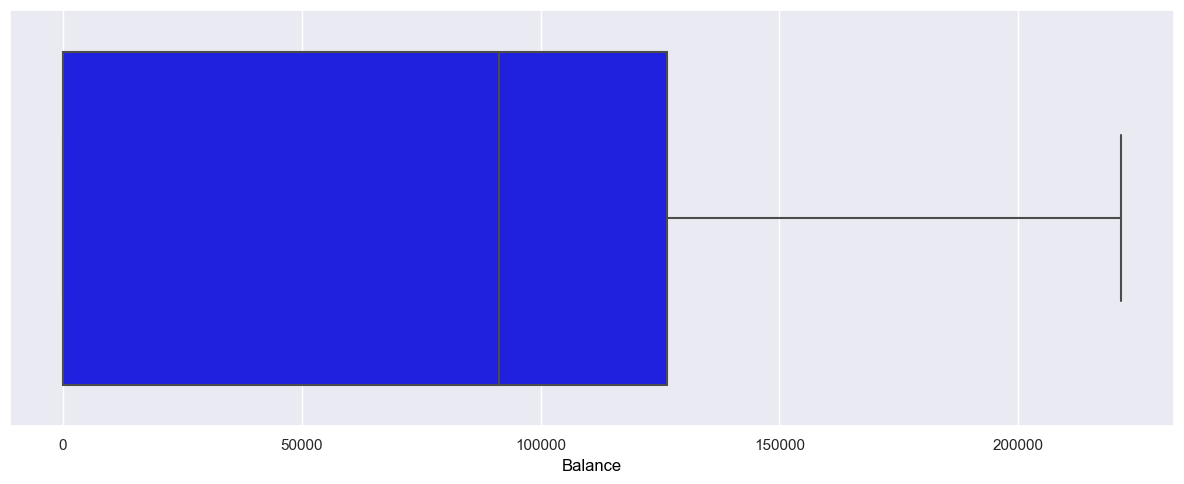

count      mean      std  min  25%       50%       75%       max
Balance  2332.0  74238.39  62142.4  0.0  0.0  94140.12  126267.9  212778.2

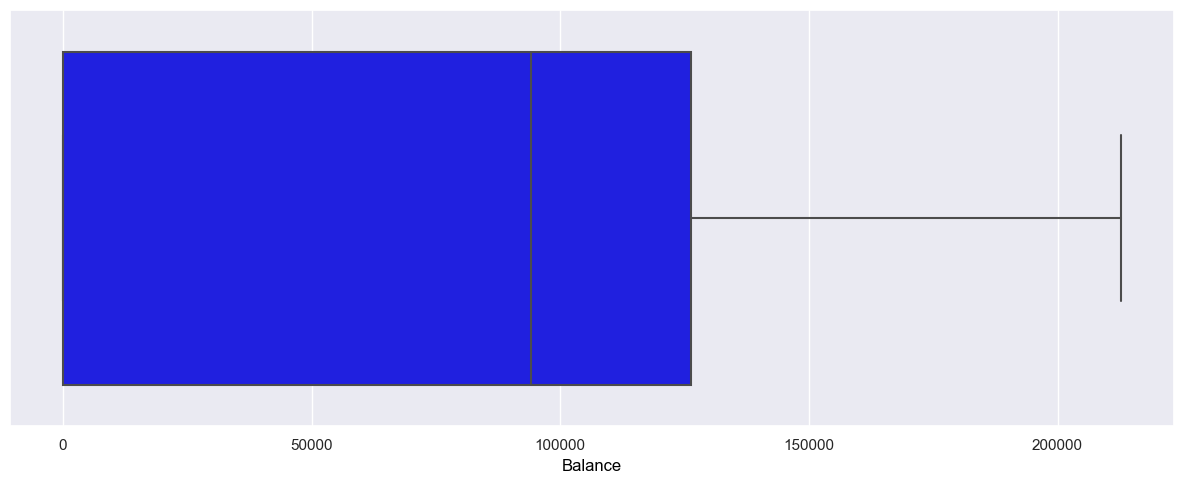

In [76]:
# Exploring the distribution of "Balance" in relation to both "Exited" and "HasCrCard" features

multivariate_eda(df, "Exited", "HasCrCard", "Balance")

actions["Exited - HasCrCard - Balance"] = "Investigate factors contributing to zero balances, particularly among customers without a credit card, and assess whether this is tied to specific account types, services, or other reasons. Explore potential differences in credit card usage patterns and benefits offered to customers, considering the customization of promotions or communications to encourage higher usage."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average balance</b> is <b>lower</b> for customers <b>with</b> a <b>credit card (90755.12)</b>, compared to those <b>without it (91929.53)</b>.
* Among <b>non-exited customers</b>, the <b>average balance</b> is <b>higher</b> for customers <b>without</b> a credit card (74238.39)</b>, compared to those <b>with</b> it <b>(72126.95)</b>.
* The <b>difference</b> in <b>mean balances</b> is <b>not significant</b>.

<i>Investigate factors contributing to zero balances, particularly among customers without a credit card, and assess whether this is tied to specific account types, services, or other reasons. Explore potential differences in credit card usage patterns and benefits offered to customers, considering the customization of promotions or communications to encourage higher usage.</i>

count      mean       std  min       25%        50%        75%  \
Balance  735.0  91320.64  58574.13  0.0  44441.75  109922.61  131393.86   

               max  
Balance  250898.09

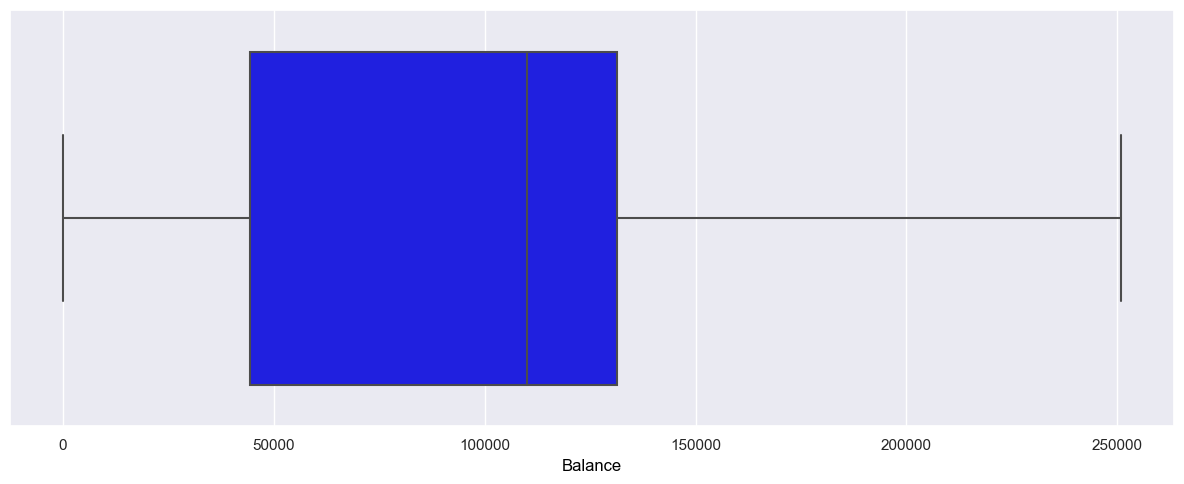

count      mean       std  min      25%        50%        75%  \
Balance  1302.0  90988.81  58262.22  0.0  34314.7  109252.72  131429.77   

               max  
Balance  222267.63

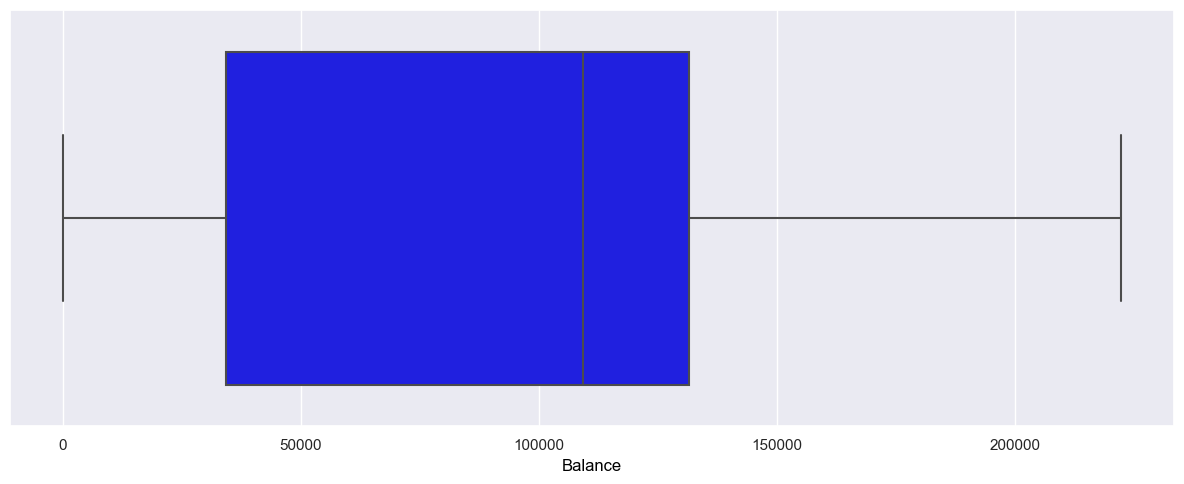

count      mean       std  min  25%      50%        75%       max
Balance  4416.0  73304.72  62486.76  0.0  0.0  92212.2  125912.63  212778.2

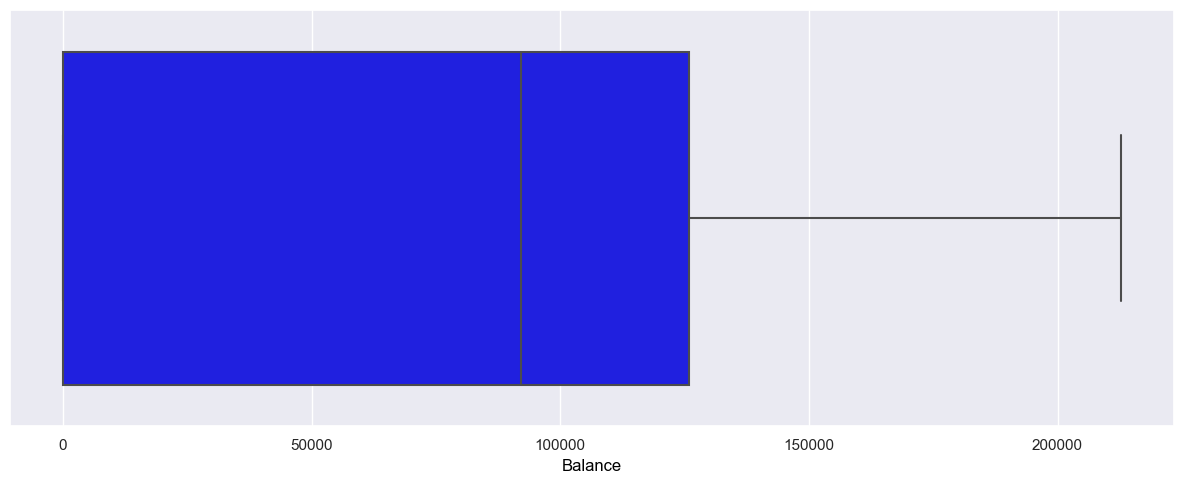

count      mean       std  min  25%       50%        75%       max
Balance  3547.0  72048.82  63296.86  0.0  0.0  91835.16  127043.26  221532.8

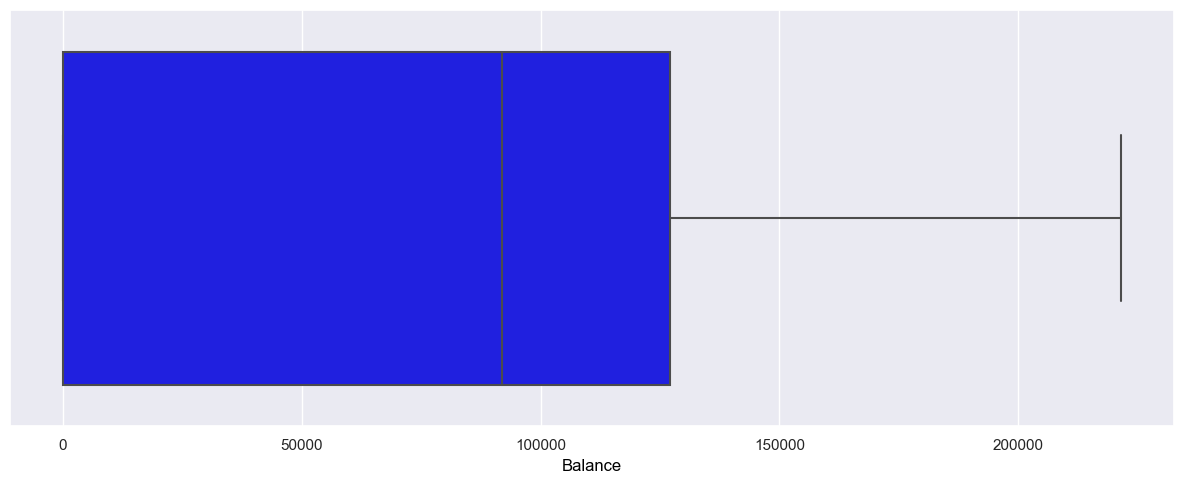

In [77]:
# Exploring the distribution of "Balance" in relation to both "Exited" and "IsActiveMember" feature

multivariate_eda(df, "Exited", "IsActiveMember", "Balance")

actions["Exited - IsActiveMember - Balance"] = "Recognizing that active members exhibit more consistent balances can significantly influence marketing strategies. Campaigns targeting this group may benefit from emphasizing stability and reliability. Implement personalized communication and offers for customers with high balances, as they are still churning. Continuously monitor and analyze customer feedback or complaints related to account activity or membership status and promptly address any issues or concerns raised by customers."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average balance</b> of <b>inactive customers</b> is <b>slightly less (90988.81)</b> compared to <b>active customers (91320.64)</b>.
* Among <b>non-exited customers</b>, the <b>average balance</b> of <b>active members</b> is <b>slightly higher (73304.75)</b> compared to <b>inactive members (72048.82)</b>.
* <b>Churned customers</b>, whether <b>active</b> or <b>inactive members</b>, generally had <b>higher mean balances</b> compared to their <b>non-churned counterparts</b>.

<i>Recognizing that active members exhibit more consistent balances can significantly influence marketing strategies. Campaigns targeting this group may benefit from emphasizing stability and reliability. Implement personalized communication and offers for customers with high balances, as they are still churning. Continuously monitor and analyze customer feedback or complaints related to account activity or membership status and promptly address any issues or concerns raised by customers.</i>

count       mean       std     min       25%        50%  \
EstimatedSalary  810.0  103439.28  57497.15  123.07  55781.09  103739.24   

                       75%        max  
EstimatedSalary  154718.75  199378.58

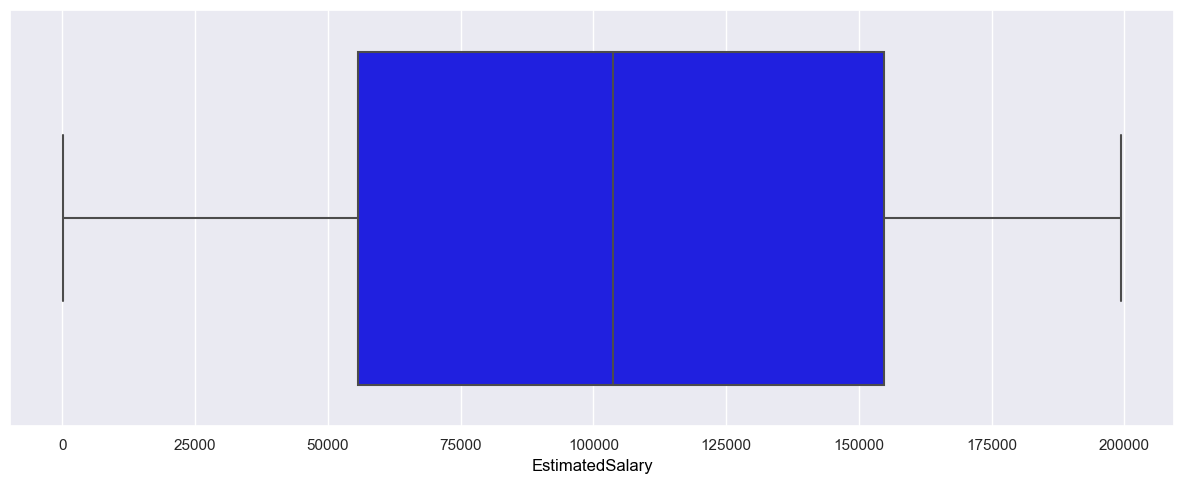

count       mean       std     min       25%        50%  \
EstimatedSalary  413.0  103629.55  56792.38  417.41  57338.56  108732.96   

                       75%        max  
EstimatedSalary  152567.75  199304.74

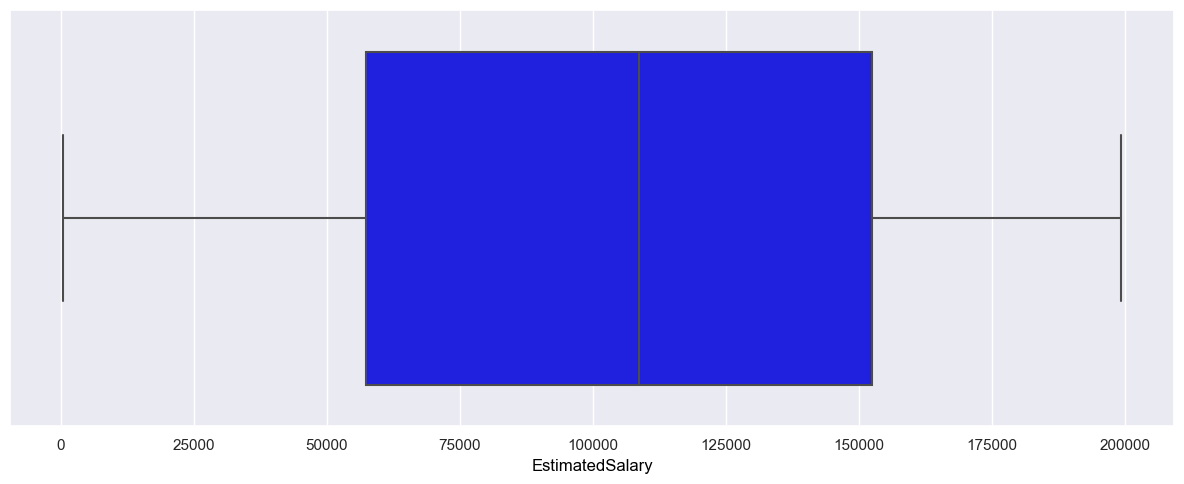

count      mean       std    min       25%       50%  \
EstimatedSalary  814.0  98403.89  58815.39  11.58  47055.06  96498.14   

                       75%       max  
EstimatedSalary  148684.44  199808.1

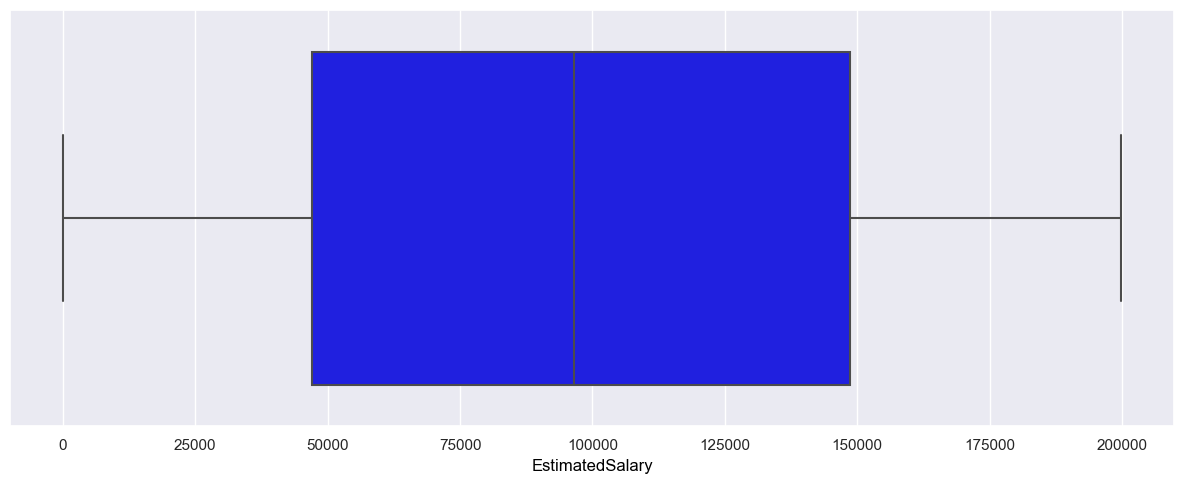

count     mean       std    min       25%       50%  \
EstimatedSalary  4204.0  99217.1  57286.96  90.07  50385.45  98045.04   

                       75%        max  
EstimatedSalary  147907.53  199929.17

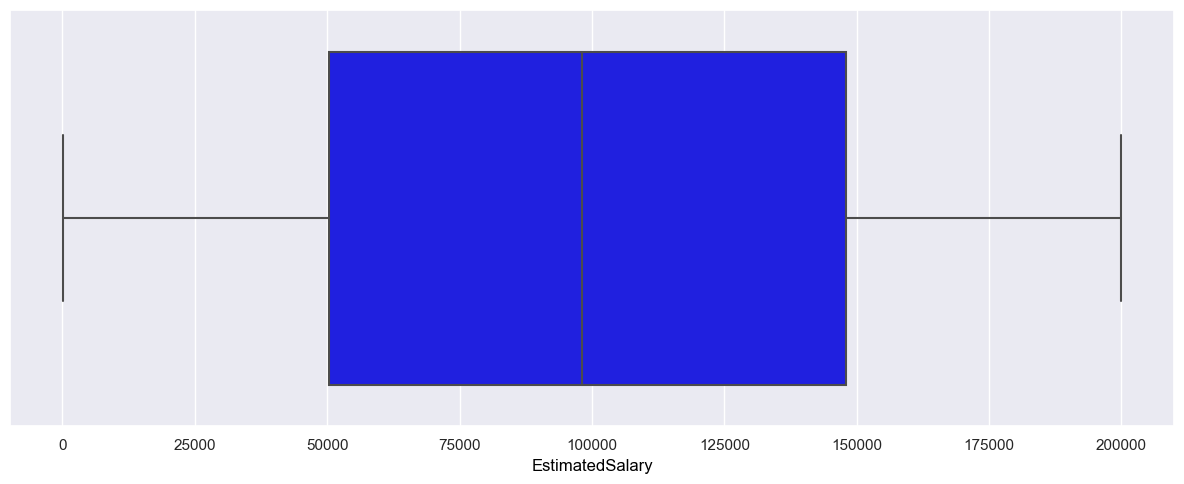

count      mean       std     min       25%       50%  \
EstimatedSalary  2064.0  98602.37  57142.59  479.54  49317.77  98768.45   

                       75%        max  
EstimatedSalary  146336.36  199992.48

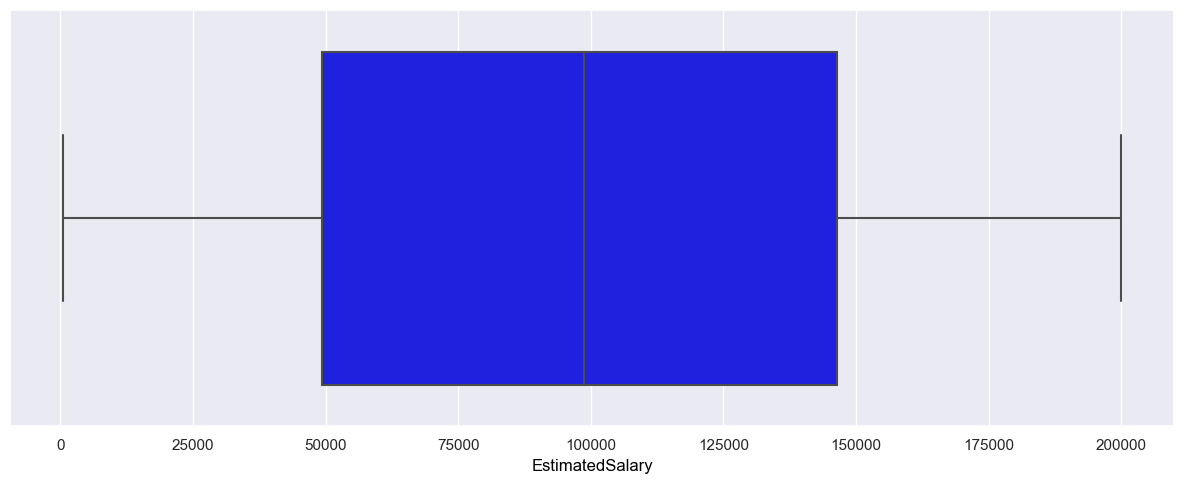

count       mean       std     min       25%        50%  \
EstimatedSalary  1695.0  102414.66  57968.29  343.38  52901.94  103557.85   

                       75%        max  
EstimatedSalary  152763.72  199970.74

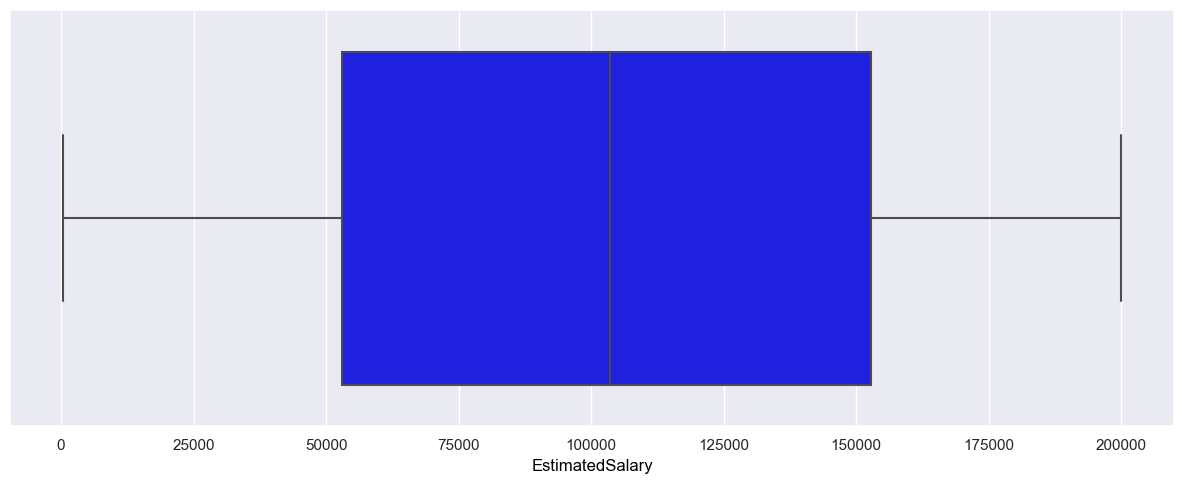

In [78]:
# Exploring the distribution of "EstimatedSalary" in relation to "Exited" and "Geography" features

multivariate_eda(df, "Exited", "Geography", "EstimatedSalary")

actions["Exited - Geography - Exited"] = "Tailoring marketing strategies based on regional salary insights could prove effective. For instance, campaigns in regions with lower average salaries might focus on value-based propositions. Assess whether these variations align with economic indicators, cost of living, or other external factors in each country. Additionally, analyze how competitors are addressing the financial needs of customers in different countries and evaluate whether adjustments are needed to stay competitive."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average estimated salary</b> is <b>lower</b> for customers in <b>Germany (98403.89)</b>, followed by <b>France (103439.28)</b> and <b>Spain (103629.55)</b>.
* Among <b>non-exited customers</b>, the customers in <b>Germany</b> have a <b>higher mean estimated salary (102414.66)</b>, followed by <b>France (99217.10)</b> and <b>Spain (98602.37)</b>.
* It's notable that<b> Germany</b>, which has the <b>lowest average salary</b> for <b>exited customers</b>, has the <b>highest average salary</b> for <b>non-exited customers</b>.

<i>Tailoring marketing strategies based on regional salary insights could prove effective. For instance, campaigns in regions with lower average salaries might focus on value-based propositions. Assess whether these variations align with economic indicators, cost of living, or other external factors in each country. Additionally, analyze how competitors are addressing the financial needs of customers in different countries and evaluate whether adjustments are needed to stay competitive.</i>

count       mean       std    min       25%        50%  \
EstimatedSalary  1139.0  102948.99  57879.51  91.75  53147.32  106663.46   

                       75%       max  
EstimatedSalary  153241.65  199808.1

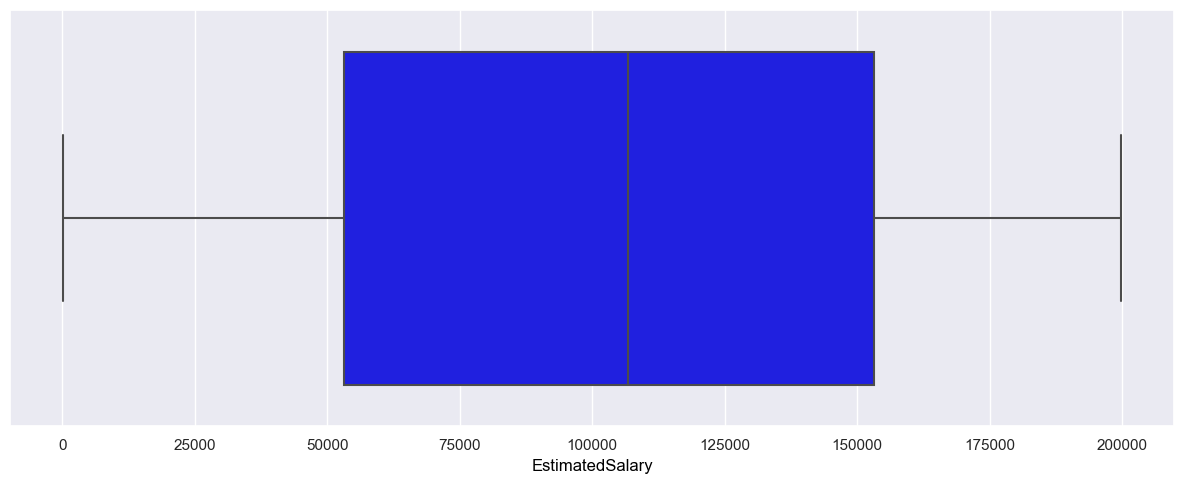

count      mean       std    min       25%      50%  \
EstimatedSalary  898.0  99584.29  57931.72  11.58  51246.88  98083.2   

                       75%        max  
EstimatedSalary  150633.19  199693.84

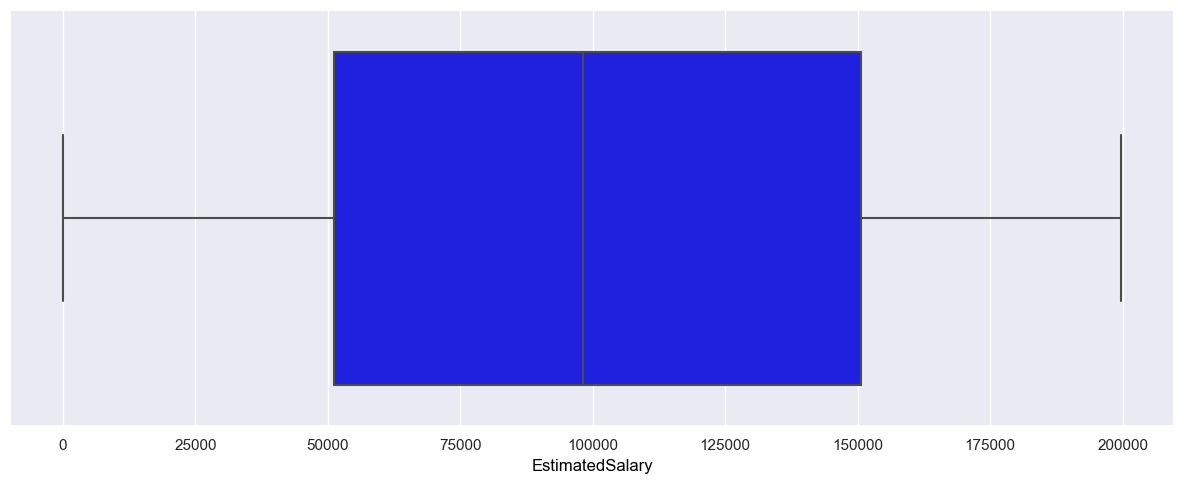

count      mean       std     min       25%        50%  \
EstimatedSalary  3404.0  99816.07  57186.92  178.19  50773.28  101026.53   

                       75%        max  
EstimatedSalary  147121.72  199992.48

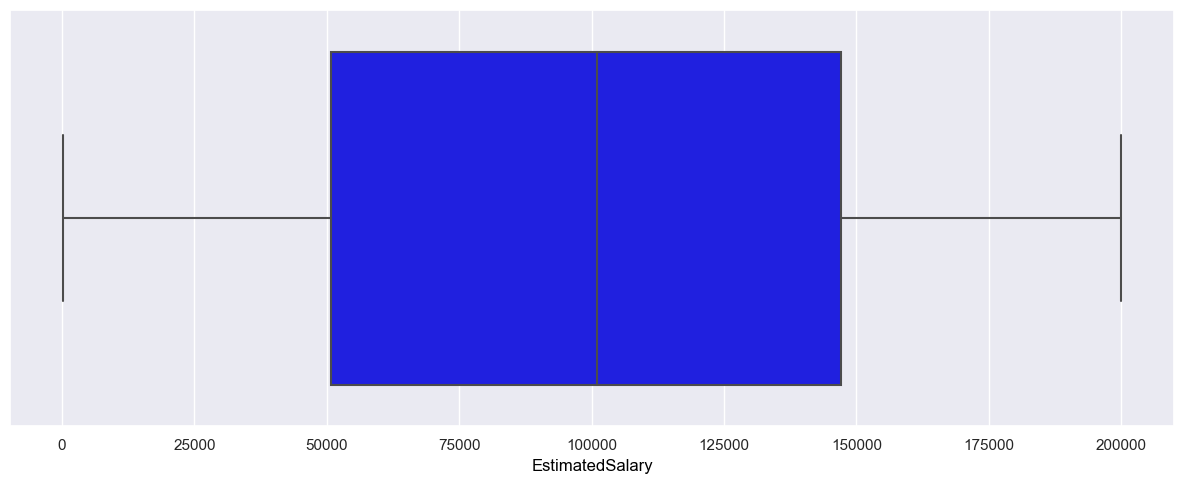

count      mean       std    min       25%       50%  \
EstimatedSalary  4559.0  99680.39  57574.51  90.07  50811.86  98060.51   

                       75%        max  
EstimatedSalary  149377.68  199953.33

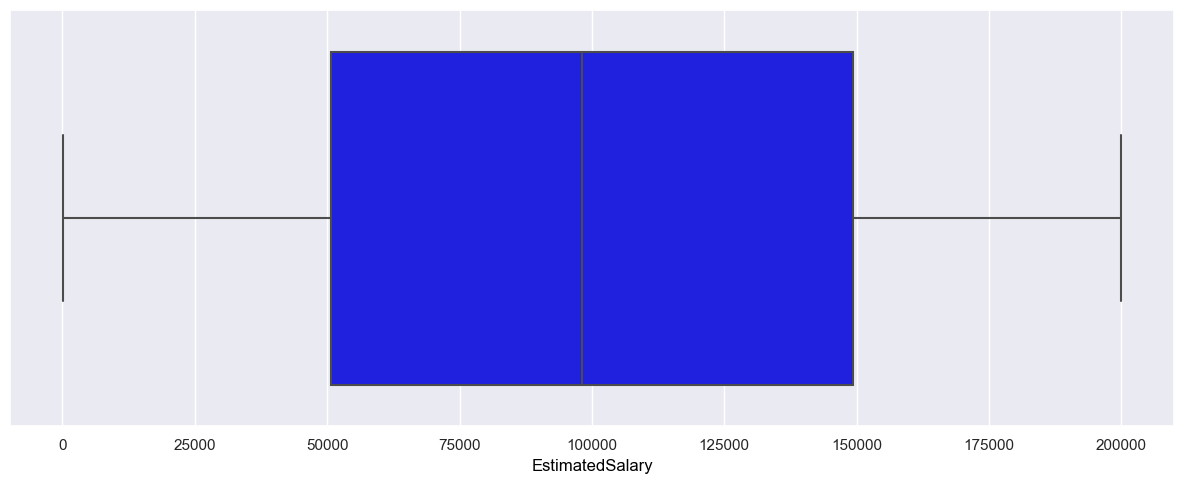

In [79]:
# Exploring the distribution of "EstimatedSalary" in relation to both "Exited" and "Gender" features

multivariate_eda(df, "Exited", "Gender", "EstimatedSalary")

<b>Insights</b>

* For <b>exited customers</b>, the <b>average salary</b> of <b>male customers</b> is <b>lower (99548.29)</b> than that of <b>female customers (102948.99)</b>.
* Among <b>non-exited customers</b>, the <b>average salary</b> is <b>almost similar</b> for <b>both genders</b>.

<i>Utilizing employee engagement and satisfaction surveys, along with salary analysis, can help identify factors contributing to differences in exit rates between genders. Explore whether specific financial products or services may be more appealing to one gender over the other. Consider designing retention incentives that are adjusted based on salary levels to address potential disparities and enhance overall retention efforts.</i>

count       mean       std    min       25%        50%  \
EstimatedSalary  1424.0  100550.33  57470.16  11.58  50477.91  100703.06   

                       75%       max  
EstimatedSalary  149928.39  199808.1

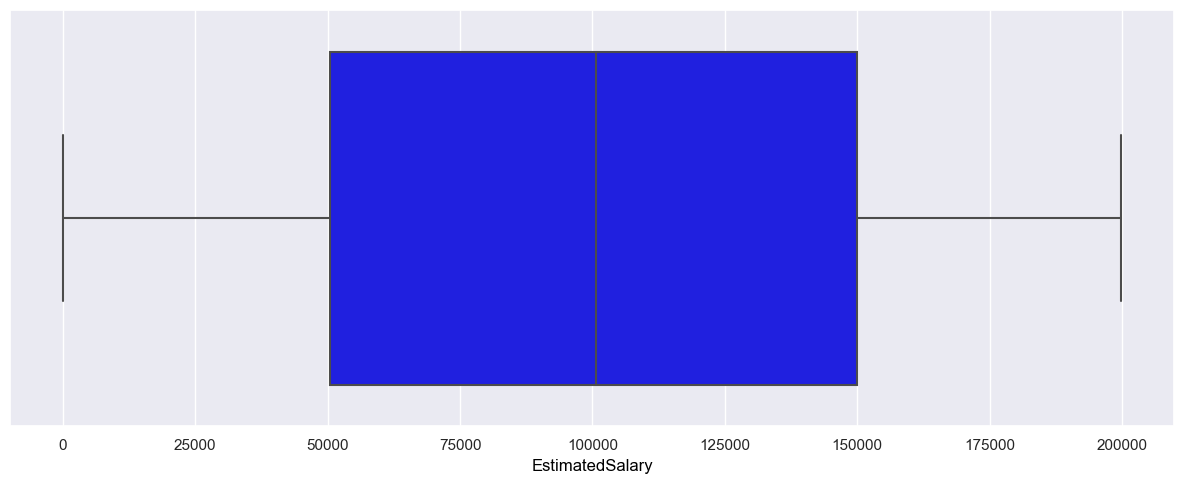

count       mean       std    min       25%        50%  \
EstimatedSalary  613.0  103592.03  58919.45  91.75  54560.79  107112.25   

                       75%        max  
EstimatedSalary  155915.24  199693.84

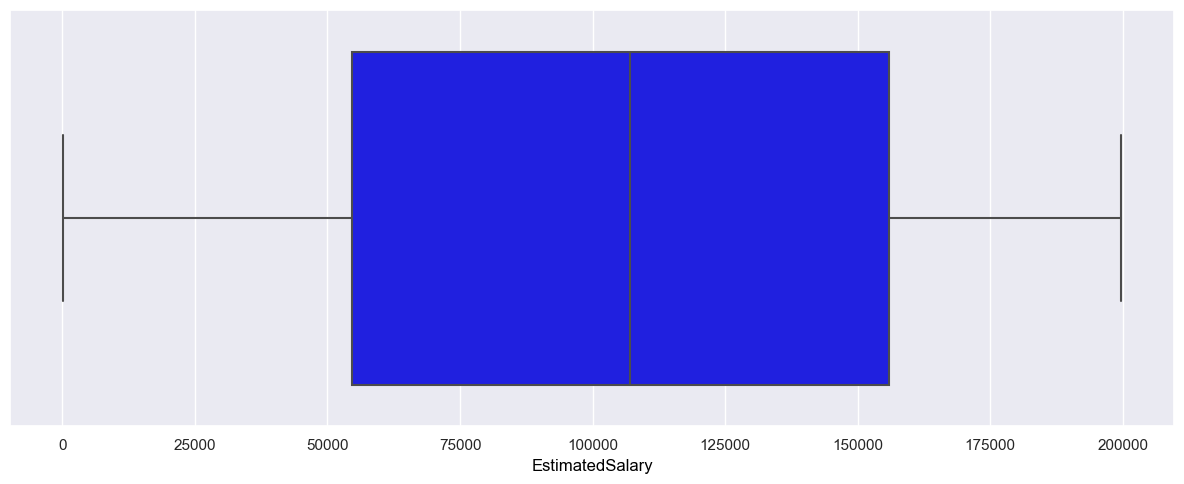

count      mean       std    min       25%       50%  \
EstimatedSalary  5631.0  99511.48  57392.39  96.27  50765.48  99019.65   

                      75%        max  
EstimatedSalary  148596.5  199970.74

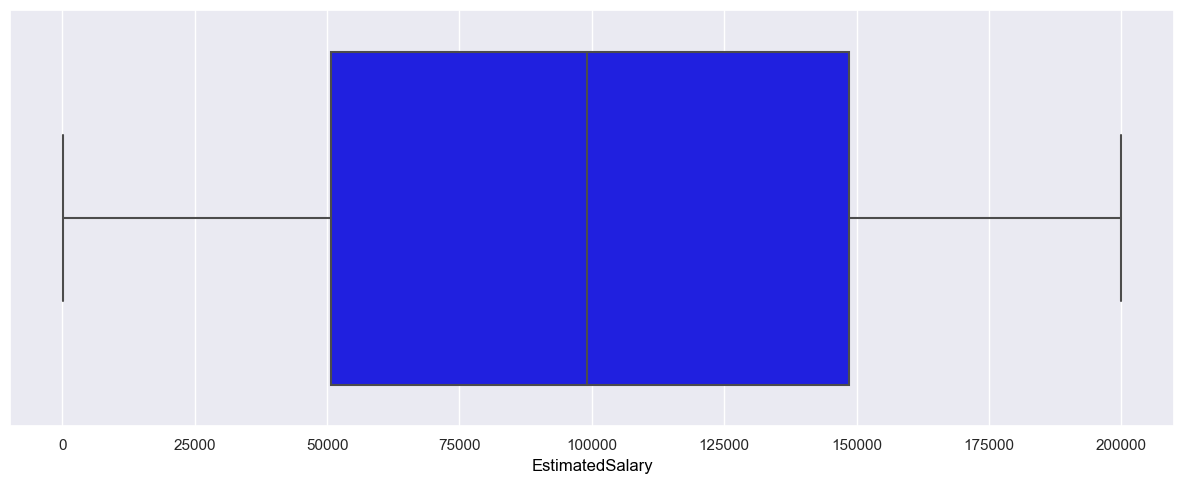

count       mean       std    min       25%        50%  \
EstimatedSalary  2332.0  100286.32  57446.06  90.07  51001.62  100584.27   

                       75%        max  
EstimatedSalary  148737.84  199992.48

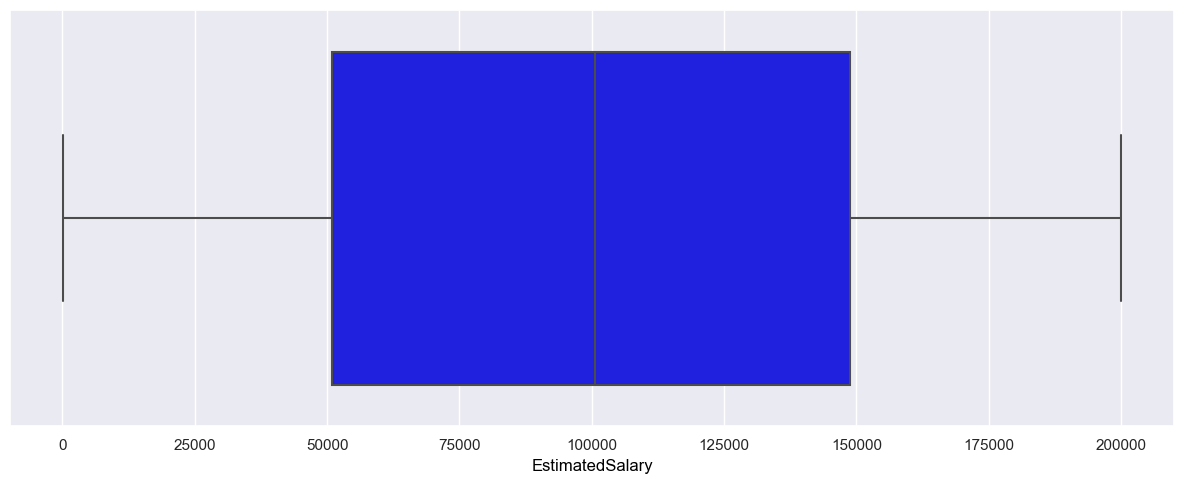

In [80]:
# Exploring the distribution of "EstimatedSalary" in relation to both "Exited" and "HasCrCard" features

multivariate_eda(df, "Exited", "HasCrCard", "EstimatedSalary")

actions["Exited - HasCrCard - EstimatedSalary"] = "Emphasize the benefits of having a credit card, such as rewards programs, cashback, or other perks, in marketing materials. Communicate how credit cards can complement customer's financial goals and lifestyles. Highlight specific advantages or promotions for new credit card holders. Analyze competitor's credit card offerings and strategies to ensure competitiveness in the market. Identify unique selling points for credit cards that differentiate the offerings and resonate with the target audience."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average salary</b> is almost the <b>same</b>, regardless of whether they have a credit card or not.
* Among <b>non-exited customers</b>, those <b>without</b> a <b>credit card</b> have a <b>slightly higher salary (100286.32)</b> compared to those <b>with</b> a <b>credit card (99511.48)</b>.

<i>Emphasize the benefits of having a credit card, such as rewards programs, cashback, or other perks, in marketing materials. Communicate how credit cards can complement customer's financial goals and lifestyles. Highlight specific advantages or promotions for new credit card holders. Analyze competitor's credit card offerings and strategies to ensure competitiveness in the market. Identify unique selling points for credit cards that differentiate the offerings and resonate with the target audience.</i>

count       mean       std    min       25%        50%  \
EstimatedSalary  735.0  100654.02  57903.23  11.58  50543.22  102517.83   

                       75%       max  
EstimatedSalary  150677.92  199808.1

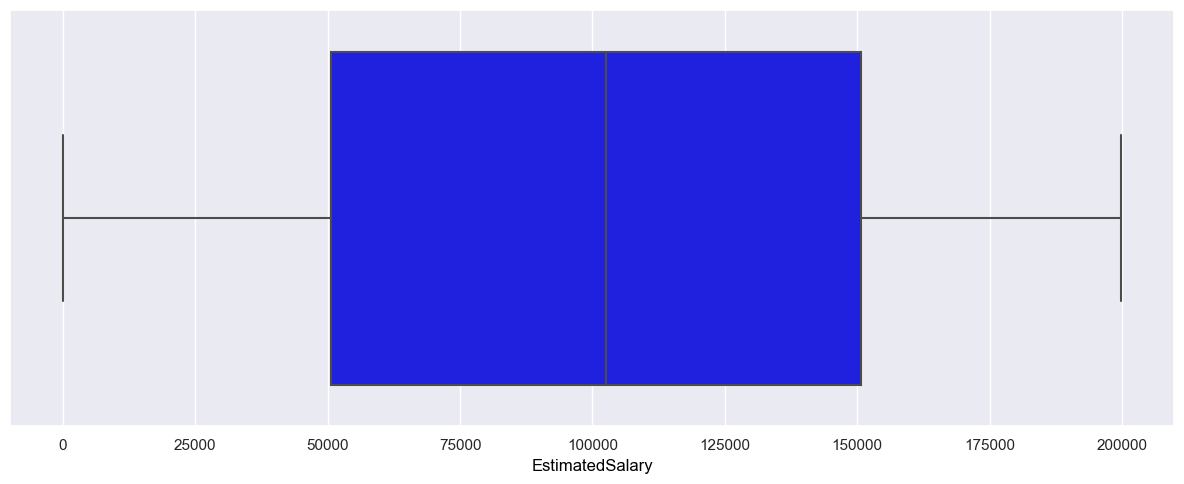

count       mean       std    min      25%        50%  \
EstimatedSalary  1302.0  101923.87  57934.82  91.75  53069.0  102431.88   

                       75%        max  
EstimatedSalary  152519.13  199725.39

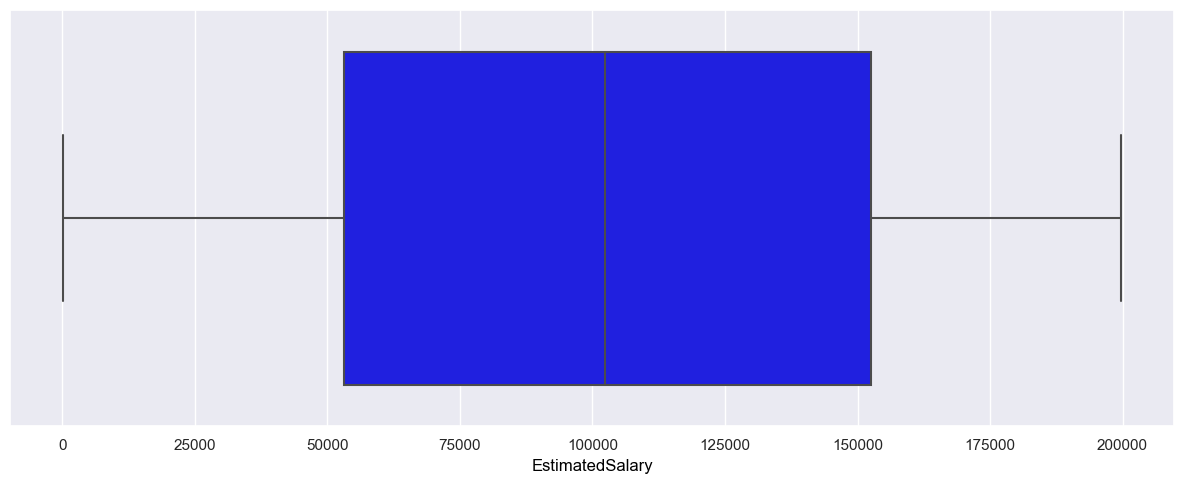

count      mean       std    min       25%       50%  \
EstimatedSalary  4416.0  99253.06  57391.25  90.07  50781.77  98947.34   

                       75%        max  
EstimatedSalary  148182.36  199953.33

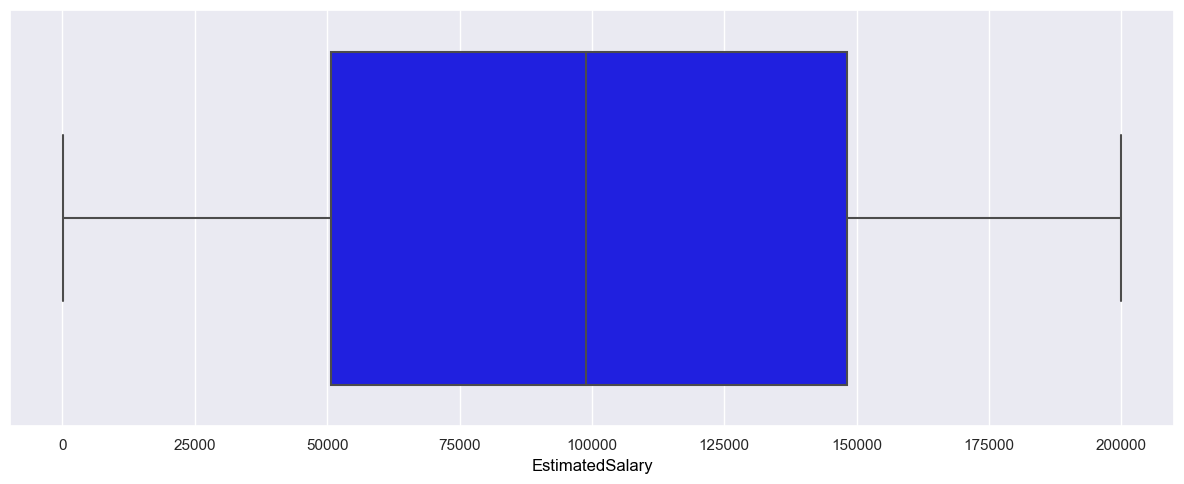

count       mean       std    min       25%        50%  \
EstimatedSalary  3547.0  100342.63  57425.79  96.27  51004.02  100153.43   

                       75%        max  
EstimatedSalary  148900.15  199992.48

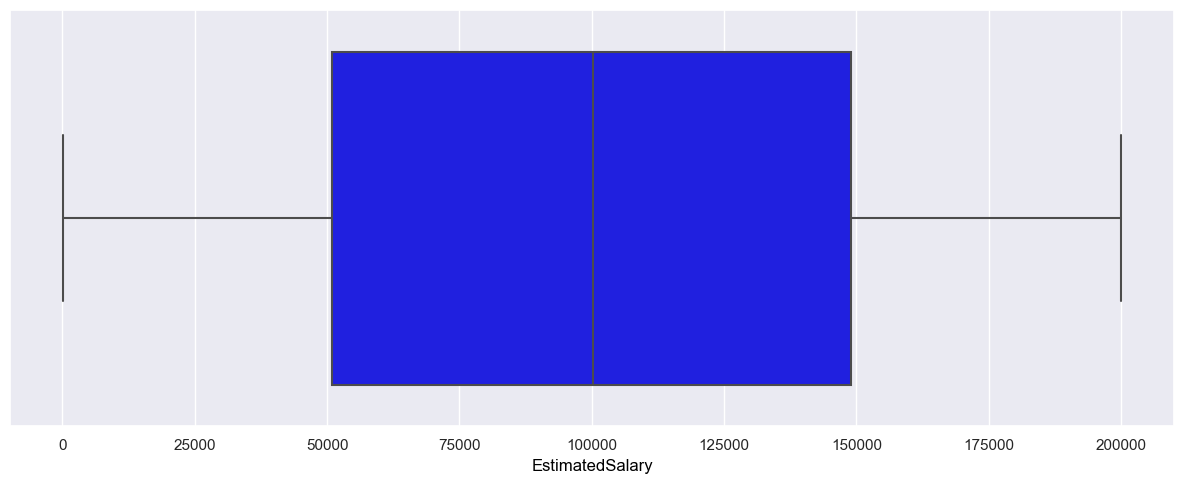

In [81]:
# Exploring the distribution of "EstimatedSalary" in relation to both "Exited" and "IsActiveMember" features

multivariate_eda(df, "Exited", "IsActiveMember", "EstimatedSalary")

actions["Exited - IsActiveMember - EstimatedSalary"] = "To enhance active member engagement, offer exclusive benefits or promotions that encourage continued activity and loyalty. Develop targeted retention campaigns for inactive members, providing incentives to re-engage with the bank's services. Tailor communication and engagement strategies for inactive members, leveraging various channels (email, mobile apps, etc.) to effectively reach and engage them. Implement regular surveys or feedback mechanisms to gauge customer satisfaction and identify areas for improvement or customization based on customer preferences."

<b>Insights</b>

* For <b>exited customers</b>, the <b>average salary</b> of active members is almost <b>similar</b> to that of inactive members.
* Among <b>non-exited customers</b>, the <b>average salary</b> is <b>slightly higher</b> for <b>inactive members (101923.87)</b> compared to <b>active members (99253.06)</b>.

<i>To enhance active member engagement, offer exclusive benefits or promotions that encourage continued activity and loyalty. Develop targeted retention campaigns for inactive members, providing incentives to re-engage with the bank's services. Tailor communication and engagement strategies for inactive members, leveraging various channels (email, mobile apps, etc.) to effectively reach and engage them. Implement regular surveys or feedback mechanisms to gauge customer satisfaction and identify areas for improvement or customization based on customer preferences.</i>

# Feature Engineering & Selection

<a id = cell_6></a>

## Feature Transformation

<a id = cell_6_1></a>

In [82]:
# Creating a function to perform feature engineering on the data

df_2 = df.copy()

def feature_engineering(data):

    # Create a binary feature indicating whether a customer has a non-zero balance or not

    data["Balance_Status"] = data["Balance"].apply(lambda balance : 1 if balance == 0 else 0)
    data["Balance_Status"] = data["Balance_Status"].astype(object)

    # Creating an age group feature to categorize customers into different age groups

    data["Age_Group"] = data["Age"].apply(lambda age: "Young" if (age >= 18) and (age <= 30) else ("Adult" if (age >= 31) and (age <= 55) else "Senior"))

    # Creating credit score rating feature to rank customers based on their credit scores

    credit_ratings = []

    for scores in data["CreditScore"]:
        if (scores >= 300) & (scores <= 579):
            credit_ratings.append("Very Poor")
        elif (scores >= 580) & (scores <= 669):
            credit_ratings.append("Fair")
        elif (scores >= 670) & (scores <= 739):
            credit_ratings.append("Good")
        elif (scores >= 740) & (scores <= 799):
            credit_ratings.append("Very Good")
        elif (scores >= 800) & (scores <= 850):
            credit_ratings.append("Excellent")

    data["Credit_Score_Rating"] = credit_ratings

    # Creating a feature to categorize tenure into groups

    data["Tenure_Group"] = data["Tenure"].apply(lambda tenure : "Short-Term" if (tenure <= 3) else ("Medium-Term" if (tenure > 3) and (tenure <= 7) else "Long-Term"))

feature_engineering(df_2)

df_2.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

  HasCrCard IsActiveMember  EstimatedSalary Exited Balance_Status Age_Group  \
0         1              1        101348.88      1              1     Adult   
1         0              1        112542.58      0              0     Adult   
2         1              0        113931.57      1              0     Adult   
3         0              0         93826.63      0              1     Adult   
4         1              1         79084.10      0              0     Adult   

  Credit_Score_Rating Tenure_Group  
0                Fair   Short-Term  
1                Fair   Short-Term  
2           Very Poor    Long-Term  
3                Good   Short-Term  
4           Excellent   Short-Term

Successfully completed the feature transformation part, derived new features like :

<b>Balance_Status:</b> Indicates whether a customer has a non-zero balance or not.<br>
<b>Age_Group:</b> Categorizes customers into different age groups.<br>
<b>Credit_Rating:</b> Ranks customers based on their credit ratings.<br>
<b>Tenure_Group:</b> Categorizes customers into groups based on their tenure.<br>

## NaN Imputation

<a id = cell_6_2></a>

In [83]:
# Creating a copy of the dataset

df_3 = df_2.copy()

print(f"{start}The total number of null values in the dataset : {df_3.isna().sum().sum()}")

The total number of null values in the dataset : 0


<b>No imputation is required as there are no null values present in this dataset.</b>

## Outlier Treatment

<a id = cell_6_3></a>


There are 15 outliers in the CreditScore feature



count      mean        std    min    25%    50%    75%    max
CreditScore  10000.0  650.5613  96.558702  383.0  584.0  652.0  718.0  850.0

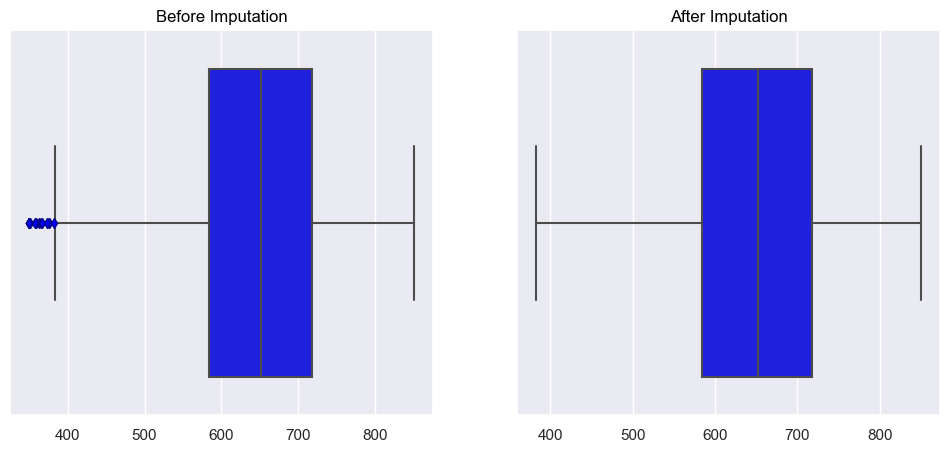


There are 359 outliers in the Age feature



count     mean       std   min   25%   50%   75%   max
Age  10000.0  38.6608  9.746704  18.0  32.0  37.0  44.0  62.0

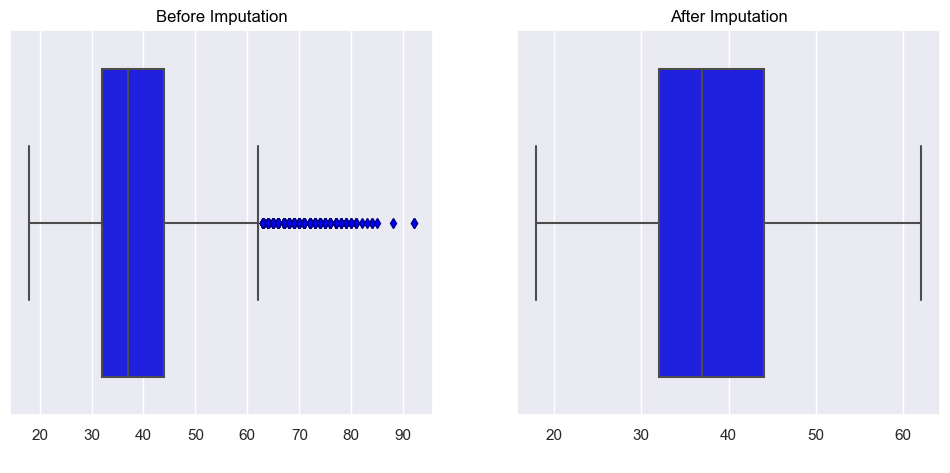


There are 60 outliers in the NumOfProducts feature



count    mean       std  min  25%  50%  75%  max
NumOfProducts  10000.0  1.5272  0.570081  1.0  1.0  1.0  2.0  3.5

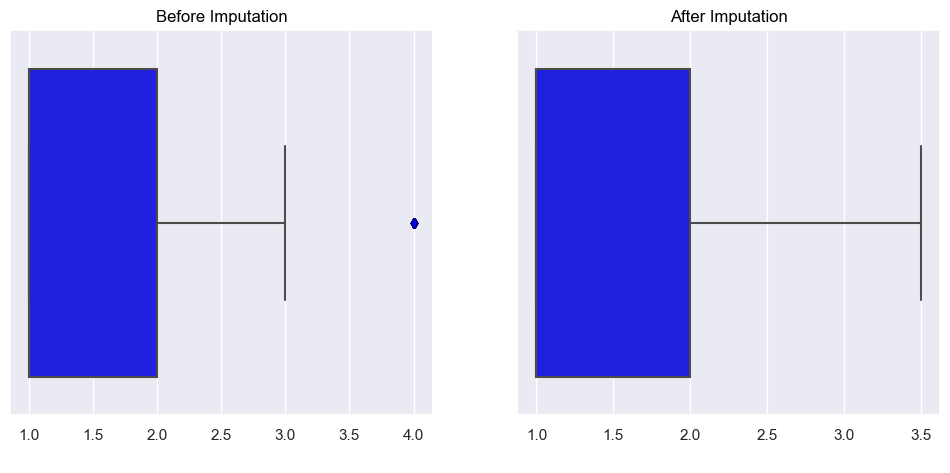

In [84]:
# Creating a function to handle outliers

def outlier_treatment(data):

    # Selecting the quantitative features

    for col in data.select_dtypes(exclude = "object").columns:

        # Checking for outliers in the feature

        Q1, Q3 = data[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers = len(data[col][ (data[col] < lower_bound) | (data[col] > upper_bound) ])

        if outliers != 0:
            display(HTML(f"<div style = 'text-align : center; font-size : 18px; font-weight : bold;'>{col}</div>"))
            print(f"\n{start}There are {outliers} outliers in the {col} feature{end}\n")

            # Plotting the graphs to check the distribution of the features before and after imputing outliers

            fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
            sns.boxplot(x = data[col], color = "blue", ax = ax[0], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            ax[0].set_title("Before Imputation", color = "black")

            # Imputing outliers by assigning lower and upper bound values

            data[col] = np.where(data[col] < lower_bound, np.round(lower_bound, 2), np.where(data[col] > upper_bound, np.round(upper_bound, 2), data[col]))

            sns.boxplot(x = data[col], color = "blue", ax = ax[1], flierprops = {"markerfacecolor" : "blue", "markeredgecolor" : "darkblue"})
            ax[1].set_title("After Imputation", color = "black")

            ax[0].set_xlabel(" ")
            ax[1].set_xlabel(" ")
            display(data[[col]].describe().T)
            plt.show()

        else:
            pass

    return data

df_3 = outlier_treatment(df_3)

<b>Successfully capped outliers using IQR (Inter Quartile Range method).</b>

## Correlation Analysis

<a id = cell_6_4></a>

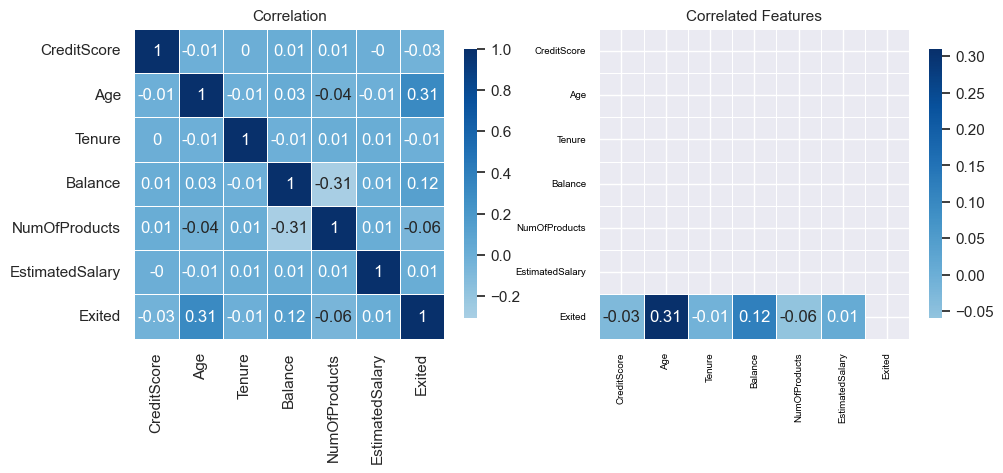

In [85]:
# Reordering the dataframe

cols = [col for col in df_3.columns if col != "Exited"]
cols.append("Exited")
df_3 = df_3[cols]

# df_2.head(3)

# Conducting correlation analysis on preprocessed data

correlation(df_3)

<b>No correlation exists among the features in the preprocessed data.</b>

## Chi-Square Test

<a id = cell_6_5></a>

In [86]:
# Conducting a chi-square test to identify significant features

def chi_square_test(data, target):

    # Selecting the categorical features and the target feature to assess the statistical significance of the features in relation to the target

    X = data.select_dtypes("O").drop(columns = [target])
    y = data[target]

    # Encoding these features using the Label Encoder technique

    for col in X.columns:
        X[col] = LabelEncoder().fit_transform(X[col])

    # Checking the significance of the features by calculating their p-values and storing the results in a dataframe

    p_values = {}
    for col in X.columns:
        ct = pd.crosstab(X[col], y)
        p_val = chi2_contingency(ct)[1]
        p_values[col] = np.round(p_val, 3)

    feature_df = pd.DataFrame({
        "P-value" : p_values.values()
    }, index = list(p_values.keys())).sort_values("P-value", ascending = False)

    print(f"{start}BEFORE ELIMINATING NON-SIGNIFICANT FEATURES (p-value > 0.05){end}")
    display(feature_df)

#     Checking and dropping the non-significant features with p-values greater than 0.05

    feature_df_2 = feature_df[feature_df["P-value"] > 0.05]
    print(f"\n{start}THERE ARE {len(feature_df_2)} NON-SIGNIFICANT FEATURES{end}")
    display(feature_df_2)
    data.drop(columns = list(feature_df_2.index), inplace = True)

chi_square_test(df_3, "Exited")

df_3.head()

BEFORE ELIMINATING NON-SIGNIFICANT FEATURES (p-value > 0.05)


P-value
HasCrCard              0.492
Tenure_Group           0.274
Credit_Score_Rating    0.063
Geography              0.000
Gender                 0.000
IsActiveMember         0.000
Balance_Status         0.000
Age_Group              0.000


THERE ARE 3 NON-SIGNIFICANT FEATURES


P-value
HasCrCard              0.492
Tenure_Group           0.274
Credit_Score_Rating    0.063

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0       2       0.00            1.0   
1        608.0     Spain  Female  41.0       1   83807.86            1.0   
2        502.0    France  Female  42.0       8  159660.80            3.0   
3        699.0    France  Female  39.0       1       0.00            2.0   
4        850.0     Spain  Female  43.0       2  125510.82            1.0   

  IsActiveMember  EstimatedSalary Balance_Status Age_Group Exited  
0              1        101348.88              1     Adult      1  
1              1        112542.58              0     Adult      0  
2              0        113931.57              0     Adult      1  
3              0         93826.63              1     Adult      0  
4              1         79084.10              0     Adult      0

<b>Insights</b>

* There are <b>three features (HasCrCard, Tenure_Group, Credit_Score_Rating)</b> with a <b>p-value > 0.05</b>, indicating <b>statistically non-significant features</b> with the target feature (Exited). This suggests that there is not enough evidence to <b>reject</b> the <b>null hypothesis (Ho).</b>
* There is not enough evidence to conclude that the presence of these features significantly affects the target feature :
    * HasCrCard : The presence or absence of a credit card.
    * Tenure_Group : Grouping tenure into specific categories.
    * Credit_Score_Rating : Rating customers based on their scores.
* Other features with a <b>p-value < 0.05</b> are <b>statistically significant</b>, indicating that there is evidence that they are <b>associated</b> with the <b>target feature</b>.

## Multicollinearity

<a id = cell_6_6></a>

In [87]:
# Converting the feature "NumOfProducts" into integer type

df_3["NumOfProducts"] = df_3["NumOfProducts"].astype(int)

# Creating a function to check multicollineaity

def multicollinearity(data, target):

    # Seperating the dependent and independent features

    X = data.drop(columns = target)
    y = data[target]

    # Encoding the categorical features using the Label Encoding technique

    for col in X.select_dtypes("O").columns:
        X[col] = LabelEncoder().fit_transform(X[col])

    # Standardizing the features using the Standard Scaler technique

    X_sc = StandardScaler().fit_transform(X)
    X_sc = pd.DataFrame(X_sc, columns = X.columns)

    # Checking multicollinearity among features by calculating the Variance Inflation Factor (VIF)

    drop_flag = True
    print(f"{start}Features (VIF > 5)\n{end}")

    while drop_flag:

        vif_df = pd.DataFrame({
            "VIF" : [np.round(variance_inflation_factor(X_sc, i), 3) for i in range(X_sc.shape[1])]
        }, index = X_sc.columns).sort_values("VIF", ascending = False)
        max_vif_feature = vif_df["VIF"].idxmax()
        vif = float(vif_df.loc[max_vif_feature])

        # Checking if the feature has a VIF greater than 5 and, if so, dropping it

        if vif > 5:
            print(f"{max_vif_feature} : {vif}")
            X_sc.drop(columns = max_vif_feature, inplace = True)
            data.drop(columns = max_vif_feature, inplace = True)
        else:
            drop_flag = False
            print(f"\nThere is no multicollinearity")

multicollinearity(df_3, "Exited")

df_3.head()

Features (VIF > 5)

Balance_Status : 6.883

There is no multicollinearity


CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0       2       0.00              1   
1        608.0     Spain  Female  41.0       1   83807.86              1   
2        502.0    France  Female  42.0       8  159660.80              3   
3        699.0    France  Female  39.0       1       0.00              2   
4        850.0     Spain  Female  43.0       2  125510.82              1   

  IsActiveMember  EstimatedSalary Age_Group Exited  
0              1        101348.88     Adult      1  
1              1        112542.58     Adult      0  
2              0        113931.57     Adult      1  
3              0         93826.63     Adult      0  
4              1         79084.10     Adult      0

<b>Insights</b>

* A <b>Variance Inflation Factor (VIF</b>) of <b>6.87</b>, which is <b>above 5</b> for <b>Balance_Status</b>, indicates a <b>moderately high level</b> of <b>multicollinearity</b> between Balance_Status and other features.

## Feature Encoding

<a id = cell_6_7></a>

### One-Hot Encoding

<a id = cell_6_7_1></a>

In [88]:
# Creating a copy of the data

df_4 = df_3.copy()

# Creating a function to encode the categorical features

def feature_encoding(data, target):

    # Storing the categorical features in a list

    cat_features = [feature for feature in data.drop(columns = target).select_dtypes("O").columns]

    for col in cat_features:

        # Performing One Hot Encoding on the features

        print(f"{start}{col}{end}")
        sub_categories = [f"{col}_{sub_cat}" for sub_cat in data[col].value_counts().index[:-1]]
        drop_feature = [data[col].value_counts().index[-1]]

        ohe = OneHotEncoder(sparse = False, dtype = int, drop = drop_feature)
        en_df = ohe.fit_transform(data[[col]])
        en_df = pd.DataFrame(en_df, columns = sub_categories)
        display(en_df.head())
        print()

        # Concatenating the encoded features to the dataframe

        data = pd.concat([data, en_df], axis = 1)

        # Dropping the original feature from the dataframe

        data.drop(columns = col, inplace = True)

    return data

df_3 = feature_encoding(df_3, "Exited")

df_3.head()

Geography


Geography_France  Geography_Germany
0                 1                  0
1                 0                  0
2                 1                  0
3                 1                  0
4                 0                  0


Gender


Gender_Male
0            0
1            0
2            0
3            0
4            0


IsActiveMember


IsActiveMember_1
0                 1
1                 1
2                 0
3                 0
4                 1


Age_Group


Age_Group_Adult  Age_Group_Young
0                1                0
1                1                0
2                1                0
3                1                0
4                1                0

CreditScore   Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0        619.0  42.0       2       0.00              1        101348.88   
1        608.0  41.0       1   83807.86              1        112542.58   
2        502.0  42.0       8  159660.80              3        113931.57   
3        699.0  39.0       1       0.00              2         93826.63   
4        850.0  43.0       2  125510.82              1         79084.10   

  Exited  Geography_France  Geography_Germany  Gender_Male  IsActiveMember_1  \
0      1                 1                  0            0                 1   
1      0                 0                  0            0                 1   
2      1                 1                  0            0                 0   
3      0                 1                  0            0                 0   
4      0                 0                  0            0                 1   

   Age_Group_Adult  Age_Group_Young  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0

<b>Encoded features using One Hot Encoding</b>.

### Label Encoding

<a id = cell_6_7_2></a>

In [89]:
# Creating a function to encode categorical features using Label Encoder is preferred for training Decision Tree model

def feature_encoding_II(data, target):

    # Storing the categorical features in a list

    cat_features = [feature for feature in data.drop(columns = target).select_dtypes("O").columns]

    # Encoding these features using Label Encoder

    for col in cat_features:

        data[col] = LabelEncoder().fit_transform(data[col])

    return data

df_4 = feature_encoding_II(df_4, "Exited")

df_4.head()

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0          0       0  42.0       2       0.00              1   
1        608.0          2       0  41.0       1   83807.86              1   
2        502.0          0       0  42.0       8  159660.80              3   
3        699.0          0       0  39.0       1       0.00              2   
4        850.0          2       0  43.0       2  125510.82              1   

   IsActiveMember  EstimatedSalary  Age_Group Exited  
0               1        101348.88          0      1  
1               1        112542.58          0      0  
2               0        113931.57          0      1  
3               0         93826.63          0      0  
4               1         79084.10          0      0

<b>Encoded features using Label Encoding</b>.

## Imbalance Dataset
<a id = cell_6_8></a>

In [90]:
# Creating a function to check whether the data is imbalanced and, if so, applying oversampling technique

def imbalanced_data(data, target):

    # Seperating the data into dependent and independent features

    X = data.drop(columns = [target])
    y = data[target]

    # Checking whether the data is balanced or not

    display(pd.DataFrame(y.value_counts()))

    majority_class, minority_class = y.value_counts().index
    majority_obs, minority_obs = y.value_counts().values

    # Checking if the number of observations in the minority class multiplied by 2 is greater than or equal to the number of observations in the majority class; if true, the dataset is considered balanced otherwise, it is considered imbalanced class

    if (minority_obs * 2) > majority_obs:
        print(f"{start}\nData is balanced{end}\n\n")
    else:
        print(f"{start}\nData is imbalanced{end}\n\n")

        # Splitting the data into training and testing sets

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
        y_train = y_train.astype("category")
        print(f"Before Oversampling, the training set has {len(y_train)} samples, and the distribution of data :")
        display(pd.DataFrame(pd.DataFrame(y_train)["Exited"].value_counts()))

        # Applying oversampling technique, i.e SMOTE, to the training set

        smote = SMOTE(random_state = 11)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print(f"After Oversampling, the training set has {len(y_train)} samples, and the distribution of the data :")
        display(pd.DataFrame(pd.DataFrame(y_train)["Exited"].value_counts()))

        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = imbalanced_data(df_3, "Exited")

Exited
0    7963
1    2037


Data is imbalanced


Before Oversampling, the training set has 8000 samples, and the distribution of data :


Exited
0    6361
1    1639

After Oversampling, the training set has 12722 samples, and the distribution of the data :


Exited
0    6361
1    6361

<b>The imbalanced dataset has been effectively addressed by employing the oversampling technique, specifically SMOTE (Synthetic Minority Over-sampling Technique). This approach involves oversampling the minority class, ensuring a balanced dataset and preventing bias during training on the majority class.</b>

In [91]:
# Applying the Oversampling technique

X_train_1, X_test_1, y_train_1, y_test_1 = imbalanced_data(df_4, "Exited")

Exited
0    7963
1    2037


Data is imbalanced


Before Oversampling, the training set has 8000 samples, and the distribution of data :


Exited
0    6361
1    1639

After Oversampling, the training set has 12722 samples, and the distribution of the data :


Exited
0    6361
1    6361

## Feature Scaling
<a id = cell_6_9></a>

In [92]:
# Separating the data into independent and dependent feature

def feature_scaling(data, target, X_train, X_test):

    # Seperating the data into dependent and independent features

    X = data.drop(columns = [target])
    y = data[target]

    # Splitting the data into training and testing sets

    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 11)

    # Applying the standardization technique to scale the data

    sc = StandardScaler()
    X_train_2 = sc.fit_transform(X_train_2)
    
    # Exporting the scaler object 
    
    joblib.dump(sc, "scaler.pkl")

    X_train_sc = sc.transform(X_train)
    X_test_sc = sc.transform(X_test)

    return X_train, X_test, X_train_sc, X_test_sc

X_train, X_test, X_train_sc, X_test_sc = feature_scaling(df_3, "Exited", X_train, X_test)

print(f"{start}Non-scaled data{end} : {X_train.shape}")
display(pd.DataFrame(X_train, columns = X_train.columns).head(2))

print(f"\n{start}Scaled data{end} : {X_train_sc.shape}")
display(pd.DataFrame(X_train_sc, columns = X_train.columns).head())

Non-scaled data : (12722, 12)


CreditScore   Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0        628.0  39.0       8  107553.33              1        117523.41   
1        736.0  28.0       2       0.00              2        117431.10   

   Geography_France  Geography_Germany  Gender_Male  IsActiveMember_1  \
0                 0                  0            0                 0   
1                 0                  0            0                 1   

   Age_Group_Adult  Age_Group_Young  
0                1                0  
1                0                1


Scaled data : (12722, 12)


CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -0.233364  0.041125  1.034053  0.499013      -0.939194         0.308192   
1     0.877433 -1.093718 -1.048632 -1.226585       0.849321         0.306578   
2    -1.087031  1.485470 -0.007289  0.609207      -0.939194         1.411165   
3     1.206557  0.969633 -0.701518  0.744139      -0.939194        -1.317890   
4    -1.662999 -0.062042 -0.007289  0.655228      -0.939194        -0.256481   

   Geography_France  Geography_Germany  Gender_Male  IsActiveMember_1  \
0         -1.005013          -0.577543    -1.097204         -1.030722   
1         -1.005013          -0.577543    -1.097204          0.970194   
2         -1.005013           1.731474     0.911407         -1.030722   
3         -1.005013           1.731474     0.911407          0.970194   
4          0.995012          -0.577543    -1.097204         -1.030722   

   Age_Group_Adult  Age_Group_Young  
0         0.616268        -0.494917  
1        -1.622671         2.020543  
2         0.616268        -0.494917  
3         0.616268        -0.494917  
4         0.616268        -0.494917

<b>Successfully applied standardization to the training data and then transformed it. The same scaler object was used to transform the testing data, which was fitted on the training data.</b>

# Model Building & Evaluation
<a id = cell_7></a>

In [93]:
# Creating a function to build a machine learning model and evaluate its perform

def classification_model(MODEL, X_train, X_test, y_train, y_test):

    model = MODEL
    display(HTML(f"<div style = 'text-align : center; font-size = 18px; font-weight : bold'>MODEL : {model}</div>"))

    # Training the model

    model.fit(X_train, y_train)

    # Converting y_test into categorical type

    y_test = y_test.astype("category")

    # Creating an empty dictionary to store the evaluation scores

    metrics_test = {}
    metrics_train = {}

    # Performing predictions on the training and testing data

    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Evaluating the model based on performance metrics

    metrics_test["Accuracy"] = np.round(accuracy_score(y_test, y_test_pred), 2)
    metrics_train["Accuracy"] = np.round(accuracy_score(y_train, y_train_pred), 2)
    metrics_test["Precision"] = np.round(precision_score(y_test, y_test_pred), 2)
    metrics_train["Precision"] = np.round(precision_score(y_train, y_train_pred), 2)
    metrics_test["Recall"] = np.round(recall_score(y_test, y_test_pred), 2)
    metrics_train["Recall"] = np.round(recall_score(y_train, y_train_pred), 2)
    metrics_test["F1-Score"] = np.round(f1_score(y_test, y_test_pred), 2)
    metrics_train["F1-Score"] = np.round(f1_score(y_train, y_train_pred), 2)
    metrics_test["ROC-AUC Score"] = np.round(roc_auc_score(y_test, y_test_pred), 2)
    metrics_train["ROC-AUC Score"] = np.round(roc_auc_score(y_train, y_train_pred), 2)

    metrics_test_df = pd.DataFrame(data = metrics_test.values(), index = metrics_test.keys(), columns = ["Scores"])
    metrics_train_df = pd.DataFrame(data = metrics_train.values(), index = metrics_train.keys(), columns = ["Scores"])

    print(f"\n{start}METRICS (TEST){end}")
    display(metrics_test_df)

    print(f"\n{start}METRICS (TRAIN){end}")
    display(metrics_train_df)
    print()

    # Calculating the cross validation score

    print(f"{start}CROSS VALIDATION SCORES{end}")
    metrics_cv_scores = {}
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

    for score in ["accuracy", "precision", "recall", "f1"]:
        scores = cross_val_score(model, pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)]), pd.concat([y_train, y_test]), cv = cv, scoring = score)
        metrics_cv_scores[score.capitalize()] = np.round(scores.mean(), 2)

    metrics_cv_df = pd.DataFrame(data = metrics_cv_scores.values(), index = metrics_cv_scores.keys(), columns = ["Scores"])
    display(pd.DataFrame(metrics_cv_df))

    # Evaluating the model's performance through classification reports

    classification_report_test = classification_report(y_test, y_test_pred)
    classification_report_train = classification_report(y_train, y_train_pred)

    print(f"\n\n{start}CLASSIFICATION REPORT (TEST){end}\n\n{classification_report_test}")
    print(f"\n{start}CLASSIFICATION REPORT (TRAIN){end}\n\n{classification_report_train}")

    # Evaluating the model's performance through confusion matrix

    print(f"\n{start}CONFUSION MATRIX{end}\n")

    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    fig, ax = plt.subplots(1, 2, figsize = (11, 7))

    sns.heatmap(confusion_matrix_test, annot = True, fmt = ".1f", cmap = "Blues",
                xticklabels = [0, 1], yticklabels = [0, 1], square = True, ax = ax[0], cbar_kws = {"shrink" : 0.5})
    ax[0].set_title("Confusion Matrix (Test)", size = 11, color = "black")
    sns.heatmap(confusion_matrix_train, annot = True, fmt = ".1f", cmap = "Blues",
               xticklabels = [0, 1], yticklabels = [0, 1], square = True, ax = ax[1], cbar_kws = {"shrink" : 0.5})
    ax[1].set_title("Confusion Matrix (Train)", size = 11, color = "black")
    plt.tight_layout()
    plt.show()

    # Evaluating the model's performance using ROC-AUC curve

    print(f"{start}ROC-AUC CURVE{end}\n")
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred)
    roc_auc_score_test = metrics_test["ROC-AUC Score"]

    fig, ax = plt.subplots(1, 2, figsize = (11, 7))

    ax[0].plot(fpr_test, tpr_test, label = f"ROC Curve (area = {roc_auc_score_test})")
    ax[0].plot([0, 1], [0, 1], "k--")
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.0])
    ax[0].set_xlabel("FPR", color = "black")
    ax[0].set_ylabel("TPR", color = "black")
    ax[0].set_title("ROC-AUC Curve (Test)", color = "black")
    ax[0].legend(loc = "lower right")

    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred)
    roc_auc_score_train = metrics_train["ROC-AUC Score"]

    ax[1].plot(fpr_train, tpr_train, label = f"ROC Curve (area = {roc_auc_score_train})")
    ax[1].plot([0, 1], [0, 1], "k--")
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel("FPR", color = "black")
    ax[1].set_ylabel("TPR", color = "black")
    ax[1].set_title("ROC-AUC Curve (Train)", color = "black")
    ax[1].legend(loc = "lower right")

    plt.tight_layout()
    plt.show()

    return model, list(metrics_test.values())

# Creating a dictionary to store the metrics scores

metrics_scores = {}

## Logistic Regression
<a id = cell_7_1></a>


METRICS (TEST)


Scores
Accuracy         0.67
Precision        0.33
Recall           0.64
F1-Score         0.43
ROC-AUC Score    0.66


METRICS (TRAIN)


Scores
Accuracy         0.69
Precision        0.68
Recall           0.71
F1-Score         0.69
ROC-AUC Score    0.69


CROSS VALIDATION SCORES


Scores
Accuracy     0.64
Precision    0.62
Recall       0.58
F1           0.60



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1602
           1       0.33      0.64      0.43       398

    accuracy                           0.67      2000
   macro avg       0.61      0.66      0.60      2000
weighted avg       0.77      0.67      0.70      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      6361
           1       0.68      0.71      0.69      6361

    accuracy                           0.69     12722
   macro avg       0.69      0.69      0.69     12722
weighted avg       0.69      0.69      0.69     12722


CONFUSION MATRIX



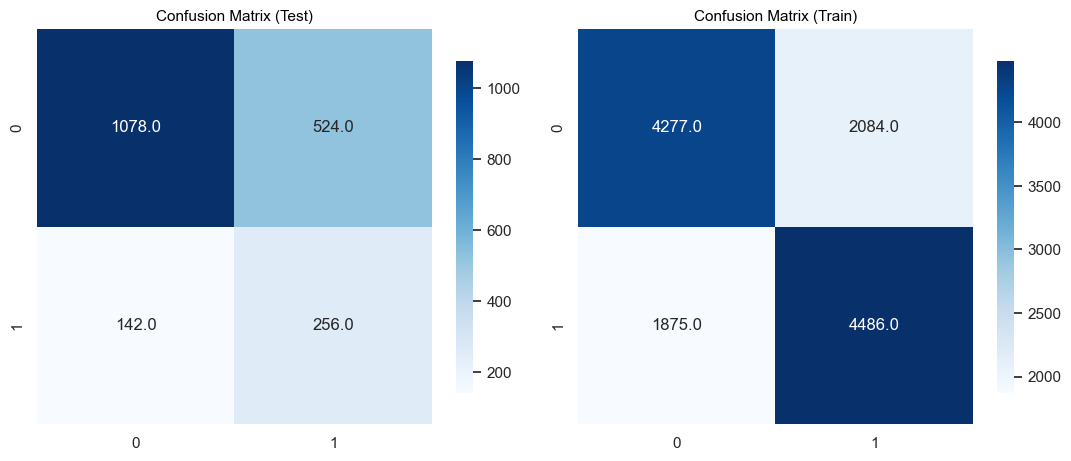

ROC-AUC CURVE



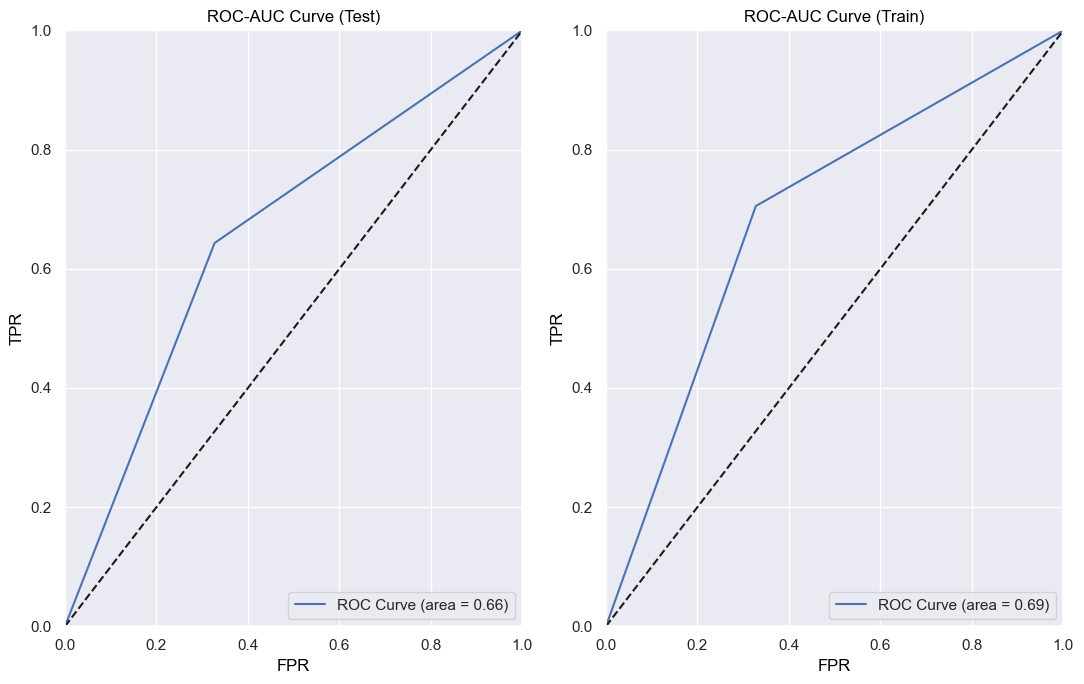

In [94]:
# Building and evaluating the Logistic Regression model on the unscaled data

logistic_regression_model_1, metrics_scores["Logistic_Regression_Base_Model"]  = classification_model(LogisticRegression(), X_train, X_test, y_train, y_test)

<b>Insights</b>

* The <b>Logistic Regression base model</b> achieves an <b>accuracy</b> of <b>67%</b> on the <b>test data</b>, indicating that it <b>correctly classified 67</b>% of the customers churn cases, while the <b>accuracy</b> achieved on the <b>training set</b> is <b>69%</b>. This <b>low variance</b> and <b>high bias</b>, implies that the model is <b>underfitting</b>.
* The model's <b>precision</b> on the <b>test data</b> is <b>33%</b>, indicating that out of all the customers predicted as churning, only <b>33%</b> of them <b>actually churned</b>. Additionally, <b>68%</b> of the <b>predictions</b> made by the model are <b>False Positives (FP</b>). However, the model achieved <b>68% precision</b>, performing better on the training data in terms of correctly classifying customers who will churn. A <b>low precision</b> for the <b>churned class</b> might lead to <b>unnecessary retention efforts</b> for customers who are <b>predicted</b> to <b>churn</b> but <b>may not actually do so</b>, which can be costly for the business.
* The model's <b>recall</b> on the <b>test data</b> is <b>64%</b>, suggesting that it <b>correctly classifies 64%</b> of the <b>actual churn cases (True Positives)</b> and misses <b>36%</b> of customers who <b>eventually churned (False Negatives)</b>. Additionally, the model captures <b>71%</b> of the <b>actual churn cases</b> in the <b>training set</b>. The <b>similarity</b> between <b>training</b> and <b>testing recalls</b> in identifying <b>customers truly churning</b> indicates that the model generalizes well to unseen data. This capability is crucial for implementing targeted retention strategies and minimizing customer loss.
* A <b>F1-Score</b> of <b>43%</b>, suggesting a <b>moderate balance</b> between <b>precision</b> and <b>recall</b> on the <b>test data</b>. However, the model achieved a F1-Score of <b>69%</b>, indicating a <b>better balance</b>. This <b>significant drop</b> in F1-Score from training to test sets could be an indication of <b>overfitting</b> or a <b>lack</b> of <b>generalization</b> to the <b>test set</b>.
* The <b>test ROC-AUC Score (66%)</b> and <b>train ROC-AUC Score (69%)</b> indicate a <b>moderate ability</b> of the model to <b>distinguish between churned</b> and<b> non-churned customers</b>. The <b>closer</b> the <b>ROC-AUC scores</b> are to each other, the<b> better</b> the <b>model's generalization</b> and <b>discriminatory power</b> to unseen data.
* <b>Cross Validation Scores (Test Data) :</b>
    
    * Accuracy : 64%
    * Precision : 62%
    * Recall : 58%
    * F1-Score : 60%
* <b>Confusion Matrix (Test Data) :</b>

    * True Positives (TP) : 256 churning customers were correctly identified.
    * True Negatives (TN) : 1078 non-churning customers were correctly identified.
    * False Positives (FP) : 524 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 142 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Logistic Regression (Tuning)
<a id = cell_7_2></a>


METRICS (TEST)


Scores
Accuracy         0.67
Precision        0.33
Recall           0.64
F1-Score         0.43
ROC-AUC Score    0.66


METRICS (TRAIN)


Scores
Accuracy         0.69
Precision        0.68
Recall           0.71
F1-Score         0.69
ROC-AUC Score    0.69


CROSS VALIDATION SCORES


Scores
Accuracy     0.64
Precision    0.62
Recall       0.58
F1           0.60



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1602
           1       0.33      0.64      0.43       398

    accuracy                           0.67      2000
   macro avg       0.61      0.66      0.60      2000
weighted avg       0.77      0.67      0.70      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      6361
           1       0.68      0.71      0.69      6361

    accuracy                           0.69     12722
   macro avg       0.69      0.69      0.69     12722
weighted avg       0.69      0.69      0.69     12722


CONFUSION MATRIX



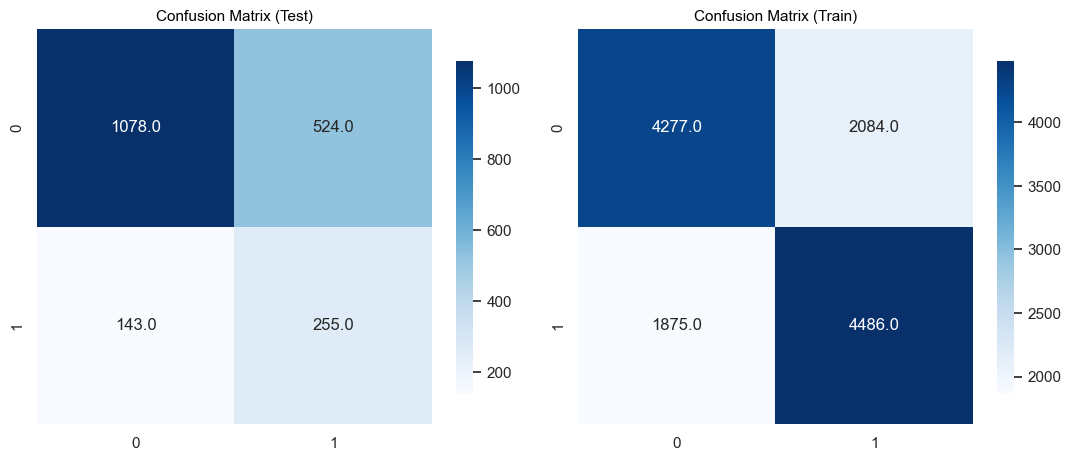

ROC-AUC CURVE



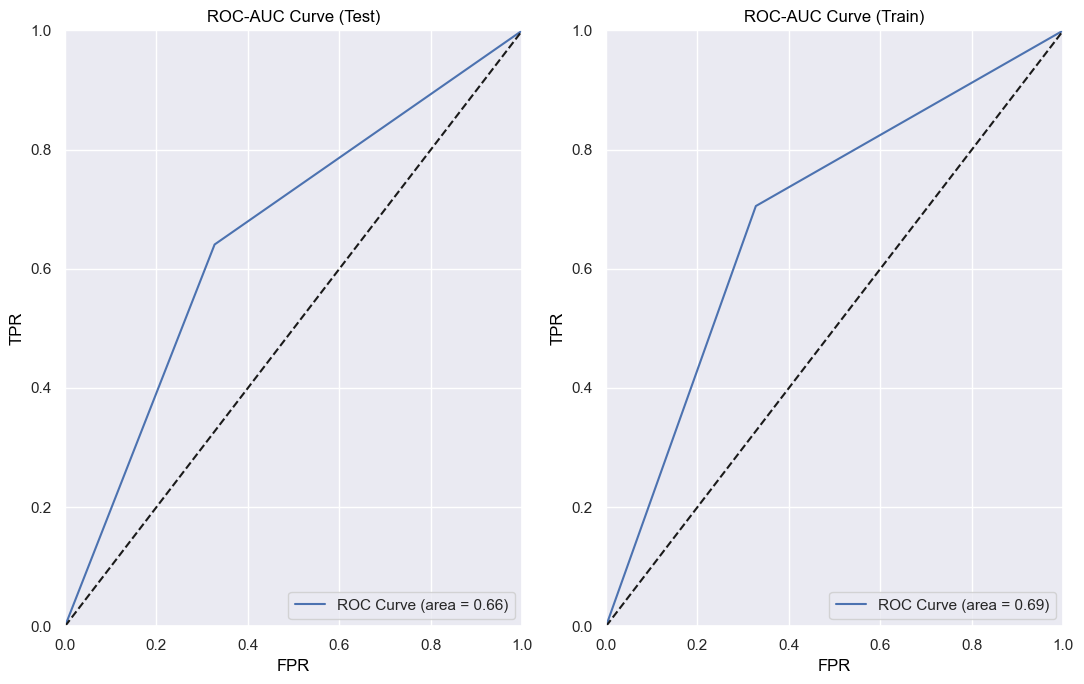

In [95]:
# Tuning and evaluating the logistic regression model on the unscaled

# param_grid = {
#     "penalty" : ["l1", "l2", "elasticnet"],
#     "C" : [1, 10, 20, 30]
# }

# grid_model = GridSearchCV(LogisticRegression(), param_grid, scoring = "accuracy").fit(X_train, y_train)

# print(grid_model.best_params_)
# {'C': 10, 'penalty': 'l2'}

logistic_regression_model_2, metrics_scores["Logistic_Regression_Tuned_Model"] = classification_model(LogisticRegression(C = 10, penalty = "l2"), X_train, X_test, y_train, y_test)

<b>Insights</b>

* There is not much difference in the tuned model's metrics compared to the base model after changing C from 1 to 10.

## K-Nearest Neighbor Classifier (KNN)

<a id = "cell_7_3"></a>

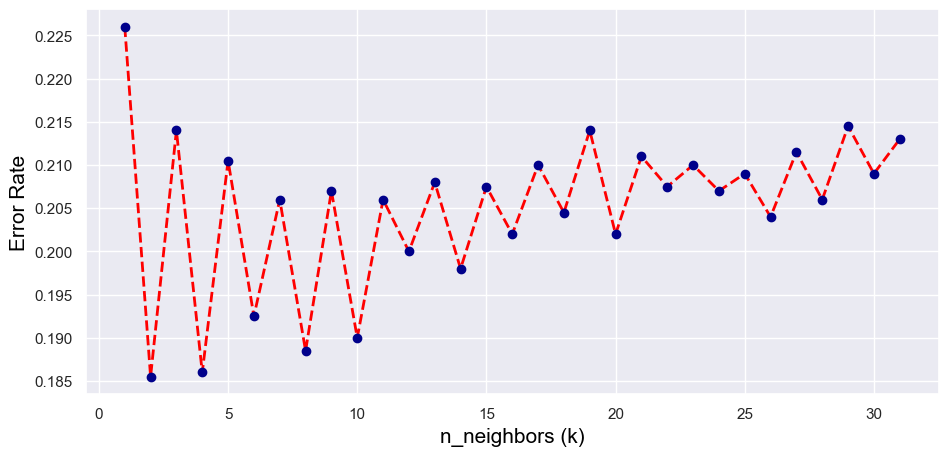

Error Rate
7       0.2060
11      0.2060
9       0.2070
15      0.2075
13      0.2080

In [96]:
# Determining the value of k, i.e the number of nearest neighbors to consider for classification

error_rate = {}

for i in range(1, 32):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train_sc, y_train)
    y_test_pred = knn_model.predict(X_test_sc)
    error_rate[i] = np.mean(y_test != y_test_pred)

# Plotting the elbow curve

plt.figure(figsize = (11, 5))
plt.plot(list(error_rate.keys()), list(error_rate.values()), color = "red", ls = "dashed", lw = 2, marker = "o", markerfacecolor = "darkblue", markeredgecolor = "darkblue")
plt.xlabel("n_neighbors (k)", size = 15, color = "black")
plt.ylabel("Error Rate", size = 15, color = "black")
plt.show()

# Filtering k values with least error

k_df = pd.DataFrame({"Error Rate" : pd.Series(error_rate).iloc[::2].sort_values().head(5)})
n_neighbors = list(k_df.index)
display(k_df)

<b>Tunning the KNN model with 7, 11, 9, 15 and 13 neighbors to classification.</b>

## K-Nearest Neighbor Classifier (Tuning)

<a id = "cell_7_4"></a>


METRICS (TEST)


Scores
Accuracy         0.79
Precision        0.48
Recall           0.58
F1-Score         0.53
ROC-AUC Score    0.71


METRICS (TRAIN)


Scores
Accuracy         0.86
Precision        0.87
Recall           0.85
F1-Score         0.86
ROC-AUC Score    0.86


CROSS VALIDATION SCORES


Scores
Accuracy     0.84
Precision    0.84
Recall       0.80
F1           0.82



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1602
           1       0.48      0.58      0.53       398

    accuracy                           0.79      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.81      0.79      0.80      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6361
           1       0.87      0.85      0.86      6361

    accuracy                           0.86     12722
   macro avg       0.86      0.86      0.86     12722
weighted avg       0.86      0.86      0.86     12722


CONFUSION MATRIX



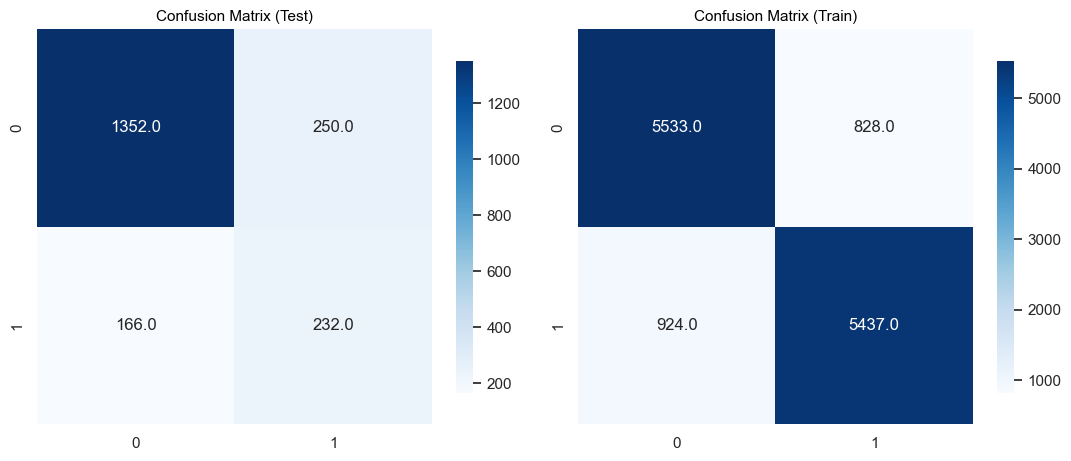

ROC-AUC CURVE



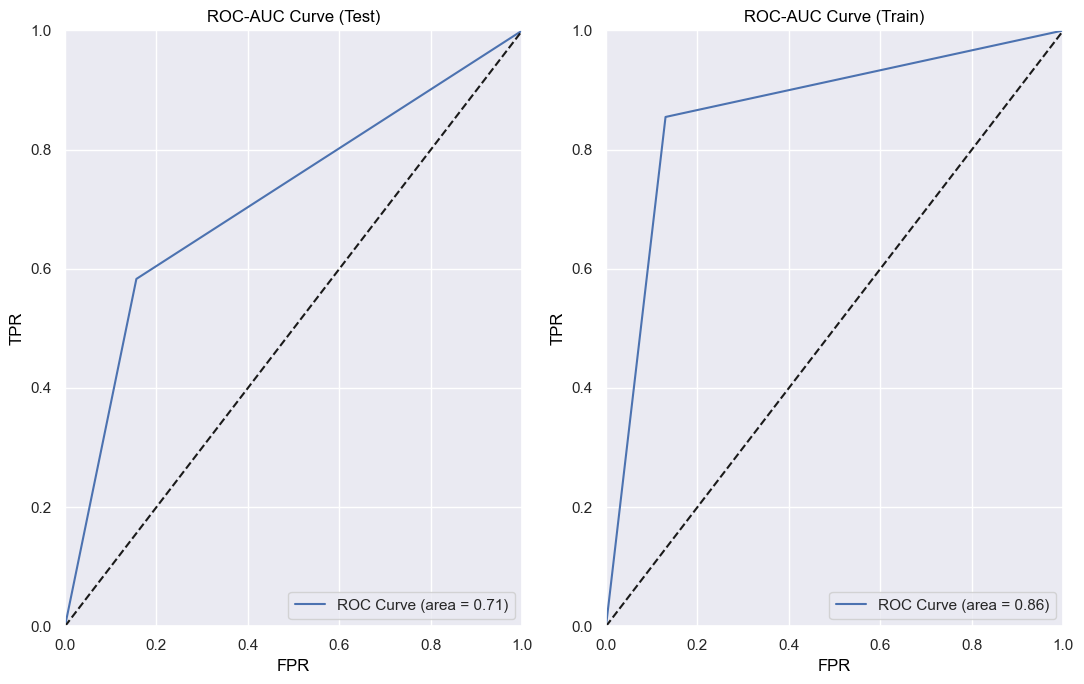

In [97]:
# Tuning and evaluating the KNN model with these k-values to identify the best k-value in terms of accuracy

# param_grid = {
#     "n_neighbors" : n_neighbors
# }

# grid_model = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = "accuracy").fit(X_train_sc, y_train)

# print(grid_model.best_params_)

# {'n_neighbors': 13}

knn_model_1, metrics_scores["KNN_Tuned_Model"] = classification_model(KNeighborsClassifier(n_neighbors = 13), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>KNN model</b> generalizes well on the <b>training data</b>, with all <b>evaluation metric scores</b> above <b>85%</b>.
* The <b>accuracy</b> of the model on the <b>test data</b> is <b>79</b>.
* The <b>precision</b> of <b>48%</b> indicates that out of <b>all predicted churners</b>, <b>48%</b> are <b>actual churners</b>.
* The <b>recall</b> of <b>58%</b> indicates that out of <b>all actual churners</b>, the model identified <b>58%</b> of them as <b>actual churners</b>.
* The <b>F1-Score</b> of <b>53%</b> indicates the <b>harmonic mean</b> of <b>precision</b> and <b>recall</b>, representing a <b>balanced performance</b> between the <b>two metrics</b>.
* The <b>ROC-AUC Score</b> of <b>71%</b> indicates that the model has a <b>moderate ability</b> to <b>distinguish</b> between <b>churners</b> and <b>non-churners</b>.
* <b>Cross Validation Scores :</b> The <b>higher cross-validation scores</b> suggest that the model is <b>stable</b> and <b>robust</b> across various subsets of the training data, indicating <b>less overfitting</b>. This implies <b>better generalization</b> and <b>reliability</b> in estimating performance compared to single-split evaluation metrics.
    * Accuracy : 84%
    * Precision : 84%
    * Recall : 80%
    * F1-Score : 85%
* <b>Confusion Matrix (Test Data) :</b>
    * True Positives (TP) : 250 churning customers were correctly identified.
    * True Negatives (TN) : 1352 non-churning customers were correctly identified.
    * False Positives (FP) : 250 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 166 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Support Vector Classifier (SVM Classifier)

<a id = "cell_7_5"></a>


METRICS (TEST)


Scores
Accuracy         0.81
Precision        0.52
Recall           0.60
F1-Score         0.56
ROC-AUC Score    0.73


METRICS (TRAIN)


Scores
Accuracy         0.87
Precision        0.88
Recall           0.85
F1-Score         0.86
ROC-AUC Score    0.87


CROSS VALIDATION SCORES


Scores
Accuracy     0.85
Precision    0.87
Recall       0.81
F1           0.84



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1602
           1       0.52      0.60      0.56       398

    accuracy                           0.81      2000
   macro avg       0.71      0.73      0.72      2000
weighted avg       0.82      0.81      0.82      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6361
           1       0.88      0.85      0.86      6361

    accuracy                           0.87     12722
   macro avg       0.87      0.87      0.87     12722
weighted avg       0.87      0.87      0.87     12722


CONFUSION MATRIX



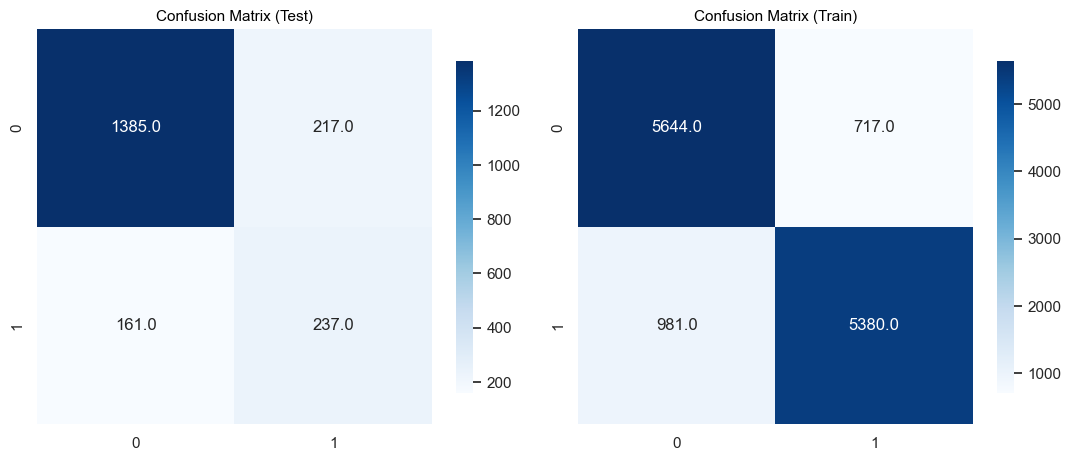

ROC-AUC CURVE



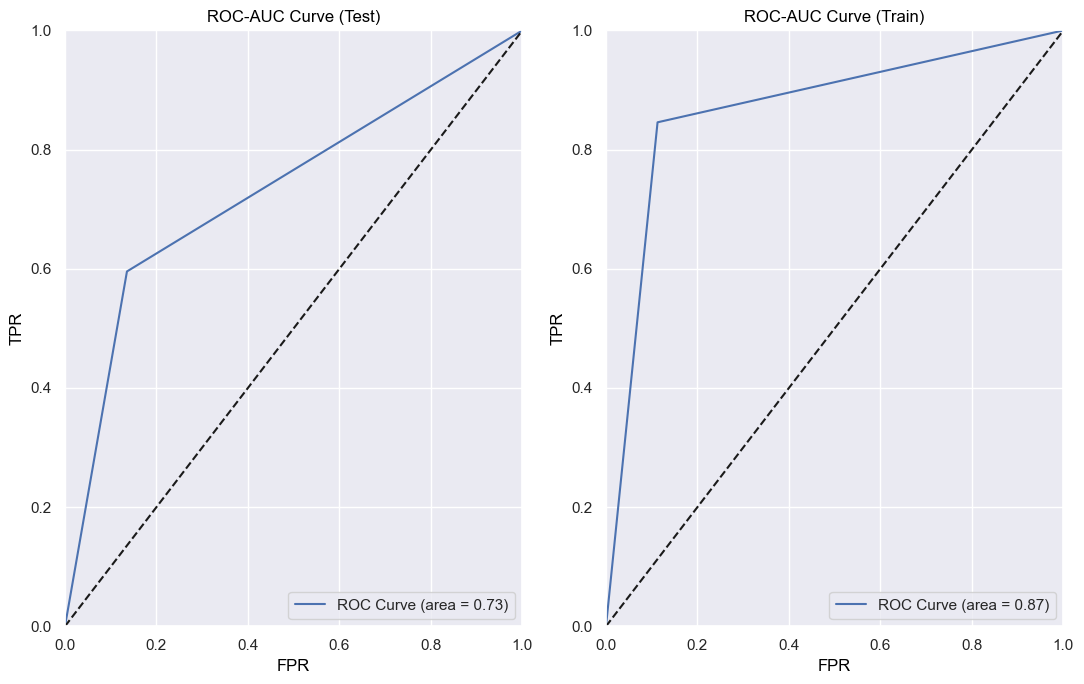

In [98]:
# Building and evaluating the SVM model on the scaled data

svm_model_1, metrics_scores["SVM_Base_Model"] = classification_model(SVC(), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>SVM Classifier model</b> generalizes well on the <b>training data</b>, with all <b>evaluation metric scores</b> above <b>85%</b>.
* The <b>accuracy</b> of the model on the <b>test data</b> is <b>81</b>.
* The <b>precision</b> of <b>52%</b> indicates that out of <b>all predicted churners</b>, <b>52%</b> are <b>actual churners</b>.
* The <b>recall</b> of <b>60%</b> indicates that out of <b>all actual churners</b>, the model identified <b>60%</b> of them as <b>actual churners</b>.
* The <b>F1-Score</b> of <b>56%</b> indicates the <b>harmonic mean</b> of <b>precision</b> and <b>recall</b>, representing a <b>balanced performance</b> between the <b>two metrics</b>.
* The <b>ROC-AUC Score</b> of <b>73%</b> indicates that the model has a <b>moderate ability</b> to <b>distinguish</b> between <b>churners</b> and <b>non-churners</b>.
* <b>Cross Validation Scores :</b></b> The <b>higher cross-validation scores</b> suggest that the model is <b>stable</b> and <b>robust</b> across various subsets of the training data, indicating <b>less overfitting</b>. This implies <b>better generalization</b> and <b>reliability</b> in estimating performance compared to single-split evaluation metrics.
    * Accuracy : 85%
    * Precision : 87%
    * Recall : 81%
    * F1-Score : 84%
* <b>Confusion Matrix (Test Data) :</b>
    * True Positives (TP) : 237 churning customers were correctly identified.
    * True Negatives (TN) : 1385 non-churning customers were correctly identified.
    * False Positives (FP) : 217 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 161 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Support Vector Classifier (Tuning)

<a id = "cell_7_6"></a>


METRICS (TEST)


Scores
Accuracy         0.74
Precision        0.38
Recall           0.52
F1-Score         0.44
ROC-AUC Score    0.66


METRICS (TRAIN)


Scores
Accuracy          0.8
Precision         0.8
Recall            0.8
F1-Score          0.8
ROC-AUC Score     0.8


CROSS VALIDATION SCORES


Scores
Accuracy     0.79
Precision    0.78
Recall       0.76
F1           0.77



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1602
           1       0.38      0.52      0.44       398

    accuracy                           0.74      2000
   macro avg       0.63      0.66      0.63      2000
weighted avg       0.77      0.74      0.75      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      6361
           1       0.80      0.80      0.80      6361

    accuracy                           0.80     12722
   macro avg       0.80      0.80      0.80     12722
weighted avg       0.80      0.80      0.80     12722


CONFUSION MATRIX



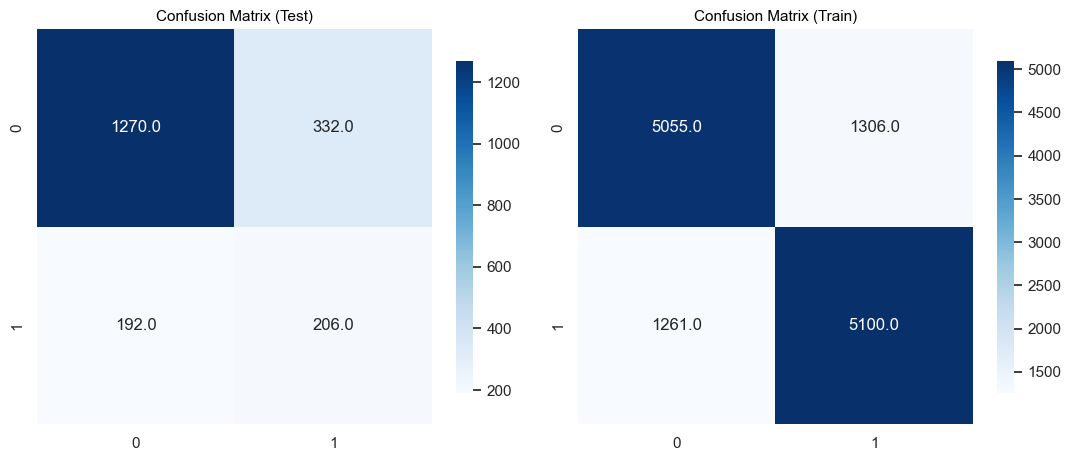

ROC-AUC CURVE



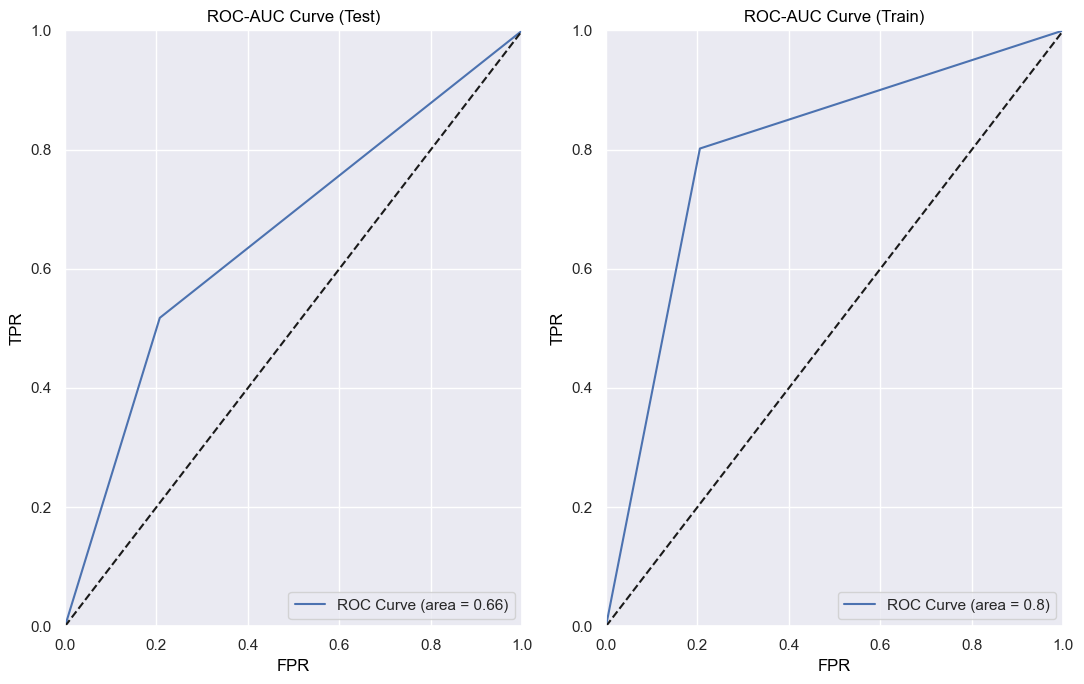

In [99]:
# Tuning and evaluating the SVM model

# param_grid = {
#     "C" : [0.1, 1, 10, 100],
#     "gamma" : [0.0001, 0.001, 0.01, 1, 2, 3],
#     "kernel" : ["linear"]
# }

# grid_model = GridSearchCV(SVC(), param_grid, scoring = "accuracy", cv = 5)

# grid_model.fit(X_train_sc, y_train)

# print(grid_model.best_params_)
# {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

svm_model_2, metrics_scores["SVM_Tuned_Model"] = classification_model(SVC(C = 1, gamma = 0.0001, kernel = "linear"), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The KNN tuned model does not show improvement compared to the base model.

## Decision Tree

<a id = "cell_7_7"></a>


METRICS (TEST)


Scores
Accuracy         0.76
Precision        0.43
Recall           0.57
F1-Score         0.49
ROC-AUC Score    0.69


METRICS (TRAIN)


Scores
Accuracy          1.0
Precision         1.0
Recall            1.0
F1-Score          1.0
ROC-AUC Score     1.0


CROSS VALIDATION SCORES


Scores
Accuracy     0.82
Precision    0.80
Recall       0.81
F1           0.80



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1602
           1       0.43      0.57      0.49       398

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6361
           1       1.00      1.00      1.00      6361

    accuracy                           1.00     12722
   macro avg       1.00      1.00      1.00     12722
weighted avg       1.00      1.00      1.00     12722


CONFUSION MATRIX



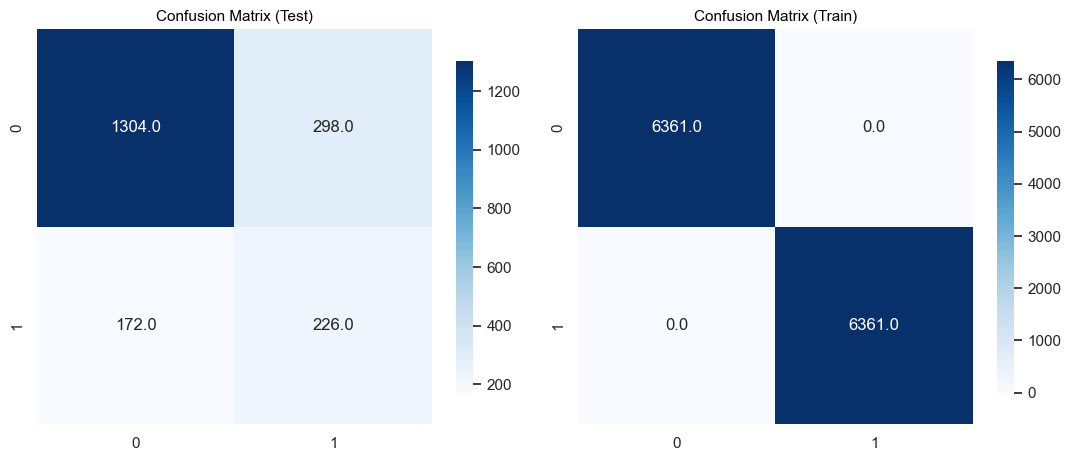

ROC-AUC CURVE



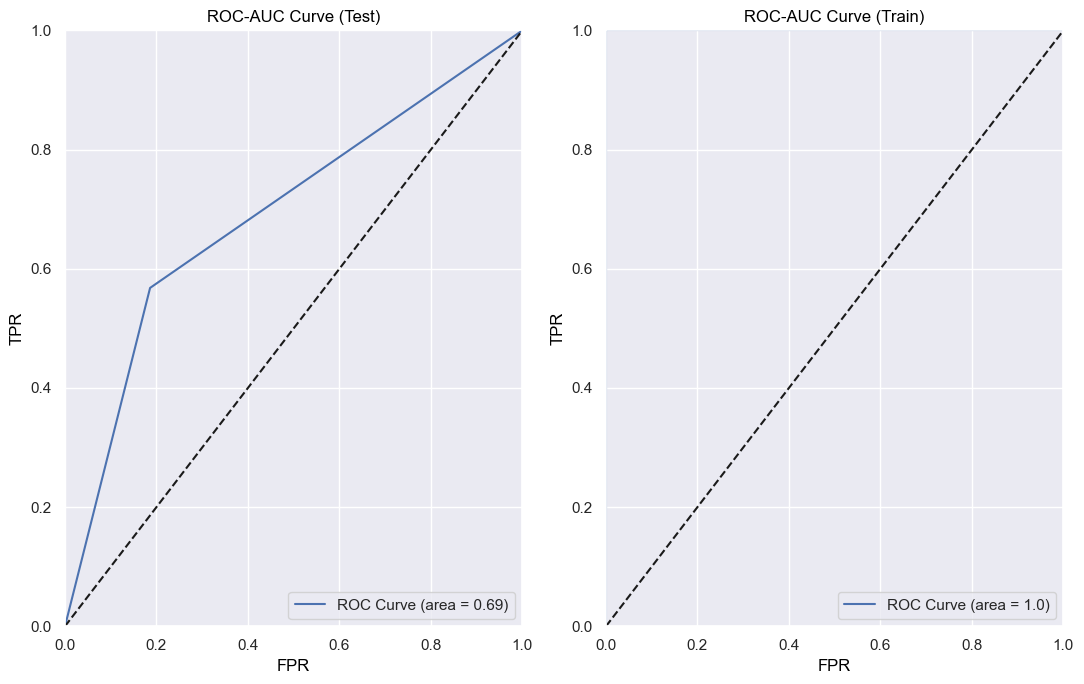

In [100]:
# Building and evaluating the Decision Tree model on the unscaled and label encoded data

decision_tree_model_1, metrics_scores["Decision_Tree_Base_Model"]  = classification_model(DecisionTreeClassifier(), X_train_1, X_test_1, y_train_1, y_test_1)

<b>Insights</b>

* The <b>Decision Tree (base model)</b> has <b>effectively learned</b> the <b>training data</b>, achieving a <b>metric score</b> of <b>100%</b>.
* The model achieved an <b>accuracy</b> of <b>77%</b>, indicating that it <b>correctly classified</b> churned and non-churned customers 77% of the instances.
* The <b>precision</b> of <b>43%</b> signifies that out of all instances predicted as churned, 43% are <b>true churners</b>. This means there is a <b>high rate</b> of <b>false positives</b>, where the model <b>mistakes non-churning</b> customers for <b>churners</b>.
* A <b>recall</b> of <b>56%</b> indicates that the model classified 56% of the <b>actual churners (True Positives)</b>, while <b>missing 44%</b> who actually churned <b>(False Negatives)</b>.
* The <b>F1-score</b> of <b>49%</b> indicates that the model achieved a <b>moderate balance</b> between <b>precision</b> and <b>recall</b>.
* A <b>ROC-AUC Score</b> of <b>69%</b> suggests that the model performs <b>reasonably well</b> in <b>distinguishing between</b> <b>churned</b> and <b>non-churned</b> customers.
* <b>Cross Validation Scores :</b>
    
    * Accuracy : 82%
    * Precision : 80%
    * Recall : 81%
    * F1-Score : 80%
* <b>Confusion Matrix (Test Data) :</b>

    * True Positives (TP) : 224 churning customers were correctly identified.
    * True Negatives (TN) : 1310 non-churning customers were correctly identified.
    * False Positives (FP) : 292 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 174 customers were misclassified as non-churned, potentially resulting in revenue loss.

Importance
Feature                    
Age                0.341970
IsActiveMember     0.107366
Balance            0.102985
EstimatedSalary    0.102098
CreditScore        0.087762
NumOfProducts      0.082460
Gender             0.054535
Tenure             0.045805
Age_Group          0.044469
Geography          0.030549

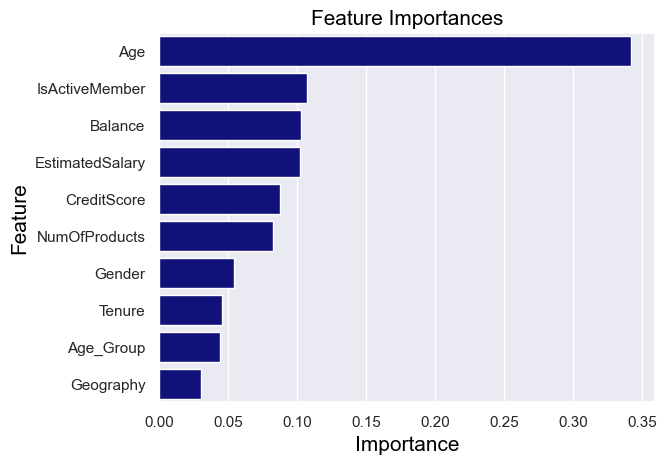

In [101]:
# Creating a function to visualize the feature importances from the decision tree model

def feature_importances(model, train_data):

    feature_importance = pd.DataFrame({
        "Feature" : train_data.columns,
        "Importance" : decision_tree_model_1.feature_importances_
    }).sort_values("Importance", ascending = False).set_index("Feature")

    display(feature_importance)

    sns.barplot(y = feature_importance.index, x = feature_importance["Importance"], color = "darkblue")
    plt.title(f"Feature Importances", color = "black", size = 15)
    plt.ylabel("Feature", size = 15, color = "black")
    plt.xlabel("Importance", size = 15, color = "black")

feature_importances(decision_tree_model_1, X_train_1)

<b>Insights</b>

* The <b>base model</b> suggests that a <b>customer's age, active membership status, account balance, income</b>, and <b>creditworthiness</b> are the <b>most important factors</b> influencing churn.

## Decision Tree (Tuning)

<a id = "cell_7_8"></a>


METRICS (TEST)


Scores
Accuracy         0.80
Precision        0.49
Recall           0.63
F1-Score         0.55
ROC-AUC Score    0.73


METRICS (TRAIN)


Scores
Accuracy         0.84
Precision        0.85
Recall           0.82
F1-Score         0.83
ROC-AUC Score    0.84


CROSS VALIDATION SCORES


Scores
Accuracy     0.81
Precision    0.80
Recall       0.78
F1           0.79



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1602
           1       0.49      0.63      0.55       398

    accuracy                           0.80      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.82      0.80      0.81      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6361
           1       0.85      0.82      0.83      6361

    accuracy                           0.84     12722
   macro avg       0.84      0.84      0.84     12722
weighted avg       0.84      0.84      0.84     12722


CONFUSION MATRIX



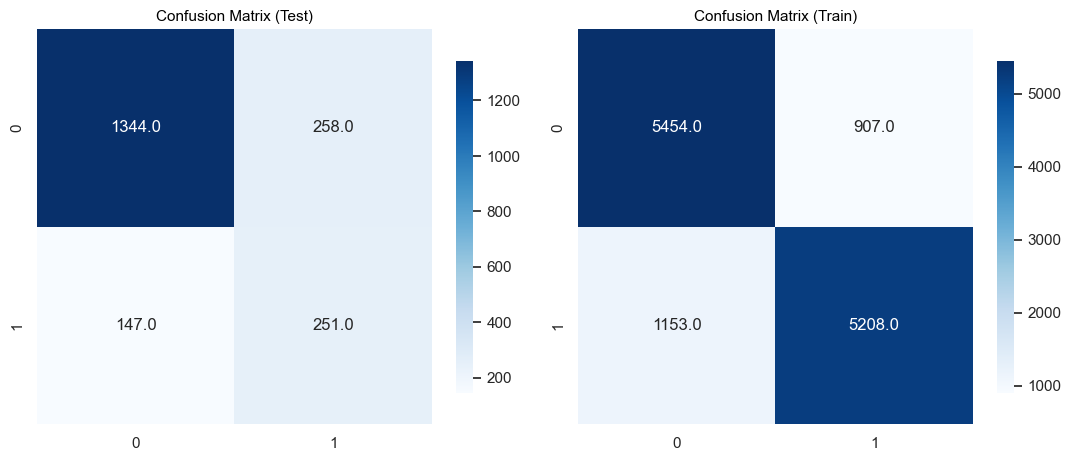

ROC-AUC CURVE



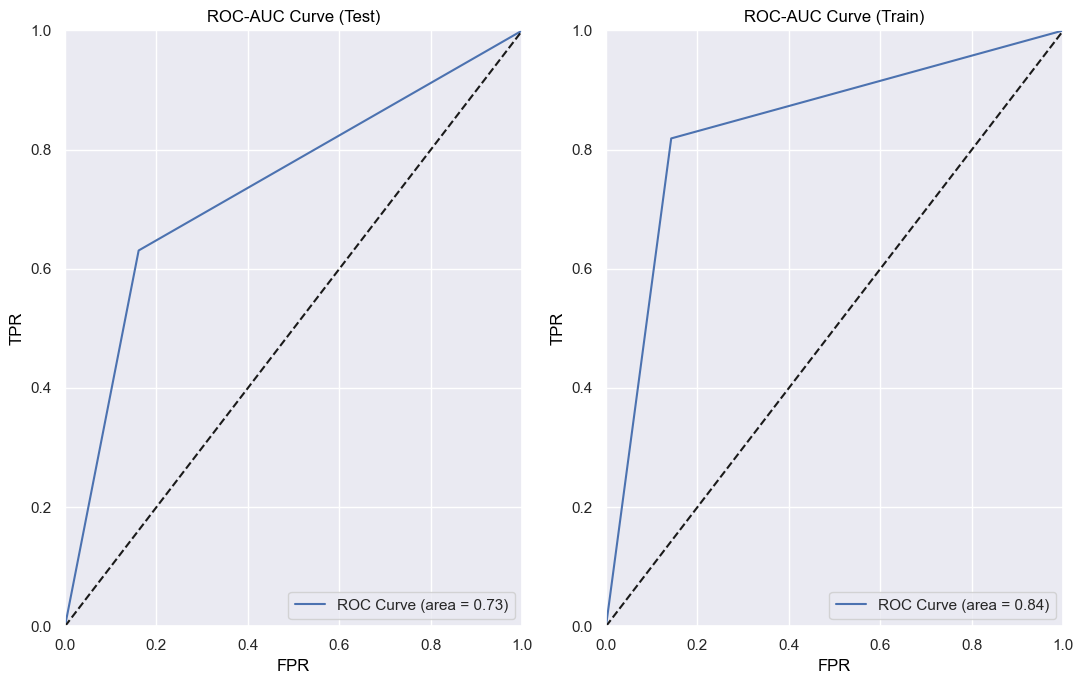

In [102]:
# Tuning and evaluating the decision tree model on the unscaled and label encoded data

# param_grid = {
#     "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
#     "min_samples_split" : [2, 5, 10, 11, 15, 20],
#     "min_samples_leaf" : [1, 2, 3, 4, 5, 6],
#     "max_features" : ['auto', 'sqrt', 'log2'],
#     "splitter" : ["random", "best"]
# }

# grid_model = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = "accuracy").fit(X_train, y_train)

# print(grid_model.best_params_)

# {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20, 'splitter': 'best'}

decision_tree_model_2, metrics_scores["Decision_Tree_Tuned_Model"] = classification_model(DecisionTreeClassifier(max_depth = 12, max_features = "sqrt", min_samples_leaf = 2, min_samples_split = 20, random_state = 11, splitter = "random"), X_train_1, X_test_1, y_train_1, y_test_1)

<b>Insights</b>

* After <b>tuning</b> the <b>decision tree model</b>, the various <b>training metrics</b>, including <b>Accuracy (84%)</b>, <b>Precision (85%)</b>, <b>Recall (82%)</b>, <b>F1-Score(83%)</b> and <b>ROC-AUC Score (84%)</b>, <b>decreased</b> from 100%.
* There are improvements across various <b>testing metrics</b> compared to the base model :-
    * There is a slight improvement in accuracy compared to the base model, with an <b>accuracy</b> of <b>80%</b> achieved on the test data.
    * <b>Precision</b> increased from 43% to <b>49</b>%, indicating a <b>reduction</b> in <b>false positives</b> from 292 to <b>258</b>.
    * <b>Recall</b> increased from 56% to <b>63</b>%, indicating a <b>reduction</b> in <b>false negatives</b> from 174 to <b>147</b>.
    * The <b>F1-Score</b> has <b>improved</b> from 49% to <b>55%</b>, indicating a <b>better balance</b> between <b>precision</b> and <b>recall</b>.
    * The <b>ROC-AUC score</b> has <b>improved</b> from 69% to <b>73%</b>, suggesting a <b>better ability</b> to <b>distinguish</b> between <b>churned</b> and <b>non-churned customers</b>.
    * The <b>True Positive Rate (TPR) increased</b> from 224 to <b>251</b>, and the <b>True Negative Rate (TNR) increased</b> from 1310 to <b>1344</b>.
* There are <b>slight fluctuations (1-2% difference)</b> across the <b>cross-validation scores</b> of the base and tuned model.
* Overall, the <b>tuned decision tree model</b> shows <b>enhanced performance metrics</b>, <b>improved generalization</b> to<b> unseen data</b>, and a <b>reduction</b> in <b>overfitting</b> compared to the base model. It could effectively <b>minimize</b> the wasted efforts on <b>non-churners</b> while still capturing a significant portion of <b>actual churn</b>.

## Random Forest Classifier

<a id = "cell_7_9"></a>


METRICS (TEST)


Scores
Accuracy         0.82
Precision        0.56
Recall           0.59
F1-Score         0.57
ROC-AUC Score    0.74


METRICS (TRAIN)


Scores
Accuracy          1.0
Precision         1.0
Recall            1.0
F1-Score          1.0
ROC-AUC Score     1.0


CROSS VALIDATION SCORES


Scores
Accuracy     0.88
Precision    0.88
Recall       0.84
F1           0.86



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1602
           1       0.56      0.59      0.57       398

    accuracy                           0.82      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.83      0.82      0.83      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6361
           1       1.00      1.00      1.00      6361

    accuracy                           1.00     12722
   macro avg       1.00      1.00      1.00     12722
weighted avg       1.00      1.00      1.00     12722


CONFUSION MATRIX



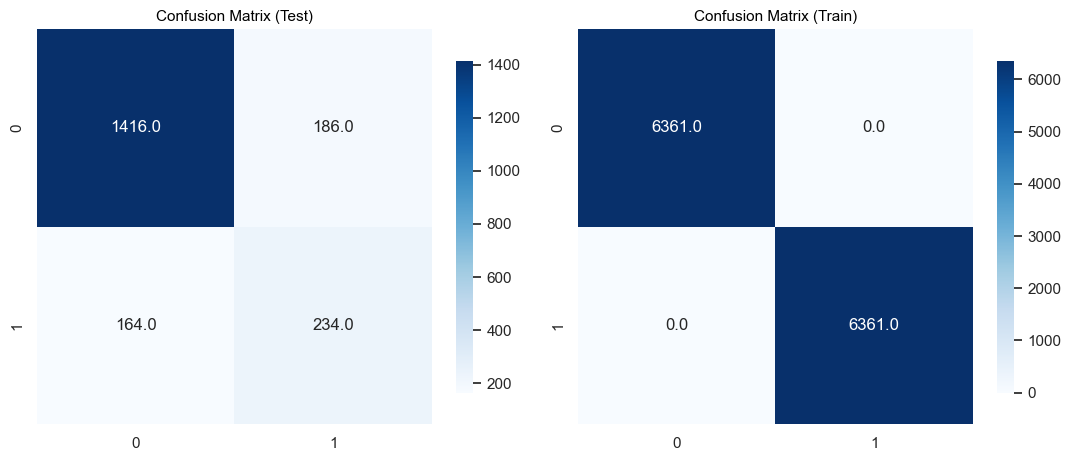

ROC-AUC CURVE



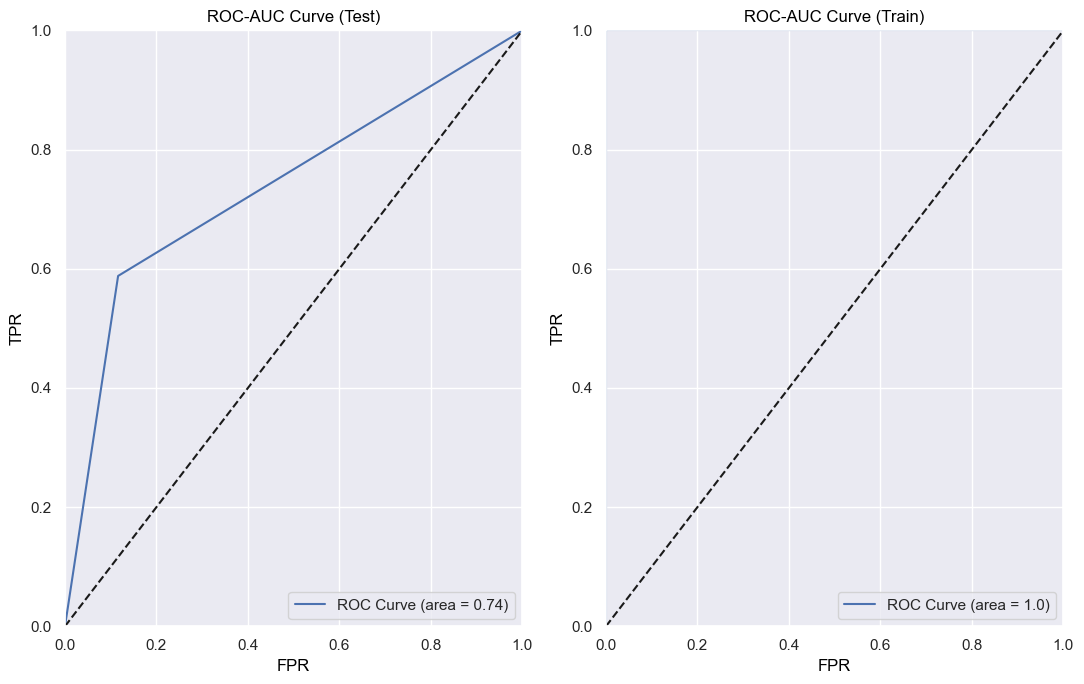

In [103]:
# Building and evaluating the Random Forest Classifier model on the scaled data

random_forest_model_1, metrics_scores["Random_Forest_Base_Model"] = classification_model(RandomForestClassifier(), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>accuracy</b> of the <b>Random Forest model</b> on the <b>test data</b> is <b>83</b>%.
* The <b>precision</b> of <b>56%</b> indicates out of all predicted churners, 56% are actual churners.
* The <b>recall</b> of <b>60%</b> indicates out of all actual churners, the model identified 60% of them as actual churners.
* The <b>F1-Score</b> of <b>58%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>74%</b> indicates that the model has a moderate ability to distinguish churners and non-churners.
* <b>Cross Validation Scores : </b>The higher cross-validation scores (metrics scoring above 85%) suggest that the model is stable and robust across various subsets of the training data, including less overfitting. This implies better generalization and reliability in estimating performance compared to single-split evaluation metrics.
    * Accuracy : 88%
    * Precision : 88%
    * Recall : 85%
    * F1 : 86%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 237 churning customers were correctly identified.
    * True Negatives (TN) : 1419 non-churning customers were correctly identified.
    * False Positives (FP) : 183 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 161 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Random Forest Classifier (Tuning)

<a id = "cell_7_10"></a>


METRICS (TEST)


Scores
Accuracy         0.82
Precision        0.55
Recall           0.58
F1-Score         0.57
ROC-AUC Score    0.73


METRICS (TRAIN)


Scores
Accuracy          1.0
Precision         1.0
Recall            1.0
F1-Score          1.0
ROC-AUC Score     1.0


CROSS VALIDATION SCORES


Scores
Accuracy     0.88
Precision    0.88
Recall       0.84
F1           0.86



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1602
           1       0.55      0.58      0.57       398

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.73      2000
weighted avg       0.83      0.82      0.82      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6361
           1       1.00      1.00      1.00      6361

    accuracy                           1.00     12722
   macro avg       1.00      1.00      1.00     12722
weighted avg       1.00      1.00      1.00     12722


CONFUSION MATRIX



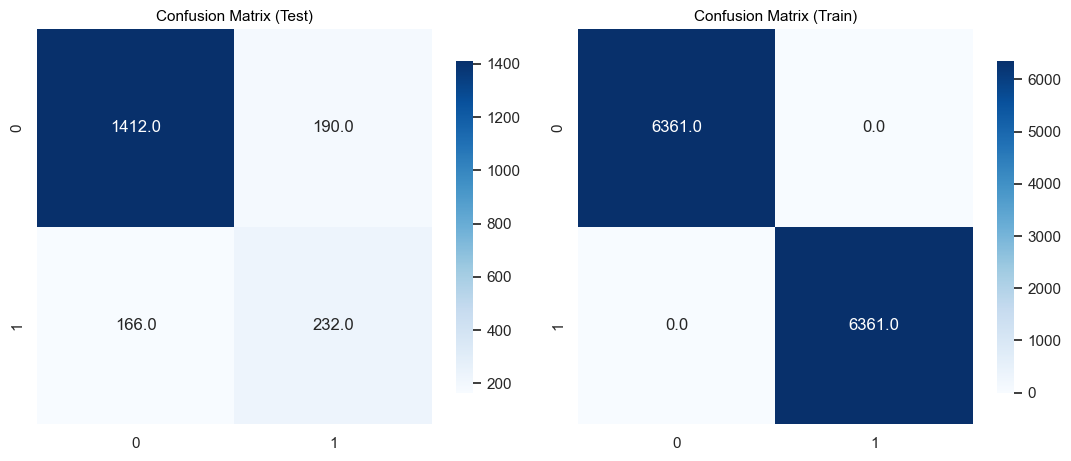

ROC-AUC CURVE



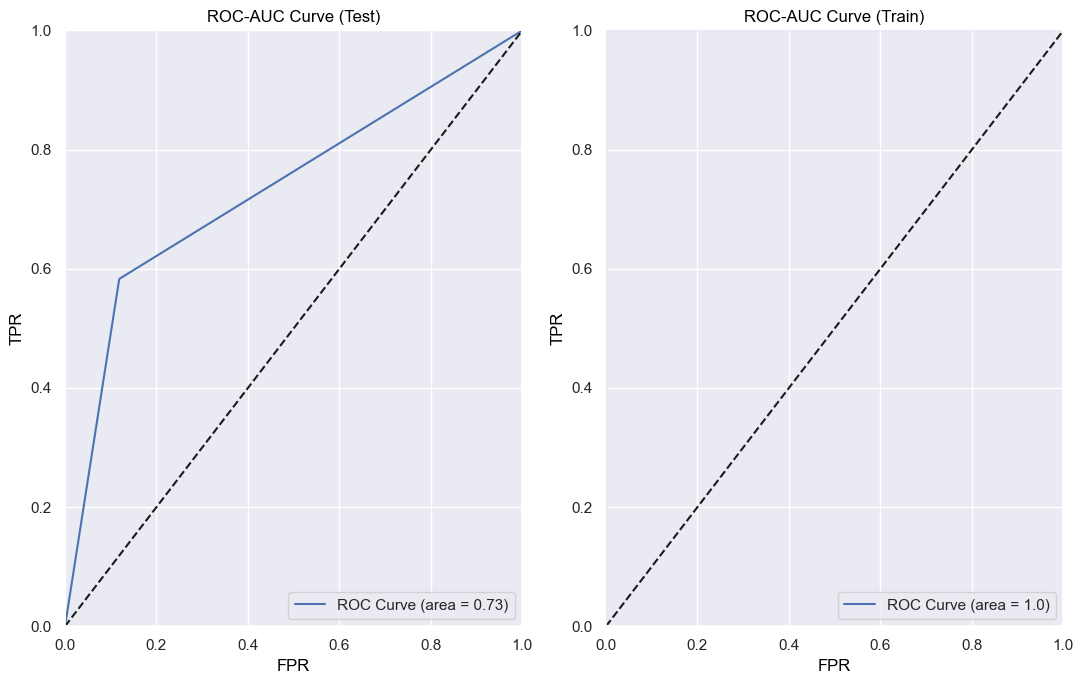

In [104]:
# Tuning and evaluating the Random Forest Classifier model on the scaled data

# param_grid = {
#     "max_depth" : [3, 5, 8, 10, None],
#     "n_estimators" : [60, 100, 120, 200, 300],
#     "max_features" : [2, 5, 7],
#     "criterion" : ["gini", "entropy"]
# }

# grid_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring = "accuracy").fit(X_train_sc, y_train)

# print(grid_model.best_params_)
# {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'n_estimators': 120}

random_forest_model_2, metrics_scores["Random_Forest_Tuned_Model"] = classification_model(RandomForestClassifier(criterion = "gini", max_depth = None, max_features = 2, n_estimators = 120), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The evaluation results are the same as those of the base model.

## AdaBoost Classifier

<a id = "cell_7_11"></a>


METRICS (TEST)


Scores
Accuracy         0.80
Precision        0.49
Recall           0.64
F1-Score         0.56
ROC-AUC Score    0.74


METRICS (TRAIN)


Scores
Accuracy         0.85
Precision        0.85
Recall           0.85
F1-Score         0.85
ROC-AUC Score    0.85


CROSS VALIDATION SCORES


Scores
Accuracy     0.84
Precision    0.83
Recall       0.82
F1           0.83



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1602
           1       0.49      0.64      0.56       398

    accuracy                           0.80      2000
   macro avg       0.70      0.74      0.71      2000
weighted avg       0.82      0.80      0.81      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6361
           1       0.85      0.85      0.85      6361

    accuracy                           0.85     12722
   macro avg       0.85      0.85      0.85     12722
weighted avg       0.85      0.85      0.85     12722


CONFUSION MATRIX



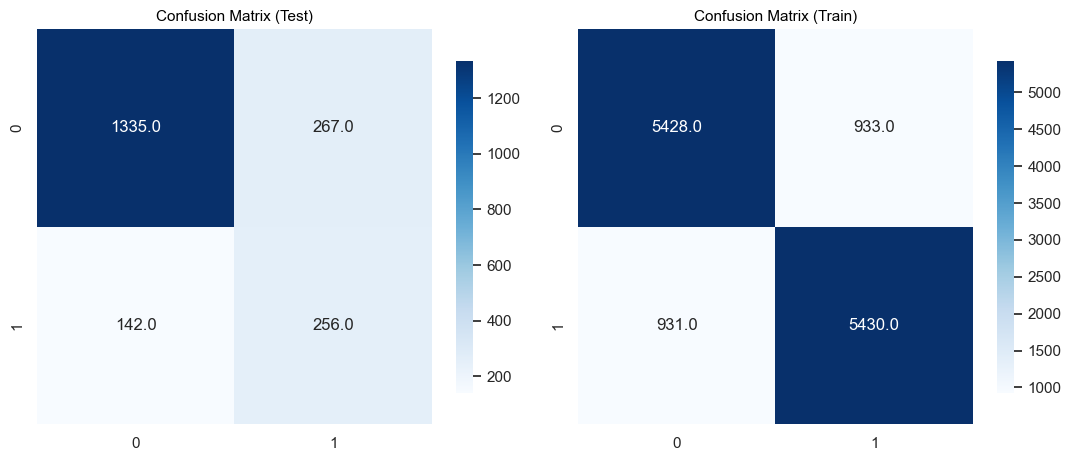

ROC-AUC CURVE



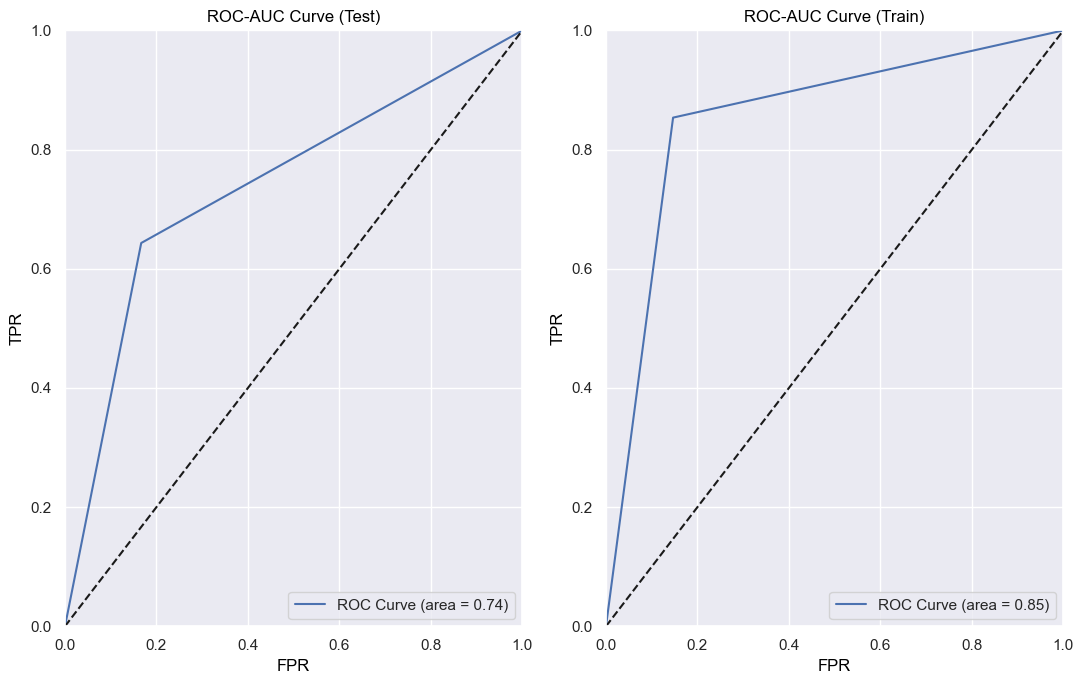

In [105]:
# Building and evaluating the AdaBoost Classifier model on the scaled data

adaboost_model_1, metrics_scores["Adaboost_Base_Model"] = classification_model(AdaBoostClassifier(), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>AdaBoost</b> model has achieved <b>metric scores</b> of <b>85%</b> on the <b>train data</b>.
* The <b>accuracy</b> of the AdaBoost model on the <b>test data</b> is <b>80%</b>.
* The <b>precision</b> of <b>49%</b> indicates out of all predicted churners, 49% are actual churners.
* The <b>recall</b> of <b>64%</b> indicates out of all actual churners, the model identified 64% of them as actual churners.
* The <b>F1-Score</b> of <b>56%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>74%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 84%
    * Precision : 83%
    * Recall : 82%
    * F1 : 83%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 256 churning customers were correctly identified.
    * True Negatives (TN) : 1335 non-churning customers were correctly identified.
    * False Positives (FP) : 267 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 142 customers were misclassified as non-churned, potentially resulting in revenue loss.

## AdaBoost Classifier (Tuning)

<a id = "cell_7_12"></a>


METRICS (TEST)


Scores
Accuracy         0.81
Precision        0.52
Recall           0.64
F1-Score         0.57
ROC-AUC Score    0.74


METRICS (TRAIN)


Scores
Accuracy         0.87
Precision        0.87
Recall           0.87
F1-Score         0.87
ROC-AUC Score    0.87


CROSS VALIDATION SCORES


Scores
Accuracy     0.86
Precision    0.85
Recall       0.83
F1           0.84



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1602
           1       0.52      0.64      0.57       398

    accuracy                           0.81      2000
   macro avg       0.71      0.74      0.72      2000
weighted avg       0.83      0.81      0.82      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6361
           1       0.87      0.87      0.87      6361

    accuracy                           0.87     12722
   macro avg       0.87      0.87      0.87     12722
weighted avg       0.87      0.87      0.87     12722


CONFUSION MATRIX



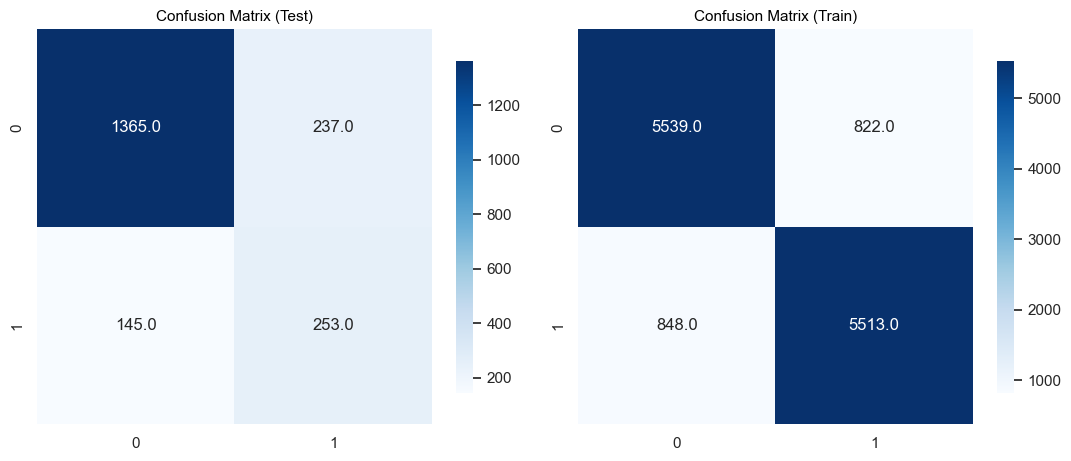

ROC-AUC CURVE



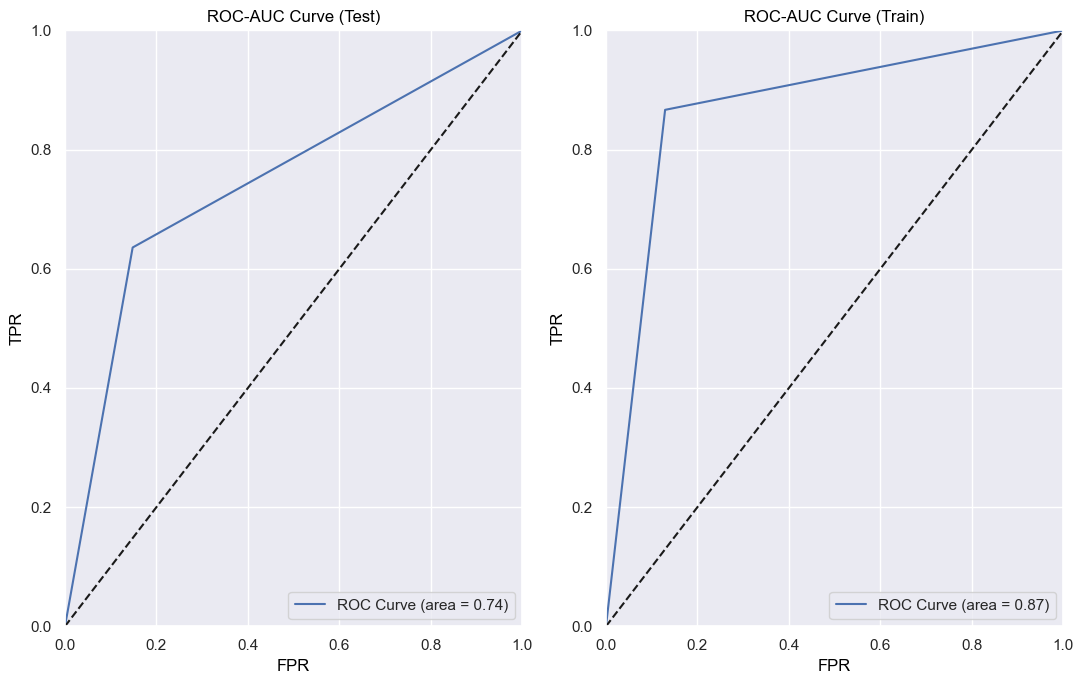

In [106]:
# Tuning and evaluating the Random Forest Classifier model on the scaled data

# param_grid = {
#     "n_estimators" : [50, 100, 150, 200],
#     "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1.0]
# }

# grid_model = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = "accuracy").fit(X_train_sc, y_train)

# print(grid_model.best_params_)
# {'learning_rate': 1.0, 'n_estimators': 200}

adaboost_model_2, metrics_scores["Adaboost_Tuned_Model"] = classification_model(AdaBoostClassifier(learning_rate = 1.0, n_estimators = 200), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* <b>After tuning</b> the base model</b>, there are <b>improvements</b> in both <b>training</b> and <b>testing metrics</b>.
* The <b>AdaBoost tuned model</b> has achieved <b>metric scores</b> of <b>87%</b> on the <b>train data</b>.
* The <b>accuracy</b> of the AdaBoost model on the <b>test data</b> is <b>81%</b>.
* The <b>precision</b> of <b>52%</b> indicates out of all predicted churners, 52% are actual churners.
* The <b>recall</b> of <b>64%</b> indicates out of all actual churners, the model identified 64% of them as actual churners.
* The <b>F1-Score</b> of <b>57%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>74%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 86%
    * Precision : 85%
    * Recall : 83%
    * F1 : 84%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 253 churning customers were correctly identified.
    * True Negatives (TN) : 1365 non-churning customers were correctly identified.
    * False Positives (FP) : 237 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (TN) : 145 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Gradient Boosting Classifier

<a id = "cell_7_13"></a>


METRICS (TEST)


Scores
Accuracy         0.82
Precision        0.55
Recall           0.63
F1-Score         0.59
ROC-AUC Score    0.75


METRICS (TRAIN)


Scores
Accuracy         0.88
Precision        0.89
Recall           0.87
F1-Score         0.88
ROC-AUC Score    0.88


CROSS VALIDATION SCORES


Scores
Accuracy     0.86
Precision    0.86
Recall       0.83
F1           0.85



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1602
           1       0.55      0.63      0.59       398

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6361
           1       0.89      0.87      0.88      6361

    accuracy                           0.88     12722
   macro avg       0.88      0.88      0.88     12722
weighted avg       0.88      0.88      0.88     12722


CONFUSION MATRIX



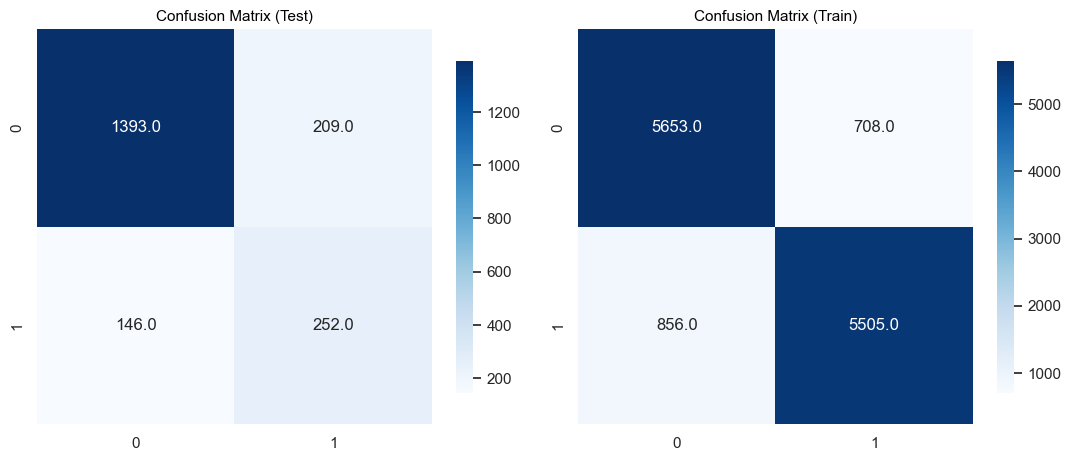

ROC-AUC CURVE



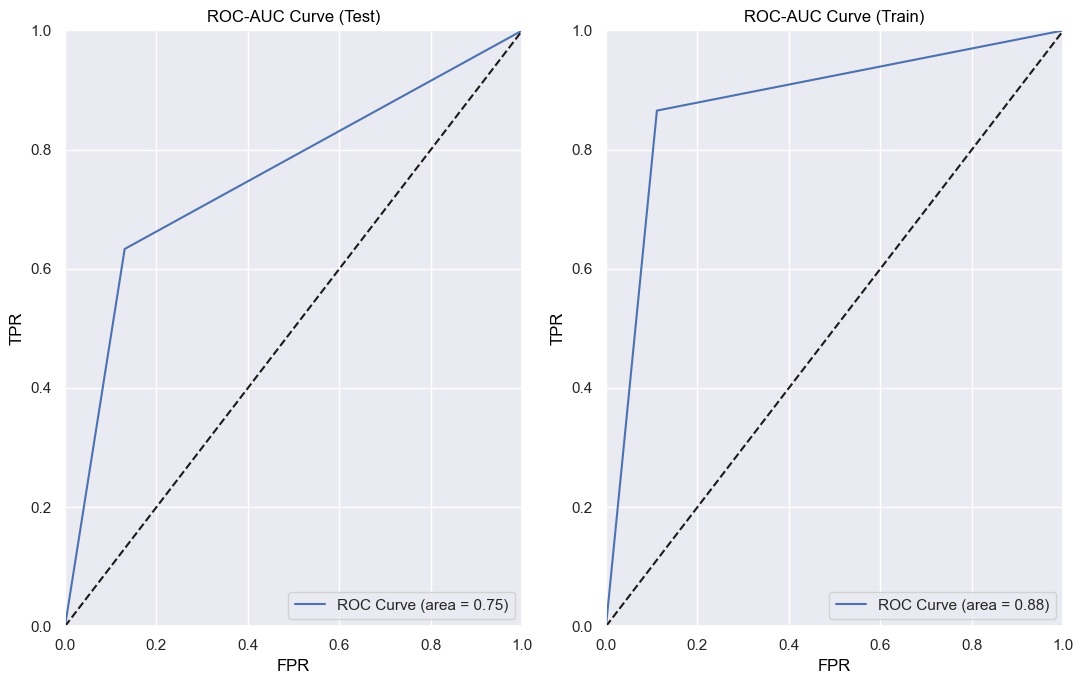

In [107]:
# Building and evaluating the Gradient Boosting model on the scaled data

gradient_boosting_model_1, metrics_scores["Gradient_Boosting_Base_Model"]  = classification_model(GradientBoostingClassifier(), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>accuracy</b> of the <b>Gradient Boosting Classifier</b> model on the <b>test data</b> is <b>82%</b>.
* The <b>precision</b> of <b>55%</b> indicates out of all predicted churners, 55% are actual churners.
* The <b>recall</b> of <b>63%</b> indicates out of all actual churners, the model identified 63% of them as actual churners.
* The <b>F1-Score</b> of <b>59%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>75%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 86%
    * Precision : 86%
    * Recall : 83%
    * F1 : 85%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 252 churning customers were correctly identified.
    * True Negatives (TN) : 1393 non-churning customers were correctly identified.
    * False Positives (FP) : 209 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 146 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Gradient Boosting Classifier (Tuning)

<a id = "cell_7_14"></a>


METRICS (TEST)


Scores
Accuracy         0.85
Precision        0.63
Recall           0.58
F1-Score         0.60
ROC-AUC Score    0.75


METRICS (TRAIN)


Scores
Accuracy         0.99
Precision        1.00
Recall           0.99
F1-Score         0.99
ROC-AUC Score    0.99


CROSS VALIDATION SCORES


Scores
Accuracy     0.90
Precision    0.91
Recall       0.86
F1           0.88



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1602
           1       0.63      0.58      0.60       398

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.85      0.85      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6361
           1       1.00      0.99      0.99      6361

    accuracy                           0.99     12722
   macro avg       0.99      0.99      0.99     12722
weighted avg       0.99      0.99      0.99     12722


CONFUSION MATRIX



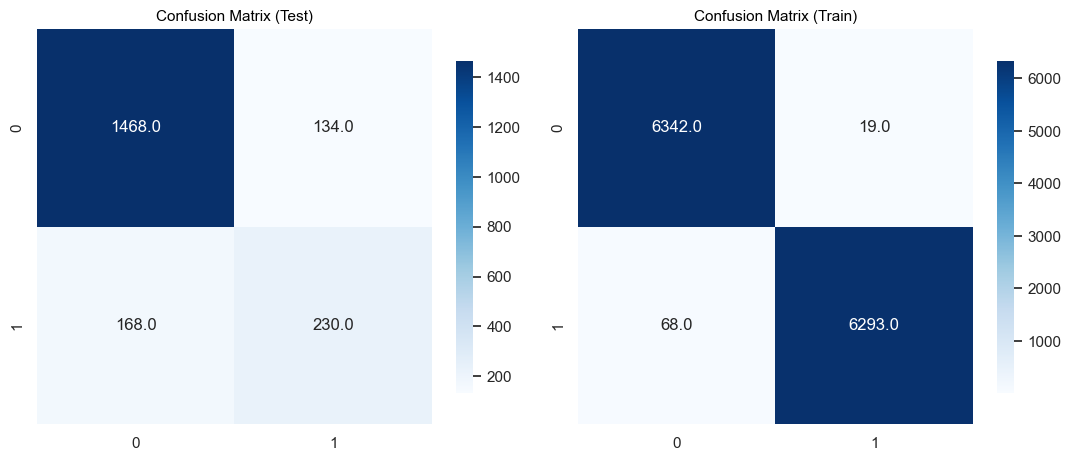

ROC-AUC CURVE



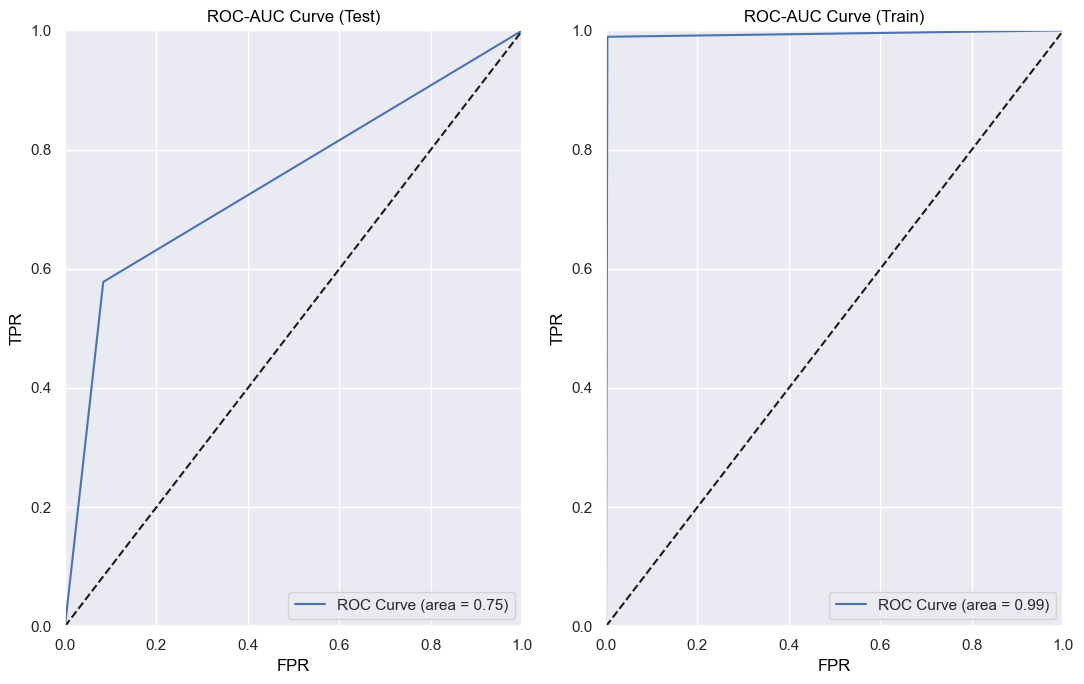

In [108]:
# Tuning and evaluating the Gradient Boosting Classifier model on the scaled data

# param_grid = {
#     "n_estimators" : [50, 100, 150, 200],
#     "learning_rate" : [0.001, 0.01, 0.1, 1.0],
#     "max_depth" : [3, 4, 5, 8],
# }

# grid_model = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = "accuracy").fit(X_train_sc, y_train)

# print(grid_model.best_params_)
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}

gradient_boosting_model_2, metrics_scores["Gradient_Boosting_Tuned_Model"] = classification_model(GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 150), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>Gradient Descent Classifier (tuned model)</b> has effectively learned the <b>training data</b>, achieving a <b>metric score</b> of <b>99%</b>.
* The <b>accuracy</b> of the tuned model on the <b>test data</b> is <b>85%</b>.
* The <b>precision</b> of <b>62%</b> indicates out of all predicted churners, 62% are actual churners.
* The <b>recall</b> of <b>58%</b> indicates out of all actual churners, the model identified 58% of them as actual churners.
* The <b>F1-Score</b> of <b>60%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>75%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 90%
    * Precision : 91%
    * Recall : 86%
    * F1 : 88%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 231 churning customers were correctly identified.
    * True Negatives (TN) : 1463 non-churning customers were correctly identified.
    * False Positives (FP) : 139 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 167 customers were misclassified as non-churned, potentially resulting in revenue loss.

## XGBoost Classifier

<a id = "cell_7_15"></a>


METRICS (TEST)


Scores
Accuracy         0.85
Precision        0.62
Recall           0.57
F1-Score         0.60
ROC-AUC Score    0.74


METRICS (TRAIN)


Scores
Accuracy         0.97
Precision        0.98
Recall           0.95
F1-Score         0.96
ROC-AUC Score    0.97


CROSS VALIDATION SCORES


Scores
Accuracy     0.90
Precision    0.91
Recall       0.86
F1           0.88



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1602
           1       0.62      0.57      0.60       398

    accuracy                           0.85      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6361
           1       0.98      0.95      0.96      6361

    accuracy                           0.97     12722
   macro avg       0.97      0.97      0.97     12722
weighted avg       0.97      0.97      0.97     12722


CONFUSION MATRIX



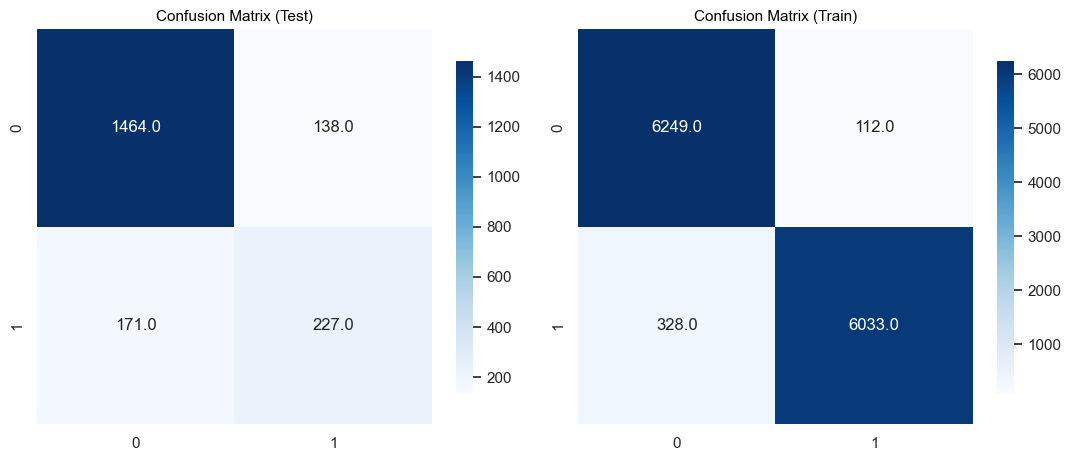

ROC-AUC CURVE



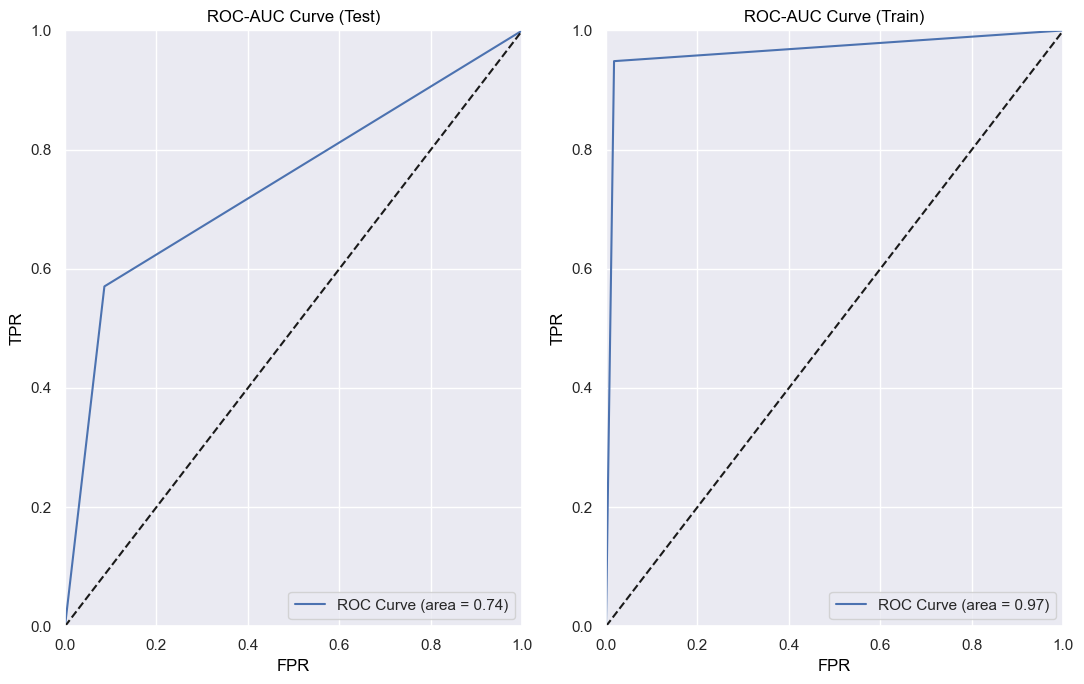

In [109]:
# Building and evaluating the XGBoost Classifier model on the scaled data

xgboost_model_1, metrics_scores["XGBoost_Base_Model"] = classification_model(XGBClassifier(), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>accuracy</b> of the <b>XGBoost Classifier</b> model on the <b>test data</b> is <b>85%</b>.
* The <b>precision</b> of <b>62%</b> indicates out of all predicted churners, 62% are actual churners.
* The <b>recall</b> of <b>57%</b> indicates out of all actual churners, the model identified 57% of them as actual churners.
* The <b>F1-Score</b> of <b>60%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>74%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 90%
    * Precision : 91%
    * Recall : 86%
    * F1 : 88%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 227 churning customers were correctly identified.
    * True Negatives (TN) : 1464 non-churning customers were correctly identified.
    * False Positives (FP) : 171 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 138 customers were misclassified as non-churned, potentially resulting in revenue loss.

## XGBoost Classifier (Tuning)

<a id = "cell_7_16"></a>


METRICS (TEST)


Scores
Accuracy         0.85
Precision        0.63
Recall           0.58
F1-Score         0.60
ROC-AUC Score    0.75


METRICS (TRAIN)


Scores
Accuracy         0.98
Precision        0.99
Recall           0.97
F1-Score         0.98
ROC-AUC Score    0.98


CROSS VALIDATION SCORES


Scores
Accuracy     0.90
Precision    0.91
Recall       0.86
F1           0.88



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1602
           1       0.63      0.58      0.60       398

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.85      0.85      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6361
           1       0.99      0.97      0.98      6361

    accuracy                           0.98     12722
   macro avg       0.98      0.98      0.98     12722
weighted avg       0.98      0.98      0.98     12722


CONFUSION MATRIX



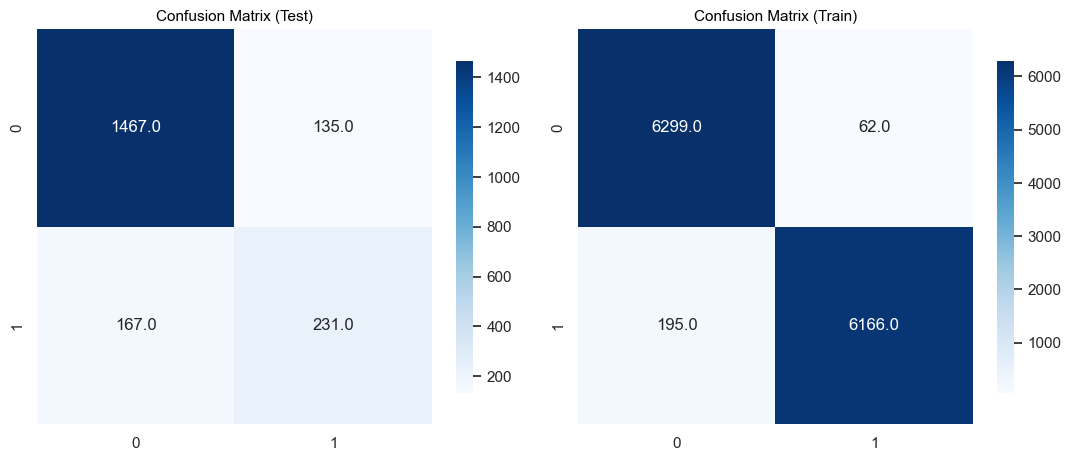

ROC-AUC CURVE



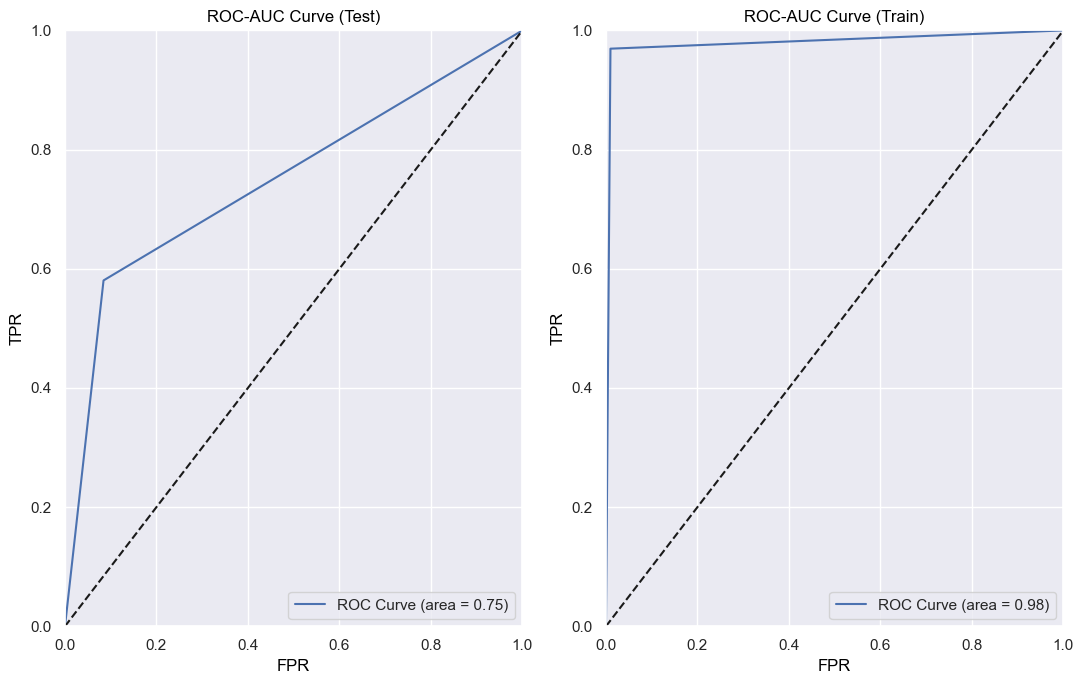

In [110]:
# Tuning and evaluating the XGBoost Classifier model on the scaled data

# param_grid = {
#     "max_depth" : [3, 5, 7, 8, 9],
#     "learning_rate": [0.001, 0.01, 0.1],
#     "n_estimators" : [100, 200, 300, 500],
# }

# grid_model = GridSearchCV(XGBClassifier(), param_grid, scoring = "accuracy").fit(X_train_sc, y_train)

# print(grid_model.best_params_)
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

xgboost_model_2, metrics_scores["XGBoost_Tuned_Model"] = classification_model(XGBClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200), X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The evaluation results are the same as those of the base model.

## Stacking Classifier

<a id = "cell_7_17"></a>


METRICS (TEST)


Scores
Accuracy         0.83
Precision        0.57
Recall           0.60
F1-Score         0.58
ROC-AUC Score    0.74


METRICS (TRAIN)


Scores
Accuracy          1.0
Precision         1.0
Recall            1.0
F1-Score          1.0
ROC-AUC Score     1.0


CROSS VALIDATION SCORES


Scores
Accuracy     0.88
Precision    0.88
Recall       0.85
F1           0.86



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1602
           1       0.57      0.60      0.58       398

    accuracy                           0.83      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6361
           1       1.00      1.00      1.00      6361

    accuracy                           1.00     12722
   macro avg       1.00      1.00      1.00     12722
weighted avg       1.00      1.00      1.00     12722


CONFUSION MATRIX



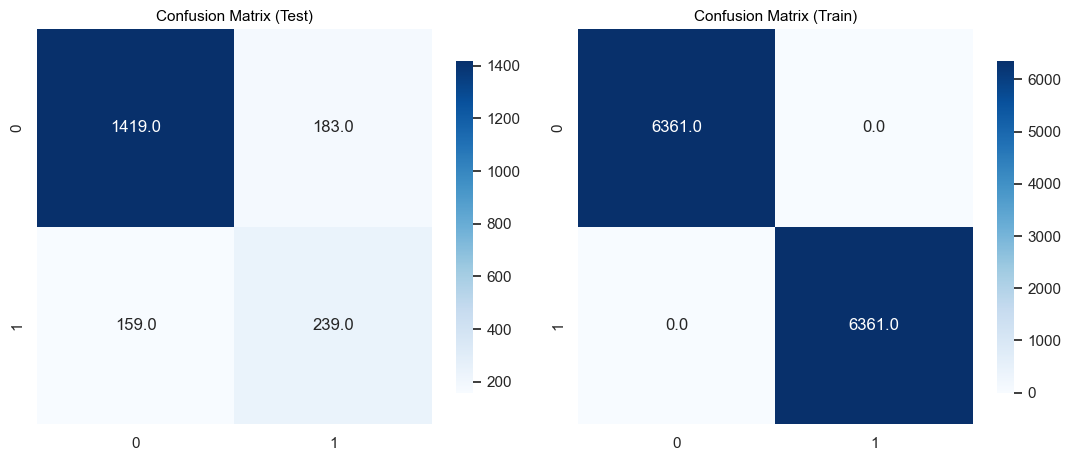

ROC-AUC CURVE



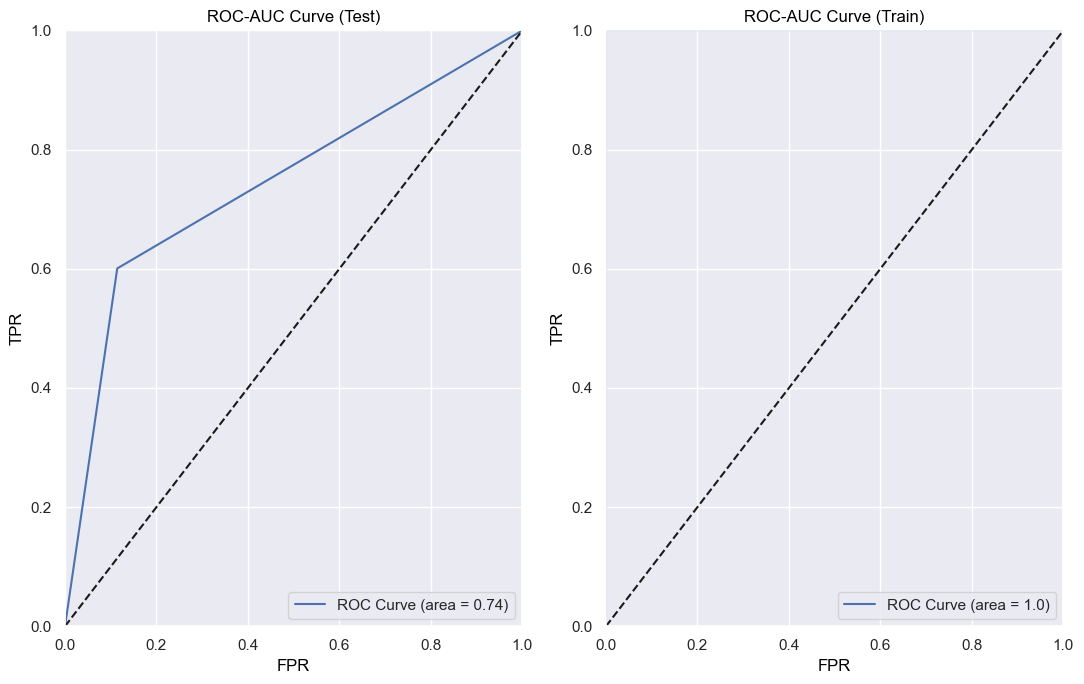

In [111]:
# Building and evaluating the XGBoost Classifier model on the scaled data

model = StackingClassifier(
    classifiers = [knn_model_1, decision_tree_model_2, random_forest_model_1, gradient_boosting_model_2],
    meta_classifier = LogisticRegression()
)

stacking_classifier_model_1, metrics_scores["Stacking_Classifier_Base_Model"] = classification_model(model, X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>accuracy</b> of the <b>Stacking Classifier</b> model on the <b>test data</b> is <b>83%</b>.
* The <b>precision</b> of <b>57%</b> indicates out of all predicted churners, 57% are actual churners.
* The <b>recall</b> of <b>61%</b> indicates out of all actual churners, the model identified 61% of them as actual churners.
* The <b>F1-Score</b> of <b>59%</b> indicates the harmonic mean of precision and recall, representing a balanced performance between the two metrics.
* The <b>ROC-AUC Score</b> of <b>75%</b> indicates that the model has a moderate ability to distinguish between churners and non-churners.
* <b>Cross Validation Scores : </b>
    * Accuracy : 88%
    * Precision : 88%
    * Recall : 85%
    * F1 : 86%
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 242 churning customers were correctly identified.
    * True Negatives (TN) : 1419 non-churning customers were correctly identified.
    * False Positives (FP) : 183 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 156 customers were misclassified as non-churned, potentially resulting in revenue loss.

## Best Model

<a id = "cell_7_18"></a>

In [112]:
# Creating a function to select the best model from all the evaluated models based on their metrics

def best_model(metrics):

    # Creating a dataframe to display the metrics

    metrics_df = pd.DataFrame(metrics, index = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC_Curve"]).T
    print(f"{start}Evaluated Metrics Scores{end}")
    display(metrics_df)

    # Checking the model that provide best score for each of the metrics

    print(f"\n{start}Best Metrics Scores{end}\n")
    for metric in metrics_df.columns:
        models = metrics_df[metrics_df[metric] == metrics_df[metric].max()]
        display(models[[metric]])
    
best_model(metrics_scores)

Evaluated Metrics Scores


Accuracy  Precision  Recall  F1-Score  \
Logistic_Regression_Base_Model       0.67       0.33    0.64      0.43   
Logistic_Regression_Tuned_Model      0.67       0.33    0.64      0.43   
KNN_Tuned_Model                      0.79       0.48    0.58      0.53   
SVM_Base_Model                       0.81       0.52    0.60      0.56   
SVM_Tuned_Model                      0.74       0.38    0.52      0.44   
Decision_Tree_Base_Model             0.76       0.43    0.57      0.49   
Decision_Tree_Tuned_Model            0.80       0.49    0.63      0.55   
Random_Forest_Base_Model             0.82       0.56    0.59      0.57   
Random_Forest_Tuned_Model            0.82       0.55    0.58      0.57   
Adaboost_Base_Model                  0.80       0.49    0.64      0.56   
Adaboost_Tuned_Model                 0.81       0.52    0.64      0.57   
Gradient_Boosting_Base_Model         0.82       0.55    0.63      0.59   
Gradient_Boosting_Tuned_Model        0.85       0.63    0.58      0.60   
XGBoost_Base_Model                   0.85       0.62    0.57      0.60   
XGBoost_Tuned_Model                  0.85       0.63    0.58      0.60   
Stacking_Classifier_Base_Model       0.83       0.57    0.60      0.58   

                                 ROC-AUC_Curve  
Logistic_Regression_Base_Model            0.66  
Logistic_Regression_Tuned_Model           0.66  
KNN_Tuned_Model                           0.71  
SVM_Base_Model                            0.73  
SVM_Tuned_Model                           0.66  
Decision_Tree_Base_Model                  0.69  
Decision_Tree_Tuned_Model                 0.73  
Random_Forest_Base_Model                  0.74  
Random_Forest_Tuned_Model                 0.73  
Adaboost_Base_Model                       0.74  
Adaboost_Tuned_Model                      0.74  
Gradient_Boosting_Base_Model              0.75  
Gradient_Boosting_Tuned_Model             0.75  
XGBoost_Base_Model                        0.74  
XGBoost_Tuned_Model                       0.75  
Stacking_Classifier_Base_Model            0.74


Best Metrics Scores



Accuracy
Gradient_Boosting_Tuned_Model      0.85
XGBoost_Base_Model                 0.85
XGBoost_Tuned_Model                0.85

Precision
Gradient_Boosting_Tuned_Model       0.63
XGBoost_Tuned_Model                 0.63

Recall
Logistic_Regression_Base_Model     0.64
Logistic_Regression_Tuned_Model    0.64
Adaboost_Base_Model                0.64
Adaboost_Tuned_Model               0.64

F1-Score
Gradient_Boosting_Tuned_Model       0.6
XGBoost_Base_Model                  0.6
XGBoost_Tuned_Model                 0.6

ROC-AUC_Curve
Gradient_Boosting_Base_Model            0.75
Gradient_Boosting_Tuned_Model           0.75
XGBoost_Tuned_Model                     0.75

<b>Insights</b>


* <b>Accuracy :</b>
    * XGBoost Base and Tuned Model (85%)
* <b>Precision :</b>
    * XGBoost Tuned Model (63%)
* <b>Recall :</b>
    * Logistic Regression, AdaBoost Base and Tuned Model (64%)
* <b>F1-Score :</b>
    * XGBoost Base and Tuned Model (60%)
* <b>ROC-AUC Curve :</b>
    * Gradient and XGBoost Tuned Model (75%)
<br>
<br>
* The <b>XGBoost Classifier model</b> offers the <b>highest accuracy (85%), precision (63%), F1-Score (60%)</b> and <b>ROC-AUC Curve (75%)</b> among all the evaluated models, making it the top choice for <b>customer churn predictions</b>. By leveraging this model, businesses can <b>identify</b> and <b>retain at-risk customers</b>, thereby <b>minimizing churn</b> and <b>maximizing customer retention</b> and <b>revenue</b>.

In [114]:
# Exporting the XGBoost Classifier tuned model

joblib.dump(xgboost_model_2, "xgboost_model.pkl")

['xgboost_model.pkl']

## Predictions

<a id = "cell_7_18_1"></a>

In [115]:
# Making predictions on the test data using tuned XGBoost and Random Forest models

xgb_preds = xgboost_model_2.predict(X_test_sc)
rf_preds = random_forest_model_2.predict(X_test_sc)

# Storing these prediction in a dataframe

preds_df = pd.DataFrame({
    "XGBoost" : xgb_preds,
    "Random_Forest" : rf_preds,
    "Actual_Predictions" : y_test
})

preds_df

XGBoost  Random_Forest Actual_Predictions
3104        0              0                  0
6353        0              0                  0
8689        0              0                  0
5857        1              1                  1
6011        1              1                  1
...       ...            ...                ...
665         0              0                  0
3837        0              0                  0
3340        0              0                  0
3519        1              1                  1
6838        0              0                  0

[2000 rows x 3 columns]

# Deep Learning

<a id = "cell_8"></a>

In [116]:
# Saving the preprocessed dataframe into a csv file

# df_4.to_csv("customer_churn_df.csv")

df_4 = pd.read_csv("customer_churn_df.csv")

df_4 = df_4.iloc[:, 1:]

df_4.head()

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0          0       0  42.0       2       0.00              1   
1        608.0          2       0  41.0       1   83807.86              1   
2        502.0          0       0  42.0       8  159660.80              3   
3        699.0          0       0  39.0       1       0.00              2   
4        850.0          2       0  43.0       2  125510.82              1   

   IsActiveMember  EstimatedSalary  Age_Group  Exited  
0               1        101348.88          0       1  
1               1        112542.58          0       0  
2               0        113931.57          0       1  
3               0         93826.63          0       0  
4               1         79084.10          0       0

## Feature Scaling

In [117]:
# Seperating the data into independent and dependent features

X = df_4.drop(columns = ["Exited"])
y = df_4["Exited"]

# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify = y)

# Applying the standardization technique to scale the data

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

print(f"\n{start}Scaled Data{end}")
display(pd.DataFrame(X_train_sc, columns = df_4.columns[:-1]).head())


Scaled Data


CreditScore  Geography    Gender       Age    Tenure   Balance  \
0     0.398831  -0.905220  0.912557 -0.475291 -1.390554  1.424799   
1    -0.237014   0.301539  0.912557 -0.988329 -0.698607  0.587961   
2    -2.280057  -0.905220 -1.095822 -1.193544  0.339314 -0.227090   
3    -0.716504  -0.905220 -1.095822  0.140354  1.377234 -1.227149   
4     1.274421   1.508298 -1.095822 -0.577898  1.723208 -1.227149   

   NumOfProducts  IsActiveMember  EstimatedSalary  Age_Group  
0      -0.934813       -1.033304         0.972168  -0.592380  
1       0.860315        0.967769         0.436655   1.894652  
2       0.860315       -1.033304        -0.797765   1.894652  
3       2.655444        0.967769        -0.674457  -0.592380  
4      -0.934813        0.967769        -0.014950  -0.592380

## Model Building and Evaluation

In [118]:
# Creating a function to evaluate the performance of deep learning models

def deep_learning_model(model, history, X_train, X_test, y_train, y_test):

    # Creating an empty dictionary to store the evaluation scores

    metrics_test = {}
    metrics_train = {}

    # Evaluating the model based on various classification metrics

    print(f"{start}EVALUATING THE MODEL ON TEST DATA\n")
    loss, accuracy = model.evaluate(X_test, y_test)
    metrics_test["Accuracy - evaluate()"] = np.round(accuracy, 2)
    metrics_test["Loss - evaluate()"] = np.round(loss, 2)


    # Making predictions on both the training and testing sets

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Converting the probability scores to labels

    y_train_pred = [1 if pred > 0.5 else 0 for pred in y_train_pred]
    y_test_pred = [1 if pred > 0.5 else 0 for pred in y_test_pred]

    metrics_test["Accuracy - accuracy_score()"] = np.round(accuracy_score(y_test, y_test_pred), 2)
    metrics_train["Accuracy - accuracy_score()"] = np.round(accuracy_score(y_train, y_train_pred), 2)
    metrics_test["Precision"] = np.round(precision_score(y_test, y_test_pred), 2)
    metrics_train["Precision"] = np.round(precision_score(y_train, y_train_pred), 2)
    metrics_test["Recall"] = np.round(recall_score(y_test, y_test_pred), 2)
    metrics_train["Recall"] = np.round(recall_score(y_train, y_train_pred), 2)
    metrics_test["F1-Score"] = np.round(f1_score(y_test, y_test_pred), 2)
    metrics_train["F1-Score"] = np.round(f1_score(y_train, y_train_pred), 2)
    metrics_test["ROC-AUC Score"] = np.round(roc_auc_score(y_test, y_test_pred), 2)
    metrics_train["ROC-AUC Score"] = np.round(roc_auc_score(y_train, y_train_pred), 2)

    metrics_test_df = pd.DataFrame(data = metrics_test.values(), index = metrics_test.keys(), columns = ["Scores"])
    metrics_train_df = pd.DataFrame(data = metrics_train.values(), index = metrics_train.keys(), columns = ["Scores"])

    print(f"\n{start}METRICS (TEST){end}")
    display(metrics_test_df)

    print(f"\n{start}METRICS (TRAIN){end}")
    display(metrics_train_df)
    print()

    # Plotting the training and testing accuracy curves over epochs

    print(f"{start}Accuracy & Loss Curves{end}\n")

    plt.figure(figsize = (11, 7))
    plt.plot(history.history["accuracy"], label = "train_accuracy")
    plt.plot(history.history["val_accuracy"], label = "test_accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("Training and Validation Accuracy Over Epochs")
    plt.legend()
    plt.show()

    print()

    # Plotting the training and testing loss curves over epochs

    plt.figure(figsize = (11, 7))
    plt.plot(history.history["loss"], label = "train_loss")
    plt.plot(history.history["val_loss"], label = "test_loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.show()

    # Evaluating the model's performance through classification reports

    classification_report_test = classification_report(y_test, y_test_pred)
    classification_report_train = classification_report(y_train, y_train_pred)

    print(f"\n\n{start}CLASSIFICATION REPORT (TEST){end}\n\n{classification_report_test}")
    print(f"\n{start}CLASSIFICATION REPORT (TRAIN){end}\n\n{classification_report_train}")

    # Evaluating the model's performance through confusion matrix

    print(f"\n{start}CONFUSION MATRIX{end}\n")

    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    fig, ax = plt.subplots(1, 2, figsize = (8, 8))

    sns.heatmap(confusion_matrix_test, annot = True, fmt = ".1f", cmap = "Blues",
                xticklabels = [0, 1], yticklabels = [0, 1], square = True, ax = ax[0], cbar_kws = {"shrink" : 0.5})
    ax[0].set_title("Confusion Matrix (Test)", size = 11, color = "black")
    sns.heatmap(confusion_matrix_train, annot = True, fmt = ".1f", cmap = "Blues",
               xticklabels = [0, 1], yticklabels = [0, 1], square = True, ax = ax[1], cbar_kws = {"shrink" : 0.5})
    ax[1].set_title("Confusion Matrix (Train)", size = 11, color = "black")
    plt.tight_layout()
    plt.show()

    # Evaluating the model's performance using ROC-AUC curve

    print(f"\n{start}ROC-AUC CURVE{end}\n")
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred)
    roc_auc_score_test = metrics_test["ROC-AUC Score"]

    fig, ax = plt.subplots(1, 2, figsize = (11, 7))

    ax[0].plot(fpr_test, tpr_test, label = f"ROC Curve (area = {roc_auc_score_test})")
    ax[0].plot([0, 1], [0, 1], "k--")
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.0])
    ax[0].set_xlabel("FPR", color = "black")
    ax[0].set_ylabel("TPR", color = "black")
    ax[0].set_title("ROC-AUC Curve (Test)", color = "black")
    ax[0].legend(loc = "lower right")

    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred)
    roc_auc_score_train = metrics_train["ROC-AUC Score"]

    ax[1].plot(fpr_train, tpr_train, label = f"ROC Curve (area = {roc_auc_score_train})")
    ax[1].plot([0, 1], [0, 1], "k--")
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel("FPR", color = "black")
    ax[1].set_ylabel("TPR", color = "black")
    ax[1].set_title("ROC-AUC Curve (Train)", color = "black")
    ax[1].legend(loc = "lower right")

    plt.tight_layout()
    plt.show()

    return model, list(metrics_test.values())

# Creating a dictionary to store the metrics scores

metrics_scores = {}

## ANN_Model_1

<a id = "cell_8_1"></a>

In [119]:
# Building the ANN model (ann_model_1)

ann_model_1 = Sequential([
    Dense(32, activation = "relu", input_dim = X.shape[1]),
    Dense(1, activation = "sigmoid")
])

ann_model_1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history_1 = ann_model_1.fit(X_train_sc, y_train, epochs = 50, validation_data = (X_test_sc, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5759 - loss: 0.6705 - val_accuracy: 0.8120 - val_loss: 0.4372
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4256 - val_accuracy: 0.8335 - val_loss: 0.4026
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4103 - val_accuracy: 0.8415 - val_loss: 0.3845
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3849 - val_accuracy: 0.8505 - val_loss: 0.3704
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.3775 - val_accuracy: 0.8550 - val_loss: 0.3583
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.3783 - val_accuracy: 0.8605 - val_loss: 0.3485
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.3649 - val_accuracy: 0.8645 - val_loss: 0.3426
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.3544 - val_accuracy: 0.

EVALUATING THE MODEL ON TEST DATA

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3455
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

METRICS (TEST)


Scores
Accuracy - evaluate()          0.87
Loss - evaluate()              0.33
Accuracy - accuracy_score()    0.87
Precision                      0.76
Recall                         0.50
F1-Score                       0.60
ROC-AUC Score                  0.73


METRICS (TRAIN)


Scores
Accuracy - accuracy_score()    0.86
Precision                      0.77
Recall                         0.48
F1-Score                       0.59
ROC-AUC Score                  0.72


Accuracy & Loss Curves



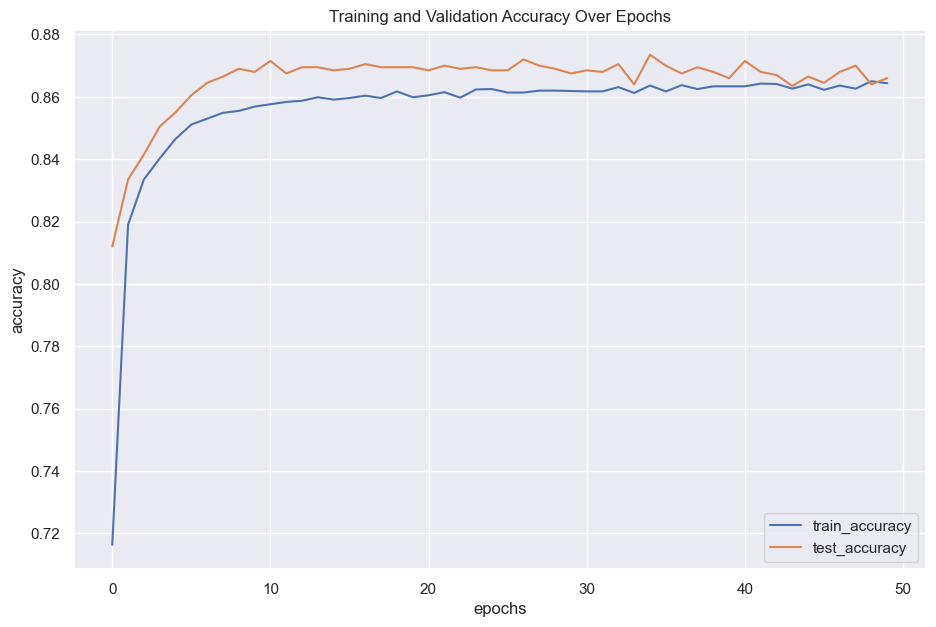

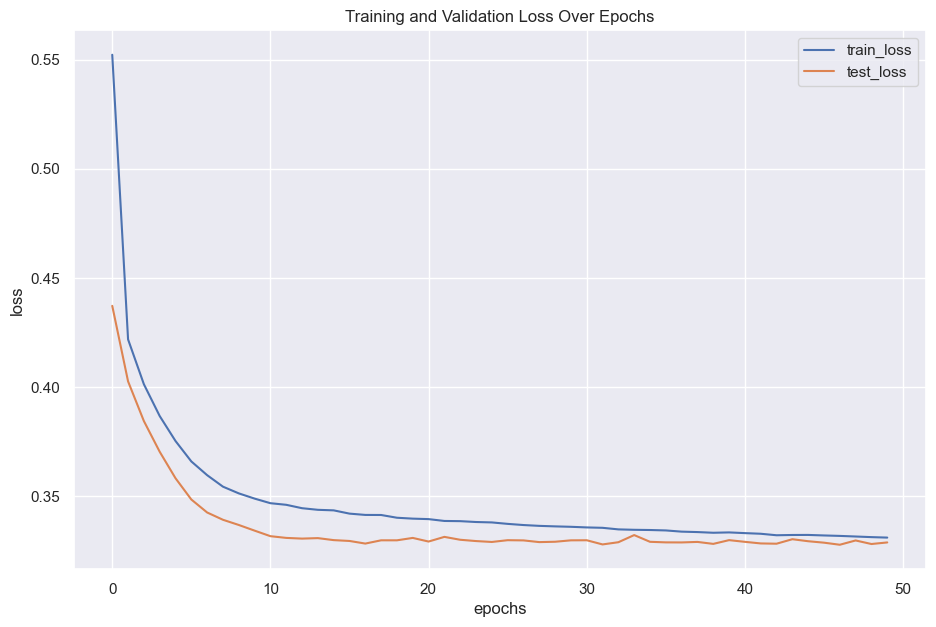



CLASSIFICATION REPORT (TEST)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000


CLASSIFICATION REPORT (TRAIN)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.77      0.48      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.82      0.72      0.76      8000
weighted avg       0.86      0.86      0.85      8000


CONFUSION MATRIX



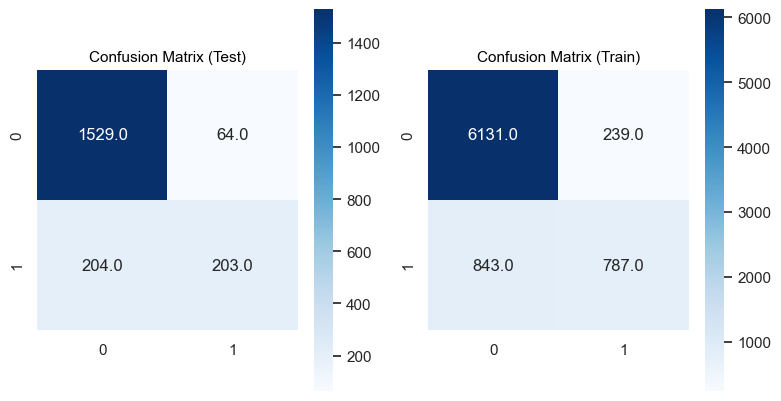


ROC-AUC CURVE



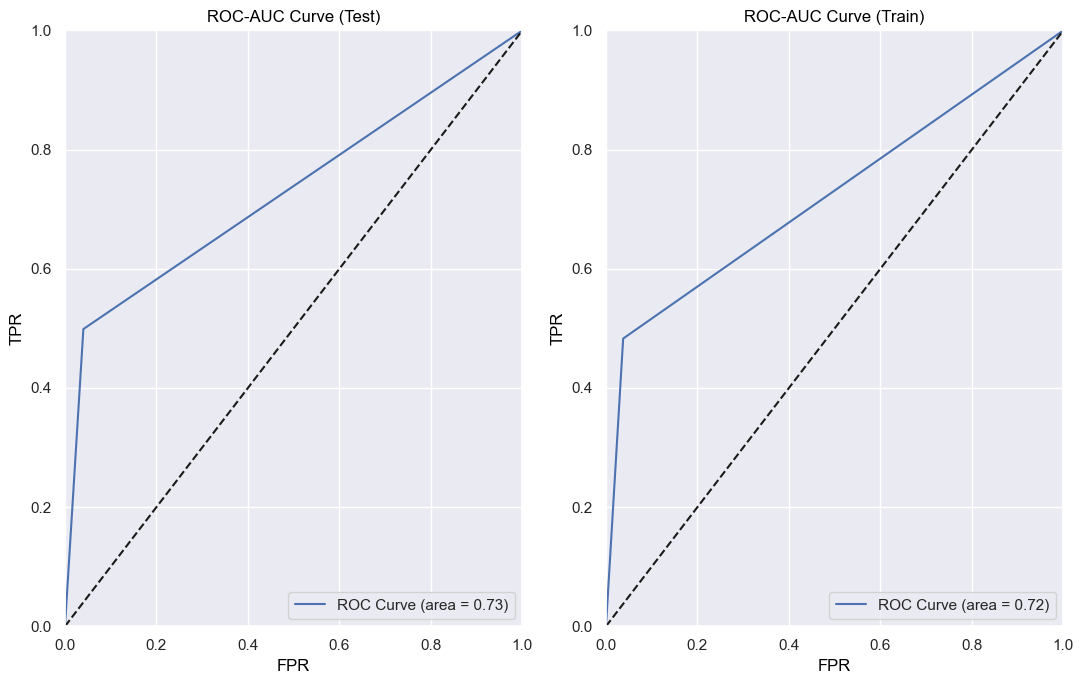

In [120]:
# Evaluating the ANN model (ann_model_1)

ann_model_1, ann_model_1_metrics = deep_learning_model(ann_model_1, history_1, X_train_sc, X_test_sc, y_train, y_test)

<b>Insights</b>

* The <b>accuracy</b> of the <b>ANN Model</b> on the <b>test data</b>, trained for <b>50 epochs</b>, is <b>87</b>%, indicating that it <b>correctly predicts churn</b> or <b>non-churned status</b> for 87% of the <b>customers</b>.
* The <b>binary cross-entropy loss</b> on the <b>test data</b> is approximately <b>33%</b>, signifying a 33% error</b> in the model's predictions on <b>average</b>.
* The <b>precision</b> of <b>74%</b> indicates <b>out of all predicted churners</b>, 74% are <b>actual churners</b>.
* The <b>recall</b> of <b>53%</b> indicates <b>out of all actual churners</b>, the model <b>identified</b> 53% of them as <b>actual churners</b>.
* The <b>F1-Score</b> of <b>62%</b> indicates the <b>harmonic mean</b> of <b>precision</b> and <b>recall</b>, representing a <b>balanced performance</b> between the <b>two metrics</b>.
* The <b>ROC-AUC Score</b> of <b>74%</b> indicates that the model has a<b> moderate ability</b> to <b>distinguish churners and non-churners</b>.
* <b>Accuracy Curve : </b>The <b>accuracy curves</b> display an <b>increasing trend</b> across the <b>epochs</b> in <b>both</b> the <b>training</b> and <b>testing sets</b> with <b>slight fluctuations</b> in accuracies on the <b>testing set</b>, indicating the <b>model</b> is <b>learning</b> and <b>improving</b> its <b>performance</b> on the <b>test data</b> as <b>training progresses</b>.
* <b> Loss Curve :</b> The <b>loss curves</b> display an <b>decreasing trend</b> across the <b>epochs</b> for <b>both</b> the <b>training</b> and <b>testing sets</b>, suggests <b>model</b> is <b>not overfitting</b> and is achieving <b>better generalization</b>.
* <b>Confusion Matrix :</b>
    * True Positives (TP) : 215 churning customers were correctly identified.
    * True Negatives (TN) : 1518 non-churning customers were correctly identified.
    * False Positives (FP) : 192 customers were misclassified as churned, leading to unnecessary retention efforts.
    * False Negatives (FN) : 75 customers were misclassified as non-churned, potentially resulting in revenue loss.